# Week 2 Exercises

In this weeks exercises you will use Numpy/Scipy to impliment some numerical algorithms and then you will use Pandas to perform a rudamentary data analysis using the KDD 98 dataset.  Along the way you will use unix/basic python from the first week as well as git to save your work.

As a first step we import the libraries we'll use later on.  This allows us to use numpy library calls by prefixing the call with np.

In [2]:
#Import the libraries 
import numpy as np
import scipy as sp
import pandas as pd
from numpy.linalg import inv
from numpy import shape
from pandas import DataFrame

## Matrix Manipulations
Lets first create a matrix and perform some manipulations of it.

Using numpy's matrix data structure, define the following matricies:

$$A=\left[ \begin{array}{ccc} 3 & 5 & 9 \\ 3 & 3 & 4 \\ 5 & 9 & 17 \end{array} \right]$$

$$B=\left[ \begin{array}{c} 2 \\ 1 \\ 4 \end{array} \right]$$

After this solve the matrix equation:
$$Ax = B$$

Now write three functions for matrix multiply $C=AB$ in each of the following styles:

1. By using nested for loops to impliment the naive algorithm ($C_{ij}=\sum_{k=0}^{m-1}A_{ik}B_{kj}$)
2. Using numpy's built in martrix multiplication  
3. Using Cython

The three methods should have the same answer

In [51]:
#A = np.matrix([[3,5,9],[3,3,4],[5,9,17]])
A = np.matrix('3 5 9; 3 3 4; 5 9 17')
B = np.matrix('2;1;4')
#x = np.dot(inv(A),A).astype(int)
x = np.dot(inv(A),B)
print 'Ax=B: \nx=(Inverse of A).B\n',x

def nested_loop_matrix_mul(a,b):
    C = np.zeros([a.shape[0],b.shape[1]])
    for rowA in range(a.shape[0]):
        for colB in range(b.shape[1]):
            for colA in range(a.shape[1]):
                C[rowA,colB] += a[rowA,colA]*b[colA,colB]
    return C.astype(int)

def numpy_matrix_mul(a,b):
    return np.dot(a,b)

print '\n1. Matrix Multiplication using nexted loops\n',nested_loop_matrix_mul(A,B)
print '\n2. Matrix Multiplication using numpy\'s built in martrix multiplication\n',numpy_matrix_mul(A,B)


Ax=B: 
x=(Inverse of A).B
[[ 1.]
 [-2.]
 [ 1.]]

1. Matrix Multiplication using nexted loops
[[47]
 [25]
 [87]]

2. Matrix Multiplication using numpy's built in martrix multiplication
[[47]
 [25]
 [87]]


In [52]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [53]:
%%cython
import numpy as np
cimport numpy as cnp  # makes numpy available to cython

def dotAB(cnp.ndarray[cnp.int64_t, ndim=2] a, cnp.ndarray[cnp.int64_t, ndim=2] b): 
    cdef cnp.ndarray[cnp.double_t, ndim=2] C = np.zeros([a.shape[0],b.shape[1]])
    cdef int rowA
    cdef int colA
    cdef int colB
    for rowA in range(a.shape[0]):
        for colB in range(b.shape[1]):
            for colA in range(a.shape[1]):
                C[rowA,colB] += a[rowA,colA]*b[colA,colB]
    return C.astype(int)



In [54]:
A = np.matrix('3 5 9; 3 3 4; 5 9 17')
B = np.matrix('2;1;4')
print '3. Matrix Multiplication using Cython\n',dotAB(A,B)

3. Matrix Multiplication using Cython
[[47]
 [25]
 [87]]


Now we wish to evaluate the performance of these three methods.  Write a method that given three dmiensions (a,b,c) makes a random a x b and b x c matrix and computes the product using your three functions and reports the speed of each method.

After this measure performance of each method for all $a,b,c \in \{10,100,1000,10000\}$ and plot the results.  Is one method always the fastest?  Discuss why this is or is not the case.

In [55]:
import time

dim = input('Enter three dmiensions (a,b,c)\n')
print "\na=",dim[0],"\tb=",dim[1],"\tc=",dim[2]
A = np.random.randint(10, size=(dim[0], dim[1]))
B = np.random.randint(10, size=(dim[1], dim[2]))

print "\naxb =",dim[0],"x",dim[1],"Matrix: A\n\n",A
print "\nbxc =",dim[1],"x",dim[2],"Matrix: B\n\n",B

print '\n1. Matrix Multiplication using nested loops\n'
print nested_loop_matrix_mul(A,B),"\n"
%time nested_loop_matrix_mul(A,B)
print '\n2. Matrix Multiplication using numpy\'s built in martrix multiplication\n'
print numpy_matrix_mul(A,B),"\n"
%time numpy_matrix_mul(A,B)
print '\n3. Matrix Multiplication using Cython\n'
print dotAB(A,B),"\n"
%time dotAB(A,B)


Enter three dmiensions (a,b,c)
4,5,6

a= 4 	b= 5 	c= 6

axb = 4 x 5 Matrix: A

[[1 0 3 3 9]
 [9 3 2 8 5]
 [4 5 3 7 1]
 [2 6 8 1 9]]

bxc = 5 x 6 Matrix: B

[[2 7 5 6 0 6]
 [9 6 6 4 8 8]
 [5 4 8 4 4 3]
 [5 1 1 6 0 2]
 [9 9 0 3 6 4]]

1. Matrix Multiplication using nested loops

[[113 103  32  63  66  57]
 [140 142  87 137  62 120]
 [112  86  81 101  58  91]
 [184 164 111 101 134 122]] 

CPU times: user 142 µs, sys: 63 µs, total: 205 µs
Wall time: 161 µs

2. Matrix Multiplication using numpy's built in martrix multiplication

[[113 103  32  63  66  57]
 [140 142  87 137  62 120]
 [112  86  81 101  58  91]
 [184 164 111 101 134 122]] 

CPU times: user 10 µs, sys: 3 µs, total: 13 µs
Wall time: 15 µs

3. Matrix Multiplication using Cython

[[113 103  32  63  66  57]
 [140 142  87 137  62 120]
 [112  86  81 101  58  91]
 [184 164 111 101 134 122]] 

CPU times: user 21 µs, sys: 11 µs, total: 32 µs
Wall time: 27.9 µs


array([[113, 103,  32,  63,  66,  57],
       [140, 142,  87, 137,  62, 120],
       [112,  86,  81, 101,  58,  91],
       [184, 164, 111, 101, 134, 122]])

Matrix Multiplication using Nested loop, Numy and Cython's Execution times

Matrix A: dimension= 10 x 10
Matrix B: dimension= 10 x 10
Nested loops: 1.13987922668 ms
Numpy       : 0.00691413879395 ms
Cython      : 0.0231266021729 ms



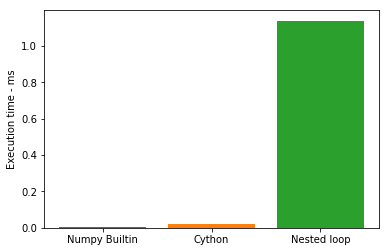

Matrix A: dimension= 10 x 10
Matrix B: dimension= 10 x 100
Nested loops: 9.6161365509 ms
Numpy       : 0.0169277191162 ms
Cython      : 0.0541210174561 ms



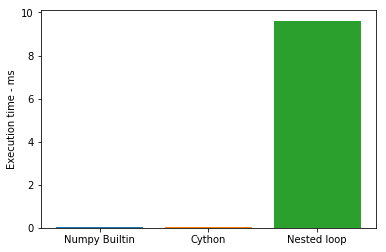

Matrix A: dimension= 10 x 100
Matrix B: dimension= 100 x 10
Nested loops: 8.63909721375 ms
Numpy       : 0.0231266021729 ms
Cython      : 0.0541210174561 ms



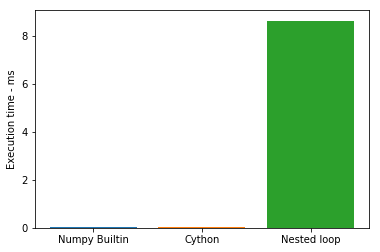

Matrix A: dimension= 100 x 10
Matrix B: dimension= 10 x 10
Nested loops: 7.02619552612 ms
Numpy       : 0.0181198120117 ms
Cython      : 0.0579357147217 ms



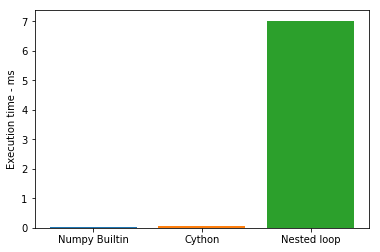

Matrix A: dimension= 100 x 100
Matrix B: dimension= 100 x 10
Nested loops: 65.5889511108 ms
Numpy       : 0.0708103179932 ms
Cython      : 0.367879867554 ms



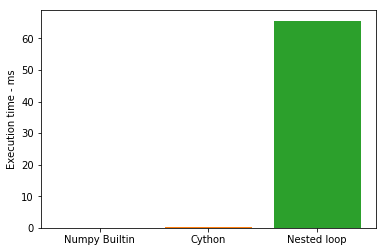

Matrix A: dimension= 100 x 10
Matrix B: dimension= 10 x 100
Nested loops: 69.8380470276 ms
Numpy       : 0.113010406494 ms
Cython      : 0.370979309082 ms



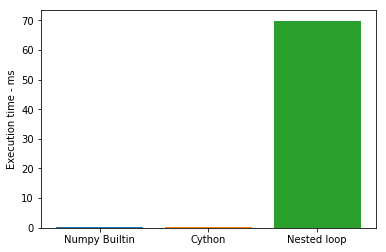

Matrix A: dimension= 10 x 100
Matrix B: dimension= 100 x 100
Nested loops: 63.894033432 ms
Numpy       : 0.06103515625 ms
Cython      : 0.314950942993 ms



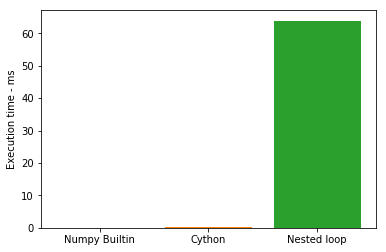

Matrix A: dimension= 100 x 100
Matrix B: dimension= 100 x 100
Nested loops: 594.711065292 ms
Numpy       : 0.877857208252 ms
Cython      : 3.65996360779 ms



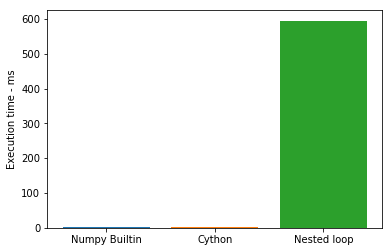

Matrix A: dimension= 10 x 10
Matrix B: dimension= 10 x 1000
Nested loops: 64.3532276154 ms
Numpy       : 0.0820159912109 ms
Cython      : 0.328063964844 ms



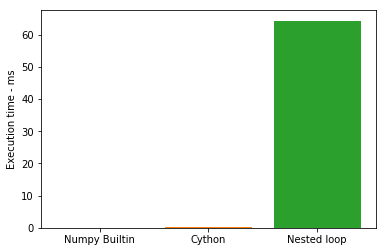

Matrix A: dimension= 10 x 1000
Matrix B: dimension= 1000 x 10
Nested loops: 65.4628276825 ms
Numpy       : 0.0829696655273 ms
Cython      : 0.349998474121 ms



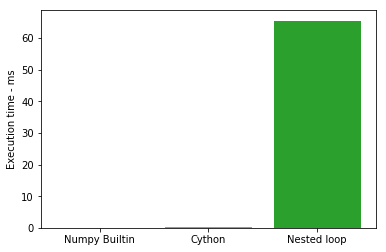

Matrix A: dimension= 1000 x 10
Matrix B: dimension= 10 x 10
Nested loops: 72.9420185089 ms
Numpy       : 0.113010406494 ms
Cython      : 0.426054000854 ms



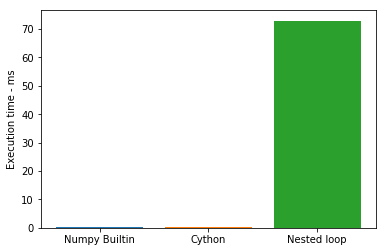

Matrix A: dimension= 10 x 100
Matrix B: dimension= 100 x 1000
Nested loops: 701.918840408 ms
Numpy       : 1.28293037415 ms
Cython      : 3.77988815308 ms



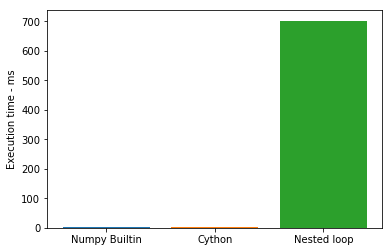

Matrix A: dimension= 10 x 1000
Matrix B: dimension= 1000 x 100
Nested loops: 647.342920303 ms
Numpy       : 0.988960266113 ms
Cython      : 4.0009021759 ms



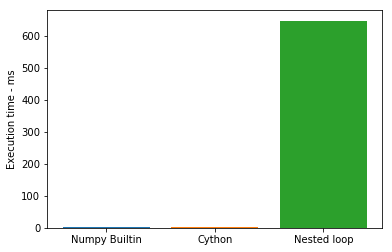

Matrix A: dimension= 10 x 10
Matrix B: dimension= 10 x 10000
Nested loops: 702.034950256 ms
Numpy       : 0.895023345947 ms
Cython      : 3.77011299133 ms



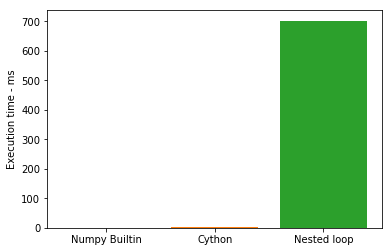

Matrix A: dimension= 10 x 100
Matrix B: dimension= 100 x 10000
Nested loops: 6222.4509716 ms
Numpy       : 13.1890773773 ms
Cython      : 40.8351421356 ms



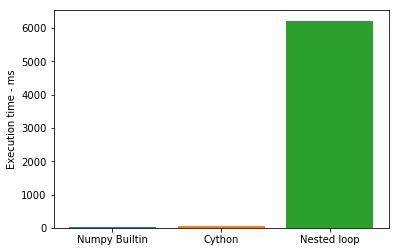

Conclusion: Using Numpy for Matrix multiplication is the best method of all the 3 methods since the execution time is extremely less when compared to others 


In [56]:
import time

dim = [[10,10,10],[10,10,100],[10,100,10],[100,10,10],[100,100,10],[100,10,100],[10,100,100],[100,100,100],
       [10,10,1000],[10,1000,10],[1000,10,10],[10,100,1000],[10,1000,100],[10,10,10000],[10,100,10000]]
t_loop = []
t_numpy = []
t_cython = []
print "Matrix Multiplication using Nested loop, Numy and Cython's Execution times\n"
for i in range(len(dim)):
    A = np.random.randint(10, size=(dim[i][0], dim[i][1]))
    B = np.random.randint(10, size=(dim[i][1], dim[i][2]))
    
    t0 = time.time()
    nested_loop_matrix_mul(A,B)
    t1 = time.time()
    t_loop.append((t1-t0)*1000)

    t0 = time.time()
    numpy_matrix_mul(A,B)
    t1 = time.time()
    t_numpy.append((t1-t0)*1000)

    t0 = time.time()
    dotAB(A,B)
    t1 = time.time()
    t_cython.append((t1-t0)*1000)
    
    print "Matrix A: dimension=",dim[i][0],"x",dim[i][1]
    print "Matrix B: dimension=",dim[i][1],"x",dim[i][2]

    print 'Nested loops:',t_loop[-1],'ms'
    print 'Numpy       :',t_numpy[-1],'ms'
    print 'Cython      :',t_cython[-1],'ms\n'
    
    plt.bar((1),t_numpy[-1])
    plt.bar((2),t_cython[-1])
    plt.bar((3),t_loop[-1])
    plt.xticks((1,2,3),('Numpy Builtin', 'Cython', 'Nested loop'))
    plt.ylabel('Execution time - ms')
    plt.show()

print "Conclusion: Using Numpy for Matrix multiplication is the best method of all the 3 methods since the execution time is extremely less when compared to others "

**BONUS** Now repeat the past two problems but instead of computing the matrix product, compute a matrix's [determinant](http://en.wikipedia.org/wiki/Determinant).  Measure performance for matricies of various sizes and discuss the results.  Determinant may get impractical to calculate for not too huge of matricies, so no need to goto 1000x1000 matricies.

Determinant of the below Matrix using Numpy builtin function is:  3 
Execution time: 0.0889301300049 ms

Determinant of the below Matrix using nested loop is:  3 
Execution time: 0.00715255737305 ms

[[3]]


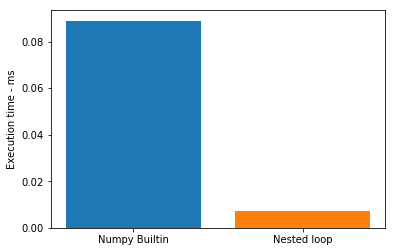

Determinant of the below Matrix using Numpy builtin function is:  -72 
Execution time: 0.0510215759277 ms

Determinant of the below Matrix using nested loop is:  -72 
Execution time: 0.00905990600586 ms

[[0 9]
 [8 0]]


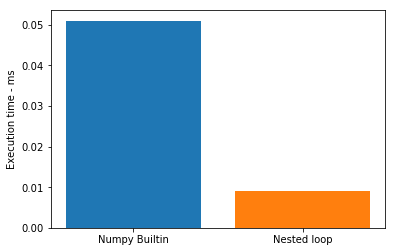

Determinant of the below Matrix using Numpy builtin function is:  13 
Execution time: 0.0488758087158 ms

Determinant of the below Matrix using nested loop is:  13 
Execution time: 0.229120254517 ms

[[5 1 1]
 [4 2 1]
 [3 2 3]]


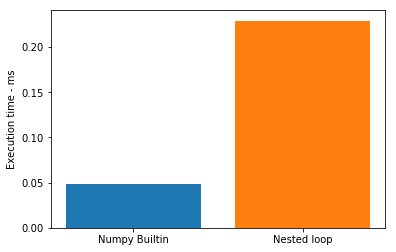

Determinant of the below Matrix using Numpy builtin function is:  -749 
Execution time: 0.0488758087158 ms

Determinant of the below Matrix using nested loop is:  -750 
Execution time: 0.159978866577 ms

[[4 5 7 2]
 [3 1 9 7]
 [7 2 6 7]
 [8 5 6 0]]


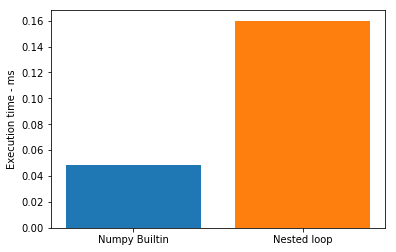

Determinant of the below Matrix using Numpy builtin function is:  -7931 
Execution time: 0.0500679016113 ms

Determinant of the below Matrix using nested loop is:  -7931 
Execution time: 0.870943069458 ms

[[3 6 0 7 7]
 [2 5 3 0 9]
 [3 1 3 3 1]
 [2 5 8 3 5]
 [2 9 2 0 2]]


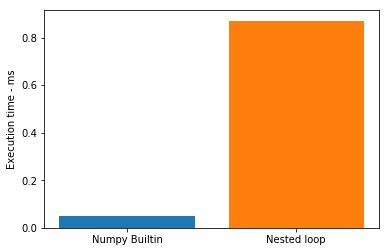

Determinant of the below Matrix using Numpy builtin function is:  70736 
Execution time: 0.0438690185547 ms

Determinant of the below Matrix using nested loop is:  70736 
Execution time: 5.84197044373 ms

[[0 4 7 0 0 1]
 [9 6 5 4 6 1]
 [9 4 2 5 2 4]
 [7 4 9 9 7 9]
 [2 2 8 8 3 3]
 [5 8 2 2 3 5]]


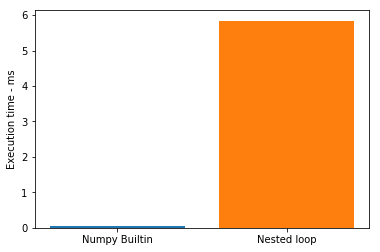

Determinant of the below Matrix using Numpy builtin function is:  447861 
Execution time: 0.0569820404053 ms

Determinant of the below Matrix using nested loop is:  447861 
Execution time: 31.1779975891 ms

[[1 6 4 8 5 0 1]
 [5 4 4 0 6 0 7]
 [3 2 1 2 6 9 0]
 [3 4 9 9 0 6 4]
 [9 8 0 2 1 7 5]
 [3 0 7 7 7 6 7]
 [1 3 1 7 0 4 2]]


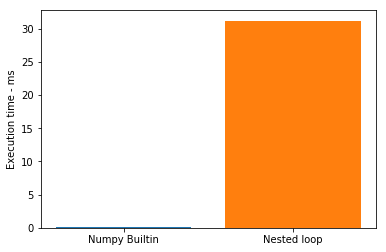

Determinant of the below Matrix using Numpy builtin function is:  -760206 
Execution time: 0.079870223999 ms

Determinant of the below Matrix using nested loop is:  -760206 
Execution time: 208.056926727 ms

[[4 5 6 2 4 4 3 8]
 [2 1 0 8 8 6 2 5]
 [3 4 3 7 8 3 5 2]
 [3 1 9 4 7 7 3 4]
 [8 2 0 3 7 2 0 0]
 [3 4 4 5 8 5 4 9]
 [0 6 9 6 2 4 1 7]
 [7 5 7 3 1 1 6 0]]


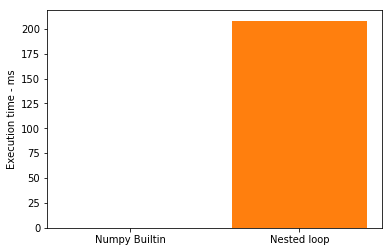

In [57]:
#Matrix Determinant
#A = np.matrix('0 6 -2 -1 5; 0 0 0 -9 -7; 0 15 35 0 0; 0 -1 -11 -2 1; -2 -2 3 0 -2')
import time
import numpy as np
import matplotlib.pyplot as plt
def determinant(A):
    det = 0
    if shape(A) == (1,1):
        return A[0,0]
    elif shape(A) == (2,2):
        return A[0,0]*A[1,1] - A[0,1]*A[1,0]
    else:
        for i in range(shape(A)[0]):
            if i%2 == 0:
                det += A[0,i]*determinant(matrix(A,i))
            else:
                det -= A[0,i]*determinant(matrix(A,i))                
    return det
        
def matrix(B,j):
    C = np.zeros([shape(B)[0]-1,shape(B)[1]-1])
    for row in range(1,shape(B)[0]):
        col_c = 0
        for col in range(shape(B)[1]):
            if col != j:
                C[row-1,col_c] = B[row,col]
                col_c += 1
    return C.astype(int)

dim = [[1,1], [2,2], [3,3], [4,4], [5,5], [6,6], [7,7], [8,8]]
for i in range(len(dim)):
    A = np.random.randint(10, size=(dim[i][0], dim[i][1]))
    t0 = time.time()
    det_numpy = np.linalg.det(A)
    t1 = time.time()
    t_numpy = t1-t0
    print "Determinant of the below Matrix using Numpy builtin function is: ",int(det_numpy),"\nExecution time:", t_numpy*1000,"ms\n"

    t0 = time.time()
    det_loop = determinant(A)
    t1 = time.time()
    t_loop = t1-t0
    print "Determinant of the below Matrix using nested loop is: ",det_loop,"\nExecution time:",t_loop*1000,"ms\n\n",A
    plt.bar((1),t_numpy*1000, align='center')
    plt.bar((2),t_loop*1000, align='center')
    plt.xticks((1,2),('Numpy Builtin', 'Nested loop'))
    plt.ylabel('Execution time - ms')
    plt.show()

### Note: +1

### IO Exercises

Below is a map of various datatypes in python that you have come across and their corresponding JSON equivalents.

$$Datatypes=\left[ \begin{array}{cc} JSON & Python3 \\ object & dictionary \\ array & list \\ string & string \\ integer	& integer \\ real number & float \\ true & True \\ false & False \\ null & None  \end{array} \right]$$


There are atleast two very important python datatypes missing in the above list. 
Can you find the same?  [list the two mising python datatypes in this markdown cell below]

1. Tuples
2. Sets

Now We can save the above map as a dictionary with Key-value pairs 
1. create a python dictionary named dataypes, having the above map as the Key-value pairs with Python datatypes as values and JSON equivalents as keys.
2. Save it as a pickle called datatypes and gzip the same.
3. Reload this pickle, and read the file contents and output the data in the following formatted way as given in this example - "The JSON equivalent for the Python datatype Dictionary is Object". Output similarly for the rest of the key-value pairs.
4. Save this data as a JSON but using Python datatypes as keys and JSON equivalent as values this time. 

In [58]:
#1 create a python dictionary named dataypes, having the above map as the Key-value pairs with Python datatypes as 
#values and JSON equivalents as keys.
datatypes = {'Object':'dictionary', 'array':'list', 'string':'string', 'integer':'integer', 'realnumber':'float',
                  'true':'True', 'false':'False', 'null':'None'}
print 'Python Dictionary\n',datatypes

#2 Save it as a pickle called datatypes and gzip the same.
import pickle
import gzip
pickle.dump(datatypes, open('datatypes.pk1', 'wb'))
pickle.dump(datatypes, gzip.open('datatypes_gzip.pk1', 'wb'))

#3 Reload this pickle, and read the file contents and output the data in the following formatted way as given in 
#this example - "The JSON equivalent for the Python datatype Dictionary is Object". Output similarly for the rest of 
#the key-value pairs.
pickle_file = pickle.load(open('datatypes.pk1', 'rb'))
print '\nPickle file output:\n',pickle_file
for w in pickle_file:
    print "\nThe JSON equivalent for the Python datatype",pickle_file[w], 'is', w

#4 Save this data as a JSON but using Python datatypes as keys and JSON equivalent as values this time.
import json
json.dump([], open('json_file.jsn', 'wb'))
x = {}
for w in pickle_file:
    x[pickle_file[w]] = w

json.dump(x, open('json_file.jsn', 'wb'))
json_file = json.load(open('json_file.jsn', 'rb'))
print '\nJson Dictionary: \n',json_file


Python Dictionary
{'null': 'None', 'false': 'False', 'string': 'string', 'integer': 'integer', 'array': 'list', 'Object': 'dictionary', 'true': 'True', 'realnumber': 'float'}

Pickle file output:
{'false': 'False', 'string': 'string', 'Object': 'dictionary', 'integer': 'integer', 'array': 'list', 'null': 'None', 'true': 'True', 'realnumber': 'float'}

The JSON equivalent for the Python datatype False is false

The JSON equivalent for the Python datatype string is string

The JSON equivalent for the Python datatype dictionary is Object

The JSON equivalent for the Python datatype integer is integer

The JSON equivalent for the Python datatype list is array

The JSON equivalent for the Python datatype None is null

The JSON equivalent for the Python datatype True is true

The JSON equivalent for the Python datatype float is realnumber

Json Dictionary: 
{u'None': u'null', u'False': u'false', u'string': u'string', u'dictionary': u'Object', u'float': u'realnumber', u'list': u'array', u'int

## Pandas Data Analysis
Pandas gives us a nice set of tools to work with columnar data (similar to R's dataframe). 
To learn how to use this it makes the most sense to use a real data set.
For this assignment we'll use the KDD Cup 1998 dataset, which can be sourced from http://kdd.ics.uci.edu/databases/kddcup98/kddcup98.html .


### Acquiring Data
First we pull the README file from the dataset into this notebook via the unix "curl" command.  Remember you can hide/minimize output cells via the button on the left of the output.

In [28]:
!curl http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/readme  

+--------------------------------------------------------------------+
| NOTE TO ALL DOWN-LOADERS                                           |
+--------------------------------------------------------------------+

The KDD-CUP-98 data set and the accompanying documentation are now 
available for general use with the following restrictions: 

  (1) The users of the data must notify 

	Ismail Parsa	(iparsa@epsilon.com) and
	Ken Howes	(khowes@epsilon.com) 

  in the event they produce results, visuals or tables, etc. from the 
  data and send a note that includes a summary of the final result. 

  (2) The authors of published and/or unpublished articles that use 
  the KDD-Cup-98 data set must also notify the individuals listed 
  above and send a copy of their published and/or unpublished work. 

  (3) If you intend to use this data set for training or educational
  purposes, you must not reveal the name of the sponsor PVA 
  (Paralyzed Veterans of America) to the trainees or students. Yo

As you can see this README describes several files which may be of use.  In particular there are two more documentation files (DOC and DIC) we should read to get an idea of the data format.  Bring these files into the notebook.

In [29]:
!curl http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/cup98doc.txt -o cup98doc.txt
!curl http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/cup98dic.txt -o cup98dic.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 62956  100 62956    0     0   418k      0 --:--:-- --:--:-- --:--:--  429k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 56987  100 56987    0     0    99k      0 --:--:-- --:--:-- --:--:--   99k


Now we wish to download the cup98lrn.zip file and unzip it into a new subdirectory called "data".  
However, since this file is pretty big we don't want to store it on github.  
Luckily git provides the [.gitignore](http://git-scm.com/docs/gitignore) file which allows us to specify files we don't want to put into our git repository.

Please do the following steps:

1. Add the directory "data" to the .gitignore file
2. Commit the new .gitignore file
3. Create a new directory "data"
4. Download http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/cup98lrn.zip into the data directory
5. Unzip the cup98lrn.zip (we will only be using the unzipped version, so feel free to remove the zip file)
6. Run "git status" to show that the data directory is not an untracked file (this indicates it is ignored)

**NOTE:** These steps only need to be run once, it is advised you comment all the lines out by putting a # at the start of each line after they have run.  This will save you time in the future when you have to rerun all cells/don't want to spend a few minutes downloading the data file.

In [22]:
!curl http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/cup98lrn.zip -o cup98lrn.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 34.7M  100 34.7M    0     0  3868k      0  0:00:09  0:00:09 --:--:-- 6353k


In [19]:
!unzip -n cup98lrn.zip -d data

Archive:  cup98lrn.zip


Now perform some basic sanity checks on the data.  Using a combination of unix/basic python answer the following questions:

1. How many lines are there?  
2. Is the file character seperated or fixed width format?
3. Is there a header?  If so how many fields are in it?
4. Do all rows have the same number of fields as the header?
5. Does anyhting in 1-4 disagree with the readme file or indicate erroneous data?

In [59]:
%cd data
!cat cup98LRN.txt | wc -l
!awk '{print "Line num = "++count"\tLength = " length($0) "\tNumber of Fields = "split($0,a,",")}' cup98LRN.txt
#NF  = number of fields
#FS = fields separator
%cd ..


/Users/prashantkolkur/Documents/DSE/pkolkur/DSE200/day_2_github_io_numpy_pandas/data
   95413
Line num = 1	Length = 3056	Number of Fields = 481
Line num = 2	Length = 1285	Number of Fields = 481
Line num = 3	Length = 1245	Number of Fields = 481
Line num = 4	Length = 1267	Number of Fields = 481
Line num = 5	Length = 1287	Number of Fields = 481
Line num = 6	Length = 1265	Number of Fields = 481
Line num = 7	Length = 1250	Number of Fields = 481
Line num = 8	Length = 1240	Number of Fields = 481
Line num = 9	Length = 1247	Number of Fields = 481
Line num = 10	Length = 1242	Number of Fields = 481
Line num = 11	Length = 1227	Number of Fields = 481
Line num = 12	Length = 1119	Number of Fields = 481
Line num = 13	Length = 1164	Number of Fields = 481
Line num = 14	Length = 1240	Number of Fields = 481
Line num = 15	Length = 1259	Number of Fields = 481
Line num = 16	Length = 1266	Number of Fields = 481
Line num = 17	Length = 1214	Number of Fields = 481
Line num = 18	Length = 1222	Number of Fields = 4

Line num = 264	Length = 1059	Number of Fields = 481
Line num = 265	Length = 1253	Number of Fields = 481
Line num = 266	Length = 1254	Number of Fields = 481
Line num = 267	Length = 1270	Number of Fields = 481
Line num = 268	Length = 1245	Number of Fields = 481
Line num = 269	Length = 1225	Number of Fields = 481
Line num = 270	Length = 1250	Number of Fields = 481
Line num = 271	Length = 1273	Number of Fields = 481
Line num = 272	Length = 1200	Number of Fields = 481
Line num = 273	Length = 1243	Number of Fields = 481
Line num = 274	Length = 1280	Number of Fields = 481
Line num = 275	Length = 1285	Number of Fields = 481
Line num = 276	Length = 1279	Number of Fields = 481
Line num = 277	Length = 1243	Number of Fields = 481
Line num = 278	Length = 1192	Number of Fields = 481
Line num = 279	Length = 1228	Number of Fields = 481
Line num = 280	Length = 1219	Number of Fields = 481
Line num = 281	Length = 1280	Number of Fields = 481
Line num = 282	Length = 1180	Number of Fields = 481
Line num = 2

Line num = 426	Length = 1271	Number of Fields = 481
Line num = 427	Length = 1228	Number of Fields = 481
Line num = 428	Length = 1214	Number of Fields = 481
Line num = 429	Length = 1216	Number of Fields = 481
Line num = 430	Length = 1201	Number of Fields = 481
Line num = 431	Length = 1246	Number of Fields = 481
Line num = 432	Length = 1260	Number of Fields = 481
Line num = 433	Length = 1236	Number of Fields = 481
Line num = 434	Length = 1240	Number of Fields = 481
Line num = 435	Length = 1237	Number of Fields = 481
Line num = 436	Length = 1263	Number of Fields = 481
Line num = 437	Length = 1190	Number of Fields = 481
Line num = 438	Length = 1196	Number of Fields = 481
Line num = 439	Length = 1239	Number of Fields = 481
Line num = 440	Length = 1216	Number of Fields = 481
Line num = 441	Length = 1262	Number of Fields = 481
Line num = 442	Length = 1247	Number of Fields = 481
Line num = 443	Length = 1233	Number of Fields = 481
Line num = 444	Length = 1217	Number of Fields = 481
Line num = 4

Line num = 583	Length = 1204	Number of Fields = 481
Line num = 584	Length = 1139	Number of Fields = 481
Line num = 585	Length = 1299	Number of Fields = 481
Line num = 586	Length = 1155	Number of Fields = 481
Line num = 587	Length = 1257	Number of Fields = 481
Line num = 588	Length = 1217	Number of Fields = 481
Line num = 589	Length = 1244	Number of Fields = 481
Line num = 590	Length = 1225	Number of Fields = 481
Line num = 591	Length = 1135	Number of Fields = 481
Line num = 592	Length = 1270	Number of Fields = 481
Line num = 593	Length = 1220	Number of Fields = 481
Line num = 594	Length = 1221	Number of Fields = 481
Line num = 595	Length = 1259	Number of Fields = 481
Line num = 596	Length = 1224	Number of Fields = 481
Line num = 597	Length = 1250	Number of Fields = 481
Line num = 598	Length = 1239	Number of Fields = 481
Line num = 599	Length = 1202	Number of Fields = 481
Line num = 600	Length = 1221	Number of Fields = 481
Line num = 601	Length = 1245	Number of Fields = 481
Line num = 6

Line num = 738	Length = 1177	Number of Fields = 481
Line num = 739	Length = 1251	Number of Fields = 481
Line num = 740	Length = 1299	Number of Fields = 481
Line num = 741	Length = 1247	Number of Fields = 481
Line num = 742	Length = 1297	Number of Fields = 481
Line num = 743	Length = 1230	Number of Fields = 481
Line num = 744	Length = 1233	Number of Fields = 481
Line num = 745	Length = 1246	Number of Fields = 481
Line num = 746	Length = 1246	Number of Fields = 481
Line num = 747	Length = 1113	Number of Fields = 481
Line num = 748	Length = 1263	Number of Fields = 481
Line num = 749	Length = 1201	Number of Fields = 481
Line num = 750	Length = 1259	Number of Fields = 481
Line num = 751	Length = 1207	Number of Fields = 481
Line num = 752	Length = 1244	Number of Fields = 481
Line num = 753	Length = 1070	Number of Fields = 481
Line num = 754	Length = 1281	Number of Fields = 481
Line num = 755	Length = 1269	Number of Fields = 481
Line num = 756	Length = 1245	Number of Fields = 481
Line num = 7

Line num = 1046	Length = 1243	Number of Fields = 481
Line num = 1047	Length = 1212	Number of Fields = 481
Line num = 1048	Length = 1205	Number of Fields = 481
Line num = 1049	Length = 1169	Number of Fields = 481
Line num = 1050	Length = 1223	Number of Fields = 481
Line num = 1051	Length = 1164	Number of Fields = 481
Line num = 1052	Length = 1226	Number of Fields = 481
Line num = 1053	Length = 1269	Number of Fields = 481
Line num = 1054	Length = 1271	Number of Fields = 481
Line num = 1055	Length = 1205	Number of Fields = 481
Line num = 1056	Length = 1218	Number of Fields = 481
Line num = 1057	Length = 1297	Number of Fields = 481
Line num = 1058	Length = 1248	Number of Fields = 481
Line num = 1059	Length = 1264	Number of Fields = 481
Line num = 1060	Length = 1187	Number of Fields = 481
Line num = 1061	Length = 1221	Number of Fields = 481
Line num = 1062	Length = 1258	Number of Fields = 481
Line num = 1063	Length = 1221	Number of Fields = 481
Line num = 1064	Length = 1226	Number of Fields

Line num = 1202	Length = 1221	Number of Fields = 481
Line num = 1203	Length = 1196	Number of Fields = 481
Line num = 1204	Length = 1225	Number of Fields = 481
Line num = 1205	Length = 1247	Number of Fields = 481
Line num = 1206	Length = 1213	Number of Fields = 481
Line num = 1207	Length = 1225	Number of Fields = 481
Line num = 1208	Length = 1235	Number of Fields = 481
Line num = 1209	Length = 1253	Number of Fields = 481
Line num = 1210	Length = 1271	Number of Fields = 481
Line num = 1211	Length = 1219	Number of Fields = 481
Line num = 1212	Length = 1283	Number of Fields = 481
Line num = 1213	Length = 1199	Number of Fields = 481
Line num = 1214	Length = 1216	Number of Fields = 481
Line num = 1215	Length = 1255	Number of Fields = 481
Line num = 1216	Length = 1249	Number of Fields = 481
Line num = 1217	Length = 1265	Number of Fields = 481
Line num = 1218	Length = 1128	Number of Fields = 481
Line num = 1219	Length = 1239	Number of Fields = 481
Line num = 1220	Length = 1205	Number of Fields

Line num = 1362	Length = 1175	Number of Fields = 481
Line num = 1363	Length = 1271	Number of Fields = 481
Line num = 1364	Length = 1261	Number of Fields = 481
Line num = 1365	Length = 1289	Number of Fields = 481
Line num = 1366	Length = 1258	Number of Fields = 481
Line num = 1367	Length = 1252	Number of Fields = 481
Line num = 1368	Length = 1263	Number of Fields = 481
Line num = 1369	Length = 1235	Number of Fields = 481
Line num = 1370	Length = 1151	Number of Fields = 481
Line num = 1371	Length = 1263	Number of Fields = 481
Line num = 1372	Length = 1224	Number of Fields = 481
Line num = 1373	Length = 1090	Number of Fields = 481
Line num = 1374	Length = 1232	Number of Fields = 481
Line num = 1375	Length = 1208	Number of Fields = 481
Line num = 1376	Length = 1247	Number of Fields = 481
Line num = 1377	Length = 1245	Number of Fields = 481
Line num = 1378	Length = 1234	Number of Fields = 481
Line num = 1379	Length = 1208	Number of Fields = 481
Line num = 1380	Length = 1258	Number of Fields

Line num = 1528	Length = 1261	Number of Fields = 481
Line num = 1529	Length = 1270	Number of Fields = 481
Line num = 1530	Length = 1254	Number of Fields = 481
Line num = 1531	Length = 1126	Number of Fields = 481
Line num = 1532	Length = 1170	Number of Fields = 481
Line num = 1533	Length = 1205	Number of Fields = 481
Line num = 1534	Length = 1261	Number of Fields = 481
Line num = 1535	Length = 1272	Number of Fields = 481
Line num = 1536	Length = 1231	Number of Fields = 481
Line num = 1537	Length = 1242	Number of Fields = 481
Line num = 1538	Length = 1259	Number of Fields = 481
Line num = 1539	Length = 1213	Number of Fields = 481
Line num = 1540	Length = 1254	Number of Fields = 481
Line num = 1541	Length = 1269	Number of Fields = 481
Line num = 1542	Length = 1179	Number of Fields = 481
Line num = 1543	Length = 1266	Number of Fields = 481
Line num = 1544	Length = 1253	Number of Fields = 481
Line num = 1545	Length = 1249	Number of Fields = 481
Line num = 1546	Length = 1181	Number of Fields

Line num = 1695	Length = 1216	Number of Fields = 481
Line num = 1696	Length = 1252	Number of Fields = 481
Line num = 1697	Length = 1248	Number of Fields = 481
Line num = 1698	Length = 1130	Number of Fields = 481
Line num = 1699	Length = 1162	Number of Fields = 481
Line num = 1700	Length = 1250	Number of Fields = 481
Line num = 1701	Length = 1240	Number of Fields = 481
Line num = 1702	Length = 1226	Number of Fields = 481
Line num = 1703	Length = 1297	Number of Fields = 481
Line num = 1704	Length = 1287	Number of Fields = 481
Line num = 1705	Length = 1261	Number of Fields = 481
Line num = 1706	Length = 1243	Number of Fields = 481
Line num = 1707	Length = 1268	Number of Fields = 481
Line num = 1708	Length = 1260	Number of Fields = 481
Line num = 1709	Length = 1226	Number of Fields = 481
Line num = 1710	Length = 1226	Number of Fields = 481
Line num = 1711	Length = 1204	Number of Fields = 481
Line num = 1712	Length = 1236	Number of Fields = 481
Line num = 1713	Length = 1250	Number of Fields

Line num = 1848	Length = 1274	Number of Fields = 481
Line num = 1849	Length = 1164	Number of Fields = 481
Line num = 1850	Length = 1239	Number of Fields = 481
Line num = 1851	Length = 1134	Number of Fields = 481
Line num = 1852	Length = 1200	Number of Fields = 481
Line num = 1853	Length = 1184	Number of Fields = 481
Line num = 1854	Length = 1281	Number of Fields = 481
Line num = 1855	Length = 1265	Number of Fields = 481
Line num = 1856	Length = 1211	Number of Fields = 481
Line num = 1857	Length = 1173	Number of Fields = 481
Line num = 1858	Length = 1212	Number of Fields = 481
Line num = 1859	Length = 1281	Number of Fields = 481
Line num = 1860	Length = 1279	Number of Fields = 481
Line num = 1861	Length = 1274	Number of Fields = 481
Line num = 1862	Length = 1181	Number of Fields = 481
Line num = 1863	Length = 1282	Number of Fields = 481
Line num = 1864	Length = 1257	Number of Fields = 481
Line num = 1865	Length = 1219	Number of Fields = 481
Line num = 1866	Length = 1250	Number of Fields

Line num = 2004	Length = 1290	Number of Fields = 481
Line num = 2005	Length = 1132	Number of Fields = 481
Line num = 2006	Length = 1233	Number of Fields = 481
Line num = 2007	Length = 1074	Number of Fields = 481
Line num = 2008	Length = 1250	Number of Fields = 481
Line num = 2009	Length = 1229	Number of Fields = 481
Line num = 2010	Length = 1144	Number of Fields = 481
Line num = 2011	Length = 1238	Number of Fields = 481
Line num = 2012	Length = 1180	Number of Fields = 481
Line num = 2013	Length = 1275	Number of Fields = 481
Line num = 2014	Length = 1234	Number of Fields = 481
Line num = 2015	Length = 1259	Number of Fields = 481
Line num = 2016	Length = 1278	Number of Fields = 481
Line num = 2017	Length = 1218	Number of Fields = 481
Line num = 2018	Length = 1238	Number of Fields = 481
Line num = 2019	Length = 1240	Number of Fields = 481
Line num = 2020	Length = 1258	Number of Fields = 481
Line num = 2021	Length = 1202	Number of Fields = 481
Line num = 2022	Length = 1236	Number of Fields

Line num = 2163	Length = 1237	Number of Fields = 481
Line num = 2164	Length = 1256	Number of Fields = 481
Line num = 2165	Length = 1261	Number of Fields = 481
Line num = 2166	Length = 1233	Number of Fields = 481
Line num = 2167	Length = 1154	Number of Fields = 481
Line num = 2168	Length = 1169	Number of Fields = 481
Line num = 2169	Length = 1302	Number of Fields = 481
Line num = 2170	Length = 1187	Number of Fields = 481
Line num = 2171	Length = 1254	Number of Fields = 481
Line num = 2172	Length = 1210	Number of Fields = 481
Line num = 2173	Length = 1229	Number of Fields = 481
Line num = 2174	Length = 1213	Number of Fields = 481
Line num = 2175	Length = 1271	Number of Fields = 481
Line num = 2176	Length = 1208	Number of Fields = 481
Line num = 2177	Length = 1279	Number of Fields = 481
Line num = 2178	Length = 1258	Number of Fields = 481
Line num = 2179	Length = 1253	Number of Fields = 481
Line num = 2180	Length = 1263	Number of Fields = 481
Line num = 2181	Length = 1222	Number of Fields

Line num = 2322	Length = 1210	Number of Fields = 481
Line num = 2323	Length = 1275	Number of Fields = 481
Line num = 2324	Length = 1177	Number of Fields = 481
Line num = 2325	Length = 1144	Number of Fields = 481
Line num = 2326	Length = 1208	Number of Fields = 481
Line num = 2327	Length = 1208	Number of Fields = 481
Line num = 2328	Length = 1238	Number of Fields = 481
Line num = 2329	Length = 1185	Number of Fields = 481
Line num = 2330	Length = 1211	Number of Fields = 481
Line num = 2331	Length = 1245	Number of Fields = 481
Line num = 2332	Length = 1147	Number of Fields = 481
Line num = 2333	Length = 1231	Number of Fields = 481
Line num = 2334	Length = 1240	Number of Fields = 481
Line num = 2335	Length = 1263	Number of Fields = 481
Line num = 2336	Length = 1181	Number of Fields = 481
Line num = 2337	Length = 1187	Number of Fields = 481
Line num = 2338	Length = 1165	Number of Fields = 481
Line num = 2339	Length = 1223	Number of Fields = 481
Line num = 2340	Length = 1271	Number of Fields

Line num = 2490	Length = 1224	Number of Fields = 481
Line num = 2491	Length = 1189	Number of Fields = 481
Line num = 2492	Length = 1234	Number of Fields = 481
Line num = 2493	Length = 1258	Number of Fields = 481
Line num = 2494	Length = 1197	Number of Fields = 481
Line num = 2495	Length = 1194	Number of Fields = 481
Line num = 2496	Length = 1206	Number of Fields = 481
Line num = 2497	Length = 1255	Number of Fields = 481
Line num = 2498	Length = 1259	Number of Fields = 481
Line num = 2499	Length = 1251	Number of Fields = 481
Line num = 2500	Length = 1278	Number of Fields = 481
Line num = 2501	Length = 1176	Number of Fields = 481
Line num = 2502	Length = 1093	Number of Fields = 481
Line num = 2503	Length = 1275	Number of Fields = 481
Line num = 2504	Length = 1277	Number of Fields = 481
Line num = 2505	Length = 1228	Number of Fields = 481
Line num = 2506	Length = 1169	Number of Fields = 481
Line num = 2507	Length = 1271	Number of Fields = 481
Line num = 2508	Length = 1180	Number of Fields

Line num = 2659	Length = 1270	Number of Fields = 481
Line num = 2660	Length = 1235	Number of Fields = 481
Line num = 2661	Length = 1270	Number of Fields = 481
Line num = 2662	Length = 1254	Number of Fields = 481
Line num = 2663	Length = 1277	Number of Fields = 481
Line num = 2664	Length = 1160	Number of Fields = 481
Line num = 2665	Length = 1249	Number of Fields = 481
Line num = 2666	Length = 1279	Number of Fields = 481
Line num = 2667	Length = 1141	Number of Fields = 481
Line num = 2668	Length = 1204	Number of Fields = 481
Line num = 2669	Length = 1230	Number of Fields = 481
Line num = 2670	Length = 1235	Number of Fields = 481
Line num = 2671	Length = 1276	Number of Fields = 481
Line num = 2672	Length = 1215	Number of Fields = 481
Line num = 2673	Length = 1181	Number of Fields = 481
Line num = 2674	Length = 1244	Number of Fields = 481
Line num = 2675	Length = 1184	Number of Fields = 481
Line num = 2676	Length = 1285	Number of Fields = 481
Line num = 2677	Length = 1221	Number of Fields

Line num = 2821	Length = 1244	Number of Fields = 481
Line num = 2822	Length = 1249	Number of Fields = 481
Line num = 2823	Length = 1145	Number of Fields = 481
Line num = 2824	Length = 1250	Number of Fields = 481
Line num = 2825	Length = 1199	Number of Fields = 481
Line num = 2826	Length = 1236	Number of Fields = 481
Line num = 2827	Length = 1244	Number of Fields = 481
Line num = 2828	Length = 1246	Number of Fields = 481
Line num = 2829	Length = 1241	Number of Fields = 481
Line num = 2830	Length = 1235	Number of Fields = 481
Line num = 2831	Length = 1250	Number of Fields = 481
Line num = 2832	Length = 1266	Number of Fields = 481
Line num = 2833	Length = 1244	Number of Fields = 481
Line num = 2834	Length = 1176	Number of Fields = 481
Line num = 2835	Length = 1240	Number of Fields = 481
Line num = 2836	Length = 1230	Number of Fields = 481
Line num = 2837	Length = 1240	Number of Fields = 481
Line num = 2838	Length = 1198	Number of Fields = 481
Line num = 2839	Length = 1224	Number of Fields

Line num = 2979	Length = 1265	Number of Fields = 481
Line num = 2980	Length = 1158	Number of Fields = 481
Line num = 2981	Length = 1211	Number of Fields = 481
Line num = 2982	Length = 1157	Number of Fields = 481
Line num = 2983	Length = 1267	Number of Fields = 481
Line num = 2984	Length = 1232	Number of Fields = 481
Line num = 2985	Length = 1213	Number of Fields = 481
Line num = 2986	Length = 1211	Number of Fields = 481
Line num = 2987	Length = 1236	Number of Fields = 481
Line num = 2988	Length = 1216	Number of Fields = 481
Line num = 2989	Length = 1263	Number of Fields = 481
Line num = 2990	Length = 1197	Number of Fields = 481
Line num = 2991	Length = 1292	Number of Fields = 481
Line num = 2992	Length = 1261	Number of Fields = 481
Line num = 2993	Length = 1302	Number of Fields = 481
Line num = 2994	Length = 1205	Number of Fields = 481
Line num = 2995	Length = 1186	Number of Fields = 481
Line num = 2996	Length = 1235	Number of Fields = 481
Line num = 2997	Length = 1246	Number of Fields

Line num = 3144	Length = 1129	Number of Fields = 481
Line num = 3145	Length = 1251	Number of Fields = 481
Line num = 3146	Length = 1221	Number of Fields = 481
Line num = 3147	Length = 1044	Number of Fields = 481
Line num = 3148	Length = 1245	Number of Fields = 481
Line num = 3149	Length = 1270	Number of Fields = 481
Line num = 3150	Length = 1230	Number of Fields = 481
Line num = 3151	Length = 1182	Number of Fields = 481
Line num = 3152	Length = 1211	Number of Fields = 481
Line num = 3153	Length = 1252	Number of Fields = 481
Line num = 3154	Length = 1214	Number of Fields = 481
Line num = 3155	Length = 1250	Number of Fields = 481
Line num = 3156	Length = 1149	Number of Fields = 481
Line num = 3157	Length = 1221	Number of Fields = 481
Line num = 3158	Length = 1223	Number of Fields = 481
Line num = 3159	Length = 1264	Number of Fields = 481
Line num = 3160	Length = 1218	Number of Fields = 481
Line num = 3161	Length = 1208	Number of Fields = 481
Line num = 3162	Length = 1225	Number of Fields

Line num = 3308	Length = 1140	Number of Fields = 481
Line num = 3309	Length = 1274	Number of Fields = 481
Line num = 3310	Length = 1200	Number of Fields = 481
Line num = 3311	Length = 1130	Number of Fields = 481
Line num = 3312	Length = 1182	Number of Fields = 481
Line num = 3313	Length = 1231	Number of Fields = 481
Line num = 3314	Length = 1243	Number of Fields = 481
Line num = 3315	Length = 1229	Number of Fields = 481
Line num = 3316	Length = 1142	Number of Fields = 481
Line num = 3317	Length = 1245	Number of Fields = 481
Line num = 3318	Length = 1236	Number of Fields = 481
Line num = 3319	Length = 1147	Number of Fields = 481
Line num = 3320	Length = 1253	Number of Fields = 481
Line num = 3321	Length = 1157	Number of Fields = 481
Line num = 3322	Length = 1215	Number of Fields = 481
Line num = 3323	Length = 1287	Number of Fields = 481
Line num = 3324	Length = 1215	Number of Fields = 481
Line num = 3325	Length = 1208	Number of Fields = 481
Line num = 3326	Length = 1226	Number of Fields

Line num = 3482	Length = 1268	Number of Fields = 481
Line num = 3483	Length = 1140	Number of Fields = 481
Line num = 3484	Length = 1203	Number of Fields = 481
Line num = 3485	Length = 1154	Number of Fields = 481
Line num = 3486	Length = 1209	Number of Fields = 481
Line num = 3487	Length = 1249	Number of Fields = 481
Line num = 3488	Length = 1255	Number of Fields = 481
Line num = 3489	Length = 1246	Number of Fields = 481
Line num = 3490	Length = 1135	Number of Fields = 481
Line num = 3491	Length = 1243	Number of Fields = 481
Line num = 3492	Length = 1249	Number of Fields = 481
Line num = 3493	Length = 1155	Number of Fields = 481
Line num = 3494	Length = 1275	Number of Fields = 481
Line num = 3495	Length = 1234	Number of Fields = 481
Line num = 3496	Length = 1238	Number of Fields = 481
Line num = 3497	Length = 1238	Number of Fields = 481
Line num = 3498	Length = 1261	Number of Fields = 481
Line num = 3499	Length = 1220	Number of Fields = 481
Line num = 3500	Length = 1224	Number of Fields

Line num = 3656	Length = 1209	Number of Fields = 481
Line num = 3657	Length = 1243	Number of Fields = 481
Line num = 3658	Length = 1222	Number of Fields = 481
Line num = 3659	Length = 1240	Number of Fields = 481
Line num = 3660	Length = 1168	Number of Fields = 481
Line num = 3661	Length = 1219	Number of Fields = 481
Line num = 3662	Length = 1267	Number of Fields = 481
Line num = 3663	Length = 1258	Number of Fields = 481
Line num = 3664	Length = 1289	Number of Fields = 481
Line num = 3665	Length = 1253	Number of Fields = 481
Line num = 3666	Length = 1249	Number of Fields = 481
Line num = 3667	Length = 1284	Number of Fields = 481
Line num = 3668	Length = 1185	Number of Fields = 481
Line num = 3669	Length = 1274	Number of Fields = 481
Line num = 3670	Length = 1243	Number of Fields = 481
Line num = 3671	Length = 1212	Number of Fields = 481
Line num = 3672	Length = 1253	Number of Fields = 481
Line num = 3673	Length = 1188	Number of Fields = 481
Line num = 3674	Length = 1238	Number of Fields

Line num = 3825	Length = 1254	Number of Fields = 481
Line num = 3826	Length = 1225	Number of Fields = 481
Line num = 3827	Length = 1266	Number of Fields = 481
Line num = 3828	Length = 1268	Number of Fields = 481
Line num = 3829	Length = 1246	Number of Fields = 481
Line num = 3830	Length = 1238	Number of Fields = 481
Line num = 3831	Length = 1260	Number of Fields = 481
Line num = 3832	Length = 977	Number of Fields = 481
Line num = 3833	Length = 1241	Number of Fields = 481
Line num = 3834	Length = 1249	Number of Fields = 481
Line num = 3835	Length = 1240	Number of Fields = 481
Line num = 3836	Length = 1242	Number of Fields = 481
Line num = 3837	Length = 1246	Number of Fields = 481
Line num = 3838	Length = 1214	Number of Fields = 481
Line num = 3839	Length = 1282	Number of Fields = 481
Line num = 3840	Length = 1231	Number of Fields = 481
Line num = 3841	Length = 1276	Number of Fields = 481
Line num = 3842	Length = 1253	Number of Fields = 481
Line num = 3843	Length = 1283	Number of Fields 

Line num = 3991	Length = 1164	Number of Fields = 481
Line num = 3992	Length = 1131	Number of Fields = 481
Line num = 3993	Length = 1227	Number of Fields = 481
Line num = 3994	Length = 1151	Number of Fields = 481
Line num = 3995	Length = 1138	Number of Fields = 481
Line num = 3996	Length = 1146	Number of Fields = 481
Line num = 3997	Length = 1284	Number of Fields = 481
Line num = 3998	Length = 1162	Number of Fields = 481
Line num = 3999	Length = 1273	Number of Fields = 481
Line num = 4000	Length = 1195	Number of Fields = 481
Line num = 4001	Length = 1182	Number of Fields = 481
Line num = 4002	Length = 1238	Number of Fields = 481
Line num = 4003	Length = 1227	Number of Fields = 481
Line num = 4004	Length = 1222	Number of Fields = 481
Line num = 4005	Length = 1208	Number of Fields = 481
Line num = 4006	Length = 1188	Number of Fields = 481
Line num = 4007	Length = 1185	Number of Fields = 481
Line num = 4008	Length = 1245	Number of Fields = 481
Line num = 4009	Length = 1216	Number of Fields

Line num = 4154	Length = 1254	Number of Fields = 481
Line num = 4155	Length = 1248	Number of Fields = 481
Line num = 4156	Length = 1230	Number of Fields = 481
Line num = 4157	Length = 1230	Number of Fields = 481
Line num = 4158	Length = 1274	Number of Fields = 481
Line num = 4159	Length = 1236	Number of Fields = 481
Line num = 4160	Length = 1264	Number of Fields = 481
Line num = 4161	Length = 1256	Number of Fields = 481
Line num = 4162	Length = 1278	Number of Fields = 481
Line num = 4163	Length = 1118	Number of Fields = 481
Line num = 4164	Length = 1256	Number of Fields = 481
Line num = 4165	Length = 1155	Number of Fields = 481
Line num = 4166	Length = 1218	Number of Fields = 481
Line num = 4167	Length = 1174	Number of Fields = 481
Line num = 4168	Length = 1282	Number of Fields = 481
Line num = 4169	Length = 1249	Number of Fields = 481
Line num = 4170	Length = 1225	Number of Fields = 481
Line num = 4171	Length = 1221	Number of Fields = 481
Line num = 4172	Length = 1139	Number of Fields

Line num = 4319	Length = 1234	Number of Fields = 481
Line num = 4320	Length = 1254	Number of Fields = 481
Line num = 4321	Length = 1242	Number of Fields = 481
Line num = 4322	Length = 1193	Number of Fields = 481
Line num = 4323	Length = 1255	Number of Fields = 481
Line num = 4324	Length = 1264	Number of Fields = 481
Line num = 4325	Length = 1135	Number of Fields = 481
Line num = 4326	Length = 1279	Number of Fields = 481
Line num = 4327	Length = 1140	Number of Fields = 481
Line num = 4328	Length = 1248	Number of Fields = 481
Line num = 4329	Length = 1260	Number of Fields = 481
Line num = 4330	Length = 1284	Number of Fields = 481
Line num = 4331	Length = 1245	Number of Fields = 481
Line num = 4332	Length = 1202	Number of Fields = 481
Line num = 4333	Length = 1265	Number of Fields = 481
Line num = 4334	Length = 1125	Number of Fields = 481
Line num = 4335	Length = 1219	Number of Fields = 481
Line num = 4336	Length = 1280	Number of Fields = 481
Line num = 4337	Length = 1277	Number of Fields

Line num = 4483	Length = 1269	Number of Fields = 481
Line num = 4484	Length = 1239	Number of Fields = 481
Line num = 4485	Length = 1268	Number of Fields = 481
Line num = 4486	Length = 1236	Number of Fields = 481
Line num = 4487	Length = 1203	Number of Fields = 481
Line num = 4488	Length = 1230	Number of Fields = 481
Line num = 4489	Length = 1241	Number of Fields = 481
Line num = 4490	Length = 1229	Number of Fields = 481
Line num = 4491	Length = 1259	Number of Fields = 481
Line num = 4492	Length = 1267	Number of Fields = 481
Line num = 4493	Length = 1174	Number of Fields = 481
Line num = 4494	Length = 1291	Number of Fields = 481
Line num = 4495	Length = 1249	Number of Fields = 481
Line num = 4496	Length = 1261	Number of Fields = 481
Line num = 4497	Length = 1245	Number of Fields = 481
Line num = 4498	Length = 1261	Number of Fields = 481
Line num = 4499	Length = 1154	Number of Fields = 481
Line num = 4500	Length = 1246	Number of Fields = 481
Line num = 4501	Length = 1246	Number of Fields

Line num = 4653	Length = 1178	Number of Fields = 481
Line num = 4654	Length = 1251	Number of Fields = 481
Line num = 4655	Length = 1161	Number of Fields = 481
Line num = 4656	Length = 1195	Number of Fields = 481
Line num = 4657	Length = 1271	Number of Fields = 481
Line num = 4658	Length = 1161	Number of Fields = 481
Line num = 4659	Length = 1186	Number of Fields = 481
Line num = 4660	Length = 1258	Number of Fields = 481
Line num = 4661	Length = 1238	Number of Fields = 481
Line num = 4662	Length = 1150	Number of Fields = 481
Line num = 4663	Length = 1261	Number of Fields = 481
Line num = 4664	Length = 1185	Number of Fields = 481
Line num = 4665	Length = 1260	Number of Fields = 481
Line num = 4666	Length = 1284	Number of Fields = 481
Line num = 4667	Length = 1245	Number of Fields = 481
Line num = 4668	Length = 1261	Number of Fields = 481
Line num = 4669	Length = 1276	Number of Fields = 481
Line num = 4670	Length = 1233	Number of Fields = 481
Line num = 4671	Length = 1226	Number of Fields

Line num = 4816	Length = 1004	Number of Fields = 481
Line num = 4817	Length = 1244	Number of Fields = 481
Line num = 4818	Length = 1227	Number of Fields = 481
Line num = 4819	Length = 1169	Number of Fields = 481
Line num = 4820	Length = 1259	Number of Fields = 481
Line num = 4821	Length = 1190	Number of Fields = 481
Line num = 4822	Length = 1280	Number of Fields = 481
Line num = 4823	Length = 1199	Number of Fields = 481
Line num = 4824	Length = 1234	Number of Fields = 481
Line num = 4825	Length = 1249	Number of Fields = 481
Line num = 4826	Length = 1258	Number of Fields = 481
Line num = 4827	Length = 1259	Number of Fields = 481
Line num = 4828	Length = 1158	Number of Fields = 481
Line num = 4829	Length = 1281	Number of Fields = 481
Line num = 4830	Length = 1270	Number of Fields = 481
Line num = 4831	Length = 1232	Number of Fields = 481
Line num = 4832	Length = 1216	Number of Fields = 481
Line num = 4833	Length = 1201	Number of Fields = 481
Line num = 4834	Length = 1255	Number of Fields

Line num = 4983	Length = 1238	Number of Fields = 481
Line num = 4984	Length = 1188	Number of Fields = 481
Line num = 4985	Length = 1226	Number of Fields = 481
Line num = 4986	Length = 1279	Number of Fields = 481
Line num = 4987	Length = 1268	Number of Fields = 481
Line num = 4988	Length = 1262	Number of Fields = 481
Line num = 4989	Length = 1264	Number of Fields = 481
Line num = 4990	Length = 1256	Number of Fields = 481
Line num = 4991	Length = 1183	Number of Fields = 481
Line num = 4992	Length = 1232	Number of Fields = 481
Line num = 4993	Length = 1164	Number of Fields = 481
Line num = 4994	Length = 1263	Number of Fields = 481
Line num = 4995	Length = 1258	Number of Fields = 481
Line num = 4996	Length = 1279	Number of Fields = 481
Line num = 4997	Length = 1263	Number of Fields = 481
Line num = 4998	Length = 1267	Number of Fields = 481
Line num = 4999	Length = 1194	Number of Fields = 481
Line num = 5000	Length = 1237	Number of Fields = 481
Line num = 5001	Length = 1266	Number of Fields

Line num = 5152	Length = 1269	Number of Fields = 481
Line num = 5153	Length = 1208	Number of Fields = 481
Line num = 5154	Length = 1228	Number of Fields = 481
Line num = 5155	Length = 1126	Number of Fields = 481
Line num = 5156	Length = 1277	Number of Fields = 481
Line num = 5157	Length = 1217	Number of Fields = 481
Line num = 5158	Length = 1246	Number of Fields = 481
Line num = 5159	Length = 1153	Number of Fields = 481
Line num = 5160	Length = 1273	Number of Fields = 481
Line num = 5161	Length = 1285	Number of Fields = 481
Line num = 5162	Length = 1223	Number of Fields = 481
Line num = 5163	Length = 1215	Number of Fields = 481
Line num = 5164	Length = 1239	Number of Fields = 481
Line num = 5165	Length = 1142	Number of Fields = 481
Line num = 5166	Length = 1249	Number of Fields = 481
Line num = 5167	Length = 1207	Number of Fields = 481
Line num = 5168	Length = 1256	Number of Fields = 481
Line num = 5169	Length = 1141	Number of Fields = 481
Line num = 5170	Length = 1246	Number of Fields

Line num = 5316	Length = 1227	Number of Fields = 481
Line num = 5317	Length = 1270	Number of Fields = 481
Line num = 5318	Length = 1188	Number of Fields = 481
Line num = 5319	Length = 1242	Number of Fields = 481
Line num = 5320	Length = 1244	Number of Fields = 481
Line num = 5321	Length = 1258	Number of Fields = 481
Line num = 5322	Length = 1285	Number of Fields = 481
Line num = 5323	Length = 1209	Number of Fields = 481
Line num = 5324	Length = 1125	Number of Fields = 481
Line num = 5325	Length = 1207	Number of Fields = 481
Line num = 5326	Length = 1240	Number of Fields = 481
Line num = 5327	Length = 1232	Number of Fields = 481
Line num = 5328	Length = 1275	Number of Fields = 481
Line num = 5329	Length = 1270	Number of Fields = 481
Line num = 5330	Length = 1289	Number of Fields = 481
Line num = 5331	Length = 1251	Number of Fields = 481
Line num = 5332	Length = 1275	Number of Fields = 481
Line num = 5333	Length = 1250	Number of Fields = 481
Line num = 5334	Length = 1294	Number of Fields

Line num = 5481	Length = 1147	Number of Fields = 481
Line num = 5482	Length = 1251	Number of Fields = 481
Line num = 5483	Length = 1213	Number of Fields = 481
Line num = 5484	Length = 1150	Number of Fields = 481
Line num = 5485	Length = 1169	Number of Fields = 481
Line num = 5486	Length = 1113	Number of Fields = 481
Line num = 5487	Length = 1131	Number of Fields = 481
Line num = 5488	Length = 1251	Number of Fields = 481
Line num = 5489	Length = 1216	Number of Fields = 481
Line num = 5490	Length = 1272	Number of Fields = 481
Line num = 5491	Length = 1263	Number of Fields = 481
Line num = 5492	Length = 1274	Number of Fields = 481
Line num = 5493	Length = 1270	Number of Fields = 481
Line num = 5494	Length = 1190	Number of Fields = 481
Line num = 5495	Length = 1122	Number of Fields = 481
Line num = 5496	Length = 1208	Number of Fields = 481
Line num = 5497	Length = 1280	Number of Fields = 481
Line num = 5498	Length = 1274	Number of Fields = 481
Line num = 5499	Length = 1143	Number of Fields

Line num = 5654	Length = 1263	Number of Fields = 481
Line num = 5655	Length = 1196	Number of Fields = 481
Line num = 5656	Length = 1242	Number of Fields = 481
Line num = 5657	Length = 1252	Number of Fields = 481
Line num = 5658	Length = 1212	Number of Fields = 481
Line num = 5659	Length = 1259	Number of Fields = 481
Line num = 5660	Length = 1195	Number of Fields = 481
Line num = 5661	Length = 1185	Number of Fields = 481
Line num = 5662	Length = 1208	Number of Fields = 481
Line num = 5663	Length = 1221	Number of Fields = 481
Line num = 5664	Length = 1220	Number of Fields = 481
Line num = 5665	Length = 1201	Number of Fields = 481
Line num = 5666	Length = 1242	Number of Fields = 481
Line num = 5667	Length = 1262	Number of Fields = 481
Line num = 5668	Length = 1270	Number of Fields = 481
Line num = 5669	Length = 1230	Number of Fields = 481
Line num = 5670	Length = 1299	Number of Fields = 481
Line num = 5671	Length = 1284	Number of Fields = 481
Line num = 5672	Length = 1272	Number of Fields

Line num = 5822	Length = 1256	Number of Fields = 481
Line num = 5823	Length = 1202	Number of Fields = 481
Line num = 5824	Length = 1238	Number of Fields = 481
Line num = 5825	Length = 1235	Number of Fields = 481
Line num = 5826	Length = 1243	Number of Fields = 481
Line num = 5827	Length = 1185	Number of Fields = 481
Line num = 5828	Length = 1235	Number of Fields = 481
Line num = 5829	Length = 1147	Number of Fields = 481
Line num = 5830	Length = 1302	Number of Fields = 481
Line num = 5831	Length = 1251	Number of Fields = 481
Line num = 5832	Length = 1272	Number of Fields = 481
Line num = 5833	Length = 1218	Number of Fields = 481
Line num = 5834	Length = 1250	Number of Fields = 481
Line num = 5835	Length = 1217	Number of Fields = 481
Line num = 5836	Length = 1050	Number of Fields = 481
Line num = 5837	Length = 1283	Number of Fields = 481
Line num = 5838	Length = 1225	Number of Fields = 481
Line num = 5839	Length = 1197	Number of Fields = 481
Line num = 5840	Length = 1224	Number of Fields

Line num = 5995	Length = 1249	Number of Fields = 481
Line num = 5996	Length = 1292	Number of Fields = 481
Line num = 5997	Length = 1248	Number of Fields = 481
Line num = 5998	Length = 1251	Number of Fields = 481
Line num = 5999	Length = 1221	Number of Fields = 481
Line num = 6000	Length = 1252	Number of Fields = 481
Line num = 6001	Length = 1234	Number of Fields = 481
Line num = 6002	Length = 1245	Number of Fields = 481
Line num = 6003	Length = 1287	Number of Fields = 481
Line num = 6004	Length = 1257	Number of Fields = 481
Line num = 6005	Length = 1268	Number of Fields = 481
Line num = 6006	Length = 1225	Number of Fields = 481
Line num = 6007	Length = 1208	Number of Fields = 481
Line num = 6008	Length = 1260	Number of Fields = 481
Line num = 6009	Length = 1257	Number of Fields = 481
Line num = 6010	Length = 1225	Number of Fields = 481
Line num = 6011	Length = 1216	Number of Fields = 481
Line num = 6012	Length = 1203	Number of Fields = 481
Line num = 6013	Length = 1237	Number of Fields

Line num = 6149	Length = 1234	Number of Fields = 481
Line num = 6150	Length = 1152	Number of Fields = 481
Line num = 6151	Length = 1265	Number of Fields = 481
Line num = 6152	Length = 1155	Number of Fields = 481
Line num = 6153	Length = 1240	Number of Fields = 481
Line num = 6154	Length = 1256	Number of Fields = 481
Line num = 6155	Length = 1251	Number of Fields = 481
Line num = 6156	Length = 1241	Number of Fields = 481
Line num = 6157	Length = 1275	Number of Fields = 481
Line num = 6158	Length = 1282	Number of Fields = 481
Line num = 6159	Length = 1256	Number of Fields = 481
Line num = 6160	Length = 1213	Number of Fields = 481
Line num = 6161	Length = 983	Number of Fields = 481
Line num = 6162	Length = 1257	Number of Fields = 481
Line num = 6163	Length = 1243	Number of Fields = 481
Line num = 6164	Length = 1237	Number of Fields = 481
Line num = 6165	Length = 1265	Number of Fields = 481
Line num = 6166	Length = 1183	Number of Fields = 481
Line num = 6167	Length = 1195	Number of Fields 

Line num = 6315	Length = 1231	Number of Fields = 481
Line num = 6316	Length = 1215	Number of Fields = 481
Line num = 6317	Length = 1206	Number of Fields = 481
Line num = 6318	Length = 1213	Number of Fields = 481
Line num = 6319	Length = 1266	Number of Fields = 481
Line num = 6320	Length = 1243	Number of Fields = 481
Line num = 6321	Length = 1129	Number of Fields = 481
Line num = 6322	Length = 1262	Number of Fields = 481
Line num = 6323	Length = 1271	Number of Fields = 481
Line num = 6324	Length = 1219	Number of Fields = 481
Line num = 6325	Length = 1224	Number of Fields = 481
Line num = 6326	Length = 1222	Number of Fields = 481
Line num = 6327	Length = 1246	Number of Fields = 481
Line num = 6328	Length = 1213	Number of Fields = 481
Line num = 6329	Length = 1210	Number of Fields = 481
Line num = 6330	Length = 1249	Number of Fields = 481
Line num = 6331	Length = 1249	Number of Fields = 481
Line num = 6332	Length = 1240	Number of Fields = 481
Line num = 6333	Length = 1213	Number of Fields

Line num = 6479	Length = 1270	Number of Fields = 481
Line num = 6480	Length = 1244	Number of Fields = 481
Line num = 6481	Length = 1110	Number of Fields = 481
Line num = 6482	Length = 1219	Number of Fields = 481
Line num = 6483	Length = 1285	Number of Fields = 481
Line num = 6484	Length = 1290	Number of Fields = 481
Line num = 6485	Length = 1227	Number of Fields = 481
Line num = 6486	Length = 1242	Number of Fields = 481
Line num = 6487	Length = 1217	Number of Fields = 481
Line num = 6488	Length = 1232	Number of Fields = 481
Line num = 6489	Length = 1263	Number of Fields = 481
Line num = 6490	Length = 1287	Number of Fields = 481
Line num = 6491	Length = 1144	Number of Fields = 481
Line num = 6492	Length = 1255	Number of Fields = 481
Line num = 6493	Length = 1246	Number of Fields = 481
Line num = 6494	Length = 1210	Number of Fields = 481
Line num = 6495	Length = 1245	Number of Fields = 481
Line num = 6496	Length = 1230	Number of Fields = 481
Line num = 6497	Length = 1236	Number of Fields

Line num = 6657	Length = 1109	Number of Fields = 481
Line num = 6658	Length = 1286	Number of Fields = 481
Line num = 6659	Length = 1250	Number of Fields = 481
Line num = 6660	Length = 1213	Number of Fields = 481
Line num = 6661	Length = 1243	Number of Fields = 481
Line num = 6662	Length = 1138	Number of Fields = 481
Line num = 6663	Length = 1225	Number of Fields = 481
Line num = 6664	Length = 1252	Number of Fields = 481
Line num = 6665	Length = 1265	Number of Fields = 481
Line num = 6666	Length = 1135	Number of Fields = 481
Line num = 6667	Length = 1143	Number of Fields = 481
Line num = 6668	Length = 1261	Number of Fields = 481
Line num = 6669	Length = 1222	Number of Fields = 481
Line num = 6670	Length = 1265	Number of Fields = 481
Line num = 6671	Length = 1197	Number of Fields = 481
Line num = 6672	Length = 1129	Number of Fields = 481
Line num = 6673	Length = 1252	Number of Fields = 481
Line num = 6674	Length = 1248	Number of Fields = 481
Line num = 6675	Length = 1125	Number of Fields

Line num = 6833	Length = 1234	Number of Fields = 481
Line num = 6834	Length = 1294	Number of Fields = 481
Line num = 6835	Length = 1242	Number of Fields = 481
Line num = 6836	Length = 1150	Number of Fields = 481
Line num = 6837	Length = 1248	Number of Fields = 481
Line num = 6838	Length = 1221	Number of Fields = 481
Line num = 6839	Length = 1145	Number of Fields = 481
Line num = 6840	Length = 1268	Number of Fields = 481
Line num = 6841	Length = 1207	Number of Fields = 481
Line num = 6842	Length = 1280	Number of Fields = 481
Line num = 6843	Length = 1215	Number of Fields = 481
Line num = 6844	Length = 981	Number of Fields = 481
Line num = 6845	Length = 1224	Number of Fields = 481
Line num = 6846	Length = 1154	Number of Fields = 481
Line num = 6847	Length = 1152	Number of Fields = 481
Line num = 6848	Length = 1231	Number of Fields = 481
Line num = 6849	Length = 1272	Number of Fields = 481
Line num = 6850	Length = 1121	Number of Fields = 481
Line num = 6851	Length = 1248	Number of Fields 

Line num = 7009	Length = 1249	Number of Fields = 481
Line num = 7010	Length = 1227	Number of Fields = 481
Line num = 7011	Length = 1171	Number of Fields = 481
Line num = 7012	Length = 1249	Number of Fields = 481
Line num = 7013	Length = 1221	Number of Fields = 481
Line num = 7014	Length = 1253	Number of Fields = 481
Line num = 7015	Length = 1247	Number of Fields = 481
Line num = 7016	Length = 1253	Number of Fields = 481
Line num = 7017	Length = 1242	Number of Fields = 481
Line num = 7018	Length = 1205	Number of Fields = 481
Line num = 7019	Length = 1195	Number of Fields = 481
Line num = 7020	Length = 1263	Number of Fields = 481
Line num = 7021	Length = 1263	Number of Fields = 481
Line num = 7022	Length = 1226	Number of Fields = 481
Line num = 7023	Length = 1245	Number of Fields = 481
Line num = 7024	Length = 1266	Number of Fields = 481
Line num = 7025	Length = 1237	Number of Fields = 481
Line num = 7026	Length = 1175	Number of Fields = 481
Line num = 7027	Length = 1262	Number of Fields

Line num = 7177	Length = 1234	Number of Fields = 481
Line num = 7178	Length = 1261	Number of Fields = 481
Line num = 7179	Length = 1268	Number of Fields = 481
Line num = 7180	Length = 1213	Number of Fields = 481
Line num = 7181	Length = 1209	Number of Fields = 481
Line num = 7182	Length = 1250	Number of Fields = 481
Line num = 7183	Length = 1280	Number of Fields = 481
Line num = 7184	Length = 1283	Number of Fields = 481
Line num = 7185	Length = 1216	Number of Fields = 481
Line num = 7186	Length = 1239	Number of Fields = 481
Line num = 7187	Length = 1202	Number of Fields = 481
Line num = 7188	Length = 1200	Number of Fields = 481
Line num = 7189	Length = 1239	Number of Fields = 481
Line num = 7190	Length = 1243	Number of Fields = 481
Line num = 7191	Length = 1202	Number of Fields = 481
Line num = 7192	Length = 1233	Number of Fields = 481
Line num = 7193	Length = 1260	Number of Fields = 481
Line num = 7194	Length = 1240	Number of Fields = 481
Line num = 7195	Length = 1243	Number of Fields

Line num = 7334	Length = 1263	Number of Fields = 481
Line num = 7335	Length = 1268	Number of Fields = 481
Line num = 7336	Length = 1260	Number of Fields = 481
Line num = 7337	Length = 1184	Number of Fields = 481
Line num = 7338	Length = 1118	Number of Fields = 481
Line num = 7339	Length = 1207	Number of Fields = 481
Line num = 7340	Length = 1245	Number of Fields = 481
Line num = 7341	Length = 1164	Number of Fields = 481
Line num = 7342	Length = 1135	Number of Fields = 481
Line num = 7343	Length = 1256	Number of Fields = 481
Line num = 7344	Length = 1272	Number of Fields = 481
Line num = 7345	Length = 1275	Number of Fields = 481
Line num = 7346	Length = 1155	Number of Fields = 481
Line num = 7347	Length = 1279	Number of Fields = 481
Line num = 7348	Length = 1252	Number of Fields = 481
Line num = 7349	Length = 1250	Number of Fields = 481
Line num = 7350	Length = 1151	Number of Fields = 481
Line num = 7351	Length = 1270	Number of Fields = 481
Line num = 7352	Length = 1227	Number of Fields

Line num = 7501	Length = 1215	Number of Fields = 481
Line num = 7502	Length = 1279	Number of Fields = 481
Line num = 7503	Length = 1229	Number of Fields = 481
Line num = 7504	Length = 1233	Number of Fields = 481
Line num = 7505	Length = 1226	Number of Fields = 481
Line num = 7506	Length = 1161	Number of Fields = 481
Line num = 7507	Length = 1261	Number of Fields = 481
Line num = 7508	Length = 1271	Number of Fields = 481
Line num = 7509	Length = 1212	Number of Fields = 481
Line num = 7510	Length = 1197	Number of Fields = 481
Line num = 7511	Length = 1131	Number of Fields = 481
Line num = 7512	Length = 1240	Number of Fields = 481
Line num = 7513	Length = 1265	Number of Fields = 481
Line num = 7514	Length = 1244	Number of Fields = 481
Line num = 7515	Length = 1281	Number of Fields = 481
Line num = 7516	Length = 1280	Number of Fields = 481
Line num = 7517	Length = 1257	Number of Fields = 481
Line num = 7518	Length = 1209	Number of Fields = 481
Line num = 7519	Length = 1250	Number of Fields

Line num = 7665	Length = 1141	Number of Fields = 481
Line num = 7666	Length = 1272	Number of Fields = 481
Line num = 7667	Length = 1241	Number of Fields = 481
Line num = 7668	Length = 1201	Number of Fields = 481
Line num = 7669	Length = 1237	Number of Fields = 481
Line num = 7670	Length = 1250	Number of Fields = 481
Line num = 7671	Length = 1287	Number of Fields = 481
Line num = 7672	Length = 1178	Number of Fields = 481
Line num = 7673	Length = 1197	Number of Fields = 481
Line num = 7674	Length = 1211	Number of Fields = 481
Line num = 7675	Length = 1250	Number of Fields = 481
Line num = 7676	Length = 1220	Number of Fields = 481
Line num = 7677	Length = 1276	Number of Fields = 481
Line num = 7678	Length = 1251	Number of Fields = 481
Line num = 7679	Length = 1240	Number of Fields = 481
Line num = 7680	Length = 1248	Number of Fields = 481
Line num = 7681	Length = 1232	Number of Fields = 481
Line num = 7682	Length = 1199	Number of Fields = 481
Line num = 7683	Length = 1271	Number of Fields

Line num = 7835	Length = 1165	Number of Fields = 481
Line num = 7836	Length = 1243	Number of Fields = 481
Line num = 7837	Length = 1295	Number of Fields = 481
Line num = 7838	Length = 1216	Number of Fields = 481
Line num = 7839	Length = 1196	Number of Fields = 481
Line num = 7840	Length = 1221	Number of Fields = 481
Line num = 7841	Length = 1201	Number of Fields = 481
Line num = 7842	Length = 1246	Number of Fields = 481
Line num = 7843	Length = 1229	Number of Fields = 481
Line num = 7844	Length = 1166	Number of Fields = 481
Line num = 7845	Length = 1206	Number of Fields = 481
Line num = 7846	Length = 1241	Number of Fields = 481
Line num = 7847	Length = 1259	Number of Fields = 481
Line num = 7848	Length = 1258	Number of Fields = 481
Line num = 7849	Length = 1184	Number of Fields = 481
Line num = 7850	Length = 1275	Number of Fields = 481
Line num = 7851	Length = 1142	Number of Fields = 481
Line num = 7852	Length = 1232	Number of Fields = 481
Line num = 7853	Length = 1194	Number of Fields

Line num = 8004	Length = 1232	Number of Fields = 481
Line num = 8005	Length = 1230	Number of Fields = 481
Line num = 8006	Length = 1239	Number of Fields = 481
Line num = 8007	Length = 1261	Number of Fields = 481
Line num = 8008	Length = 1250	Number of Fields = 481
Line num = 8009	Length = 1252	Number of Fields = 481
Line num = 8010	Length = 1232	Number of Fields = 481
Line num = 8011	Length = 1208	Number of Fields = 481
Line num = 8012	Length = 1216	Number of Fields = 481
Line num = 8013	Length = 1235	Number of Fields = 481
Line num = 8014	Length = 1252	Number of Fields = 481
Line num = 8015	Length = 1183	Number of Fields = 481
Line num = 8016	Length = 1284	Number of Fields = 481
Line num = 8017	Length = 1128	Number of Fields = 481
Line num = 8018	Length = 1123	Number of Fields = 481
Line num = 8019	Length = 1249	Number of Fields = 481
Line num = 8020	Length = 1244	Number of Fields = 481
Line num = 8021	Length = 1233	Number of Fields = 481
Line num = 8022	Length = 1289	Number of Fields

Line num = 8172	Length = 1271	Number of Fields = 481
Line num = 8173	Length = 1195	Number of Fields = 481
Line num = 8174	Length = 1220	Number of Fields = 481
Line num = 8175	Length = 1257	Number of Fields = 481
Line num = 8176	Length = 1261	Number of Fields = 481
Line num = 8177	Length = 1214	Number of Fields = 481
Line num = 8178	Length = 1192	Number of Fields = 481
Line num = 8179	Length = 1284	Number of Fields = 481
Line num = 8180	Length = 1227	Number of Fields = 481
Line num = 8181	Length = 1222	Number of Fields = 481
Line num = 8182	Length = 1258	Number of Fields = 481
Line num = 8183	Length = 1228	Number of Fields = 481
Line num = 8184	Length = 1288	Number of Fields = 481
Line num = 8185	Length = 1254	Number of Fields = 481
Line num = 8186	Length = 1226	Number of Fields = 481
Line num = 8187	Length = 1265	Number of Fields = 481
Line num = 8188	Length = 1224	Number of Fields = 481
Line num = 8189	Length = 1257	Number of Fields = 481
Line num = 8190	Length = 1213	Number of Fields

Line num = 8343	Length = 1196	Number of Fields = 481
Line num = 8344	Length = 1225	Number of Fields = 481
Line num = 8345	Length = 1179	Number of Fields = 481
Line num = 8346	Length = 1303	Number of Fields = 481
Line num = 8347	Length = 1238	Number of Fields = 481
Line num = 8348	Length = 1235	Number of Fields = 481
Line num = 8349	Length = 1253	Number of Fields = 481
Line num = 8350	Length = 1252	Number of Fields = 481
Line num = 8351	Length = 1277	Number of Fields = 481
Line num = 8352	Length = 1283	Number of Fields = 481
Line num = 8353	Length = 1221	Number of Fields = 481
Line num = 8354	Length = 1239	Number of Fields = 481
Line num = 8355	Length = 1238	Number of Fields = 481
Line num = 8356	Length = 1327	Number of Fields = 481
Line num = 8357	Length = 1256	Number of Fields = 481
Line num = 8358	Length = 1248	Number of Fields = 481
Line num = 8359	Length = 1258	Number of Fields = 481
Line num = 8360	Length = 1205	Number of Fields = 481
Line num = 8361	Length = 1175	Number of Fields

Line num = 8514	Length = 1242	Number of Fields = 481
Line num = 8515	Length = 1149	Number of Fields = 481
Line num = 8516	Length = 1246	Number of Fields = 481
Line num = 8517	Length = 1204	Number of Fields = 481
Line num = 8518	Length = 1196	Number of Fields = 481
Line num = 8519	Length = 1237	Number of Fields = 481
Line num = 8520	Length = 1248	Number of Fields = 481
Line num = 8521	Length = 1215	Number of Fields = 481
Line num = 8522	Length = 1240	Number of Fields = 481
Line num = 8523	Length = 1251	Number of Fields = 481
Line num = 8524	Length = 1257	Number of Fields = 481
Line num = 8525	Length = 1284	Number of Fields = 481
Line num = 8526	Length = 1251	Number of Fields = 481
Line num = 8527	Length = 1260	Number of Fields = 481
Line num = 8528	Length = 1156	Number of Fields = 481
Line num = 8529	Length = 1304	Number of Fields = 481
Line num = 8530	Length = 1231	Number of Fields = 481
Line num = 8531	Length = 1271	Number of Fields = 481
Line num = 8532	Length = 1269	Number of Fields

Line num = 8676	Length = 1239	Number of Fields = 481
Line num = 8677	Length = 1269	Number of Fields = 481
Line num = 8678	Length = 1222	Number of Fields = 481
Line num = 8679	Length = 1264	Number of Fields = 481
Line num = 8680	Length = 1143	Number of Fields = 481
Line num = 8681	Length = 1231	Number of Fields = 481
Line num = 8682	Length = 1229	Number of Fields = 481
Line num = 8683	Length = 1235	Number of Fields = 481
Line num = 8684	Length = 1232	Number of Fields = 481
Line num = 8685	Length = 1155	Number of Fields = 481
Line num = 8686	Length = 1204	Number of Fields = 481
Line num = 8687	Length = 1254	Number of Fields = 481
Line num = 8688	Length = 1156	Number of Fields = 481
Line num = 8689	Length = 1242	Number of Fields = 481
Line num = 8690	Length = 1235	Number of Fields = 481
Line num = 8691	Length = 1243	Number of Fields = 481
Line num = 8692	Length = 1150	Number of Fields = 481
Line num = 8693	Length = 1235	Number of Fields = 481
Line num = 8694	Length = 1237	Number of Fields

Line num = 8839	Length = 1262	Number of Fields = 481
Line num = 8840	Length = 1228	Number of Fields = 481
Line num = 8841	Length = 1245	Number of Fields = 481
Line num = 8842	Length = 1254	Number of Fields = 481
Line num = 8843	Length = 1131	Number of Fields = 481
Line num = 8844	Length = 1245	Number of Fields = 481
Line num = 8845	Length = 1162	Number of Fields = 481
Line num = 8846	Length = 1259	Number of Fields = 481
Line num = 8847	Length = 1264	Number of Fields = 481
Line num = 8848	Length = 1256	Number of Fields = 481
Line num = 8849	Length = 1229	Number of Fields = 481
Line num = 8850	Length = 1264	Number of Fields = 481
Line num = 8851	Length = 1196	Number of Fields = 481
Line num = 8852	Length = 1227	Number of Fields = 481
Line num = 8853	Length = 1266	Number of Fields = 481
Line num = 8854	Length = 1158	Number of Fields = 481
Line num = 8855	Length = 1264	Number of Fields = 481
Line num = 8856	Length = 1237	Number of Fields = 481
Line num = 8857	Length = 1255	Number of Fields

Line num = 9003	Length = 1200	Number of Fields = 481
Line num = 9004	Length = 1231	Number of Fields = 481
Line num = 9005	Length = 1250	Number of Fields = 481
Line num = 9006	Length = 1279	Number of Fields = 481
Line num = 9007	Length = 1127	Number of Fields = 481
Line num = 9008	Length = 1234	Number of Fields = 481
Line num = 9009	Length = 1279	Number of Fields = 481
Line num = 9010	Length = 1232	Number of Fields = 481
Line num = 9011	Length = 1271	Number of Fields = 481
Line num = 9012	Length = 1248	Number of Fields = 481
Line num = 9013	Length = 1236	Number of Fields = 481
Line num = 9014	Length = 1197	Number of Fields = 481
Line num = 9015	Length = 1266	Number of Fields = 481
Line num = 9016	Length = 1293	Number of Fields = 481
Line num = 9017	Length = 1254	Number of Fields = 481
Line num = 9018	Length = 1148	Number of Fields = 481
Line num = 9019	Length = 1248	Number of Fields = 481
Line num = 9020	Length = 1271	Number of Fields = 481
Line num = 9021	Length = 1269	Number of Fields

Line num = 9167	Length = 1140	Number of Fields = 481
Line num = 9168	Length = 1262	Number of Fields = 481
Line num = 9169	Length = 1129	Number of Fields = 481
Line num = 9170	Length = 1274	Number of Fields = 481
Line num = 9171	Length = 1213	Number of Fields = 481
Line num = 9172	Length = 1244	Number of Fields = 481
Line num = 9173	Length = 1155	Number of Fields = 481
Line num = 9174	Length = 1247	Number of Fields = 481
Line num = 9175	Length = 1118	Number of Fields = 481
Line num = 9176	Length = 1259	Number of Fields = 481
Line num = 9177	Length = 1148	Number of Fields = 481
Line num = 9178	Length = 1207	Number of Fields = 481
Line num = 9179	Length = 1246	Number of Fields = 481
Line num = 9180	Length = 1266	Number of Fields = 481
Line num = 9181	Length = 1252	Number of Fields = 481
Line num = 9182	Length = 1234	Number of Fields = 481
Line num = 9183	Length = 1147	Number of Fields = 481
Line num = 9184	Length = 1278	Number of Fields = 481
Line num = 9185	Length = 1209	Number of Fields

Line num = 9340	Length = 1308	Number of Fields = 481
Line num = 9341	Length = 1272	Number of Fields = 481
Line num = 9342	Length = 1239	Number of Fields = 481
Line num = 9343	Length = 1230	Number of Fields = 481
Line num = 9344	Length = 1241	Number of Fields = 481
Line num = 9345	Length = 1242	Number of Fields = 481
Line num = 9346	Length = 1272	Number of Fields = 481
Line num = 9347	Length = 1239	Number of Fields = 481
Line num = 9348	Length = 1269	Number of Fields = 481
Line num = 9349	Length = 1151	Number of Fields = 481
Line num = 9350	Length = 1215	Number of Fields = 481
Line num = 9351	Length = 1251	Number of Fields = 481
Line num = 9352	Length = 1255	Number of Fields = 481
Line num = 9353	Length = 1222	Number of Fields = 481
Line num = 9354	Length = 1303	Number of Fields = 481
Line num = 9355	Length = 1233	Number of Fields = 481
Line num = 9356	Length = 1246	Number of Fields = 481
Line num = 9357	Length = 1259	Number of Fields = 481
Line num = 9358	Length = 1256	Number of Fields

Line num = 9516	Length = 1275	Number of Fields = 481
Line num = 9517	Length = 1125	Number of Fields = 481
Line num = 9518	Length = 1204	Number of Fields = 481
Line num = 9519	Length = 1254	Number of Fields = 481
Line num = 9520	Length = 1234	Number of Fields = 481
Line num = 9521	Length = 1205	Number of Fields = 481
Line num = 9522	Length = 1193	Number of Fields = 481
Line num = 9523	Length = 1205	Number of Fields = 481
Line num = 9524	Length = 1252	Number of Fields = 481
Line num = 9525	Length = 1238	Number of Fields = 481
Line num = 9526	Length = 1261	Number of Fields = 481
Line num = 9527	Length = 1279	Number of Fields = 481
Line num = 9528	Length = 1266	Number of Fields = 481
Line num = 9529	Length = 1292	Number of Fields = 481
Line num = 9530	Length = 1230	Number of Fields = 481
Line num = 9531	Length = 1269	Number of Fields = 481
Line num = 9532	Length = 1242	Number of Fields = 481
Line num = 9533	Length = 1228	Number of Fields = 481
Line num = 9534	Length = 1223	Number of Fields

Line num = 9687	Length = 1242	Number of Fields = 481
Line num = 9688	Length = 1219	Number of Fields = 481
Line num = 9689	Length = 1261	Number of Fields = 481
Line num = 9690	Length = 1246	Number of Fields = 481
Line num = 9691	Length = 1217	Number of Fields = 481
Line num = 9692	Length = 1256	Number of Fields = 481
Line num = 9693	Length = 1158	Number of Fields = 481
Line num = 9694	Length = 1128	Number of Fields = 481
Line num = 9695	Length = 1212	Number of Fields = 481
Line num = 9696	Length = 1248	Number of Fields = 481
Line num = 9697	Length = 1253	Number of Fields = 481
Line num = 9698	Length = 1211	Number of Fields = 481
Line num = 9699	Length = 1199	Number of Fields = 481
Line num = 9700	Length = 1260	Number of Fields = 481
Line num = 9701	Length = 1267	Number of Fields = 481
Line num = 9702	Length = 1287	Number of Fields = 481
Line num = 9703	Length = 1255	Number of Fields = 481
Line num = 9704	Length = 1182	Number of Fields = 481
Line num = 9705	Length = 1288	Number of Fields

Line num = 9848	Length = 1223	Number of Fields = 481
Line num = 9849	Length = 1238	Number of Fields = 481
Line num = 9850	Length = 1153	Number of Fields = 481
Line num = 9851	Length = 1177	Number of Fields = 481
Line num = 9852	Length = 1181	Number of Fields = 481
Line num = 9853	Length = 1241	Number of Fields = 481
Line num = 9854	Length = 1241	Number of Fields = 481
Line num = 9855	Length = 1263	Number of Fields = 481
Line num = 9856	Length = 1260	Number of Fields = 481
Line num = 9857	Length = 1255	Number of Fields = 481
Line num = 9858	Length = 1230	Number of Fields = 481
Line num = 9859	Length = 1251	Number of Fields = 481
Line num = 9860	Length = 1125	Number of Fields = 481
Line num = 9861	Length = 1209	Number of Fields = 481
Line num = 9862	Length = 1247	Number of Fields = 481
Line num = 9863	Length = 1251	Number of Fields = 481
Line num = 9864	Length = 1229	Number of Fields = 481
Line num = 9865	Length = 1131	Number of Fields = 481
Line num = 9866	Length = 1243	Number of Fields

Line num = 10012	Length = 1137	Number of Fields = 481
Line num = 10013	Length = 1239	Number of Fields = 481
Line num = 10014	Length = 1141	Number of Fields = 481
Line num = 10015	Length = 1235	Number of Fields = 481
Line num = 10016	Length = 1155	Number of Fields = 481
Line num = 10017	Length = 1179	Number of Fields = 481
Line num = 10018	Length = 1269	Number of Fields = 481
Line num = 10019	Length = 1217	Number of Fields = 481
Line num = 10020	Length = 1240	Number of Fields = 481
Line num = 10021	Length = 1191	Number of Fields = 481
Line num = 10022	Length = 1281	Number of Fields = 481
Line num = 10023	Length = 1217	Number of Fields = 481
Line num = 10024	Length = 1269	Number of Fields = 481
Line num = 10025	Length = 1188	Number of Fields = 481
Line num = 10026	Length = 1251	Number of Fields = 481
Line num = 10027	Length = 1260	Number of Fields = 481
Line num = 10028	Length = 1253	Number of Fields = 481
Line num = 10029	Length = 1233	Number of Fields = 481
Line num = 10030	Length = 12

Line num = 10176	Length = 1247	Number of Fields = 481
Line num = 10177	Length = 1246	Number of Fields = 481
Line num = 10178	Length = 1254	Number of Fields = 481
Line num = 10179	Length = 1200	Number of Fields = 481
Line num = 10180	Length = 1161	Number of Fields = 481
Line num = 10181	Length = 1298	Number of Fields = 481
Line num = 10182	Length = 1214	Number of Fields = 481
Line num = 10183	Length = 1224	Number of Fields = 481
Line num = 10184	Length = 1221	Number of Fields = 481
Line num = 10185	Length = 1126	Number of Fields = 481
Line num = 10186	Length = 1186	Number of Fields = 481
Line num = 10187	Length = 1233	Number of Fields = 481
Line num = 10188	Length = 1270	Number of Fields = 481
Line num = 10189	Length = 1298	Number of Fields = 481
Line num = 10190	Length = 1221	Number of Fields = 481
Line num = 10191	Length = 1151	Number of Fields = 481
Line num = 10192	Length = 1242	Number of Fields = 481
Line num = 10193	Length = 1272	Number of Fields = 481
Line num = 10194	Length = 10

Line num = 10341	Length = 1257	Number of Fields = 481
Line num = 10342	Length = 1242	Number of Fields = 481
Line num = 10343	Length = 1219	Number of Fields = 481
Line num = 10344	Length = 1175	Number of Fields = 481
Line num = 10345	Length = 1180	Number of Fields = 481
Line num = 10346	Length = 1239	Number of Fields = 481
Line num = 10347	Length = 1253	Number of Fields = 481
Line num = 10348	Length = 1249	Number of Fields = 481
Line num = 10349	Length = 1221	Number of Fields = 481
Line num = 10350	Length = 1266	Number of Fields = 481
Line num = 10351	Length = 1143	Number of Fields = 481
Line num = 10352	Length = 1226	Number of Fields = 481
Line num = 10353	Length = 1215	Number of Fields = 481
Line num = 10354	Length = 1229	Number of Fields = 481
Line num = 10355	Length = 1250	Number of Fields = 481
Line num = 10356	Length = 1195	Number of Fields = 481
Line num = 10357	Length = 1276	Number of Fields = 481
Line num = 10358	Length = 1148	Number of Fields = 481
Line num = 10359	Length = 12

Line num = 10515	Length = 1250	Number of Fields = 481
Line num = 10516	Length = 1227	Number of Fields = 481
Line num = 10517	Length = 1277	Number of Fields = 481
Line num = 10518	Length = 1216	Number of Fields = 481
Line num = 10519	Length = 1240	Number of Fields = 481
Line num = 10520	Length = 1125	Number of Fields = 481
Line num = 10521	Length = 1282	Number of Fields = 481
Line num = 10522	Length = 1150	Number of Fields = 481
Line num = 10523	Length = 1223	Number of Fields = 481
Line num = 10524	Length = 1150	Number of Fields = 481
Line num = 10525	Length = 1268	Number of Fields = 481
Line num = 10526	Length = 1275	Number of Fields = 481
Line num = 10527	Length = 1212	Number of Fields = 481
Line num = 10528	Length = 1287	Number of Fields = 481
Line num = 10529	Length = 1234	Number of Fields = 481
Line num = 10530	Length = 1220	Number of Fields = 481
Line num = 10531	Length = 1281	Number of Fields = 481
Line num = 10532	Length = 1222	Number of Fields = 481
Line num = 10533	Length = 12

Line num = 10683	Length = 1143	Number of Fields = 481
Line num = 10684	Length = 1218	Number of Fields = 481
Line num = 10685	Length = 1213	Number of Fields = 481
Line num = 10686	Length = 1156	Number of Fields = 481
Line num = 10687	Length = 1155	Number of Fields = 481
Line num = 10688	Length = 1259	Number of Fields = 481
Line num = 10689	Length = 1262	Number of Fields = 481
Line num = 10690	Length = 1242	Number of Fields = 481
Line num = 10691	Length = 1277	Number of Fields = 481
Line num = 10692	Length = 1240	Number of Fields = 481
Line num = 10693	Length = 1188	Number of Fields = 481
Line num = 10694	Length = 1236	Number of Fields = 481
Line num = 10695	Length = 1155	Number of Fields = 481
Line num = 10696	Length = 1229	Number of Fields = 481
Line num = 10697	Length = 1271	Number of Fields = 481
Line num = 10698	Length = 1220	Number of Fields = 481
Line num = 10699	Length = 1218	Number of Fields = 481
Line num = 10700	Length = 1228	Number of Fields = 481
Line num = 10701	Length = 12

Line num = 10862	Length = 1257	Number of Fields = 481
Line num = 10863	Length = 1135	Number of Fields = 481
Line num = 10864	Length = 1251	Number of Fields = 481
Line num = 10865	Length = 1271	Number of Fields = 481
Line num = 10866	Length = 1191	Number of Fields = 481
Line num = 10867	Length = 1234	Number of Fields = 481
Line num = 10868	Length = 1252	Number of Fields = 481
Line num = 10869	Length = 1248	Number of Fields = 481
Line num = 10870	Length = 1202	Number of Fields = 481
Line num = 10871	Length = 1234	Number of Fields = 481
Line num = 10872	Length = 1279	Number of Fields = 481
Line num = 10873	Length = 1240	Number of Fields = 481
Line num = 10874	Length = 1215	Number of Fields = 481
Line num = 10875	Length = 1261	Number of Fields = 481
Line num = 10876	Length = 1255	Number of Fields = 481
Line num = 10877	Length = 1269	Number of Fields = 481
Line num = 10878	Length = 1288	Number of Fields = 481
Line num = 10879	Length = 1133	Number of Fields = 481
Line num = 10880	Length = 12

Line num = 11026	Length = 1244	Number of Fields = 481
Line num = 11027	Length = 1143	Number of Fields = 481
Line num = 11028	Length = 1268	Number of Fields = 481
Line num = 11029	Length = 1241	Number of Fields = 481
Line num = 11030	Length = 1266	Number of Fields = 481
Line num = 11031	Length = 1225	Number of Fields = 481
Line num = 11032	Length = 1257	Number of Fields = 481
Line num = 11033	Length = 1282	Number of Fields = 481
Line num = 11034	Length = 1254	Number of Fields = 481
Line num = 11035	Length = 1287	Number of Fields = 481
Line num = 11036	Length = 1280	Number of Fields = 481
Line num = 11037	Length = 1252	Number of Fields = 481
Line num = 11038	Length = 1130	Number of Fields = 481
Line num = 11039	Length = 1264	Number of Fields = 481
Line num = 11040	Length = 1273	Number of Fields = 481
Line num = 11041	Length = 1132	Number of Fields = 481
Line num = 11042	Length = 1137	Number of Fields = 481
Line num = 11043	Length = 1153	Number of Fields = 481
Line num = 11044	Length = 12

Line num = 11191	Length = 1249	Number of Fields = 481
Line num = 11192	Length = 1244	Number of Fields = 481
Line num = 11193	Length = 1254	Number of Fields = 481
Line num = 11194	Length = 1176	Number of Fields = 481
Line num = 11195	Length = 1156	Number of Fields = 481
Line num = 11196	Length = 1190	Number of Fields = 481
Line num = 11197	Length = 1200	Number of Fields = 481
Line num = 11198	Length = 1255	Number of Fields = 481
Line num = 11199	Length = 1260	Number of Fields = 481
Line num = 11200	Length = 1160	Number of Fields = 481
Line num = 11201	Length = 1260	Number of Fields = 481
Line num = 11202	Length = 1236	Number of Fields = 481
Line num = 11203	Length = 1226	Number of Fields = 481
Line num = 11204	Length = 1293	Number of Fields = 481
Line num = 11205	Length = 1266	Number of Fields = 481
Line num = 11206	Length = 1122	Number of Fields = 481
Line num = 11207	Length = 1216	Number of Fields = 481
Line num = 11208	Length = 1225	Number of Fields = 481
Line num = 11209	Length = 12

Line num = 11354	Length = 1225	Number of Fields = 481
Line num = 11355	Length = 1239	Number of Fields = 481
Line num = 11356	Length = 1262	Number of Fields = 481
Line num = 11357	Length = 1144	Number of Fields = 481
Line num = 11358	Length = 1236	Number of Fields = 481
Line num = 11359	Length = 1259	Number of Fields = 481
Line num = 11360	Length = 1215	Number of Fields = 481
Line num = 11361	Length = 1237	Number of Fields = 481
Line num = 11362	Length = 1269	Number of Fields = 481
Line num = 11363	Length = 1218	Number of Fields = 481
Line num = 11364	Length = 1287	Number of Fields = 481
Line num = 11365	Length = 1218	Number of Fields = 481
Line num = 11366	Length = 1119	Number of Fields = 481
Line num = 11367	Length = 1164	Number of Fields = 481
Line num = 11368	Length = 1209	Number of Fields = 481
Line num = 11369	Length = 1156	Number of Fields = 481
Line num = 11370	Length = 1265	Number of Fields = 481
Line num = 11371	Length = 1293	Number of Fields = 481
Line num = 11372	Length = 12

Line num = 11521	Length = 1199	Number of Fields = 481
Line num = 11522	Length = 1269	Number of Fields = 481
Line num = 11523	Length = 1235	Number of Fields = 481
Line num = 11524	Length = 1269	Number of Fields = 481
Line num = 11525	Length = 1229	Number of Fields = 481
Line num = 11526	Length = 1263	Number of Fields = 481
Line num = 11527	Length = 1180	Number of Fields = 481
Line num = 11528	Length = 1145	Number of Fields = 481
Line num = 11529	Length = 1196	Number of Fields = 481
Line num = 11530	Length = 1247	Number of Fields = 481
Line num = 11531	Length = 1283	Number of Fields = 481
Line num = 11532	Length = 1253	Number of Fields = 481
Line num = 11533	Length = 1297	Number of Fields = 481
Line num = 11534	Length = 1148	Number of Fields = 481
Line num = 11535	Length = 1236	Number of Fields = 481
Line num = 11536	Length = 1244	Number of Fields = 481
Line num = 11537	Length = 1249	Number of Fields = 481
Line num = 11538	Length = 1206	Number of Fields = 481
Line num = 11539	Length = 12

Line num = 11685	Length = 1267	Number of Fields = 481
Line num = 11686	Length = 1311	Number of Fields = 481
Line num = 11687	Length = 1263	Number of Fields = 481
Line num = 11688	Length = 1233	Number of Fields = 481
Line num = 11689	Length = 1249	Number of Fields = 481
Line num = 11690	Length = 1253	Number of Fields = 481
Line num = 11691	Length = 1278	Number of Fields = 481
Line num = 11692	Length = 1304	Number of Fields = 481
Line num = 11693	Length = 1229	Number of Fields = 481
Line num = 11694	Length = 1234	Number of Fields = 481
Line num = 11695	Length = 1300	Number of Fields = 481
Line num = 11696	Length = 1260	Number of Fields = 481
Line num = 11697	Length = 1252	Number of Fields = 481
Line num = 11698	Length = 1232	Number of Fields = 481
Line num = 11699	Length = 1256	Number of Fields = 481
Line num = 11700	Length = 1232	Number of Fields = 481
Line num = 11701	Length = 1266	Number of Fields = 481
Line num = 11702	Length = 1279	Number of Fields = 481
Line num = 11703	Length = 12

Line num = 11849	Length = 1246	Number of Fields = 481
Line num = 11850	Length = 1206	Number of Fields = 481
Line num = 11851	Length = 1228	Number of Fields = 481
Line num = 11852	Length = 1267	Number of Fields = 481
Line num = 11853	Length = 1255	Number of Fields = 481
Line num = 11854	Length = 1204	Number of Fields = 481
Line num = 11855	Length = 1270	Number of Fields = 481
Line num = 11856	Length = 1214	Number of Fields = 481
Line num = 11857	Length = 1204	Number of Fields = 481
Line num = 11858	Length = 1253	Number of Fields = 481
Line num = 11859	Length = 1280	Number of Fields = 481
Line num = 11860	Length = 1257	Number of Fields = 481
Line num = 11861	Length = 1205	Number of Fields = 481
Line num = 11862	Length = 1266	Number of Fields = 481
Line num = 11863	Length = 1214	Number of Fields = 481
Line num = 11864	Length = 1219	Number of Fields = 481
Line num = 11865	Length = 1231	Number of Fields = 481
Line num = 11866	Length = 1202	Number of Fields = 481
Line num = 11867	Length = 12

Line num = 12013	Length = 1192	Number of Fields = 481
Line num = 12014	Length = 1272	Number of Fields = 481
Line num = 12015	Length = 1324	Number of Fields = 481
Line num = 12016	Length = 1287	Number of Fields = 481
Line num = 12017	Length = 1273	Number of Fields = 481
Line num = 12018	Length = 1256	Number of Fields = 481
Line num = 12019	Length = 1205	Number of Fields = 481
Line num = 12020	Length = 1147	Number of Fields = 481
Line num = 12021	Length = 1242	Number of Fields = 481
Line num = 12022	Length = 1179	Number of Fields = 481
Line num = 12023	Length = 1239	Number of Fields = 481
Line num = 12024	Length = 1266	Number of Fields = 481
Line num = 12025	Length = 1220	Number of Fields = 481
Line num = 12026	Length = 1201	Number of Fields = 481
Line num = 12027	Length = 1253	Number of Fields = 481
Line num = 12028	Length = 1212	Number of Fields = 481
Line num = 12029	Length = 1157	Number of Fields = 481
Line num = 12030	Length = 1223	Number of Fields = 481
Line num = 12031	Length = 12

Line num = 12176	Length = 1255	Number of Fields = 481
Line num = 12177	Length = 1228	Number of Fields = 481
Line num = 12178	Length = 1167	Number of Fields = 481
Line num = 12179	Length = 1166	Number of Fields = 481
Line num = 12180	Length = 1262	Number of Fields = 481
Line num = 12181	Length = 1135	Number of Fields = 481
Line num = 12182	Length = 1175	Number of Fields = 481
Line num = 12183	Length = 1226	Number of Fields = 481
Line num = 12184	Length = 1156	Number of Fields = 481
Line num = 12185	Length = 1259	Number of Fields = 481
Line num = 12186	Length = 1283	Number of Fields = 481
Line num = 12187	Length = 1239	Number of Fields = 481
Line num = 12188	Length = 1296	Number of Fields = 481
Line num = 12189	Length = 1297	Number of Fields = 481
Line num = 12190	Length = 1254	Number of Fields = 481
Line num = 12191	Length = 1231	Number of Fields = 481
Line num = 12192	Length = 1229	Number of Fields = 481
Line num = 12193	Length = 1190	Number of Fields = 481
Line num = 12194	Length = 12

Line num = 12345	Length = 1232	Number of Fields = 481
Line num = 12346	Length = 1253	Number of Fields = 481
Line num = 12347	Length = 1126	Number of Fields = 481
Line num = 12348	Length = 1268	Number of Fields = 481
Line num = 12349	Length = 1270	Number of Fields = 481
Line num = 12350	Length = 1208	Number of Fields = 481
Line num = 12351	Length = 1205	Number of Fields = 481
Line num = 12352	Length = 1221	Number of Fields = 481
Line num = 12353	Length = 1237	Number of Fields = 481
Line num = 12354	Length = 1237	Number of Fields = 481
Line num = 12355	Length = 1213	Number of Fields = 481
Line num = 12356	Length = 1167	Number of Fields = 481
Line num = 12357	Length = 1254	Number of Fields = 481
Line num = 12358	Length = 1239	Number of Fields = 481
Line num = 12359	Length = 1130	Number of Fields = 481
Line num = 12360	Length = 1269	Number of Fields = 481
Line num = 12361	Length = 1262	Number of Fields = 481
Line num = 12362	Length = 1222	Number of Fields = 481
Line num = 12363	Length = 12

Line num = 12512	Length = 1268	Number of Fields = 481
Line num = 12513	Length = 1263	Number of Fields = 481
Line num = 12514	Length = 1145	Number of Fields = 481
Line num = 12515	Length = 1232	Number of Fields = 481
Line num = 12516	Length = 1221	Number of Fields = 481
Line num = 12517	Length = 1163	Number of Fields = 481
Line num = 12518	Length = 1251	Number of Fields = 481
Line num = 12519	Length = 1243	Number of Fields = 481
Line num = 12520	Length = 1257	Number of Fields = 481
Line num = 12521	Length = 1261	Number of Fields = 481
Line num = 12522	Length = 1276	Number of Fields = 481
Line num = 12523	Length = 1275	Number of Fields = 481
Line num = 12524	Length = 1163	Number of Fields = 481
Line num = 12525	Length = 1250	Number of Fields = 481
Line num = 12526	Length = 1134	Number of Fields = 481
Line num = 12527	Length = 1263	Number of Fields = 481
Line num = 12528	Length = 1170	Number of Fields = 481
Line num = 12529	Length = 1230	Number of Fields = 481
Line num = 12530	Length = 13

Line num = 12677	Length = 1252	Number of Fields = 481
Line num = 12678	Length = 1309	Number of Fields = 481
Line num = 12679	Length = 1136	Number of Fields = 481
Line num = 12680	Length = 1252	Number of Fields = 481
Line num = 12681	Length = 1262	Number of Fields = 481
Line num = 12682	Length = 1298	Number of Fields = 481
Line num = 12683	Length = 1201	Number of Fields = 481
Line num = 12684	Length = 1217	Number of Fields = 481
Line num = 12685	Length = 1237	Number of Fields = 481
Line num = 12686	Length = 1229	Number of Fields = 481
Line num = 12687	Length = 1192	Number of Fields = 481
Line num = 12688	Length = 1147	Number of Fields = 481
Line num = 12689	Length = 1229	Number of Fields = 481
Line num = 12690	Length = 1188	Number of Fields = 481
Line num = 12691	Length = 1171	Number of Fields = 481
Line num = 12692	Length = 1254	Number of Fields = 481
Line num = 12693	Length = 1248	Number of Fields = 481
Line num = 12694	Length = 1196	Number of Fields = 481
Line num = 12695	Length = 12

Line num = 12842	Length = 1222	Number of Fields = 481
Line num = 12843	Length = 1220	Number of Fields = 481
Line num = 12844	Length = 1181	Number of Fields = 481
Line num = 12845	Length = 1222	Number of Fields = 481
Line num = 12846	Length = 1255	Number of Fields = 481
Line num = 12847	Length = 1160	Number of Fields = 481
Line num = 12848	Length = 1247	Number of Fields = 481
Line num = 12849	Length = 1175	Number of Fields = 481
Line num = 12850	Length = 1253	Number of Fields = 481
Line num = 12851	Length = 1213	Number of Fields = 481
Line num = 12852	Length = 1261	Number of Fields = 481
Line num = 12853	Length = 1232	Number of Fields = 481
Line num = 12854	Length = 1175	Number of Fields = 481
Line num = 12855	Length = 1254	Number of Fields = 481
Line num = 12856	Length = 1278	Number of Fields = 481
Line num = 12857	Length = 1180	Number of Fields = 481
Line num = 12858	Length = 1263	Number of Fields = 481
Line num = 12859	Length = 1185	Number of Fields = 481
Line num = 12860	Length = 11

Line num = 13008	Length = 1176	Number of Fields = 481
Line num = 13009	Length = 1275	Number of Fields = 481
Line num = 13010	Length = 1258	Number of Fields = 481
Line num = 13011	Length = 1240	Number of Fields = 481
Line num = 13012	Length = 1262	Number of Fields = 481
Line num = 13013	Length = 1141	Number of Fields = 481
Line num = 13014	Length = 1284	Number of Fields = 481
Line num = 13015	Length = 1258	Number of Fields = 481
Line num = 13016	Length = 1207	Number of Fields = 481
Line num = 13017	Length = 1294	Number of Fields = 481
Line num = 13018	Length = 1254	Number of Fields = 481
Line num = 13019	Length = 1141	Number of Fields = 481
Line num = 13020	Length = 1227	Number of Fields = 481
Line num = 13021	Length = 1078	Number of Fields = 481
Line num = 13022	Length = 1225	Number of Fields = 481
Line num = 13023	Length = 1268	Number of Fields = 481
Line num = 13024	Length = 1244	Number of Fields = 481
Line num = 13025	Length = 1113	Number of Fields = 481
Line num = 13026	Length = 12

Line num = 13173	Length = 1212	Number of Fields = 481
Line num = 13174	Length = 1267	Number of Fields = 481
Line num = 13175	Length = 1265	Number of Fields = 481
Line num = 13176	Length = 1268	Number of Fields = 481
Line num = 13177	Length = 1216	Number of Fields = 481
Line num = 13178	Length = 1200	Number of Fields = 481
Line num = 13179	Length = 1059	Number of Fields = 481
Line num = 13180	Length = 1221	Number of Fields = 481
Line num = 13181	Length = 1212	Number of Fields = 481
Line num = 13182	Length = 1211	Number of Fields = 481
Line num = 13183	Length = 1249	Number of Fields = 481
Line num = 13184	Length = 1324	Number of Fields = 481
Line num = 13185	Length = 1265	Number of Fields = 481
Line num = 13186	Length = 1243	Number of Fields = 481
Line num = 13187	Length = 1232	Number of Fields = 481
Line num = 13188	Length = 1121	Number of Fields = 481
Line num = 13189	Length = 1141	Number of Fields = 481
Line num = 13190	Length = 1134	Number of Fields = 481
Line num = 13191	Length = 12

Line num = 13338	Length = 1145	Number of Fields = 481
Line num = 13339	Length = 1181	Number of Fields = 481
Line num = 13340	Length = 1276	Number of Fields = 481
Line num = 13341	Length = 1227	Number of Fields = 481
Line num = 13342	Length = 1231	Number of Fields = 481
Line num = 13343	Length = 1267	Number of Fields = 481
Line num = 13344	Length = 1119	Number of Fields = 481
Line num = 13345	Length = 1283	Number of Fields = 481
Line num = 13346	Length = 1239	Number of Fields = 481
Line num = 13347	Length = 1268	Number of Fields = 481
Line num = 13348	Length = 1300	Number of Fields = 481
Line num = 13349	Length = 1276	Number of Fields = 481
Line num = 13350	Length = 1286	Number of Fields = 481
Line num = 13351	Length = 1201	Number of Fields = 481
Line num = 13352	Length = 1252	Number of Fields = 481
Line num = 13353	Length = 1226	Number of Fields = 481
Line num = 13354	Length = 1248	Number of Fields = 481
Line num = 13355	Length = 1228	Number of Fields = 481
Line num = 13356	Length = 12

Line num = 13503	Length = 1228	Number of Fields = 481
Line num = 13504	Length = 1118	Number of Fields = 481
Line num = 13505	Length = 1247	Number of Fields = 481
Line num = 13506	Length = 1137	Number of Fields = 481
Line num = 13507	Length = 1212	Number of Fields = 481
Line num = 13508	Length = 1229	Number of Fields = 481
Line num = 13509	Length = 1154	Number of Fields = 481
Line num = 13510	Length = 1268	Number of Fields = 481
Line num = 13511	Length = 1209	Number of Fields = 481
Line num = 13512	Length = 1264	Number of Fields = 481
Line num = 13513	Length = 1240	Number of Fields = 481
Line num = 13514	Length = 1208	Number of Fields = 481
Line num = 13515	Length = 1256	Number of Fields = 481
Line num = 13516	Length = 1247	Number of Fields = 481
Line num = 13517	Length = 1270	Number of Fields = 481
Line num = 13518	Length = 1239	Number of Fields = 481
Line num = 13519	Length = 1168	Number of Fields = 481
Line num = 13520	Length = 1269	Number of Fields = 481
Line num = 13521	Length = 12

Line num = 13670	Length = 1264	Number of Fields = 481
Line num = 13671	Length = 1257	Number of Fields = 481
Line num = 13672	Length = 1250	Number of Fields = 481
Line num = 13673	Length = 1268	Number of Fields = 481
Line num = 13674	Length = 1241	Number of Fields = 481
Line num = 13675	Length = 1215	Number of Fields = 481
Line num = 13676	Length = 1254	Number of Fields = 481
Line num = 13677	Length = 1230	Number of Fields = 481
Line num = 13678	Length = 1108	Number of Fields = 481
Line num = 13679	Length = 1140	Number of Fields = 481
Line num = 13680	Length = 1249	Number of Fields = 481
Line num = 13681	Length = 1262	Number of Fields = 481
Line num = 13682	Length = 1194	Number of Fields = 481
Line num = 13683	Length = 1263	Number of Fields = 481
Line num = 13684	Length = 1295	Number of Fields = 481
Line num = 13685	Length = 1241	Number of Fields = 481
Line num = 13686	Length = 1254	Number of Fields = 481
Line num = 13687	Length = 1249	Number of Fields = 481
Line num = 13688	Length = 12

Line num = 13836	Length = 1238	Number of Fields = 481
Line num = 13837	Length = 1247	Number of Fields = 481
Line num = 13838	Length = 1240	Number of Fields = 481
Line num = 13839	Length = 1297	Number of Fields = 481
Line num = 13840	Length = 1254	Number of Fields = 481
Line num = 13841	Length = 1263	Number of Fields = 481
Line num = 13842	Length = 1247	Number of Fields = 481
Line num = 13843	Length = 1249	Number of Fields = 481
Line num = 13844	Length = 1222	Number of Fields = 481
Line num = 13845	Length = 1008	Number of Fields = 481
Line num = 13846	Length = 1249	Number of Fields = 481
Line num = 13847	Length = 1239	Number of Fields = 481
Line num = 13848	Length = 1198	Number of Fields = 481
Line num = 13849	Length = 1165	Number of Fields = 481
Line num = 13850	Length = 1267	Number of Fields = 481
Line num = 13851	Length = 1139	Number of Fields = 481
Line num = 13852	Length = 1240	Number of Fields = 481
Line num = 13853	Length = 1263	Number of Fields = 481
Line num = 13854	Length = 11

Line num = 14006	Length = 1242	Number of Fields = 481
Line num = 14007	Length = 1260	Number of Fields = 481
Line num = 14008	Length = 1272	Number of Fields = 481
Line num = 14009	Length = 1213	Number of Fields = 481
Line num = 14010	Length = 1272	Number of Fields = 481
Line num = 14011	Length = 1248	Number of Fields = 481
Line num = 14012	Length = 1176	Number of Fields = 481
Line num = 14013	Length = 1234	Number of Fields = 481
Line num = 14014	Length = 1234	Number of Fields = 481
Line num = 14015	Length = 1264	Number of Fields = 481
Line num = 14016	Length = 1273	Number of Fields = 481
Line num = 14017	Length = 1230	Number of Fields = 481
Line num = 14018	Length = 1173	Number of Fields = 481
Line num = 14019	Length = 1230	Number of Fields = 481
Line num = 14020	Length = 1139	Number of Fields = 481
Line num = 14021	Length = 1261	Number of Fields = 481
Line num = 14022	Length = 1247	Number of Fields = 481
Line num = 14023	Length = 1172	Number of Fields = 481
Line num = 14024	Length = 10

Line num = 14172	Length = 1132	Number of Fields = 481
Line num = 14173	Length = 1195	Number of Fields = 481
Line num = 14174	Length = 1262	Number of Fields = 481
Line num = 14175	Length = 1269	Number of Fields = 481
Line num = 14176	Length = 1208	Number of Fields = 481
Line num = 14177	Length = 1278	Number of Fields = 481
Line num = 14178	Length = 1190	Number of Fields = 481
Line num = 14179	Length = 1260	Number of Fields = 481
Line num = 14180	Length = 1212	Number of Fields = 481
Line num = 14181	Length = 1270	Number of Fields = 481
Line num = 14182	Length = 1150	Number of Fields = 481
Line num = 14183	Length = 1169	Number of Fields = 481
Line num = 14184	Length = 1225	Number of Fields = 481
Line num = 14185	Length = 1185	Number of Fields = 481
Line num = 14186	Length = 1255	Number of Fields = 481
Line num = 14187	Length = 1201	Number of Fields = 481
Line num = 14188	Length = 1264	Number of Fields = 481
Line num = 14189	Length = 1268	Number of Fields = 481
Line num = 14190	Length = 12

Line num = 14331	Length = 1251	Number of Fields = 481
Line num = 14332	Length = 1244	Number of Fields = 481
Line num = 14333	Length = 1258	Number of Fields = 481
Line num = 14334	Length = 1157	Number of Fields = 481
Line num = 14335	Length = 1249	Number of Fields = 481
Line num = 14336	Length = 1260	Number of Fields = 481
Line num = 14337	Length = 1251	Number of Fields = 481
Line num = 14338	Length = 1224	Number of Fields = 481
Line num = 14339	Length = 1281	Number of Fields = 481
Line num = 14340	Length = 1109	Number of Fields = 481
Line num = 14341	Length = 1248	Number of Fields = 481
Line num = 14342	Length = 1226	Number of Fields = 481
Line num = 14343	Length = 1244	Number of Fields = 481
Line num = 14344	Length = 1272	Number of Fields = 481
Line num = 14345	Length = 1228	Number of Fields = 481
Line num = 14346	Length = 1143	Number of Fields = 481
Line num = 14347	Length = 1156	Number of Fields = 481
Line num = 14348	Length = 1222	Number of Fields = 481
Line num = 14349	Length = 12

Line num = 14493	Length = 1260	Number of Fields = 481
Line num = 14494	Length = 1264	Number of Fields = 481
Line num = 14495	Length = 1233	Number of Fields = 481
Line num = 14496	Length = 1215	Number of Fields = 481
Line num = 14497	Length = 1118	Number of Fields = 481
Line num = 14498	Length = 1257	Number of Fields = 481
Line num = 14499	Length = 1168	Number of Fields = 481
Line num = 14500	Length = 1189	Number of Fields = 481
Line num = 14501	Length = 1194	Number of Fields = 481
Line num = 14502	Length = 1147	Number of Fields = 481
Line num = 14503	Length = 1273	Number of Fields = 481
Line num = 14504	Length = 1264	Number of Fields = 481
Line num = 14505	Length = 1292	Number of Fields = 481
Line num = 14506	Length = 1189	Number of Fields = 481
Line num = 14507	Length = 1259	Number of Fields = 481
Line num = 14508	Length = 1249	Number of Fields = 481
Line num = 14509	Length = 1249	Number of Fields = 481
Line num = 14510	Length = 1238	Number of Fields = 481
Line num = 14511	Length = 12

Line num = 14660	Length = 1117	Number of Fields = 481
Line num = 14661	Length = 1253	Number of Fields = 481
Line num = 14662	Length = 1178	Number of Fields = 481
Line num = 14663	Length = 1252	Number of Fields = 481
Line num = 14664	Length = 1175	Number of Fields = 481
Line num = 14665	Length = 1187	Number of Fields = 481
Line num = 14666	Length = 1235	Number of Fields = 481
Line num = 14667	Length = 1168	Number of Fields = 481
Line num = 14668	Length = 1190	Number of Fields = 481
Line num = 14669	Length = 1261	Number of Fields = 481
Line num = 14670	Length = 1229	Number of Fields = 481
Line num = 14671	Length = 1238	Number of Fields = 481
Line num = 14672	Length = 1208	Number of Fields = 481
Line num = 14673	Length = 1227	Number of Fields = 481
Line num = 14674	Length = 1260	Number of Fields = 481
Line num = 14675	Length = 1233	Number of Fields = 481
Line num = 14676	Length = 1193	Number of Fields = 481
Line num = 14677	Length = 1246	Number of Fields = 481
Line num = 14678	Length = 12

Line num = 14830	Length = 1238	Number of Fields = 481
Line num = 14831	Length = 1252	Number of Fields = 481
Line num = 14832	Length = 1189	Number of Fields = 481
Line num = 14833	Length = 1248	Number of Fields = 481
Line num = 14834	Length = 1249	Number of Fields = 481
Line num = 14835	Length = 1280	Number of Fields = 481
Line num = 14836	Length = 1289	Number of Fields = 481
Line num = 14837	Length = 1215	Number of Fields = 481
Line num = 14838	Length = 1138	Number of Fields = 481
Line num = 14839	Length = 1271	Number of Fields = 481
Line num = 14840	Length = 1270	Number of Fields = 481
Line num = 14841	Length = 1218	Number of Fields = 481
Line num = 14842	Length = 1232	Number of Fields = 481
Line num = 14843	Length = 1292	Number of Fields = 481
Line num = 14844	Length = 1219	Number of Fields = 481
Line num = 14845	Length = 1222	Number of Fields = 481
Line num = 14846	Length = 1257	Number of Fields = 481
Line num = 14847	Length = 1226	Number of Fields = 481
Line num = 14848	Length = 12

Line num = 15004	Length = 1189	Number of Fields = 481
Line num = 15005	Length = 1216	Number of Fields = 481
Line num = 15006	Length = 1271	Number of Fields = 481
Line num = 15007	Length = 1190	Number of Fields = 481
Line num = 15008	Length = 1179	Number of Fields = 481
Line num = 15009	Length = 1253	Number of Fields = 481
Line num = 15010	Length = 1286	Number of Fields = 481
Line num = 15011	Length = 1246	Number of Fields = 481
Line num = 15012	Length = 1268	Number of Fields = 481
Line num = 15013	Length = 1227	Number of Fields = 481
Line num = 15014	Length = 1229	Number of Fields = 481
Line num = 15015	Length = 1235	Number of Fields = 481
Line num = 15016	Length = 1189	Number of Fields = 481
Line num = 15017	Length = 1286	Number of Fields = 481
Line num = 15018	Length = 1253	Number of Fields = 481
Line num = 15019	Length = 1223	Number of Fields = 481
Line num = 15020	Length = 1233	Number of Fields = 481
Line num = 15021	Length = 1246	Number of Fields = 481
Line num = 15022	Length = 12

Line num = 15169	Length = 1258	Number of Fields = 481
Line num = 15170	Length = 1237	Number of Fields = 481
Line num = 15171	Length = 1261	Number of Fields = 481
Line num = 15172	Length = 1252	Number of Fields = 481
Line num = 15173	Length = 1170	Number of Fields = 481
Line num = 15174	Length = 1184	Number of Fields = 481
Line num = 15175	Length = 1207	Number of Fields = 481
Line num = 15176	Length = 1263	Number of Fields = 481
Line num = 15177	Length = 1252	Number of Fields = 481
Line num = 15178	Length = 1202	Number of Fields = 481
Line num = 15179	Length = 1202	Number of Fields = 481
Line num = 15180	Length = 1240	Number of Fields = 481
Line num = 15181	Length = 1257	Number of Fields = 481
Line num = 15182	Length = 1215	Number of Fields = 481
Line num = 15183	Length = 1156	Number of Fields = 481
Line num = 15184	Length = 1243	Number of Fields = 481
Line num = 15185	Length = 1270	Number of Fields = 481
Line num = 15186	Length = 1263	Number of Fields = 481
Line num = 15187	Length = 12

Line num = 15338	Length = 1228	Number of Fields = 481
Line num = 15339	Length = 1275	Number of Fields = 481
Line num = 15340	Length = 1063	Number of Fields = 481
Line num = 15341	Length = 1184	Number of Fields = 481
Line num = 15342	Length = 1242	Number of Fields = 481
Line num = 15343	Length = 1224	Number of Fields = 481
Line num = 15344	Length = 1238	Number of Fields = 481
Line num = 15345	Length = 1210	Number of Fields = 481
Line num = 15346	Length = 1257	Number of Fields = 481
Line num = 15347	Length = 1281	Number of Fields = 481
Line num = 15348	Length = 1247	Number of Fields = 481
Line num = 15349	Length = 1247	Number of Fields = 481
Line num = 15350	Length = 1270	Number of Fields = 481
Line num = 15351	Length = 1139	Number of Fields = 481
Line num = 15352	Length = 1231	Number of Fields = 481
Line num = 15353	Length = 1275	Number of Fields = 481
Line num = 15354	Length = 1241	Number of Fields = 481
Line num = 15355	Length = 1253	Number of Fields = 481
Line num = 15356	Length = 12

Line num = 15504	Length = 1260	Number of Fields = 481
Line num = 15505	Length = 1265	Number of Fields = 481
Line num = 15506	Length = 1213	Number of Fields = 481
Line num = 15507	Length = 1243	Number of Fields = 481
Line num = 15508	Length = 1284	Number of Fields = 481
Line num = 15509	Length = 1216	Number of Fields = 481
Line num = 15510	Length = 1253	Number of Fields = 481
Line num = 15511	Length = 1178	Number of Fields = 481
Line num = 15512	Length = 1201	Number of Fields = 481
Line num = 15513	Length = 1283	Number of Fields = 481
Line num = 15514	Length = 1254	Number of Fields = 481
Line num = 15515	Length = 1278	Number of Fields = 481
Line num = 15516	Length = 1222	Number of Fields = 481
Line num = 15517	Length = 1199	Number of Fields = 481
Line num = 15518	Length = 1222	Number of Fields = 481
Line num = 15519	Length = 1248	Number of Fields = 481
Line num = 15520	Length = 1215	Number of Fields = 481
Line num = 15521	Length = 1195	Number of Fields = 481
Line num = 15522	Length = 12

Line num = 15674	Length = 1254	Number of Fields = 481
Line num = 15675	Length = 1144	Number of Fields = 481
Line num = 15676	Length = 1140	Number of Fields = 481
Line num = 15677	Length = 1142	Number of Fields = 481
Line num = 15678	Length = 1279	Number of Fields = 481
Line num = 15679	Length = 1245	Number of Fields = 481
Line num = 15680	Length = 1212	Number of Fields = 481
Line num = 15681	Length = 1248	Number of Fields = 481
Line num = 15682	Length = 1259	Number of Fields = 481
Line num = 15683	Length = 1177	Number of Fields = 481
Line num = 15684	Length = 1219	Number of Fields = 481
Line num = 15685	Length = 1241	Number of Fields = 481
Line num = 15686	Length = 1274	Number of Fields = 481
Line num = 15687	Length = 1246	Number of Fields = 481
Line num = 15688	Length = 1253	Number of Fields = 481
Line num = 15689	Length = 1255	Number of Fields = 481
Line num = 15690	Length = 1281	Number of Fields = 481
Line num = 15691	Length = 1195	Number of Fields = 481
Line num = 15692	Length = 12

Line num = 15844	Length = 1270	Number of Fields = 481
Line num = 15845	Length = 1214	Number of Fields = 481
Line num = 15846	Length = 1195	Number of Fields = 481
Line num = 15847	Length = 1193	Number of Fields = 481
Line num = 15848	Length = 1263	Number of Fields = 481
Line num = 15849	Length = 1210	Number of Fields = 481
Line num = 15850	Length = 1234	Number of Fields = 481
Line num = 15851	Length = 1152	Number of Fields = 481
Line num = 15852	Length = 1211	Number of Fields = 481
Line num = 15853	Length = 1224	Number of Fields = 481
Line num = 15854	Length = 1237	Number of Fields = 481
Line num = 15855	Length = 1192	Number of Fields = 481
Line num = 15856	Length = 1251	Number of Fields = 481
Line num = 15857	Length = 1202	Number of Fields = 481
Line num = 15858	Length = 1289	Number of Fields = 481
Line num = 15859	Length = 1148	Number of Fields = 481
Line num = 15860	Length = 1149	Number of Fields = 481
Line num = 15861	Length = 1181	Number of Fields = 481
Line num = 15862	Length = 12

Line num = 16013	Length = 1222	Number of Fields = 481
Line num = 16014	Length = 1232	Number of Fields = 481
Line num = 16015	Length = 1239	Number of Fields = 481
Line num = 16016	Length = 1132	Number of Fields = 481
Line num = 16017	Length = 1214	Number of Fields = 481
Line num = 16018	Length = 1211	Number of Fields = 481
Line num = 16019	Length = 1248	Number of Fields = 481
Line num = 16020	Length = 1161	Number of Fields = 481
Line num = 16021	Length = 1129	Number of Fields = 481
Line num = 16022	Length = 1149	Number of Fields = 481
Line num = 16023	Length = 1268	Number of Fields = 481
Line num = 16024	Length = 1262	Number of Fields = 481
Line num = 16025	Length = 1264	Number of Fields = 481
Line num = 16026	Length = 1262	Number of Fields = 481
Line num = 16027	Length = 1251	Number of Fields = 481
Line num = 16028	Length = 1140	Number of Fields = 481
Line num = 16029	Length = 1293	Number of Fields = 481
Line num = 16030	Length = 1243	Number of Fields = 481
Line num = 16031	Length = 11

Line num = 16174	Length = 1260	Number of Fields = 481
Line num = 16175	Length = 1234	Number of Fields = 481
Line num = 16176	Length = 1218	Number of Fields = 481
Line num = 16177	Length = 1253	Number of Fields = 481
Line num = 16178	Length = 1268	Number of Fields = 481
Line num = 16179	Length = 1157	Number of Fields = 481
Line num = 16180	Length = 1241	Number of Fields = 481
Line num = 16181	Length = 1158	Number of Fields = 481
Line num = 16182	Length = 1252	Number of Fields = 481
Line num = 16183	Length = 1223	Number of Fields = 481
Line num = 16184	Length = 1120	Number of Fields = 481
Line num = 16185	Length = 1211	Number of Fields = 481
Line num = 16186	Length = 1269	Number of Fields = 481
Line num = 16187	Length = 1127	Number of Fields = 481
Line num = 16188	Length = 1215	Number of Fields = 481
Line num = 16189	Length = 1225	Number of Fields = 481
Line num = 16190	Length = 1307	Number of Fields = 481
Line num = 16191	Length = 1255	Number of Fields = 481
Line num = 16192	Length = 12

Line num = 16340	Length = 1219	Number of Fields = 481
Line num = 16341	Length = 1243	Number of Fields = 481
Line num = 16342	Length = 1242	Number of Fields = 481
Line num = 16343	Length = 1257	Number of Fields = 481
Line num = 16344	Length = 1132	Number of Fields = 481
Line num = 16345	Length = 1198	Number of Fields = 481
Line num = 16346	Length = 1230	Number of Fields = 481
Line num = 16347	Length = 1237	Number of Fields = 481
Line num = 16348	Length = 1243	Number of Fields = 481
Line num = 16349	Length = 1241	Number of Fields = 481
Line num = 16350	Length = 1225	Number of Fields = 481
Line num = 16351	Length = 1178	Number of Fields = 481
Line num = 16352	Length = 1251	Number of Fields = 481
Line num = 16353	Length = 1252	Number of Fields = 481
Line num = 16354	Length = 1256	Number of Fields = 481
Line num = 16355	Length = 1206	Number of Fields = 481
Line num = 16356	Length = 1247	Number of Fields = 481
Line num = 16357	Length = 1201	Number of Fields = 481
Line num = 16358	Length = 12

Line num = 16508	Length = 1282	Number of Fields = 481
Line num = 16509	Length = 1248	Number of Fields = 481
Line num = 16510	Length = 1242	Number of Fields = 481
Line num = 16511	Length = 1253	Number of Fields = 481
Line num = 16512	Length = 1288	Number of Fields = 481
Line num = 16513	Length = 1122	Number of Fields = 481
Line num = 16514	Length = 1254	Number of Fields = 481
Line num = 16515	Length = 1214	Number of Fields = 481
Line num = 16516	Length = 1242	Number of Fields = 481
Line num = 16517	Length = 1220	Number of Fields = 481
Line num = 16518	Length = 1146	Number of Fields = 481
Line num = 16519	Length = 1272	Number of Fields = 481
Line num = 16520	Length = 1233	Number of Fields = 481
Line num = 16521	Length = 1254	Number of Fields = 481
Line num = 16522	Length = 1312	Number of Fields = 481
Line num = 16523	Length = 1242	Number of Fields = 481
Line num = 16524	Length = 1228	Number of Fields = 481
Line num = 16525	Length = 1236	Number of Fields = 481
Line num = 16526	Length = 12

Line num = 16682	Length = 1323	Number of Fields = 481
Line num = 16683	Length = 1244	Number of Fields = 481
Line num = 16684	Length = 1154	Number of Fields = 481
Line num = 16685	Length = 1262	Number of Fields = 481
Line num = 16686	Length = 1244	Number of Fields = 481
Line num = 16687	Length = 1206	Number of Fields = 481
Line num = 16688	Length = 1193	Number of Fields = 481
Line num = 16689	Length = 1242	Number of Fields = 481
Line num = 16690	Length = 1191	Number of Fields = 481
Line num = 16691	Length = 1259	Number of Fields = 481
Line num = 16692	Length = 1189	Number of Fields = 481
Line num = 16693	Length = 1193	Number of Fields = 481
Line num = 16694	Length = 1198	Number of Fields = 481
Line num = 16695	Length = 1255	Number of Fields = 481
Line num = 16696	Length = 1258	Number of Fields = 481
Line num = 16697	Length = 1225	Number of Fields = 481
Line num = 16698	Length = 1217	Number of Fields = 481
Line num = 16699	Length = 1199	Number of Fields = 481
Line num = 16700	Length = 12

Line num = 16861	Length = 1244	Number of Fields = 481
Line num = 16862	Length = 1247	Number of Fields = 481
Line num = 16863	Length = 1221	Number of Fields = 481
Line num = 16864	Length = 1216	Number of Fields = 481
Line num = 16865	Length = 1252	Number of Fields = 481
Line num = 16866	Length = 1281	Number of Fields = 481
Line num = 16867	Length = 1238	Number of Fields = 481
Line num = 16868	Length = 1273	Number of Fields = 481
Line num = 16869	Length = 1276	Number of Fields = 481
Line num = 16870	Length = 1279	Number of Fields = 481
Line num = 16871	Length = 1243	Number of Fields = 481
Line num = 16872	Length = 1261	Number of Fields = 481
Line num = 16873	Length = 1257	Number of Fields = 481
Line num = 16874	Length = 1186	Number of Fields = 481
Line num = 16875	Length = 1215	Number of Fields = 481
Line num = 16876	Length = 1267	Number of Fields = 481
Line num = 16877	Length = 1259	Number of Fields = 481
Line num = 16878	Length = 1191	Number of Fields = 481
Line num = 16879	Length = 12

Line num = 17038	Length = 1225	Number of Fields = 481
Line num = 17039	Length = 1201	Number of Fields = 481
Line num = 17040	Length = 1226	Number of Fields = 481
Line num = 17041	Length = 1264	Number of Fields = 481
Line num = 17042	Length = 1255	Number of Fields = 481
Line num = 17043	Length = 1269	Number of Fields = 481
Line num = 17044	Length = 1251	Number of Fields = 481
Line num = 17045	Length = 1062	Number of Fields = 481
Line num = 17046	Length = 1207	Number of Fields = 481
Line num = 17047	Length = 1134	Number of Fields = 481
Line num = 17048	Length = 1273	Number of Fields = 481
Line num = 17049	Length = 1213	Number of Fields = 481
Line num = 17050	Length = 1230	Number of Fields = 481
Line num = 17051	Length = 1212	Number of Fields = 481
Line num = 17052	Length = 1255	Number of Fields = 481
Line num = 17053	Length = 1152	Number of Fields = 481
Line num = 17054	Length = 1213	Number of Fields = 481
Line num = 17055	Length = 1242	Number of Fields = 481
Line num = 17056	Length = 11

Line num = 17220	Length = 1146	Number of Fields = 481
Line num = 17221	Length = 1162	Number of Fields = 481
Line num = 17222	Length = 1147	Number of Fields = 481
Line num = 17223	Length = 1216	Number of Fields = 481
Line num = 17224	Length = 1235	Number of Fields = 481
Line num = 17225	Length = 1243	Number of Fields = 481
Line num = 17226	Length = 1234	Number of Fields = 481
Line num = 17227	Length = 1255	Number of Fields = 481
Line num = 17228	Length = 1193	Number of Fields = 481
Line num = 17229	Length = 1267	Number of Fields = 481
Line num = 17230	Length = 1252	Number of Fields = 481
Line num = 17231	Length = 1153	Number of Fields = 481
Line num = 17232	Length = 1145	Number of Fields = 481
Line num = 17233	Length = 1185	Number of Fields = 481
Line num = 17234	Length = 1284	Number of Fields = 481
Line num = 17235	Length = 1262	Number of Fields = 481
Line num = 17236	Length = 1216	Number of Fields = 481
Line num = 17237	Length = 1162	Number of Fields = 481
Line num = 17238	Length = 12

Line num = 17401	Length = 1233	Number of Fields = 481
Line num = 17402	Length = 1197	Number of Fields = 481
Line num = 17403	Length = 1247	Number of Fields = 481
Line num = 17404	Length = 1234	Number of Fields = 481
Line num = 17405	Length = 1182	Number of Fields = 481
Line num = 17406	Length = 1256	Number of Fields = 481
Line num = 17407	Length = 1298	Number of Fields = 481
Line num = 17408	Length = 1276	Number of Fields = 481
Line num = 17409	Length = 1302	Number of Fields = 481
Line num = 17410	Length = 1177	Number of Fields = 481
Line num = 17411	Length = 1229	Number of Fields = 481
Line num = 17412	Length = 1138	Number of Fields = 481
Line num = 17413	Length = 1200	Number of Fields = 481
Line num = 17414	Length = 1285	Number of Fields = 481
Line num = 17415	Length = 1282	Number of Fields = 481
Line num = 17416	Length = 1282	Number of Fields = 481
Line num = 17417	Length = 1233	Number of Fields = 481
Line num = 17418	Length = 1257	Number of Fields = 481
Line num = 17419	Length = 12

Line num = 17574	Length = 1281	Number of Fields = 481
Line num = 17575	Length = 1214	Number of Fields = 481
Line num = 17576	Length = 1170	Number of Fields = 481
Line num = 17577	Length = 1230	Number of Fields = 481
Line num = 17578	Length = 1234	Number of Fields = 481
Line num = 17579	Length = 1283	Number of Fields = 481
Line num = 17580	Length = 1212	Number of Fields = 481
Line num = 17581	Length = 1237	Number of Fields = 481
Line num = 17582	Length = 1234	Number of Fields = 481
Line num = 17583	Length = 1212	Number of Fields = 481
Line num = 17584	Length = 1247	Number of Fields = 481
Line num = 17585	Length = 1275	Number of Fields = 481
Line num = 17586	Length = 1216	Number of Fields = 481
Line num = 17587	Length = 1304	Number of Fields = 481
Line num = 17588	Length = 1189	Number of Fields = 481
Line num = 17589	Length = 1136	Number of Fields = 481
Line num = 17590	Length = 1202	Number of Fields = 481
Line num = 17591	Length = 1153	Number of Fields = 481
Line num = 17592	Length = 12

Line num = 17731	Length = 1267	Number of Fields = 481
Line num = 17732	Length = 1219	Number of Fields = 481
Line num = 17733	Length = 1209	Number of Fields = 481
Line num = 17734	Length = 1239	Number of Fields = 481
Line num = 17735	Length = 1219	Number of Fields = 481
Line num = 17736	Length = 1301	Number of Fields = 481
Line num = 17737	Length = 1276	Number of Fields = 481
Line num = 17738	Length = 1253	Number of Fields = 481
Line num = 17739	Length = 1282	Number of Fields = 481
Line num = 17740	Length = 1226	Number of Fields = 481
Line num = 17741	Length = 1246	Number of Fields = 481
Line num = 17742	Length = 1240	Number of Fields = 481
Line num = 17743	Length = 1274	Number of Fields = 481
Line num = 17744	Length = 1235	Number of Fields = 481
Line num = 17745	Length = 1234	Number of Fields = 481
Line num = 17746	Length = 1243	Number of Fields = 481
Line num = 17747	Length = 1195	Number of Fields = 481
Line num = 17748	Length = 1282	Number of Fields = 481
Line num = 17749	Length = 12

Line num = 17895	Length = 1234	Number of Fields = 481
Line num = 17896	Length = 1201	Number of Fields = 481
Line num = 17897	Length = 1191	Number of Fields = 481
Line num = 17898	Length = 1142	Number of Fields = 481
Line num = 17899	Length = 1197	Number of Fields = 481
Line num = 17900	Length = 1247	Number of Fields = 481
Line num = 17901	Length = 1247	Number of Fields = 481
Line num = 17902	Length = 1228	Number of Fields = 481
Line num = 17903	Length = 1221	Number of Fields = 481
Line num = 17904	Length = 1218	Number of Fields = 481
Line num = 17905	Length = 1175	Number of Fields = 481
Line num = 17906	Length = 1246	Number of Fields = 481
Line num = 17907	Length = 1217	Number of Fields = 481
Line num = 17908	Length = 1251	Number of Fields = 481
Line num = 17909	Length = 1126	Number of Fields = 481
Line num = 17910	Length = 1225	Number of Fields = 481
Line num = 17911	Length = 1258	Number of Fields = 481
Line num = 17912	Length = 1299	Number of Fields = 481
Line num = 17913	Length = 12

Line num = 18057	Length = 1299	Number of Fields = 481
Line num = 18058	Length = 1185	Number of Fields = 481
Line num = 18059	Length = 1263	Number of Fields = 481
Line num = 18060	Length = 1278	Number of Fields = 481
Line num = 18061	Length = 1224	Number of Fields = 481
Line num = 18062	Length = 1257	Number of Fields = 481
Line num = 18063	Length = 1058	Number of Fields = 481
Line num = 18064	Length = 1179	Number of Fields = 481
Line num = 18065	Length = 1254	Number of Fields = 481
Line num = 18066	Length = 1294	Number of Fields = 481
Line num = 18067	Length = 1241	Number of Fields = 481
Line num = 18068	Length = 1230	Number of Fields = 481
Line num = 18069	Length = 1255	Number of Fields = 481
Line num = 18070	Length = 1227	Number of Fields = 481
Line num = 18071	Length = 1132	Number of Fields = 481
Line num = 18072	Length = 1194	Number of Fields = 481
Line num = 18073	Length = 1232	Number of Fields = 481
Line num = 18074	Length = 1166	Number of Fields = 481
Line num = 18075	Length = 11

Line num = 18232	Length = 1208	Number of Fields = 481
Line num = 18233	Length = 1252	Number of Fields = 481
Line num = 18234	Length = 1292	Number of Fields = 481
Line num = 18235	Length = 1260	Number of Fields = 481
Line num = 18236	Length = 1136	Number of Fields = 481
Line num = 18237	Length = 1219	Number of Fields = 481
Line num = 18238	Length = 1163	Number of Fields = 481
Line num = 18239	Length = 1168	Number of Fields = 481
Line num = 18240	Length = 1232	Number of Fields = 481
Line num = 18241	Length = 1232	Number of Fields = 481
Line num = 18242	Length = 1237	Number of Fields = 481
Line num = 18243	Length = 1216	Number of Fields = 481
Line num = 18244	Length = 1233	Number of Fields = 481
Line num = 18245	Length = 1215	Number of Fields = 481
Line num = 18246	Length = 1214	Number of Fields = 481
Line num = 18247	Length = 1232	Number of Fields = 481
Line num = 18248	Length = 1242	Number of Fields = 481
Line num = 18249	Length = 1218	Number of Fields = 481
Line num = 18250	Length = 12

Line num = 18410	Length = 1252	Number of Fields = 481
Line num = 18411	Length = 1263	Number of Fields = 481
Line num = 18412	Length = 1243	Number of Fields = 481
Line num = 18413	Length = 1199	Number of Fields = 481
Line num = 18414	Length = 1122	Number of Fields = 481
Line num = 18415	Length = 1242	Number of Fields = 481
Line num = 18416	Length = 1159	Number of Fields = 481
Line num = 18417	Length = 1235	Number of Fields = 481
Line num = 18418	Length = 1232	Number of Fields = 481
Line num = 18419	Length = 1197	Number of Fields = 481
Line num = 18420	Length = 1267	Number of Fields = 481
Line num = 18421	Length = 1216	Number of Fields = 481
Line num = 18422	Length = 1260	Number of Fields = 481
Line num = 18423	Length = 1066	Number of Fields = 481
Line num = 18424	Length = 1263	Number of Fields = 481
Line num = 18425	Length = 1265	Number of Fields = 481
Line num = 18426	Length = 1140	Number of Fields = 481
Line num = 18427	Length = 1224	Number of Fields = 481
Line num = 18428	Length = 11

Line num = 18583	Length = 1141	Number of Fields = 481
Line num = 18584	Length = 1245	Number of Fields = 481
Line num = 18585	Length = 1127	Number of Fields = 481
Line num = 18586	Length = 1245	Number of Fields = 481
Line num = 18587	Length = 1187	Number of Fields = 481
Line num = 18588	Length = 1259	Number of Fields = 481
Line num = 18589	Length = 1213	Number of Fields = 481
Line num = 18590	Length = 1237	Number of Fields = 481
Line num = 18591	Length = 1236	Number of Fields = 481
Line num = 18592	Length = 1298	Number of Fields = 481
Line num = 18593	Length = 1114	Number of Fields = 481
Line num = 18594	Length = 1220	Number of Fields = 481
Line num = 18595	Length = 1261	Number of Fields = 481
Line num = 18596	Length = 1233	Number of Fields = 481
Line num = 18597	Length = 1233	Number of Fields = 481
Line num = 18598	Length = 1232	Number of Fields = 481
Line num = 18599	Length = 1228	Number of Fields = 481
Line num = 18600	Length = 1271	Number of Fields = 481
Line num = 18601	Length = 12

Line num = 18756	Length = 1255	Number of Fields = 481
Line num = 18757	Length = 1204	Number of Fields = 481
Line num = 18758	Length = 1244	Number of Fields = 481
Line num = 18759	Length = 1258	Number of Fields = 481
Line num = 18760	Length = 1269	Number of Fields = 481
Line num = 18761	Length = 1272	Number of Fields = 481
Line num = 18762	Length = 1249	Number of Fields = 481
Line num = 18763	Length = 1224	Number of Fields = 481
Line num = 18764	Length = 1297	Number of Fields = 481
Line num = 18765	Length = 1134	Number of Fields = 481
Line num = 18766	Length = 1213	Number of Fields = 481
Line num = 18767	Length = 1244	Number of Fields = 481
Line num = 18768	Length = 1260	Number of Fields = 481
Line num = 18769	Length = 1188	Number of Fields = 481
Line num = 18770	Length = 1249	Number of Fields = 481
Line num = 18771	Length = 1161	Number of Fields = 481
Line num = 18772	Length = 1239	Number of Fields = 481
Line num = 18773	Length = 1273	Number of Fields = 481
Line num = 18774	Length = 11

Line num = 18931	Length = 1237	Number of Fields = 481
Line num = 18932	Length = 1245	Number of Fields = 481
Line num = 18933	Length = 1237	Number of Fields = 481
Line num = 18934	Length = 1256	Number of Fields = 481
Line num = 18935	Length = 1155	Number of Fields = 481
Line num = 18936	Length = 1231	Number of Fields = 481
Line num = 18937	Length = 1299	Number of Fields = 481
Line num = 18938	Length = 1282	Number of Fields = 481
Line num = 18939	Length = 1270	Number of Fields = 481
Line num = 18940	Length = 1235	Number of Fields = 481
Line num = 18941	Length = 1136	Number of Fields = 481
Line num = 18942	Length = 1216	Number of Fields = 481
Line num = 18943	Length = 1204	Number of Fields = 481
Line num = 18944	Length = 1192	Number of Fields = 481
Line num = 18945	Length = 1261	Number of Fields = 481
Line num = 18946	Length = 1268	Number of Fields = 481
Line num = 18947	Length = 1190	Number of Fields = 481
Line num = 18948	Length = 1273	Number of Fields = 481
Line num = 18949	Length = 12

Line num = 19109	Length = 1280	Number of Fields = 481
Line num = 19110	Length = 1260	Number of Fields = 481
Line num = 19111	Length = 1298	Number of Fields = 481
Line num = 19112	Length = 1174	Number of Fields = 481
Line num = 19113	Length = 1233	Number of Fields = 481
Line num = 19114	Length = 1221	Number of Fields = 481
Line num = 19115	Length = 1280	Number of Fields = 481
Line num = 19116	Length = 1205	Number of Fields = 481
Line num = 19117	Length = 1254	Number of Fields = 481
Line num = 19118	Length = 1178	Number of Fields = 481
Line num = 19119	Length = 1269	Number of Fields = 481
Line num = 19120	Length = 1223	Number of Fields = 481
Line num = 19121	Length = 1267	Number of Fields = 481
Line num = 19122	Length = 1244	Number of Fields = 481
Line num = 19123	Length = 1208	Number of Fields = 481
Line num = 19124	Length = 1168	Number of Fields = 481
Line num = 19125	Length = 1279	Number of Fields = 481
Line num = 19126	Length = 1148	Number of Fields = 481
Line num = 19127	Length = 11

Line num = 19283	Length = 1289	Number of Fields = 481
Line num = 19284	Length = 1248	Number of Fields = 481
Line num = 19285	Length = 1238	Number of Fields = 481
Line num = 19286	Length = 1255	Number of Fields = 481
Line num = 19287	Length = 1232	Number of Fields = 481
Line num = 19288	Length = 1190	Number of Fields = 481
Line num = 19289	Length = 1196	Number of Fields = 481
Line num = 19290	Length = 1099	Number of Fields = 481
Line num = 19291	Length = 1207	Number of Fields = 481
Line num = 19292	Length = 1266	Number of Fields = 481
Line num = 19293	Length = 1273	Number of Fields = 481
Line num = 19294	Length = 1258	Number of Fields = 481
Line num = 19295	Length = 1262	Number of Fields = 481
Line num = 19296	Length = 1248	Number of Fields = 481
Line num = 19297	Length = 1121	Number of Fields = 481
Line num = 19298	Length = 1280	Number of Fields = 481
Line num = 19299	Length = 1273	Number of Fields = 481
Line num = 19300	Length = 1278	Number of Fields = 481
Line num = 19301	Length = 12

Line num = 19456	Length = 1211	Number of Fields = 481
Line num = 19457	Length = 1226	Number of Fields = 481
Line num = 19458	Length = 1245	Number of Fields = 481
Line num = 19459	Length = 1252	Number of Fields = 481
Line num = 19460	Length = 1235	Number of Fields = 481
Line num = 19461	Length = 1272	Number of Fields = 481
Line num = 19462	Length = 1277	Number of Fields = 481
Line num = 19463	Length = 1140	Number of Fields = 481
Line num = 19464	Length = 1266	Number of Fields = 481
Line num = 19465	Length = 1218	Number of Fields = 481
Line num = 19466	Length = 1238	Number of Fields = 481
Line num = 19467	Length = 1231	Number of Fields = 481
Line num = 19468	Length = 1256	Number of Fields = 481
Line num = 19469	Length = 1213	Number of Fields = 481
Line num = 19470	Length = 1199	Number of Fields = 481
Line num = 19471	Length = 1255	Number of Fields = 481
Line num = 19472	Length = 1133	Number of Fields = 481
Line num = 19473	Length = 1264	Number of Fields = 481
Line num = 19474	Length = 12

Line num = 19624	Length = 1255	Number of Fields = 481
Line num = 19625	Length = 1274	Number of Fields = 481
Line num = 19626	Length = 1190	Number of Fields = 481
Line num = 19627	Length = 1200	Number of Fields = 481
Line num = 19628	Length = 1201	Number of Fields = 481
Line num = 19629	Length = 1238	Number of Fields = 481
Line num = 19630	Length = 1192	Number of Fields = 481
Line num = 19631	Length = 1231	Number of Fields = 481
Line num = 19632	Length = 1236	Number of Fields = 481
Line num = 19633	Length = 1209	Number of Fields = 481
Line num = 19634	Length = 1294	Number of Fields = 481
Line num = 19635	Length = 1147	Number of Fields = 481
Line num = 19636	Length = 1232	Number of Fields = 481
Line num = 19637	Length = 1254	Number of Fields = 481
Line num = 19638	Length = 1113	Number of Fields = 481
Line num = 19639	Length = 1261	Number of Fields = 481
Line num = 19640	Length = 1282	Number of Fields = 481
Line num = 19641	Length = 1155	Number of Fields = 481
Line num = 19642	Length = 12

Line num = 19797	Length = 1229	Number of Fields = 481
Line num = 19798	Length = 1098	Number of Fields = 481
Line num = 19799	Length = 1284	Number of Fields = 481
Line num = 19800	Length = 1268	Number of Fields = 481
Line num = 19801	Length = 1268	Number of Fields = 481
Line num = 19802	Length = 1138	Number of Fields = 481
Line num = 19803	Length = 1132	Number of Fields = 481
Line num = 19804	Length = 1125	Number of Fields = 481
Line num = 19805	Length = 1265	Number of Fields = 481
Line num = 19806	Length = 1167	Number of Fields = 481
Line num = 19807	Length = 1236	Number of Fields = 481
Line num = 19808	Length = 1237	Number of Fields = 481
Line num = 19809	Length = 1133	Number of Fields = 481
Line num = 19810	Length = 1173	Number of Fields = 481
Line num = 19811	Length = 1132	Number of Fields = 481
Line num = 19812	Length = 1246	Number of Fields = 481
Line num = 19813	Length = 1228	Number of Fields = 481
Line num = 19814	Length = 1222	Number of Fields = 481
Line num = 19815	Length = 12

Line num = 19969	Length = 1258	Number of Fields = 481
Line num = 19970	Length = 1263	Number of Fields = 481
Line num = 19971	Length = 1253	Number of Fields = 481
Line num = 19972	Length = 1237	Number of Fields = 481
Line num = 19973	Length = 1251	Number of Fields = 481
Line num = 19974	Length = 1256	Number of Fields = 481
Line num = 19975	Length = 1161	Number of Fields = 481
Line num = 19976	Length = 1303	Number of Fields = 481
Line num = 19977	Length = 1255	Number of Fields = 481
Line num = 19978	Length = 1259	Number of Fields = 481
Line num = 19979	Length = 1242	Number of Fields = 481
Line num = 19980	Length = 1257	Number of Fields = 481
Line num = 19981	Length = 1278	Number of Fields = 481
Line num = 19982	Length = 1250	Number of Fields = 481
Line num = 19983	Length = 1234	Number of Fields = 481
Line num = 19984	Length = 1197	Number of Fields = 481
Line num = 19985	Length = 1261	Number of Fields = 481
Line num = 19986	Length = 1124	Number of Fields = 481
Line num = 19987	Length = 12

Line num = 20141	Length = 1212	Number of Fields = 481
Line num = 20142	Length = 1185	Number of Fields = 481
Line num = 20143	Length = 1192	Number of Fields = 481
Line num = 20144	Length = 1282	Number of Fields = 481
Line num = 20145	Length = 1293	Number of Fields = 481
Line num = 20146	Length = 1157	Number of Fields = 481
Line num = 20147	Length = 1199	Number of Fields = 481
Line num = 20148	Length = 1187	Number of Fields = 481
Line num = 20149	Length = 1272	Number of Fields = 481
Line num = 20150	Length = 1305	Number of Fields = 481
Line num = 20151	Length = 1251	Number of Fields = 481
Line num = 20152	Length = 1141	Number of Fields = 481
Line num = 20153	Length = 1272	Number of Fields = 481
Line num = 20154	Length = 1278	Number of Fields = 481
Line num = 20155	Length = 1155	Number of Fields = 481
Line num = 20156	Length = 1123	Number of Fields = 481
Line num = 20157	Length = 1240	Number of Fields = 481
Line num = 20158	Length = 1239	Number of Fields = 481
Line num = 20159	Length = 11

Line num = 20319	Length = 1245	Number of Fields = 481
Line num = 20320	Length = 1241	Number of Fields = 481
Line num = 20321	Length = 1174	Number of Fields = 481
Line num = 20322	Length = 1192	Number of Fields = 481
Line num = 20323	Length = 1146	Number of Fields = 481
Line num = 20324	Length = 1253	Number of Fields = 481
Line num = 20325	Length = 1248	Number of Fields = 481
Line num = 20326	Length = 1229	Number of Fields = 481
Line num = 20327	Length = 1263	Number of Fields = 481
Line num = 20328	Length = 1206	Number of Fields = 481
Line num = 20329	Length = 1148	Number of Fields = 481
Line num = 20330	Length = 1235	Number of Fields = 481
Line num = 20331	Length = 1224	Number of Fields = 481
Line num = 20332	Length = 1252	Number of Fields = 481
Line num = 20333	Length = 1254	Number of Fields = 481
Line num = 20334	Length = 1259	Number of Fields = 481
Line num = 20335	Length = 1223	Number of Fields = 481
Line num = 20336	Length = 1217	Number of Fields = 481
Line num = 20337	Length = 11

Line num = 20495	Length = 1203	Number of Fields = 481
Line num = 20496	Length = 1207	Number of Fields = 481
Line num = 20497	Length = 1263	Number of Fields = 481
Line num = 20498	Length = 1191	Number of Fields = 481
Line num = 20499	Length = 1234	Number of Fields = 481
Line num = 20500	Length = 1251	Number of Fields = 481
Line num = 20501	Length = 1131	Number of Fields = 481
Line num = 20502	Length = 1278	Number of Fields = 481
Line num = 20503	Length = 1232	Number of Fields = 481
Line num = 20504	Length = 1265	Number of Fields = 481
Line num = 20505	Length = 1251	Number of Fields = 481
Line num = 20506	Length = 1145	Number of Fields = 481
Line num = 20507	Length = 1243	Number of Fields = 481
Line num = 20508	Length = 1210	Number of Fields = 481
Line num = 20509	Length = 1212	Number of Fields = 481
Line num = 20510	Length = 1259	Number of Fields = 481
Line num = 20511	Length = 1261	Number of Fields = 481
Line num = 20512	Length = 1214	Number of Fields = 481
Line num = 20513	Length = 12

Line num = 20671	Length = 1199	Number of Fields = 481
Line num = 20672	Length = 1137	Number of Fields = 481
Line num = 20673	Length = 1136	Number of Fields = 481
Line num = 20674	Length = 1185	Number of Fields = 481
Line num = 20675	Length = 1264	Number of Fields = 481
Line num = 20676	Length = 1244	Number of Fields = 481
Line num = 20677	Length = 1239	Number of Fields = 481
Line num = 20678	Length = 1256	Number of Fields = 481
Line num = 20679	Length = 1185	Number of Fields = 481
Line num = 20680	Length = 1231	Number of Fields = 481
Line num = 20681	Length = 1248	Number of Fields = 481
Line num = 20682	Length = 1226	Number of Fields = 481
Line num = 20683	Length = 1213	Number of Fields = 481
Line num = 20684	Length = 1192	Number of Fields = 481
Line num = 20685	Length = 1245	Number of Fields = 481
Line num = 20686	Length = 1240	Number of Fields = 481
Line num = 20687	Length = 1259	Number of Fields = 481
Line num = 20688	Length = 1131	Number of Fields = 481
Line num = 20689	Length = 12

Line num = 20843	Length = 1228	Number of Fields = 481
Line num = 20844	Length = 1185	Number of Fields = 481
Line num = 20845	Length = 1262	Number of Fields = 481
Line num = 20846	Length = 1262	Number of Fields = 481
Line num = 20847	Length = 1273	Number of Fields = 481
Line num = 20848	Length = 1251	Number of Fields = 481
Line num = 20849	Length = 1256	Number of Fields = 481
Line num = 20850	Length = 1271	Number of Fields = 481
Line num = 20851	Length = 1218	Number of Fields = 481
Line num = 20852	Length = 1225	Number of Fields = 481
Line num = 20853	Length = 1291	Number of Fields = 481
Line num = 20854	Length = 1263	Number of Fields = 481
Line num = 20855	Length = 1134	Number of Fields = 481
Line num = 20856	Length = 1233	Number of Fields = 481
Line num = 20857	Length = 1229	Number of Fields = 481
Line num = 20858	Length = 1239	Number of Fields = 481
Line num = 20859	Length = 1245	Number of Fields = 481
Line num = 20860	Length = 1229	Number of Fields = 481
Line num = 20861	Length = 12

Line num = 21014	Length = 1231	Number of Fields = 481
Line num = 21015	Length = 1217	Number of Fields = 481
Line num = 21016	Length = 1190	Number of Fields = 481
Line num = 21017	Length = 1249	Number of Fields = 481
Line num = 21018	Length = 1162	Number of Fields = 481
Line num = 21019	Length = 1244	Number of Fields = 481
Line num = 21020	Length = 1201	Number of Fields = 481
Line num = 21021	Length = 1100	Number of Fields = 481
Line num = 21022	Length = 1232	Number of Fields = 481
Line num = 21023	Length = 1257	Number of Fields = 481
Line num = 21024	Length = 1263	Number of Fields = 481
Line num = 21025	Length = 1268	Number of Fields = 481
Line num = 21026	Length = 1239	Number of Fields = 481
Line num = 21027	Length = 1270	Number of Fields = 481
Line num = 21028	Length = 1167	Number of Fields = 481
Line num = 21029	Length = 1249	Number of Fields = 481
Line num = 21030	Length = 1168	Number of Fields = 481
Line num = 21031	Length = 1073	Number of Fields = 481
Line num = 21032	Length = 12

Line num = 21195	Length = 1228	Number of Fields = 481
Line num = 21196	Length = 1246	Number of Fields = 481
Line num = 21197	Length = 1268	Number of Fields = 481
Line num = 21198	Length = 1211	Number of Fields = 481
Line num = 21199	Length = 1088	Number of Fields = 481
Line num = 21200	Length = 1220	Number of Fields = 481
Line num = 21201	Length = 1249	Number of Fields = 481
Line num = 21202	Length = 1251	Number of Fields = 481
Line num = 21203	Length = 1157	Number of Fields = 481
Line num = 21204	Length = 1215	Number of Fields = 481
Line num = 21205	Length = 1312	Number of Fields = 481
Line num = 21206	Length = 1222	Number of Fields = 481
Line num = 21207	Length = 1255	Number of Fields = 481
Line num = 21208	Length = 1049	Number of Fields = 481
Line num = 21209	Length = 1239	Number of Fields = 481
Line num = 21210	Length = 1194	Number of Fields = 481
Line num = 21211	Length = 1156	Number of Fields = 481
Line num = 21212	Length = 1225	Number of Fields = 481
Line num = 21213	Length = 12

Line num = 21370	Length = 1221	Number of Fields = 481
Line num = 21371	Length = 1235	Number of Fields = 481
Line num = 21372	Length = 1231	Number of Fields = 481
Line num = 21373	Length = 1258	Number of Fields = 481
Line num = 21374	Length = 1212	Number of Fields = 481
Line num = 21375	Length = 1290	Number of Fields = 481
Line num = 21376	Length = 1243	Number of Fields = 481
Line num = 21377	Length = 1283	Number of Fields = 481
Line num = 21378	Length = 1264	Number of Fields = 481
Line num = 21379	Length = 1164	Number of Fields = 481
Line num = 21380	Length = 1294	Number of Fields = 481
Line num = 21381	Length = 1256	Number of Fields = 481
Line num = 21382	Length = 1245	Number of Fields = 481
Line num = 21383	Length = 1191	Number of Fields = 481
Line num = 21384	Length = 1256	Number of Fields = 481
Line num = 21385	Length = 1268	Number of Fields = 481
Line num = 21386	Length = 1146	Number of Fields = 481
Line num = 21387	Length = 1159	Number of Fields = 481
Line num = 21388	Length = 12

Line num = 21546	Length = 1243	Number of Fields = 481
Line num = 21547	Length = 1257	Number of Fields = 481
Line num = 21548	Length = 1239	Number of Fields = 481
Line num = 21549	Length = 1210	Number of Fields = 481
Line num = 21550	Length = 1270	Number of Fields = 481
Line num = 21551	Length = 1253	Number of Fields = 481
Line num = 21552	Length = 1168	Number of Fields = 481
Line num = 21553	Length = 1231	Number of Fields = 481
Line num = 21554	Length = 1272	Number of Fields = 481
Line num = 21555	Length = 1141	Number of Fields = 481
Line num = 21556	Length = 1125	Number of Fields = 481
Line num = 21557	Length = 1249	Number of Fields = 481
Line num = 21558	Length = 1207	Number of Fields = 481
Line num = 21559	Length = 1284	Number of Fields = 481
Line num = 21560	Length = 1243	Number of Fields = 481
Line num = 21561	Length = 1141	Number of Fields = 481
Line num = 21562	Length = 1166	Number of Fields = 481
Line num = 21563	Length = 1219	Number of Fields = 481
Line num = 21564	Length = 12

Line num = 21724	Length = 1182	Number of Fields = 481
Line num = 21725	Length = 1150	Number of Fields = 481
Line num = 21726	Length = 1239	Number of Fields = 481
Line num = 21727	Length = 1220	Number of Fields = 481
Line num = 21728	Length = 1266	Number of Fields = 481
Line num = 21729	Length = 1282	Number of Fields = 481
Line num = 21730	Length = 1259	Number of Fields = 481
Line num = 21731	Length = 1248	Number of Fields = 481
Line num = 21732	Length = 1243	Number of Fields = 481
Line num = 21733	Length = 1266	Number of Fields = 481
Line num = 21734	Length = 1219	Number of Fields = 481
Line num = 21735	Length = 1180	Number of Fields = 481
Line num = 21736	Length = 1254	Number of Fields = 481
Line num = 21737	Length = 1195	Number of Fields = 481
Line num = 21738	Length = 1274	Number of Fields = 481
Line num = 21739	Length = 1219	Number of Fields = 481
Line num = 21740	Length = 1253	Number of Fields = 481
Line num = 21741	Length = 1258	Number of Fields = 481
Line num = 21742	Length = 12

Line num = 21904	Length = 1176	Number of Fields = 481
Line num = 21905	Length = 1262	Number of Fields = 481
Line num = 21906	Length = 1250	Number of Fields = 481
Line num = 21907	Length = 1280	Number of Fields = 481
Line num = 21908	Length = 1195	Number of Fields = 481
Line num = 21909	Length = 1165	Number of Fields = 481
Line num = 21910	Length = 1251	Number of Fields = 481
Line num = 21911	Length = 1251	Number of Fields = 481
Line num = 21912	Length = 1229	Number of Fields = 481
Line num = 21913	Length = 1126	Number of Fields = 481
Line num = 21914	Length = 1251	Number of Fields = 481
Line num = 21915	Length = 1275	Number of Fields = 481
Line num = 21916	Length = 1269	Number of Fields = 481
Line num = 21917	Length = 1249	Number of Fields = 481
Line num = 21918	Length = 1242	Number of Fields = 481
Line num = 21919	Length = 1175	Number of Fields = 481
Line num = 21920	Length = 1218	Number of Fields = 481
Line num = 21921	Length = 1247	Number of Fields = 481
Line num = 21922	Length = 12

Line num = 22084	Length = 1240	Number of Fields = 481
Line num = 22085	Length = 1145	Number of Fields = 481
Line num = 22086	Length = 1247	Number of Fields = 481
Line num = 22087	Length = 1244	Number of Fields = 481
Line num = 22088	Length = 1269	Number of Fields = 481
Line num = 22089	Length = 1226	Number of Fields = 481
Line num = 22090	Length = 1263	Number of Fields = 481
Line num = 22091	Length = 1268	Number of Fields = 481
Line num = 22092	Length = 1170	Number of Fields = 481
Line num = 22093	Length = 1207	Number of Fields = 481
Line num = 22094	Length = 1271	Number of Fields = 481
Line num = 22095	Length = 1263	Number of Fields = 481
Line num = 22096	Length = 1202	Number of Fields = 481
Line num = 22097	Length = 1254	Number of Fields = 481
Line num = 22098	Length = 1203	Number of Fields = 481
Line num = 22099	Length = 1259	Number of Fields = 481
Line num = 22100	Length = 1231	Number of Fields = 481
Line num = 22101	Length = 1219	Number of Fields = 481
Line num = 22102	Length = 12

Line num = 22258	Length = 1277	Number of Fields = 481
Line num = 22259	Length = 1284	Number of Fields = 481
Line num = 22260	Length = 1279	Number of Fields = 481
Line num = 22261	Length = 1244	Number of Fields = 481
Line num = 22262	Length = 1214	Number of Fields = 481
Line num = 22263	Length = 1274	Number of Fields = 481
Line num = 22264	Length = 1252	Number of Fields = 481
Line num = 22265	Length = 1272	Number of Fields = 481
Line num = 22266	Length = 1222	Number of Fields = 481
Line num = 22267	Length = 1205	Number of Fields = 481
Line num = 22268	Length = 1248	Number of Fields = 481
Line num = 22269	Length = 1252	Number of Fields = 481
Line num = 22270	Length = 1259	Number of Fields = 481
Line num = 22271	Length = 1206	Number of Fields = 481
Line num = 22272	Length = 1189	Number of Fields = 481
Line num = 22273	Length = 1262	Number of Fields = 481
Line num = 22274	Length = 1199	Number of Fields = 481
Line num = 22275	Length = 1245	Number of Fields = 481
Line num = 22276	Length = 12

Line num = 22422	Length = 1176	Number of Fields = 481
Line num = 22423	Length = 1229	Number of Fields = 481
Line num = 22424	Length = 1218	Number of Fields = 481
Line num = 22425	Length = 1241	Number of Fields = 481
Line num = 22426	Length = 1259	Number of Fields = 481
Line num = 22427	Length = 1263	Number of Fields = 481
Line num = 22428	Length = 1299	Number of Fields = 481
Line num = 22429	Length = 1262	Number of Fields = 481
Line num = 22430	Length = 1262	Number of Fields = 481
Line num = 22431	Length = 1263	Number of Fields = 481
Line num = 22432	Length = 1230	Number of Fields = 481
Line num = 22433	Length = 1244	Number of Fields = 481
Line num = 22434	Length = 1271	Number of Fields = 481
Line num = 22435	Length = 1236	Number of Fields = 481
Line num = 22436	Length = 1259	Number of Fields = 481
Line num = 22437	Length = 1239	Number of Fields = 481
Line num = 22438	Length = 1184	Number of Fields = 481
Line num = 22439	Length = 1210	Number of Fields = 481
Line num = 22440	Length = 12

Line num = 22585	Length = 1242	Number of Fields = 481
Line num = 22586	Length = 1218	Number of Fields = 481
Line num = 22587	Length = 1238	Number of Fields = 481
Line num = 22588	Length = 1209	Number of Fields = 481
Line num = 22589	Length = 1042	Number of Fields = 481
Line num = 22590	Length = 1209	Number of Fields = 481
Line num = 22591	Length = 1241	Number of Fields = 481
Line num = 22592	Length = 1252	Number of Fields = 481
Line num = 22593	Length = 1256	Number of Fields = 481
Line num = 22594	Length = 1248	Number of Fields = 481
Line num = 22595	Length = 1146	Number of Fields = 481
Line num = 22596	Length = 1253	Number of Fields = 481
Line num = 22597	Length = 1160	Number of Fields = 481
Line num = 22598	Length = 1193	Number of Fields = 481
Line num = 22599	Length = 1263	Number of Fields = 481
Line num = 22600	Length = 1134	Number of Fields = 481
Line num = 22601	Length = 1246	Number of Fields = 481
Line num = 22602	Length = 1262	Number of Fields = 481
Line num = 22603	Length = 12

Line num = 22751	Length = 1266	Number of Fields = 481
Line num = 22752	Length = 1232	Number of Fields = 481
Line num = 22753	Length = 1274	Number of Fields = 481
Line num = 22754	Length = 1160	Number of Fields = 481
Line num = 22755	Length = 1207	Number of Fields = 481
Line num = 22756	Length = 1130	Number of Fields = 481
Line num = 22757	Length = 1255	Number of Fields = 481
Line num = 22758	Length = 1307	Number of Fields = 481
Line num = 22759	Length = 1280	Number of Fields = 481
Line num = 22760	Length = 1205	Number of Fields = 481
Line num = 22761	Length = 1255	Number of Fields = 481
Line num = 22762	Length = 1245	Number of Fields = 481
Line num = 22763	Length = 1151	Number of Fields = 481
Line num = 22764	Length = 1213	Number of Fields = 481
Line num = 22765	Length = 1224	Number of Fields = 481
Line num = 22766	Length = 1227	Number of Fields = 481
Line num = 22767	Length = 1157	Number of Fields = 481
Line num = 22768	Length = 1231	Number of Fields = 481
Line num = 22769	Length = 12

Line num = 22926	Length = 1126	Number of Fields = 481
Line num = 22927	Length = 1226	Number of Fields = 481
Line num = 22928	Length = 1245	Number of Fields = 481
Line num = 22929	Length = 1251	Number of Fields = 481
Line num = 22930	Length = 1275	Number of Fields = 481
Line num = 22931	Length = 1201	Number of Fields = 481
Line num = 22932	Length = 1237	Number of Fields = 481
Line num = 22933	Length = 1227	Number of Fields = 481
Line num = 22934	Length = 1238	Number of Fields = 481
Line num = 22935	Length = 1269	Number of Fields = 481
Line num = 22936	Length = 1247	Number of Fields = 481
Line num = 22937	Length = 1197	Number of Fields = 481
Line num = 22938	Length = 1212	Number of Fields = 481
Line num = 22939	Length = 1254	Number of Fields = 481
Line num = 22940	Length = 1266	Number of Fields = 481
Line num = 22941	Length = 1183	Number of Fields = 481
Line num = 22942	Length = 1153	Number of Fields = 481
Line num = 22943	Length = 1153	Number of Fields = 481
Line num = 22944	Length = 12

Line num = 23105	Length = 1227	Number of Fields = 481
Line num = 23106	Length = 1300	Number of Fields = 481
Line num = 23107	Length = 1238	Number of Fields = 481
Line num = 23108	Length = 1206	Number of Fields = 481
Line num = 23109	Length = 1279	Number of Fields = 481
Line num = 23110	Length = 1086	Number of Fields = 481
Line num = 23111	Length = 1192	Number of Fields = 481
Line num = 23112	Length = 1248	Number of Fields = 481
Line num = 23113	Length = 1255	Number of Fields = 481
Line num = 23114	Length = 1249	Number of Fields = 481
Line num = 23115	Length = 1136	Number of Fields = 481
Line num = 23116	Length = 1237	Number of Fields = 481
Line num = 23117	Length = 1166	Number of Fields = 481
Line num = 23118	Length = 1159	Number of Fields = 481
Line num = 23119	Length = 1251	Number of Fields = 481
Line num = 23120	Length = 1166	Number of Fields = 481
Line num = 23121	Length = 1238	Number of Fields = 481
Line num = 23122	Length = 1235	Number of Fields = 481
Line num = 23123	Length = 12

Line num = 23283	Length = 1141	Number of Fields = 481
Line num = 23284	Length = 1254	Number of Fields = 481
Line num = 23285	Length = 1209	Number of Fields = 481
Line num = 23286	Length = 1240	Number of Fields = 481
Line num = 23287	Length = 1166	Number of Fields = 481
Line num = 23288	Length = 1211	Number of Fields = 481
Line num = 23289	Length = 1203	Number of Fields = 481
Line num = 23290	Length = 1207	Number of Fields = 481
Line num = 23291	Length = 1187	Number of Fields = 481
Line num = 23292	Length = 1261	Number of Fields = 481
Line num = 23293	Length = 1215	Number of Fields = 481
Line num = 23294	Length = 1111	Number of Fields = 481
Line num = 23295	Length = 1258	Number of Fields = 481
Line num = 23296	Length = 1073	Number of Fields = 481
Line num = 23297	Length = 1224	Number of Fields = 481
Line num = 23298	Length = 1184	Number of Fields = 481
Line num = 23299	Length = 1260	Number of Fields = 481
Line num = 23300	Length = 1221	Number of Fields = 481
Line num = 23301	Length = 11

Line num = 23456	Length = 1155	Number of Fields = 481
Line num = 23457	Length = 1216	Number of Fields = 481
Line num = 23458	Length = 1208	Number of Fields = 481
Line num = 23459	Length = 1262	Number of Fields = 481
Line num = 23460	Length = 1148	Number of Fields = 481
Line num = 23461	Length = 1159	Number of Fields = 481
Line num = 23462	Length = 1250	Number of Fields = 481
Line num = 23463	Length = 1229	Number of Fields = 481
Line num = 23464	Length = 1237	Number of Fields = 481
Line num = 23465	Length = 1148	Number of Fields = 481
Line num = 23466	Length = 1251	Number of Fields = 481
Line num = 23467	Length = 1272	Number of Fields = 481
Line num = 23468	Length = 1206	Number of Fields = 481
Line num = 23469	Length = 1208	Number of Fields = 481
Line num = 23470	Length = 1267	Number of Fields = 481
Line num = 23471	Length = 1233	Number of Fields = 481
Line num = 23472	Length = 1088	Number of Fields = 481
Line num = 23473	Length = 1269	Number of Fields = 481
Line num = 23474	Length = 12

Line num = 23615	Length = 1246	Number of Fields = 481
Line num = 23616	Length = 1229	Number of Fields = 481
Line num = 23617	Length = 1234	Number of Fields = 481
Line num = 23618	Length = 1245	Number of Fields = 481
Line num = 23619	Length = 1258	Number of Fields = 481
Line num = 23620	Length = 1200	Number of Fields = 481
Line num = 23621	Length = 1255	Number of Fields = 481
Line num = 23622	Length = 1259	Number of Fields = 481
Line num = 23623	Length = 1192	Number of Fields = 481
Line num = 23624	Length = 1120	Number of Fields = 481
Line num = 23625	Length = 1294	Number of Fields = 481
Line num = 23626	Length = 1126	Number of Fields = 481
Line num = 23627	Length = 1200	Number of Fields = 481
Line num = 23628	Length = 1252	Number of Fields = 481
Line num = 23629	Length = 1243	Number of Fields = 481
Line num = 23630	Length = 1232	Number of Fields = 481
Line num = 23631	Length = 1216	Number of Fields = 481
Line num = 23632	Length = 1251	Number of Fields = 481
Line num = 23633	Length = 12

Line num = 23780	Length = 1139	Number of Fields = 481
Line num = 23781	Length = 1234	Number of Fields = 481
Line num = 23782	Length = 1231	Number of Fields = 481
Line num = 23783	Length = 1151	Number of Fields = 481
Line num = 23784	Length = 1151	Number of Fields = 481
Line num = 23785	Length = 1247	Number of Fields = 481
Line num = 23786	Length = 1223	Number of Fields = 481
Line num = 23787	Length = 1132	Number of Fields = 481
Line num = 23788	Length = 1249	Number of Fields = 481
Line num = 23789	Length = 1217	Number of Fields = 481
Line num = 23790	Length = 1144	Number of Fields = 481
Line num = 23791	Length = 1244	Number of Fields = 481
Line num = 23792	Length = 1260	Number of Fields = 481
Line num = 23793	Length = 1173	Number of Fields = 481
Line num = 23794	Length = 1220	Number of Fields = 481
Line num = 23795	Length = 1186	Number of Fields = 481
Line num = 23796	Length = 1265	Number of Fields = 481
Line num = 23797	Length = 1228	Number of Fields = 481
Line num = 23798	Length = 12

Line num = 23944	Length = 1190	Number of Fields = 481
Line num = 23945	Length = 1245	Number of Fields = 481
Line num = 23946	Length = 1226	Number of Fields = 481
Line num = 23947	Length = 1239	Number of Fields = 481
Line num = 23948	Length = 1251	Number of Fields = 481
Line num = 23949	Length = 1223	Number of Fields = 481
Line num = 23950	Length = 1199	Number of Fields = 481
Line num = 23951	Length = 1270	Number of Fields = 481
Line num = 23952	Length = 1143	Number of Fields = 481
Line num = 23953	Length = 1260	Number of Fields = 481
Line num = 23954	Length = 1246	Number of Fields = 481
Line num = 23955	Length = 1281	Number of Fields = 481
Line num = 23956	Length = 1251	Number of Fields = 481
Line num = 23957	Length = 1263	Number of Fields = 481
Line num = 23958	Length = 1207	Number of Fields = 481
Line num = 23959	Length = 1223	Number of Fields = 481
Line num = 23960	Length = 1268	Number of Fields = 481
Line num = 23961	Length = 1220	Number of Fields = 481
Line num = 23962	Length = 12

Line num = 24100	Length = 1282	Number of Fields = 481
Line num = 24101	Length = 1104	Number of Fields = 481
Line num = 24102	Length = 1151	Number of Fields = 481
Line num = 24103	Length = 1258	Number of Fields = 481
Line num = 24104	Length = 1260	Number of Fields = 481
Line num = 24105	Length = 1240	Number of Fields = 481
Line num = 24106	Length = 1208	Number of Fields = 481
Line num = 24107	Length = 1280	Number of Fields = 481
Line num = 24108	Length = 1263	Number of Fields = 481
Line num = 24109	Length = 1254	Number of Fields = 481
Line num = 24110	Length = 1241	Number of Fields = 481
Line num = 24111	Length = 1160	Number of Fields = 481
Line num = 24112	Length = 1191	Number of Fields = 481
Line num = 24113	Length = 1228	Number of Fields = 481
Line num = 24114	Length = 1258	Number of Fields = 481
Line num = 24115	Length = 1204	Number of Fields = 481
Line num = 24116	Length = 1247	Number of Fields = 481
Line num = 24117	Length = 1131	Number of Fields = 481
Line num = 24118	Length = 12

Line num = 24272	Length = 1231	Number of Fields = 481
Line num = 24273	Length = 1190	Number of Fields = 481
Line num = 24274	Length = 1265	Number of Fields = 481
Line num = 24275	Length = 1229	Number of Fields = 481
Line num = 24276	Length = 1204	Number of Fields = 481
Line num = 24277	Length = 1279	Number of Fields = 481
Line num = 24278	Length = 1262	Number of Fields = 481
Line num = 24279	Length = 1141	Number of Fields = 481
Line num = 24280	Length = 1132	Number of Fields = 481
Line num = 24281	Length = 1303	Number of Fields = 481
Line num = 24282	Length = 1229	Number of Fields = 481
Line num = 24283	Length = 1243	Number of Fields = 481
Line num = 24284	Length = 1234	Number of Fields = 481
Line num = 24285	Length = 1262	Number of Fields = 481
Line num = 24286	Length = 1235	Number of Fields = 481
Line num = 24287	Length = 1133	Number of Fields = 481
Line num = 24288	Length = 1267	Number of Fields = 481
Line num = 24289	Length = 1282	Number of Fields = 481
Line num = 24290	Length = 12

Line num = 24443	Length = 1204	Number of Fields = 481
Line num = 24444	Length = 1249	Number of Fields = 481
Line num = 24445	Length = 1254	Number of Fields = 481
Line num = 24446	Length = 1263	Number of Fields = 481
Line num = 24447	Length = 1208	Number of Fields = 481
Line num = 24448	Length = 1275	Number of Fields = 481
Line num = 24449	Length = 1246	Number of Fields = 481
Line num = 24450	Length = 1248	Number of Fields = 481
Line num = 24451	Length = 1223	Number of Fields = 481
Line num = 24452	Length = 1253	Number of Fields = 481
Line num = 24453	Length = 1212	Number of Fields = 481
Line num = 24454	Length = 1213	Number of Fields = 481
Line num = 24455	Length = 1149	Number of Fields = 481
Line num = 24456	Length = 1270	Number of Fields = 481
Line num = 24457	Length = 1249	Number of Fields = 481
Line num = 24458	Length = 1250	Number of Fields = 481
Line num = 24459	Length = 1245	Number of Fields = 481
Line num = 24460	Length = 1217	Number of Fields = 481
Line num = 24461	Length = 12

Line num = 24617	Length = 1124	Number of Fields = 481
Line num = 24618	Length = 1233	Number of Fields = 481
Line num = 24619	Length = 984	Number of Fields = 481
Line num = 24620	Length = 1290	Number of Fields = 481
Line num = 24621	Length = 1103	Number of Fields = 481
Line num = 24622	Length = 1218	Number of Fields = 481
Line num = 24623	Length = 1227	Number of Fields = 481
Line num = 24624	Length = 1198	Number of Fields = 481
Line num = 24625	Length = 1232	Number of Fields = 481
Line num = 24626	Length = 1241	Number of Fields = 481
Line num = 24627	Length = 1193	Number of Fields = 481
Line num = 24628	Length = 1265	Number of Fields = 481
Line num = 24629	Length = 1280	Number of Fields = 481
Line num = 24630	Length = 1263	Number of Fields = 481
Line num = 24631	Length = 1212	Number of Fields = 481
Line num = 24632	Length = 1292	Number of Fields = 481
Line num = 24633	Length = 1211	Number of Fields = 481
Line num = 24634	Length = 1226	Number of Fields = 481
Line num = 24635	Length = 112

Line num = 24788	Length = 1224	Number of Fields = 481
Line num = 24789	Length = 1255	Number of Fields = 481
Line num = 24790	Length = 1284	Number of Fields = 481
Line num = 24791	Length = 1230	Number of Fields = 481
Line num = 24792	Length = 1246	Number of Fields = 481
Line num = 24793	Length = 1288	Number of Fields = 481
Line num = 24794	Length = 1257	Number of Fields = 481
Line num = 24795	Length = 1261	Number of Fields = 481
Line num = 24796	Length = 1188	Number of Fields = 481
Line num = 24797	Length = 1203	Number of Fields = 481
Line num = 24798	Length = 1275	Number of Fields = 481
Line num = 24799	Length = 1144	Number of Fields = 481
Line num = 24800	Length = 1129	Number of Fields = 481
Line num = 24801	Length = 1201	Number of Fields = 481
Line num = 24802	Length = 1053	Number of Fields = 481
Line num = 24803	Length = 1262	Number of Fields = 481
Line num = 24804	Length = 1157	Number of Fields = 481
Line num = 24805	Length = 1167	Number of Fields = 481
Line num = 24806	Length = 12

Line num = 24961	Length = 1171	Number of Fields = 481
Line num = 24962	Length = 1266	Number of Fields = 481
Line num = 24963	Length = 1273	Number of Fields = 481
Line num = 24964	Length = 1226	Number of Fields = 481
Line num = 24965	Length = 1122	Number of Fields = 481
Line num = 24966	Length = 1253	Number of Fields = 481
Line num = 24967	Length = 1239	Number of Fields = 481
Line num = 24968	Length = 1253	Number of Fields = 481
Line num = 24969	Length = 1265	Number of Fields = 481
Line num = 24970	Length = 1261	Number of Fields = 481
Line num = 24971	Length = 1240	Number of Fields = 481
Line num = 24972	Length = 1219	Number of Fields = 481
Line num = 24973	Length = 1255	Number of Fields = 481
Line num = 24974	Length = 1261	Number of Fields = 481
Line num = 24975	Length = 1148	Number of Fields = 481
Line num = 24976	Length = 1246	Number of Fields = 481
Line num = 24977	Length = 1202	Number of Fields = 481
Line num = 24978	Length = 1220	Number of Fields = 481
Line num = 24979	Length = 12

Line num = 25134	Length = 1279	Number of Fields = 481
Line num = 25135	Length = 1266	Number of Fields = 481
Line num = 25136	Length = 1116	Number of Fields = 481
Line num = 25137	Length = 1140	Number of Fields = 481
Line num = 25138	Length = 1134	Number of Fields = 481
Line num = 25139	Length = 1266	Number of Fields = 481
Line num = 25140	Length = 1145	Number of Fields = 481
Line num = 25141	Length = 1162	Number of Fields = 481
Line num = 25142	Length = 1177	Number of Fields = 481
Line num = 25143	Length = 1312	Number of Fields = 481
Line num = 25144	Length = 1246	Number of Fields = 481
Line num = 25145	Length = 1240	Number of Fields = 481
Line num = 25146	Length = 1226	Number of Fields = 481
Line num = 25147	Length = 1193	Number of Fields = 481
Line num = 25148	Length = 1276	Number of Fields = 481
Line num = 25149	Length = 1196	Number of Fields = 481
Line num = 25150	Length = 1231	Number of Fields = 481
Line num = 25151	Length = 1227	Number of Fields = 481
Line num = 25152	Length = 12

Line num = 25310	Length = 1286	Number of Fields = 481
Line num = 25311	Length = 1151	Number of Fields = 481
Line num = 25312	Length = 1136	Number of Fields = 481
Line num = 25313	Length = 1246	Number of Fields = 481
Line num = 25314	Length = 1154	Number of Fields = 481
Line num = 25315	Length = 1265	Number of Fields = 481
Line num = 25316	Length = 1265	Number of Fields = 481
Line num = 25317	Length = 1274	Number of Fields = 481
Line num = 25318	Length = 1199	Number of Fields = 481
Line num = 25319	Length = 1234	Number of Fields = 481
Line num = 25320	Length = 1221	Number of Fields = 481
Line num = 25321	Length = 1215	Number of Fields = 481
Line num = 25322	Length = 1201	Number of Fields = 481
Line num = 25323	Length = 1269	Number of Fields = 481
Line num = 25324	Length = 1260	Number of Fields = 481
Line num = 25325	Length = 1203	Number of Fields = 481
Line num = 25326	Length = 1277	Number of Fields = 481
Line num = 25327	Length = 1238	Number of Fields = 481
Line num = 25328	Length = 12

Line num = 25487	Length = 1255	Number of Fields = 481
Line num = 25488	Length = 1124	Number of Fields = 481
Line num = 25489	Length = 1224	Number of Fields = 481
Line num = 25490	Length = 1250	Number of Fields = 481
Line num = 25491	Length = 1251	Number of Fields = 481
Line num = 25492	Length = 1271	Number of Fields = 481
Line num = 25493	Length = 1274	Number of Fields = 481
Line num = 25494	Length = 1268	Number of Fields = 481
Line num = 25495	Length = 1246	Number of Fields = 481
Line num = 25496	Length = 1235	Number of Fields = 481
Line num = 25497	Length = 1129	Number of Fields = 481
Line num = 25498	Length = 1253	Number of Fields = 481
Line num = 25499	Length = 1230	Number of Fields = 481
Line num = 25500	Length = 1225	Number of Fields = 481
Line num = 25501	Length = 1237	Number of Fields = 481
Line num = 25502	Length = 1248	Number of Fields = 481
Line num = 25503	Length = 1226	Number of Fields = 481
Line num = 25504	Length = 1274	Number of Fields = 481
Line num = 25505	Length = 12

Line num = 25660	Length = 1289	Number of Fields = 481
Line num = 25661	Length = 1206	Number of Fields = 481
Line num = 25662	Length = 1173	Number of Fields = 481
Line num = 25663	Length = 1183	Number of Fields = 481
Line num = 25664	Length = 1233	Number of Fields = 481
Line num = 25665	Length = 1236	Number of Fields = 481
Line num = 25666	Length = 1260	Number of Fields = 481
Line num = 25667	Length = 1213	Number of Fields = 481
Line num = 25668	Length = 1212	Number of Fields = 481
Line num = 25669	Length = 1260	Number of Fields = 481
Line num = 25670	Length = 1143	Number of Fields = 481
Line num = 25671	Length = 1221	Number of Fields = 481
Line num = 25672	Length = 1235	Number of Fields = 481
Line num = 25673	Length = 1262	Number of Fields = 481
Line num = 25674	Length = 1269	Number of Fields = 481
Line num = 25675	Length = 1268	Number of Fields = 481
Line num = 25676	Length = 1262	Number of Fields = 481
Line num = 25677	Length = 1239	Number of Fields = 481
Line num = 25678	Length = 12

Line num = 25833	Length = 1119	Number of Fields = 481
Line num = 25834	Length = 1232	Number of Fields = 481
Line num = 25835	Length = 1223	Number of Fields = 481
Line num = 25836	Length = 1216	Number of Fields = 481
Line num = 25837	Length = 1197	Number of Fields = 481
Line num = 25838	Length = 1243	Number of Fields = 481
Line num = 25839	Length = 1214	Number of Fields = 481
Line num = 25840	Length = 1251	Number of Fields = 481
Line num = 25841	Length = 1248	Number of Fields = 481
Line num = 25842	Length = 1260	Number of Fields = 481
Line num = 25843	Length = 1163	Number of Fields = 481
Line num = 25844	Length = 1232	Number of Fields = 481
Line num = 25845	Length = 1269	Number of Fields = 481
Line num = 25846	Length = 1252	Number of Fields = 481
Line num = 25847	Length = 1162	Number of Fields = 481
Line num = 25848	Length = 1265	Number of Fields = 481
Line num = 25849	Length = 1254	Number of Fields = 481
Line num = 25850	Length = 1183	Number of Fields = 481
Line num = 25851	Length = 12

Line num = 26008	Length = 1170	Number of Fields = 481
Line num = 26009	Length = 1255	Number of Fields = 481
Line num = 26010	Length = 1211	Number of Fields = 481
Line num = 26011	Length = 1261	Number of Fields = 481
Line num = 26012	Length = 1186	Number of Fields = 481
Line num = 26013	Length = 1216	Number of Fields = 481
Line num = 26014	Length = 1224	Number of Fields = 481
Line num = 26015	Length = 1213	Number of Fields = 481
Line num = 26016	Length = 1238	Number of Fields = 481
Line num = 26017	Length = 1263	Number of Fields = 481
Line num = 26018	Length = 1189	Number of Fields = 481
Line num = 26019	Length = 1148	Number of Fields = 481
Line num = 26020	Length = 1260	Number of Fields = 481
Line num = 26021	Length = 1239	Number of Fields = 481
Line num = 26022	Length = 1198	Number of Fields = 481
Line num = 26023	Length = 1214	Number of Fields = 481
Line num = 26024	Length = 1216	Number of Fields = 481
Line num = 26025	Length = 1285	Number of Fields = 481
Line num = 26026	Length = 12

Line num = 26184	Length = 1210	Number of Fields = 481
Line num = 26185	Length = 1246	Number of Fields = 481
Line num = 26186	Length = 1289	Number of Fields = 481
Line num = 26187	Length = 1304	Number of Fields = 481
Line num = 26188	Length = 1172	Number of Fields = 481
Line num = 26189	Length = 1213	Number of Fields = 481
Line num = 26190	Length = 1262	Number of Fields = 481
Line num = 26191	Length = 1242	Number of Fields = 481
Line num = 26192	Length = 1218	Number of Fields = 481
Line num = 26193	Length = 1239	Number of Fields = 481
Line num = 26194	Length = 1200	Number of Fields = 481
Line num = 26195	Length = 1155	Number of Fields = 481
Line num = 26196	Length = 1151	Number of Fields = 481
Line num = 26197	Length = 1221	Number of Fields = 481
Line num = 26198	Length = 1130	Number of Fields = 481
Line num = 26199	Length = 1240	Number of Fields = 481
Line num = 26200	Length = 1293	Number of Fields = 481
Line num = 26201	Length = 1278	Number of Fields = 481
Line num = 26202	Length = 11

Line num = 26357	Length = 1251	Number of Fields = 481
Line num = 26358	Length = 1219	Number of Fields = 481
Line num = 26359	Length = 1283	Number of Fields = 481
Line num = 26360	Length = 1221	Number of Fields = 481
Line num = 26361	Length = 1250	Number of Fields = 481
Line num = 26362	Length = 1236	Number of Fields = 481
Line num = 26363	Length = 1149	Number of Fields = 481
Line num = 26364	Length = 1083	Number of Fields = 481
Line num = 26365	Length = 1240	Number of Fields = 481
Line num = 26366	Length = 1149	Number of Fields = 481
Line num = 26367	Length = 1277	Number of Fields = 481
Line num = 26368	Length = 1249	Number of Fields = 481
Line num = 26369	Length = 1258	Number of Fields = 481
Line num = 26370	Length = 1244	Number of Fields = 481
Line num = 26371	Length = 1256	Number of Fields = 481
Line num = 26372	Length = 1245	Number of Fields = 481
Line num = 26373	Length = 1140	Number of Fields = 481
Line num = 26374	Length = 1286	Number of Fields = 481
Line num = 26375	Length = 12

Line num = 26530	Length = 1244	Number of Fields = 481
Line num = 26531	Length = 1247	Number of Fields = 481
Line num = 26532	Length = 1160	Number of Fields = 481
Line num = 26533	Length = 1240	Number of Fields = 481
Line num = 26534	Length = 1225	Number of Fields = 481
Line num = 26535	Length = 1207	Number of Fields = 481
Line num = 26536	Length = 1229	Number of Fields = 481
Line num = 26537	Length = 1213	Number of Fields = 481
Line num = 26538	Length = 1270	Number of Fields = 481
Line num = 26539	Length = 1277	Number of Fields = 481
Line num = 26540	Length = 1255	Number of Fields = 481
Line num = 26541	Length = 1179	Number of Fields = 481
Line num = 26542	Length = 1152	Number of Fields = 481
Line num = 26543	Length = 1229	Number of Fields = 481
Line num = 26544	Length = 1195	Number of Fields = 481
Line num = 26545	Length = 1253	Number of Fields = 481
Line num = 26546	Length = 1194	Number of Fields = 481
Line num = 26547	Length = 1205	Number of Fields = 481
Line num = 26548	Length = 12

Line num = 26706	Length = 1249	Number of Fields = 481
Line num = 26707	Length = 1251	Number of Fields = 481
Line num = 26708	Length = 1218	Number of Fields = 481
Line num = 26709	Length = 1246	Number of Fields = 481
Line num = 26710	Length = 1224	Number of Fields = 481
Line num = 26711	Length = 1224	Number of Fields = 481
Line num = 26712	Length = 1241	Number of Fields = 481
Line num = 26713	Length = 1250	Number of Fields = 481
Line num = 26714	Length = 1178	Number of Fields = 481
Line num = 26715	Length = 1262	Number of Fields = 481
Line num = 26716	Length = 1084	Number of Fields = 481
Line num = 26717	Length = 1222	Number of Fields = 481
Line num = 26718	Length = 1258	Number of Fields = 481
Line num = 26719	Length = 1152	Number of Fields = 481
Line num = 26720	Length = 1209	Number of Fields = 481
Line num = 26721	Length = 1249	Number of Fields = 481
Line num = 26722	Length = 1223	Number of Fields = 481
Line num = 26723	Length = 1248	Number of Fields = 481
Line num = 26724	Length = 12

Line num = 26883	Length = 1204	Number of Fields = 481
Line num = 26884	Length = 1221	Number of Fields = 481
Line num = 26885	Length = 1243	Number of Fields = 481
Line num = 26886	Length = 1225	Number of Fields = 481
Line num = 26887	Length = 1297	Number of Fields = 481
Line num = 26888	Length = 1238	Number of Fields = 481
Line num = 26889	Length = 1181	Number of Fields = 481
Line num = 26890	Length = 1232	Number of Fields = 481
Line num = 26891	Length = 999	Number of Fields = 481
Line num = 26892	Length = 1242	Number of Fields = 481
Line num = 26893	Length = 1212	Number of Fields = 481
Line num = 26894	Length = 1278	Number of Fields = 481
Line num = 26895	Length = 1244	Number of Fields = 481
Line num = 26896	Length = 1228	Number of Fields = 481
Line num = 26897	Length = 1248	Number of Fields = 481
Line num = 26898	Length = 1242	Number of Fields = 481
Line num = 26899	Length = 1169	Number of Fields = 481
Line num = 26900	Length = 1242	Number of Fields = 481
Line num = 26901	Length = 116

Line num = 27056	Length = 1191	Number of Fields = 481
Line num = 27057	Length = 1148	Number of Fields = 481
Line num = 27058	Length = 1260	Number of Fields = 481
Line num = 27059	Length = 1264	Number of Fields = 481
Line num = 27060	Length = 1135	Number of Fields = 481
Line num = 27061	Length = 1229	Number of Fields = 481
Line num = 27062	Length = 1265	Number of Fields = 481
Line num = 27063	Length = 1221	Number of Fields = 481
Line num = 27064	Length = 1271	Number of Fields = 481
Line num = 27065	Length = 1146	Number of Fields = 481
Line num = 27066	Length = 1155	Number of Fields = 481
Line num = 27067	Length = 1201	Number of Fields = 481
Line num = 27068	Length = 1250	Number of Fields = 481
Line num = 27069	Length = 1267	Number of Fields = 481
Line num = 27070	Length = 1265	Number of Fields = 481
Line num = 27071	Length = 1279	Number of Fields = 481
Line num = 27072	Length = 1225	Number of Fields = 481
Line num = 27073	Length = 1177	Number of Fields = 481
Line num = 27074	Length = 12

Line num = 27231	Length = 1243	Number of Fields = 481
Line num = 27232	Length = 1255	Number of Fields = 481
Line num = 27233	Length = 1212	Number of Fields = 481
Line num = 27234	Length = 1151	Number of Fields = 481
Line num = 27235	Length = 1229	Number of Fields = 481
Line num = 27236	Length = 1201	Number of Fields = 481
Line num = 27237	Length = 1187	Number of Fields = 481
Line num = 27238	Length = 1196	Number of Fields = 481
Line num = 27239	Length = 1264	Number of Fields = 481
Line num = 27240	Length = 1232	Number of Fields = 481
Line num = 27241	Length = 1266	Number of Fields = 481
Line num = 27242	Length = 1137	Number of Fields = 481
Line num = 27243	Length = 1259	Number of Fields = 481
Line num = 27244	Length = 1249	Number of Fields = 481
Line num = 27245	Length = 1258	Number of Fields = 481
Line num = 27246	Length = 1260	Number of Fields = 481
Line num = 27247	Length = 1224	Number of Fields = 481
Line num = 27248	Length = 1273	Number of Fields = 481
Line num = 27249	Length = 12

Line num = 27407	Length = 1230	Number of Fields = 481
Line num = 27408	Length = 1207	Number of Fields = 481
Line num = 27409	Length = 1230	Number of Fields = 481
Line num = 27410	Length = 1252	Number of Fields = 481
Line num = 27411	Length = 1255	Number of Fields = 481
Line num = 27412	Length = 1225	Number of Fields = 481
Line num = 27413	Length = 1209	Number of Fields = 481
Line num = 27414	Length = 1312	Number of Fields = 481
Line num = 27415	Length = 1263	Number of Fields = 481
Line num = 27416	Length = 1173	Number of Fields = 481
Line num = 27417	Length = 1240	Number of Fields = 481
Line num = 27418	Length = 1257	Number of Fields = 481
Line num = 27419	Length = 1274	Number of Fields = 481
Line num = 27420	Length = 1266	Number of Fields = 481
Line num = 27421	Length = 1243	Number of Fields = 481
Line num = 27422	Length = 1160	Number of Fields = 481
Line num = 27423	Length = 1244	Number of Fields = 481
Line num = 27424	Length = 1213	Number of Fields = 481
Line num = 27425	Length = 12

Line num = 27579	Length = 1295	Number of Fields = 481
Line num = 27580	Length = 1240	Number of Fields = 481
Line num = 27581	Length = 1233	Number of Fields = 481
Line num = 27582	Length = 1243	Number of Fields = 481
Line num = 27583	Length = 1251	Number of Fields = 481
Line num = 27584	Length = 1261	Number of Fields = 481
Line num = 27585	Length = 1146	Number of Fields = 481
Line num = 27586	Length = 1253	Number of Fields = 481
Line num = 27587	Length = 1141	Number of Fields = 481
Line num = 27588	Length = 1267	Number of Fields = 481
Line num = 27589	Length = 1224	Number of Fields = 481
Line num = 27590	Length = 1255	Number of Fields = 481
Line num = 27591	Length = 1263	Number of Fields = 481
Line num = 27592	Length = 1223	Number of Fields = 481
Line num = 27593	Length = 1215	Number of Fields = 481
Line num = 27594	Length = 1207	Number of Fields = 481
Line num = 27595	Length = 1283	Number of Fields = 481
Line num = 27596	Length = 1238	Number of Fields = 481
Line num = 27597	Length = 12

Line num = 27753	Length = 1261	Number of Fields = 481
Line num = 27754	Length = 1217	Number of Fields = 481
Line num = 27755	Length = 1266	Number of Fields = 481
Line num = 27756	Length = 1048	Number of Fields = 481
Line num = 27757	Length = 1286	Number of Fields = 481
Line num = 27758	Length = 1261	Number of Fields = 481
Line num = 27759	Length = 1318	Number of Fields = 481
Line num = 27760	Length = 1149	Number of Fields = 481
Line num = 27761	Length = 1249	Number of Fields = 481
Line num = 27762	Length = 1228	Number of Fields = 481
Line num = 27763	Length = 1161	Number of Fields = 481
Line num = 27764	Length = 1129	Number of Fields = 481
Line num = 27765	Length = 1159	Number of Fields = 481
Line num = 27766	Length = 1275	Number of Fields = 481
Line num = 27767	Length = 1237	Number of Fields = 481
Line num = 27768	Length = 1268	Number of Fields = 481
Line num = 27769	Length = 1267	Number of Fields = 481
Line num = 27770	Length = 1291	Number of Fields = 481
Line num = 27771	Length = 12

Line num = 27919	Length = 1238	Number of Fields = 481
Line num = 27920	Length = 1242	Number of Fields = 481
Line num = 27921	Length = 1257	Number of Fields = 481
Line num = 27922	Length = 1133	Number of Fields = 481
Line num = 27923	Length = 1231	Number of Fields = 481
Line num = 27924	Length = 1196	Number of Fields = 481
Line num = 27925	Length = 1240	Number of Fields = 481
Line num = 27926	Length = 1266	Number of Fields = 481
Line num = 27927	Length = 1156	Number of Fields = 481
Line num = 27928	Length = 1271	Number of Fields = 481
Line num = 27929	Length = 1233	Number of Fields = 481
Line num = 27930	Length = 1241	Number of Fields = 481
Line num = 27931	Length = 1253	Number of Fields = 481
Line num = 27932	Length = 1253	Number of Fields = 481
Line num = 27933	Length = 1219	Number of Fields = 481
Line num = 27934	Length = 1233	Number of Fields = 481
Line num = 27935	Length = 1185	Number of Fields = 481
Line num = 27936	Length = 1174	Number of Fields = 481
Line num = 27937	Length = 12

Line num = 28095	Length = 1221	Number of Fields = 481
Line num = 28096	Length = 1276	Number of Fields = 481
Line num = 28097	Length = 1254	Number of Fields = 481
Line num = 28098	Length = 1244	Number of Fields = 481
Line num = 28099	Length = 1220	Number of Fields = 481
Line num = 28100	Length = 1239	Number of Fields = 481
Line num = 28101	Length = 1225	Number of Fields = 481
Line num = 28102	Length = 1252	Number of Fields = 481
Line num = 28103	Length = 1291	Number of Fields = 481
Line num = 28104	Length = 1166	Number of Fields = 481
Line num = 28105	Length = 1288	Number of Fields = 481
Line num = 28106	Length = 1263	Number of Fields = 481
Line num = 28107	Length = 1248	Number of Fields = 481
Line num = 28108	Length = 1159	Number of Fields = 481
Line num = 28109	Length = 1272	Number of Fields = 481
Line num = 28110	Length = 1257	Number of Fields = 481
Line num = 28111	Length = 1150	Number of Fields = 481
Line num = 28112	Length = 1157	Number of Fields = 481
Line num = 28113	Length = 11

Line num = 28273	Length = 1296	Number of Fields = 481
Line num = 28274	Length = 1237	Number of Fields = 481
Line num = 28275	Length = 1291	Number of Fields = 481
Line num = 28276	Length = 1231	Number of Fields = 481
Line num = 28277	Length = 1186	Number of Fields = 481
Line num = 28278	Length = 1221	Number of Fields = 481
Line num = 28279	Length = 1255	Number of Fields = 481
Line num = 28280	Length = 1141	Number of Fields = 481
Line num = 28281	Length = 1241	Number of Fields = 481
Line num = 28282	Length = 1192	Number of Fields = 481
Line num = 28283	Length = 1239	Number of Fields = 481
Line num = 28284	Length = 1256	Number of Fields = 481
Line num = 28285	Length = 1187	Number of Fields = 481
Line num = 28286	Length = 1221	Number of Fields = 481
Line num = 28287	Length = 1247	Number of Fields = 481
Line num = 28288	Length = 1260	Number of Fields = 481
Line num = 28289	Length = 1081	Number of Fields = 481
Line num = 28290	Length = 1241	Number of Fields = 481
Line num = 28291	Length = 12

Line num = 28449	Length = 1266	Number of Fields = 481
Line num = 28450	Length = 1198	Number of Fields = 481
Line num = 28451	Length = 1191	Number of Fields = 481
Line num = 28452	Length = 1269	Number of Fields = 481
Line num = 28453	Length = 1191	Number of Fields = 481
Line num = 28454	Length = 1187	Number of Fields = 481
Line num = 28455	Length = 1262	Number of Fields = 481
Line num = 28456	Length = 1220	Number of Fields = 481
Line num = 28457	Length = 1237	Number of Fields = 481
Line num = 28458	Length = 1265	Number of Fields = 481
Line num = 28459	Length = 1272	Number of Fields = 481
Line num = 28460	Length = 1241	Number of Fields = 481
Line num = 28461	Length = 1220	Number of Fields = 481
Line num = 28462	Length = 1251	Number of Fields = 481
Line num = 28463	Length = 1145	Number of Fields = 481
Line num = 28464	Length = 1276	Number of Fields = 481
Line num = 28465	Length = 1139	Number of Fields = 481
Line num = 28466	Length = 1240	Number of Fields = 481
Line num = 28467	Length = 12

Line num = 28623	Length = 1196	Number of Fields = 481
Line num = 28624	Length = 1267	Number of Fields = 481
Line num = 28625	Length = 1168	Number of Fields = 481
Line num = 28626	Length = 1249	Number of Fields = 481
Line num = 28627	Length = 1257	Number of Fields = 481
Line num = 28628	Length = 1166	Number of Fields = 481
Line num = 28629	Length = 1246	Number of Fields = 481
Line num = 28630	Length = 1253	Number of Fields = 481
Line num = 28631	Length = 1274	Number of Fields = 481
Line num = 28632	Length = 1275	Number of Fields = 481
Line num = 28633	Length = 1141	Number of Fields = 481
Line num = 28634	Length = 1198	Number of Fields = 481
Line num = 28635	Length = 1268	Number of Fields = 481
Line num = 28636	Length = 1291	Number of Fields = 481
Line num = 28637	Length = 1203	Number of Fields = 481
Line num = 28638	Length = 1242	Number of Fields = 481
Line num = 28639	Length = 1231	Number of Fields = 481
Line num = 28640	Length = 1266	Number of Fields = 481
Line num = 28641	Length = 12

Line num = 28797	Length = 1268	Number of Fields = 481
Line num = 28798	Length = 1273	Number of Fields = 481
Line num = 28799	Length = 1239	Number of Fields = 481
Line num = 28800	Length = 1197	Number of Fields = 481
Line num = 28801	Length = 1201	Number of Fields = 481
Line num = 28802	Length = 1269	Number of Fields = 481
Line num = 28803	Length = 1198	Number of Fields = 481
Line num = 28804	Length = 1257	Number of Fields = 481
Line num = 28805	Length = 1234	Number of Fields = 481
Line num = 28806	Length = 1142	Number of Fields = 481
Line num = 28807	Length = 1251	Number of Fields = 481
Line num = 28808	Length = 1264	Number of Fields = 481
Line num = 28809	Length = 1264	Number of Fields = 481
Line num = 28810	Length = 1194	Number of Fields = 481
Line num = 28811	Length = 1273	Number of Fields = 481
Line num = 28812	Length = 1275	Number of Fields = 481
Line num = 28813	Length = 1135	Number of Fields = 481
Line num = 28814	Length = 1160	Number of Fields = 481
Line num = 28815	Length = 12

Line num = 28964	Length = 1167	Number of Fields = 481
Line num = 28965	Length = 1207	Number of Fields = 481
Line num = 28966	Length = 1221	Number of Fields = 481
Line num = 28967	Length = 1248	Number of Fields = 481
Line num = 28968	Length = 1187	Number of Fields = 481
Line num = 28969	Length = 1231	Number of Fields = 481
Line num = 28970	Length = 1264	Number of Fields = 481
Line num = 28971	Length = 1248	Number of Fields = 481
Line num = 28972	Length = 1217	Number of Fields = 481
Line num = 28973	Length = 1222	Number of Fields = 481
Line num = 28974	Length = 1140	Number of Fields = 481
Line num = 28975	Length = 1229	Number of Fields = 481
Line num = 28976	Length = 1241	Number of Fields = 481
Line num = 28977	Length = 1209	Number of Fields = 481
Line num = 28978	Length = 1204	Number of Fields = 481
Line num = 28979	Length = 1313	Number of Fields = 481
Line num = 28980	Length = 1261	Number of Fields = 481
Line num = 28981	Length = 1231	Number of Fields = 481
Line num = 28982	Length = 12

Line num = 29143	Length = 1215	Number of Fields = 481
Line num = 29144	Length = 1301	Number of Fields = 481
Line num = 29145	Length = 1265	Number of Fields = 481
Line num = 29146	Length = 1248	Number of Fields = 481
Line num = 29147	Length = 1261	Number of Fields = 481
Line num = 29148	Length = 1239	Number of Fields = 481
Line num = 29149	Length = 1261	Number of Fields = 481
Line num = 29150	Length = 1235	Number of Fields = 481
Line num = 29151	Length = 1153	Number of Fields = 481
Line num = 29152	Length = 1239	Number of Fields = 481
Line num = 29153	Length = 1253	Number of Fields = 481
Line num = 29154	Length = 1144	Number of Fields = 481
Line num = 29155	Length = 1226	Number of Fields = 481
Line num = 29156	Length = 1264	Number of Fields = 481
Line num = 29157	Length = 1161	Number of Fields = 481
Line num = 29158	Length = 1162	Number of Fields = 481
Line num = 29159	Length = 1238	Number of Fields = 481
Line num = 29160	Length = 1229	Number of Fields = 481
Line num = 29161	Length = 11

Line num = 29318	Length = 1251	Number of Fields = 481
Line num = 29319	Length = 1189	Number of Fields = 481
Line num = 29320	Length = 1226	Number of Fields = 481
Line num = 29321	Length = 1272	Number of Fields = 481
Line num = 29322	Length = 1273	Number of Fields = 481
Line num = 29323	Length = 1274	Number of Fields = 481
Line num = 29324	Length = 1233	Number of Fields = 481
Line num = 29325	Length = 1232	Number of Fields = 481
Line num = 29326	Length = 1217	Number of Fields = 481
Line num = 29327	Length = 1269	Number of Fields = 481
Line num = 29328	Length = 1173	Number of Fields = 481
Line num = 29329	Length = 1197	Number of Fields = 481
Line num = 29330	Length = 1218	Number of Fields = 481
Line num = 29331	Length = 1256	Number of Fields = 481
Line num = 29332	Length = 1239	Number of Fields = 481
Line num = 29333	Length = 1248	Number of Fields = 481
Line num = 29334	Length = 1185	Number of Fields = 481
Line num = 29335	Length = 1270	Number of Fields = 481
Line num = 29336	Length = 12

Line num = 29492	Length = 1159	Number of Fields = 481
Line num = 29493	Length = 1264	Number of Fields = 481
Line num = 29494	Length = 1267	Number of Fields = 481
Line num = 29495	Length = 1266	Number of Fields = 481
Line num = 29496	Length = 1247	Number of Fields = 481
Line num = 29497	Length = 1269	Number of Fields = 481
Line num = 29498	Length = 1190	Number of Fields = 481
Line num = 29499	Length = 1261	Number of Fields = 481
Line num = 29500	Length = 1289	Number of Fields = 481
Line num = 29501	Length = 1218	Number of Fields = 481
Line num = 29502	Length = 1227	Number of Fields = 481
Line num = 29503	Length = 1175	Number of Fields = 481
Line num = 29504	Length = 1222	Number of Fields = 481
Line num = 29505	Length = 1250	Number of Fields = 481
Line num = 29506	Length = 1224	Number of Fields = 481
Line num = 29507	Length = 1148	Number of Fields = 481
Line num = 29508	Length = 1216	Number of Fields = 481
Line num = 29509	Length = 1246	Number of Fields = 481
Line num = 29510	Length = 11

Line num = 29668	Length = 1219	Number of Fields = 481
Line num = 29669	Length = 1146	Number of Fields = 481
Line num = 29670	Length = 1199	Number of Fields = 481
Line num = 29671	Length = 1253	Number of Fields = 481
Line num = 29672	Length = 1248	Number of Fields = 481
Line num = 29673	Length = 1248	Number of Fields = 481
Line num = 29674	Length = 1255	Number of Fields = 481
Line num = 29675	Length = 1124	Number of Fields = 481
Line num = 29676	Length = 1257	Number of Fields = 481
Line num = 29677	Length = 1274	Number of Fields = 481
Line num = 29678	Length = 1188	Number of Fields = 481
Line num = 29679	Length = 1246	Number of Fields = 481
Line num = 29680	Length = 1145	Number of Fields = 481
Line num = 29681	Length = 1223	Number of Fields = 481
Line num = 29682	Length = 1249	Number of Fields = 481
Line num = 29683	Length = 1225	Number of Fields = 481
Line num = 29684	Length = 1276	Number of Fields = 481
Line num = 29685	Length = 1263	Number of Fields = 481
Line num = 29686	Length = 12

Line num = 29845	Length = 1216	Number of Fields = 481
Line num = 29846	Length = 1168	Number of Fields = 481
Line num = 29847	Length = 1268	Number of Fields = 481
Line num = 29848	Length = 1280	Number of Fields = 481
Line num = 29849	Length = 1123	Number of Fields = 481
Line num = 29850	Length = 1283	Number of Fields = 481
Line num = 29851	Length = 1278	Number of Fields = 481
Line num = 29852	Length = 1235	Number of Fields = 481
Line num = 29853	Length = 1216	Number of Fields = 481
Line num = 29854	Length = 1245	Number of Fields = 481
Line num = 29855	Length = 1246	Number of Fields = 481
Line num = 29856	Length = 1218	Number of Fields = 481
Line num = 29857	Length = 1242	Number of Fields = 481
Line num = 29858	Length = 1225	Number of Fields = 481
Line num = 29859	Length = 1192	Number of Fields = 481
Line num = 29860	Length = 1230	Number of Fields = 481
Line num = 29861	Length = 1204	Number of Fields = 481
Line num = 29862	Length = 1265	Number of Fields = 481
Line num = 29863	Length = 12

Line num = 30021	Length = 1266	Number of Fields = 481
Line num = 30022	Length = 1257	Number of Fields = 481
Line num = 30023	Length = 1271	Number of Fields = 481
Line num = 30024	Length = 1132	Number of Fields = 481
Line num = 30025	Length = 1198	Number of Fields = 481
Line num = 30026	Length = 1255	Number of Fields = 481
Line num = 30027	Length = 1244	Number of Fields = 481
Line num = 30028	Length = 1295	Number of Fields = 481
Line num = 30029	Length = 1252	Number of Fields = 481
Line num = 30030	Length = 1123	Number of Fields = 481
Line num = 30031	Length = 1198	Number of Fields = 481
Line num = 30032	Length = 1212	Number of Fields = 481
Line num = 30033	Length = 1261	Number of Fields = 481
Line num = 30034	Length = 1230	Number of Fields = 481
Line num = 30035	Length = 1293	Number of Fields = 481
Line num = 30036	Length = 1257	Number of Fields = 481
Line num = 30037	Length = 1300	Number of Fields = 481
Line num = 30038	Length = 1234	Number of Fields = 481
Line num = 30039	Length = 12

Line num = 30196	Length = 1305	Number of Fields = 481
Line num = 30197	Length = 1144	Number of Fields = 481
Line num = 30198	Length = 1226	Number of Fields = 481
Line num = 30199	Length = 1271	Number of Fields = 481
Line num = 30200	Length = 1234	Number of Fields = 481
Line num = 30201	Length = 1240	Number of Fields = 481
Line num = 30202	Length = 1142	Number of Fields = 481
Line num = 30203	Length = 1270	Number of Fields = 481
Line num = 30204	Length = 1253	Number of Fields = 481
Line num = 30205	Length = 1236	Number of Fields = 481
Line num = 30206	Length = 1200	Number of Fields = 481
Line num = 30207	Length = 1209	Number of Fields = 481
Line num = 30208	Length = 1099	Number of Fields = 481
Line num = 30209	Length = 1200	Number of Fields = 481
Line num = 30210	Length = 1262	Number of Fields = 481
Line num = 30211	Length = 1253	Number of Fields = 481
Line num = 30212	Length = 1257	Number of Fields = 481
Line num = 30213	Length = 1183	Number of Fields = 481
Line num = 30214	Length = 12

Line num = 30373	Length = 1228	Number of Fields = 481
Line num = 30374	Length = 1217	Number of Fields = 481
Line num = 30375	Length = 1243	Number of Fields = 481
Line num = 30376	Length = 1264	Number of Fields = 481
Line num = 30377	Length = 1173	Number of Fields = 481
Line num = 30378	Length = 1142	Number of Fields = 481
Line num = 30379	Length = 1273	Number of Fields = 481
Line num = 30380	Length = 1277	Number of Fields = 481
Line num = 30381	Length = 1168	Number of Fields = 481
Line num = 30382	Length = 1250	Number of Fields = 481
Line num = 30383	Length = 1237	Number of Fields = 481
Line num = 30384	Length = 1257	Number of Fields = 481
Line num = 30385	Length = 1148	Number of Fields = 481
Line num = 30386	Length = 1221	Number of Fields = 481
Line num = 30387	Length = 1149	Number of Fields = 481
Line num = 30388	Length = 1276	Number of Fields = 481
Line num = 30389	Length = 1182	Number of Fields = 481
Line num = 30390	Length = 1241	Number of Fields = 481
Line num = 30391	Length = 12

Line num = 30550	Length = 1252	Number of Fields = 481
Line num = 30551	Length = 1140	Number of Fields = 481
Line num = 30552	Length = 1270	Number of Fields = 481
Line num = 30553	Length = 1179	Number of Fields = 481
Line num = 30554	Length = 1163	Number of Fields = 481
Line num = 30555	Length = 1213	Number of Fields = 481
Line num = 30556	Length = 1219	Number of Fields = 481
Line num = 30557	Length = 1238	Number of Fields = 481
Line num = 30558	Length = 1237	Number of Fields = 481
Line num = 30559	Length = 1237	Number of Fields = 481
Line num = 30560	Length = 1112	Number of Fields = 481
Line num = 30561	Length = 1180	Number of Fields = 481
Line num = 30562	Length = 1191	Number of Fields = 481
Line num = 30563	Length = 1123	Number of Fields = 481
Line num = 30564	Length = 1166	Number of Fields = 481
Line num = 30565	Length = 1261	Number of Fields = 481
Line num = 30566	Length = 1239	Number of Fields = 481
Line num = 30567	Length = 1159	Number of Fields = 481
Line num = 30568	Length = 12

Line num = 30729	Length = 1202	Number of Fields = 481
Line num = 30730	Length = 1255	Number of Fields = 481
Line num = 30731	Length = 1266	Number of Fields = 481
Line num = 30732	Length = 1224	Number of Fields = 481
Line num = 30733	Length = 1245	Number of Fields = 481
Line num = 30734	Length = 1195	Number of Fields = 481
Line num = 30735	Length = 1230	Number of Fields = 481
Line num = 30736	Length = 1229	Number of Fields = 481
Line num = 30737	Length = 1261	Number of Fields = 481
Line num = 30738	Length = 1229	Number of Fields = 481
Line num = 30739	Length = 1279	Number of Fields = 481
Line num = 30740	Length = 1216	Number of Fields = 481
Line num = 30741	Length = 1167	Number of Fields = 481
Line num = 30742	Length = 1239	Number of Fields = 481
Line num = 30743	Length = 1251	Number of Fields = 481
Line num = 30744	Length = 1244	Number of Fields = 481
Line num = 30745	Length = 1138	Number of Fields = 481
Line num = 30746	Length = 1242	Number of Fields = 481
Line num = 30747	Length = 12

Line num = 30902	Length = 1271	Number of Fields = 481
Line num = 30903	Length = 1250	Number of Fields = 481
Line num = 30904	Length = 1166	Number of Fields = 481
Line num = 30905	Length = 1238	Number of Fields = 481
Line num = 30906	Length = 1269	Number of Fields = 481
Line num = 30907	Length = 1233	Number of Fields = 481
Line num = 30908	Length = 1231	Number of Fields = 481
Line num = 30909	Length = 1272	Number of Fields = 481
Line num = 30910	Length = 1236	Number of Fields = 481
Line num = 30911	Length = 1228	Number of Fields = 481
Line num = 30912	Length = 1263	Number of Fields = 481
Line num = 30913	Length = 1209	Number of Fields = 481
Line num = 30914	Length = 1254	Number of Fields = 481
Line num = 30915	Length = 1215	Number of Fields = 481
Line num = 30916	Length = 1116	Number of Fields = 481
Line num = 30917	Length = 1272	Number of Fields = 481
Line num = 30918	Length = 1211	Number of Fields = 481
Line num = 30919	Length = 1148	Number of Fields = 481
Line num = 30920	Length = 12

Line num = 31069	Length = 1242	Number of Fields = 481
Line num = 31070	Length = 970	Number of Fields = 481
Line num = 31071	Length = 1243	Number of Fields = 481
Line num = 31072	Length = 1211	Number of Fields = 481
Line num = 31073	Length = 1234	Number of Fields = 481
Line num = 31074	Length = 1267	Number of Fields = 481
Line num = 31075	Length = 1264	Number of Fields = 481
Line num = 31076	Length = 1108	Number of Fields = 481
Line num = 31077	Length = 1255	Number of Fields = 481
Line num = 31078	Length = 1003	Number of Fields = 481
Line num = 31079	Length = 1222	Number of Fields = 481
Line num = 31080	Length = 1251	Number of Fields = 481
Line num = 31081	Length = 1163	Number of Fields = 481
Line num = 31082	Length = 1272	Number of Fields = 481
Line num = 31083	Length = 1256	Number of Fields = 481
Line num = 31084	Length = 1255	Number of Fields = 481
Line num = 31085	Length = 1237	Number of Fields = 481
Line num = 31086	Length = 1222	Number of Fields = 481
Line num = 31087	Length = 124

Line num = 31246	Length = 1233	Number of Fields = 481
Line num = 31247	Length = 1274	Number of Fields = 481
Line num = 31248	Length = 1269	Number of Fields = 481
Line num = 31249	Length = 1249	Number of Fields = 481
Line num = 31250	Length = 1177	Number of Fields = 481
Line num = 31251	Length = 1277	Number of Fields = 481
Line num = 31252	Length = 1247	Number of Fields = 481
Line num = 31253	Length = 1216	Number of Fields = 481
Line num = 31254	Length = 1227	Number of Fields = 481
Line num = 31255	Length = 1189	Number of Fields = 481
Line num = 31256	Length = 1238	Number of Fields = 481
Line num = 31257	Length = 1127	Number of Fields = 481
Line num = 31258	Length = 1260	Number of Fields = 481
Line num = 31259	Length = 1274	Number of Fields = 481
Line num = 31260	Length = 1294	Number of Fields = 481
Line num = 31261	Length = 1257	Number of Fields = 481
Line num = 31262	Length = 1244	Number of Fields = 481
Line num = 31263	Length = 1215	Number of Fields = 481
Line num = 31264	Length = 12

Line num = 31425	Length = 1224	Number of Fields = 481
Line num = 31426	Length = 1232	Number of Fields = 481
Line num = 31427	Length = 1228	Number of Fields = 481
Line num = 31428	Length = 1073	Number of Fields = 481
Line num = 31429	Length = 1148	Number of Fields = 481
Line num = 31430	Length = 1299	Number of Fields = 481
Line num = 31431	Length = 1286	Number of Fields = 481
Line num = 31432	Length = 1292	Number of Fields = 481
Line num = 31433	Length = 1236	Number of Fields = 481
Line num = 31434	Length = 1254	Number of Fields = 481
Line num = 31435	Length = 1253	Number of Fields = 481
Line num = 31436	Length = 1256	Number of Fields = 481
Line num = 31437	Length = 1254	Number of Fields = 481
Line num = 31438	Length = 1261	Number of Fields = 481
Line num = 31439	Length = 1273	Number of Fields = 481
Line num = 31440	Length = 1296	Number of Fields = 481
Line num = 31441	Length = 1249	Number of Fields = 481
Line num = 31442	Length = 1244	Number of Fields = 481
Line num = 31443	Length = 12

Line num = 31600	Length = 1175	Number of Fields = 481
Line num = 31601	Length = 1222	Number of Fields = 481
Line num = 31602	Length = 1273	Number of Fields = 481
Line num = 31603	Length = 1252	Number of Fields = 481
Line num = 31604	Length = 1273	Number of Fields = 481
Line num = 31605	Length = 1247	Number of Fields = 481
Line num = 31606	Length = 1240	Number of Fields = 481
Line num = 31607	Length = 1240	Number of Fields = 481
Line num = 31608	Length = 1206	Number of Fields = 481
Line num = 31609	Length = 1221	Number of Fields = 481
Line num = 31610	Length = 1219	Number of Fields = 481
Line num = 31611	Length = 1255	Number of Fields = 481
Line num = 31612	Length = 1212	Number of Fields = 481
Line num = 31613	Length = 1227	Number of Fields = 481
Line num = 31614	Length = 1263	Number of Fields = 481
Line num = 31615	Length = 1229	Number of Fields = 481
Line num = 31616	Length = 1198	Number of Fields = 481
Line num = 31617	Length = 1125	Number of Fields = 481
Line num = 31618	Length = 12

Line num = 31784	Length = 1276	Number of Fields = 481
Line num = 31785	Length = 1205	Number of Fields = 481
Line num = 31786	Length = 1226	Number of Fields = 481
Line num = 31787	Length = 1249	Number of Fields = 481
Line num = 31788	Length = 1236	Number of Fields = 481
Line num = 31789	Length = 1251	Number of Fields = 481
Line num = 31790	Length = 1255	Number of Fields = 481
Line num = 31791	Length = 1215	Number of Fields = 481
Line num = 31792	Length = 1141	Number of Fields = 481
Line num = 31793	Length = 1200	Number of Fields = 481
Line num = 31794	Length = 1224	Number of Fields = 481
Line num = 31795	Length = 1272	Number of Fields = 481
Line num = 31796	Length = 1237	Number of Fields = 481
Line num = 31797	Length = 1216	Number of Fields = 481
Line num = 31798	Length = 1236	Number of Fields = 481
Line num = 31799	Length = 1264	Number of Fields = 481
Line num = 31800	Length = 1264	Number of Fields = 481
Line num = 31801	Length = 1210	Number of Fields = 481
Line num = 31802	Length = 12

Line num = 31968	Length = 1153	Number of Fields = 481
Line num = 31969	Length = 1245	Number of Fields = 481
Line num = 31970	Length = 1271	Number of Fields = 481
Line num = 31971	Length = 1037	Number of Fields = 481
Line num = 31972	Length = 1243	Number of Fields = 481
Line num = 31973	Length = 1267	Number of Fields = 481
Line num = 31974	Length = 1213	Number of Fields = 481
Line num = 31975	Length = 1269	Number of Fields = 481
Line num = 31976	Length = 1193	Number of Fields = 481
Line num = 31977	Length = 1244	Number of Fields = 481
Line num = 31978	Length = 1232	Number of Fields = 481
Line num = 31979	Length = 1277	Number of Fields = 481
Line num = 31980	Length = 1225	Number of Fields = 481
Line num = 31981	Length = 1230	Number of Fields = 481
Line num = 31982	Length = 1244	Number of Fields = 481
Line num = 31983	Length = 1281	Number of Fields = 481
Line num = 31984	Length = 1238	Number of Fields = 481
Line num = 31985	Length = 1225	Number of Fields = 481
Line num = 31986	Length = 12

Line num = 32146	Length = 1233	Number of Fields = 481
Line num = 32147	Length = 1228	Number of Fields = 481
Line num = 32148	Length = 1248	Number of Fields = 481
Line num = 32149	Length = 1242	Number of Fields = 481
Line num = 32150	Length = 1224	Number of Fields = 481
Line num = 32151	Length = 1296	Number of Fields = 481
Line num = 32152	Length = 1164	Number of Fields = 481
Line num = 32153	Length = 1167	Number of Fields = 481
Line num = 32154	Length = 1225	Number of Fields = 481
Line num = 32155	Length = 1227	Number of Fields = 481
Line num = 32156	Length = 1212	Number of Fields = 481
Line num = 32157	Length = 1247	Number of Fields = 481
Line num = 32158	Length = 1263	Number of Fields = 481
Line num = 32159	Length = 1284	Number of Fields = 481
Line num = 32160	Length = 1173	Number of Fields = 481
Line num = 32161	Length = 1222	Number of Fields = 481
Line num = 32162	Length = 1246	Number of Fields = 481
Line num = 32163	Length = 1223	Number of Fields = 481
Line num = 32164	Length = 12

Line num = 32325	Length = 1236	Number of Fields = 481
Line num = 32326	Length = 1248	Number of Fields = 481
Line num = 32327	Length = 1190	Number of Fields = 481
Line num = 32328	Length = 1222	Number of Fields = 481
Line num = 32329	Length = 1155	Number of Fields = 481
Line num = 32330	Length = 1165	Number of Fields = 481
Line num = 32331	Length = 1269	Number of Fields = 481
Line num = 32332	Length = 1216	Number of Fields = 481
Line num = 32333	Length = 1209	Number of Fields = 481
Line num = 32334	Length = 1279	Number of Fields = 481
Line num = 32335	Length = 1169	Number of Fields = 481
Line num = 32336	Length = 1266	Number of Fields = 481
Line num = 32337	Length = 1253	Number of Fields = 481
Line num = 32338	Length = 1254	Number of Fields = 481
Line num = 32339	Length = 1224	Number of Fields = 481
Line num = 32340	Length = 1240	Number of Fields = 481
Line num = 32341	Length = 1249	Number of Fields = 481
Line num = 32342	Length = 1246	Number of Fields = 481
Line num = 32343	Length = 12

Line num = 32503	Length = 1230	Number of Fields = 481
Line num = 32504	Length = 1219	Number of Fields = 481
Line num = 32505	Length = 1231	Number of Fields = 481
Line num = 32506	Length = 1160	Number of Fields = 481
Line num = 32507	Length = 1231	Number of Fields = 481
Line num = 32508	Length = 1258	Number of Fields = 481
Line num = 32509	Length = 1170	Number of Fields = 481
Line num = 32510	Length = 1145	Number of Fields = 481
Line num = 32511	Length = 1241	Number of Fields = 481
Line num = 32512	Length = 1302	Number of Fields = 481
Line num = 32513	Length = 1181	Number of Fields = 481
Line num = 32514	Length = 1271	Number of Fields = 481
Line num = 32515	Length = 1257	Number of Fields = 481
Line num = 32516	Length = 1209	Number of Fields = 481
Line num = 32517	Length = 1200	Number of Fields = 481
Line num = 32518	Length = 1222	Number of Fields = 481
Line num = 32519	Length = 1234	Number of Fields = 481
Line num = 32520	Length = 1250	Number of Fields = 481
Line num = 32521	Length = 11

Line num = 32684	Length = 1216	Number of Fields = 481
Line num = 32685	Length = 1230	Number of Fields = 481
Line num = 32686	Length = 1201	Number of Fields = 481
Line num = 32687	Length = 1228	Number of Fields = 481
Line num = 32688	Length = 1241	Number of Fields = 481
Line num = 32689	Length = 1250	Number of Fields = 481
Line num = 32690	Length = 1265	Number of Fields = 481
Line num = 32691	Length = 1177	Number of Fields = 481
Line num = 32692	Length = 1224	Number of Fields = 481
Line num = 32693	Length = 1267	Number of Fields = 481
Line num = 32694	Length = 1257	Number of Fields = 481
Line num = 32695	Length = 1167	Number of Fields = 481
Line num = 32696	Length = 1246	Number of Fields = 481
Line num = 32697	Length = 1222	Number of Fields = 481
Line num = 32698	Length = 1246	Number of Fields = 481
Line num = 32699	Length = 1303	Number of Fields = 481
Line num = 32700	Length = 1255	Number of Fields = 481
Line num = 32701	Length = 1299	Number of Fields = 481
Line num = 32702	Length = 12

Line num = 32864	Length = 1111	Number of Fields = 481
Line num = 32865	Length = 1240	Number of Fields = 481
Line num = 32866	Length = 1261	Number of Fields = 481
Line num = 32867	Length = 1278	Number of Fields = 481
Line num = 32868	Length = 1259	Number of Fields = 481
Line num = 32869	Length = 1197	Number of Fields = 481
Line num = 32870	Length = 1260	Number of Fields = 481
Line num = 32871	Length = 1185	Number of Fields = 481
Line num = 32872	Length = 1253	Number of Fields = 481
Line num = 32873	Length = 1278	Number of Fields = 481
Line num = 32874	Length = 1167	Number of Fields = 481
Line num = 32875	Length = 1267	Number of Fields = 481
Line num = 32876	Length = 1265	Number of Fields = 481
Line num = 32877	Length = 1188	Number of Fields = 481
Line num = 32878	Length = 1263	Number of Fields = 481
Line num = 32879	Length = 1246	Number of Fields = 481
Line num = 32880	Length = 1268	Number of Fields = 481
Line num = 32881	Length = 1243	Number of Fields = 481
Line num = 32882	Length = 11

Line num = 33041	Length = 1159	Number of Fields = 481
Line num = 33042	Length = 1217	Number of Fields = 481
Line num = 33043	Length = 1226	Number of Fields = 481
Line num = 33044	Length = 1256	Number of Fields = 481
Line num = 33045	Length = 1134	Number of Fields = 481
Line num = 33046	Length = 1225	Number of Fields = 481
Line num = 33047	Length = 1260	Number of Fields = 481
Line num = 33048	Length = 1241	Number of Fields = 481
Line num = 33049	Length = 1290	Number of Fields = 481
Line num = 33050	Length = 1274	Number of Fields = 481
Line num = 33051	Length = 1222	Number of Fields = 481
Line num = 33052	Length = 1239	Number of Fields = 481
Line num = 33053	Length = 1153	Number of Fields = 481
Line num = 33054	Length = 1232	Number of Fields = 481
Line num = 33055	Length = 1159	Number of Fields = 481
Line num = 33056	Length = 1183	Number of Fields = 481
Line num = 33057	Length = 1258	Number of Fields = 481
Line num = 33058	Length = 1217	Number of Fields = 481
Line num = 33059	Length = 12

Line num = 33223	Length = 1226	Number of Fields = 481
Line num = 33224	Length = 1256	Number of Fields = 481
Line num = 33225	Length = 1138	Number of Fields = 481
Line num = 33226	Length = 1270	Number of Fields = 481
Line num = 33227	Length = 1264	Number of Fields = 481
Line num = 33228	Length = 1192	Number of Fields = 481
Line num = 33229	Length = 1134	Number of Fields = 481
Line num = 33230	Length = 1282	Number of Fields = 481
Line num = 33231	Length = 1265	Number of Fields = 481
Line num = 33232	Length = 1270	Number of Fields = 481
Line num = 33233	Length = 1205	Number of Fields = 481
Line num = 33234	Length = 1178	Number of Fields = 481
Line num = 33235	Length = 1221	Number of Fields = 481
Line num = 33236	Length = 1189	Number of Fields = 481
Line num = 33237	Length = 1137	Number of Fields = 481
Line num = 33238	Length = 1221	Number of Fields = 481
Line num = 33239	Length = 1132	Number of Fields = 481
Line num = 33240	Length = 1224	Number of Fields = 481
Line num = 33241	Length = 12

Line num = 33405	Length = 1272	Number of Fields = 481
Line num = 33406	Length = 1215	Number of Fields = 481
Line num = 33407	Length = 1223	Number of Fields = 481
Line num = 33408	Length = 1215	Number of Fields = 481
Line num = 33409	Length = 1241	Number of Fields = 481
Line num = 33410	Length = 1244	Number of Fields = 481
Line num = 33411	Length = 1252	Number of Fields = 481
Line num = 33412	Length = 1239	Number of Fields = 481
Line num = 33413	Length = 1287	Number of Fields = 481
Line num = 33414	Length = 1227	Number of Fields = 481
Line num = 33415	Length = 1213	Number of Fields = 481
Line num = 33416	Length = 1218	Number of Fields = 481
Line num = 33417	Length = 1198	Number of Fields = 481
Line num = 33418	Length = 1132	Number of Fields = 481
Line num = 33419	Length = 1249	Number of Fields = 481
Line num = 33420	Length = 1262	Number of Fields = 481
Line num = 33421	Length = 1285	Number of Fields = 481
Line num = 33422	Length = 1200	Number of Fields = 481
Line num = 33423	Length = 12

Line num = 33587	Length = 1266	Number of Fields = 481
Line num = 33588	Length = 1239	Number of Fields = 481
Line num = 33589	Length = 1257	Number of Fields = 481
Line num = 33590	Length = 1234	Number of Fields = 481
Line num = 33591	Length = 1274	Number of Fields = 481
Line num = 33592	Length = 1242	Number of Fields = 481
Line num = 33593	Length = 1254	Number of Fields = 481
Line num = 33594	Length = 1145	Number of Fields = 481
Line num = 33595	Length = 1236	Number of Fields = 481
Line num = 33596	Length = 1270	Number of Fields = 481
Line num = 33597	Length = 1213	Number of Fields = 481
Line num = 33598	Length = 1251	Number of Fields = 481
Line num = 33599	Length = 1263	Number of Fields = 481
Line num = 33600	Length = 1131	Number of Fields = 481
Line num = 33601	Length = 1212	Number of Fields = 481
Line num = 33602	Length = 1182	Number of Fields = 481
Line num = 33603	Length = 1154	Number of Fields = 481
Line num = 33604	Length = 1167	Number of Fields = 481
Line num = 33605	Length = 12

Line num = 33767	Length = 1212	Number of Fields = 481
Line num = 33768	Length = 1251	Number of Fields = 481
Line num = 33769	Length = 1225	Number of Fields = 481
Line num = 33770	Length = 1282	Number of Fields = 481
Line num = 33771	Length = 1272	Number of Fields = 481
Line num = 33772	Length = 1260	Number of Fields = 481
Line num = 33773	Length = 1301	Number of Fields = 481
Line num = 33774	Length = 1265	Number of Fields = 481
Line num = 33775	Length = 1202	Number of Fields = 481
Line num = 33776	Length = 1205	Number of Fields = 481
Line num = 33777	Length = 1299	Number of Fields = 481
Line num = 33778	Length = 1248	Number of Fields = 481
Line num = 33779	Length = 1274	Number of Fields = 481
Line num = 33780	Length = 1201	Number of Fields = 481
Line num = 33781	Length = 1236	Number of Fields = 481
Line num = 33782	Length = 1215	Number of Fields = 481
Line num = 33783	Length = 1191	Number of Fields = 481
Line num = 33784	Length = 1233	Number of Fields = 481
Line num = 33785	Length = 12

Line num = 33948	Length = 1251	Number of Fields = 481
Line num = 33949	Length = 1263	Number of Fields = 481
Line num = 33950	Length = 1162	Number of Fields = 481
Line num = 33951	Length = 1258	Number of Fields = 481
Line num = 33952	Length = 1234	Number of Fields = 481
Line num = 33953	Length = 1279	Number of Fields = 481
Line num = 33954	Length = 1280	Number of Fields = 481
Line num = 33955	Length = 1206	Number of Fields = 481
Line num = 33956	Length = 1275	Number of Fields = 481
Line num = 33957	Length = 1141	Number of Fields = 481
Line num = 33958	Length = 1245	Number of Fields = 481
Line num = 33959	Length = 1251	Number of Fields = 481
Line num = 33960	Length = 1256	Number of Fields = 481
Line num = 33961	Length = 1259	Number of Fields = 481
Line num = 33962	Length = 1240	Number of Fields = 481
Line num = 33963	Length = 1236	Number of Fields = 481
Line num = 33964	Length = 1216	Number of Fields = 481
Line num = 33965	Length = 1260	Number of Fields = 481
Line num = 33966	Length = 11

Line num = 34125	Length = 1244	Number of Fields = 481
Line num = 34126	Length = 1244	Number of Fields = 481
Line num = 34127	Length = 1243	Number of Fields = 481
Line num = 34128	Length = 1154	Number of Fields = 481
Line num = 34129	Length = 1258	Number of Fields = 481
Line num = 34130	Length = 1233	Number of Fields = 481
Line num = 34131	Length = 1221	Number of Fields = 481
Line num = 34132	Length = 1244	Number of Fields = 481
Line num = 34133	Length = 1244	Number of Fields = 481
Line num = 34134	Length = 1269	Number of Fields = 481
Line num = 34135	Length = 1249	Number of Fields = 481
Line num = 34136	Length = 1147	Number of Fields = 481
Line num = 34137	Length = 1171	Number of Fields = 481
Line num = 34138	Length = 1251	Number of Fields = 481
Line num = 34139	Length = 1233	Number of Fields = 481
Line num = 34140	Length = 1271	Number of Fields = 481
Line num = 34141	Length = 1287	Number of Fields = 481
Line num = 34142	Length = 1126	Number of Fields = 481
Line num = 34143	Length = 12

Line num = 34303	Length = 1196	Number of Fields = 481
Line num = 34304	Length = 1259	Number of Fields = 481
Line num = 34305	Length = 1145	Number of Fields = 481
Line num = 34306	Length = 1253	Number of Fields = 481
Line num = 34307	Length = 1260	Number of Fields = 481
Line num = 34308	Length = 1139	Number of Fields = 481
Line num = 34309	Length = 1240	Number of Fields = 481
Line num = 34310	Length = 1154	Number of Fields = 481
Line num = 34311	Length = 1211	Number of Fields = 481
Line num = 34312	Length = 1275	Number of Fields = 481
Line num = 34313	Length = 1237	Number of Fields = 481
Line num = 34314	Length = 1253	Number of Fields = 481
Line num = 34315	Length = 1263	Number of Fields = 481
Line num = 34316	Length = 1222	Number of Fields = 481
Line num = 34317	Length = 1249	Number of Fields = 481
Line num = 34318	Length = 1261	Number of Fields = 481
Line num = 34319	Length = 1232	Number of Fields = 481
Line num = 34320	Length = 1247	Number of Fields = 481
Line num = 34321	Length = 12

Line num = 34481	Length = 1230	Number of Fields = 481
Line num = 34482	Length = 1237	Number of Fields = 481
Line num = 34483	Length = 1202	Number of Fields = 481
Line num = 34484	Length = 1155	Number of Fields = 481
Line num = 34485	Length = 1227	Number of Fields = 481
Line num = 34486	Length = 1185	Number of Fields = 481
Line num = 34487	Length = 1269	Number of Fields = 481
Line num = 34488	Length = 1155	Number of Fields = 481
Line num = 34489	Length = 1197	Number of Fields = 481
Line num = 34490	Length = 1258	Number of Fields = 481
Line num = 34491	Length = 1213	Number of Fields = 481
Line num = 34492	Length = 1258	Number of Fields = 481
Line num = 34493	Length = 1211	Number of Fields = 481
Line num = 34494	Length = 1218	Number of Fields = 481
Line num = 34495	Length = 1236	Number of Fields = 481
Line num = 34496	Length = 1227	Number of Fields = 481
Line num = 34497	Length = 1236	Number of Fields = 481
Line num = 34498	Length = 1213	Number of Fields = 481
Line num = 34499	Length = 12

Line num = 34661	Length = 1196	Number of Fields = 481
Line num = 34662	Length = 1035	Number of Fields = 481
Line num = 34663	Length = 1253	Number of Fields = 481
Line num = 34664	Length = 1250	Number of Fields = 481
Line num = 34665	Length = 1208	Number of Fields = 481
Line num = 34666	Length = 1229	Number of Fields = 481
Line num = 34667	Length = 1221	Number of Fields = 481
Line num = 34668	Length = 1269	Number of Fields = 481
Line num = 34669	Length = 1209	Number of Fields = 481
Line num = 34670	Length = 1179	Number of Fields = 481
Line num = 34671	Length = 1205	Number of Fields = 481
Line num = 34672	Length = 1229	Number of Fields = 481
Line num = 34673	Length = 1260	Number of Fields = 481
Line num = 34674	Length = 1283	Number of Fields = 481
Line num = 34675	Length = 1128	Number of Fields = 481
Line num = 34676	Length = 1247	Number of Fields = 481
Line num = 34677	Length = 1213	Number of Fields = 481
Line num = 34678	Length = 1266	Number of Fields = 481
Line num = 34679	Length = 12

Line num = 34841	Length = 1245	Number of Fields = 481
Line num = 34842	Length = 1251	Number of Fields = 481
Line num = 34843	Length = 1265	Number of Fields = 481
Line num = 34844	Length = 1239	Number of Fields = 481
Line num = 34845	Length = 1239	Number of Fields = 481
Line num = 34846	Length = 1148	Number of Fields = 481
Line num = 34847	Length = 1301	Number of Fields = 481
Line num = 34848	Length = 1212	Number of Fields = 481
Line num = 34849	Length = 1202	Number of Fields = 481
Line num = 34850	Length = 1146	Number of Fields = 481
Line num = 34851	Length = 1198	Number of Fields = 481
Line num = 34852	Length = 1255	Number of Fields = 481
Line num = 34853	Length = 1274	Number of Fields = 481
Line num = 34854	Length = 1279	Number of Fields = 481
Line num = 34855	Length = 1281	Number of Fields = 481
Line num = 34856	Length = 1238	Number of Fields = 481
Line num = 34857	Length = 1241	Number of Fields = 481
Line num = 34858	Length = 1273	Number of Fields = 481
Line num = 34859	Length = 12

Line num = 35019	Length = 1226	Number of Fields = 481
Line num = 35020	Length = 1231	Number of Fields = 481
Line num = 35021	Length = 1248	Number of Fields = 481
Line num = 35022	Length = 1254	Number of Fields = 481
Line num = 35023	Length = 1210	Number of Fields = 481
Line num = 35024	Length = 1250	Number of Fields = 481
Line num = 35025	Length = 1262	Number of Fields = 481
Line num = 35026	Length = 1240	Number of Fields = 481
Line num = 35027	Length = 1255	Number of Fields = 481
Line num = 35028	Length = 1258	Number of Fields = 481
Line num = 35029	Length = 1136	Number of Fields = 481
Line num = 35030	Length = 1259	Number of Fields = 481
Line num = 35031	Length = 1221	Number of Fields = 481
Line num = 35032	Length = 1252	Number of Fields = 481
Line num = 35033	Length = 1129	Number of Fields = 481
Line num = 35034	Length = 1211	Number of Fields = 481
Line num = 35035	Length = 1222	Number of Fields = 481
Line num = 35036	Length = 1233	Number of Fields = 481
Line num = 35037	Length = 12

Line num = 35199	Length = 1205	Number of Fields = 481
Line num = 35200	Length = 1218	Number of Fields = 481
Line num = 35201	Length = 1286	Number of Fields = 481
Line num = 35202	Length = 1272	Number of Fields = 481
Line num = 35203	Length = 1239	Number of Fields = 481
Line num = 35204	Length = 1240	Number of Fields = 481
Line num = 35205	Length = 1249	Number of Fields = 481
Line num = 35206	Length = 1255	Number of Fields = 481
Line num = 35207	Length = 1264	Number of Fields = 481
Line num = 35208	Length = 1248	Number of Fields = 481
Line num = 35209	Length = 1234	Number of Fields = 481
Line num = 35210	Length = 1263	Number of Fields = 481
Line num = 35211	Length = 1180	Number of Fields = 481
Line num = 35212	Length = 1221	Number of Fields = 481
Line num = 35213	Length = 1215	Number of Fields = 481
Line num = 35214	Length = 1241	Number of Fields = 481
Line num = 35215	Length = 1290	Number of Fields = 481
Line num = 35216	Length = 1276	Number of Fields = 481
Line num = 35217	Length = 12

Line num = 35377	Length = 1243	Number of Fields = 481
Line num = 35378	Length = 1199	Number of Fields = 481
Line num = 35379	Length = 1216	Number of Fields = 481
Line num = 35380	Length = 1181	Number of Fields = 481
Line num = 35381	Length = 1279	Number of Fields = 481
Line num = 35382	Length = 1216	Number of Fields = 481
Line num = 35383	Length = 1229	Number of Fields = 481
Line num = 35384	Length = 1141	Number of Fields = 481
Line num = 35385	Length = 1251	Number of Fields = 481
Line num = 35386	Length = 1281	Number of Fields = 481
Line num = 35387	Length = 1256	Number of Fields = 481
Line num = 35388	Length = 1168	Number of Fields = 481
Line num = 35389	Length = 1284	Number of Fields = 481
Line num = 35390	Length = 1264	Number of Fields = 481
Line num = 35391	Length = 1287	Number of Fields = 481
Line num = 35392	Length = 1273	Number of Fields = 481
Line num = 35393	Length = 1173	Number of Fields = 481
Line num = 35394	Length = 1201	Number of Fields = 481
Line num = 35395	Length = 12

Line num = 35557	Length = 1231	Number of Fields = 481
Line num = 35558	Length = 1262	Number of Fields = 481
Line num = 35559	Length = 1177	Number of Fields = 481
Line num = 35560	Length = 1224	Number of Fields = 481
Line num = 35561	Length = 1218	Number of Fields = 481
Line num = 35562	Length = 1241	Number of Fields = 481
Line num = 35563	Length = 1207	Number of Fields = 481
Line num = 35564	Length = 1197	Number of Fields = 481
Line num = 35565	Length = 1131	Number of Fields = 481
Line num = 35566	Length = 1285	Number of Fields = 481
Line num = 35567	Length = 1254	Number of Fields = 481
Line num = 35568	Length = 1254	Number of Fields = 481
Line num = 35569	Length = 1247	Number of Fields = 481
Line num = 35570	Length = 1247	Number of Fields = 481
Line num = 35571	Length = 1260	Number of Fields = 481
Line num = 35572	Length = 1255	Number of Fields = 481
Line num = 35573	Length = 1217	Number of Fields = 481
Line num = 35574	Length = 1253	Number of Fields = 481
Line num = 35575	Length = 12

Line num = 35739	Length = 1265	Number of Fields = 481
Line num = 35740	Length = 1142	Number of Fields = 481
Line num = 35741	Length = 1231	Number of Fields = 481
Line num = 35742	Length = 1243	Number of Fields = 481
Line num = 35743	Length = 1240	Number of Fields = 481
Line num = 35744	Length = 1276	Number of Fields = 481
Line num = 35745	Length = 1144	Number of Fields = 481
Line num = 35746	Length = 1258	Number of Fields = 481
Line num = 35747	Length = 1238	Number of Fields = 481
Line num = 35748	Length = 1248	Number of Fields = 481
Line num = 35749	Length = 1267	Number of Fields = 481
Line num = 35750	Length = 1245	Number of Fields = 481
Line num = 35751	Length = 1148	Number of Fields = 481
Line num = 35752	Length = 1263	Number of Fields = 481
Line num = 35753	Length = 1280	Number of Fields = 481
Line num = 35754	Length = 1200	Number of Fields = 481
Line num = 35755	Length = 1205	Number of Fields = 481
Line num = 35756	Length = 1206	Number of Fields = 481
Line num = 35757	Length = 12

Line num = 35917	Length = 1289	Number of Fields = 481
Line num = 35918	Length = 1267	Number of Fields = 481
Line num = 35919	Length = 1272	Number of Fields = 481
Line num = 35920	Length = 1130	Number of Fields = 481
Line num = 35921	Length = 1240	Number of Fields = 481
Line num = 35922	Length = 1143	Number of Fields = 481
Line num = 35923	Length = 1238	Number of Fields = 481
Line num = 35924	Length = 1218	Number of Fields = 481
Line num = 35925	Length = 1276	Number of Fields = 481
Line num = 35926	Length = 1237	Number of Fields = 481
Line num = 35927	Length = 1234	Number of Fields = 481
Line num = 35928	Length = 1218	Number of Fields = 481
Line num = 35929	Length = 1234	Number of Fields = 481
Line num = 35930	Length = 1260	Number of Fields = 481
Line num = 35931	Length = 1255	Number of Fields = 481
Line num = 35932	Length = 1225	Number of Fields = 481
Line num = 35933	Length = 1239	Number of Fields = 481
Line num = 35934	Length = 1245	Number of Fields = 481
Line num = 35935	Length = 11

Line num = 36096	Length = 1280	Number of Fields = 481
Line num = 36097	Length = 1257	Number of Fields = 481
Line num = 36098	Length = 1125	Number of Fields = 481
Line num = 36099	Length = 1251	Number of Fields = 481
Line num = 36100	Length = 1232	Number of Fields = 481
Line num = 36101	Length = 1238	Number of Fields = 481
Line num = 36102	Length = 1223	Number of Fields = 481
Line num = 36103	Length = 1266	Number of Fields = 481
Line num = 36104	Length = 1279	Number of Fields = 481
Line num = 36105	Length = 1290	Number of Fields = 481
Line num = 36106	Length = 1241	Number of Fields = 481
Line num = 36107	Length = 1200	Number of Fields = 481
Line num = 36108	Length = 1236	Number of Fields = 481
Line num = 36109	Length = 1228	Number of Fields = 481
Line num = 36110	Length = 1230	Number of Fields = 481
Line num = 36111	Length = 1252	Number of Fields = 481
Line num = 36112	Length = 1162	Number of Fields = 481
Line num = 36113	Length = 1123	Number of Fields = 481
Line num = 36114	Length = 12

Line num = 36273	Length = 1263	Number of Fields = 481
Line num = 36274	Length = 1274	Number of Fields = 481
Line num = 36275	Length = 1288	Number of Fields = 481
Line num = 36276	Length = 1171	Number of Fields = 481
Line num = 36277	Length = 1278	Number of Fields = 481
Line num = 36278	Length = 1173	Number of Fields = 481
Line num = 36279	Length = 1227	Number of Fields = 481
Line num = 36280	Length = 1172	Number of Fields = 481
Line num = 36281	Length = 1245	Number of Fields = 481
Line num = 36282	Length = 1264	Number of Fields = 481
Line num = 36283	Length = 1215	Number of Fields = 481
Line num = 36284	Length = 1266	Number of Fields = 481
Line num = 36285	Length = 1242	Number of Fields = 481
Line num = 36286	Length = 1209	Number of Fields = 481
Line num = 36287	Length = 1278	Number of Fields = 481
Line num = 36288	Length = 1236	Number of Fields = 481
Line num = 36289	Length = 1130	Number of Fields = 481
Line num = 36290	Length = 1275	Number of Fields = 481
Line num = 36291	Length = 12

Line num = 36453	Length = 1244	Number of Fields = 481
Line num = 36454	Length = 1190	Number of Fields = 481
Line num = 36455	Length = 1268	Number of Fields = 481
Line num = 36456	Length = 1183	Number of Fields = 481
Line num = 36457	Length = 1279	Number of Fields = 481
Line num = 36458	Length = 1274	Number of Fields = 481
Line num = 36459	Length = 1246	Number of Fields = 481
Line num = 36460	Length = 1233	Number of Fields = 481
Line num = 36461	Length = 1268	Number of Fields = 481
Line num = 36462	Length = 1123	Number of Fields = 481
Line num = 36463	Length = 1143	Number of Fields = 481
Line num = 36464	Length = 1272	Number of Fields = 481
Line num = 36465	Length = 1251	Number of Fields = 481
Line num = 36466	Length = 1184	Number of Fields = 481
Line num = 36467	Length = 1240	Number of Fields = 481
Line num = 36468	Length = 1225	Number of Fields = 481
Line num = 36469	Length = 1138	Number of Fields = 481
Line num = 36470	Length = 1224	Number of Fields = 481
Line num = 36471	Length = 12

Line num = 36631	Length = 1276	Number of Fields = 481
Line num = 36632	Length = 1244	Number of Fields = 481
Line num = 36633	Length = 1268	Number of Fields = 481
Line num = 36634	Length = 1250	Number of Fields = 481
Line num = 36635	Length = 1222	Number of Fields = 481
Line num = 36636	Length = 1274	Number of Fields = 481
Line num = 36637	Length = 1247	Number of Fields = 481
Line num = 36638	Length = 1192	Number of Fields = 481
Line num = 36639	Length = 1299	Number of Fields = 481
Line num = 36640	Length = 1146	Number of Fields = 481
Line num = 36641	Length = 1234	Number of Fields = 481
Line num = 36642	Length = 1283	Number of Fields = 481
Line num = 36643	Length = 1122	Number of Fields = 481
Line num = 36644	Length = 1183	Number of Fields = 481
Line num = 36645	Length = 1251	Number of Fields = 481
Line num = 36646	Length = 1155	Number of Fields = 481
Line num = 36647	Length = 1220	Number of Fields = 481
Line num = 36648	Length = 1265	Number of Fields = 481
Line num = 36649	Length = 12

Line num = 36813	Length = 1267	Number of Fields = 481
Line num = 36814	Length = 1164	Number of Fields = 481
Line num = 36815	Length = 1229	Number of Fields = 481
Line num = 36816	Length = 1226	Number of Fields = 481
Line num = 36817	Length = 1277	Number of Fields = 481
Line num = 36818	Length = 1271	Number of Fields = 481
Line num = 36819	Length = 1218	Number of Fields = 481
Line num = 36820	Length = 1271	Number of Fields = 481
Line num = 36821	Length = 1153	Number of Fields = 481
Line num = 36822	Length = 1208	Number of Fields = 481
Line num = 36823	Length = 1217	Number of Fields = 481
Line num = 36824	Length = 1208	Number of Fields = 481
Line num = 36825	Length = 1268	Number of Fields = 481
Line num = 36826	Length = 1265	Number of Fields = 481
Line num = 36827	Length = 1256	Number of Fields = 481
Line num = 36828	Length = 1161	Number of Fields = 481
Line num = 36829	Length = 1241	Number of Fields = 481
Line num = 36830	Length = 1245	Number of Fields = 481
Line num = 36831	Length = 12

Line num = 36997	Length = 1251	Number of Fields = 481
Line num = 36998	Length = 1074	Number of Fields = 481
Line num = 36999	Length = 1273	Number of Fields = 481
Line num = 37000	Length = 1139	Number of Fields = 481
Line num = 37001	Length = 1236	Number of Fields = 481
Line num = 37002	Length = 1210	Number of Fields = 481
Line num = 37003	Length = 1242	Number of Fields = 481
Line num = 37004	Length = 1205	Number of Fields = 481
Line num = 37005	Length = 1136	Number of Fields = 481
Line num = 37006	Length = 1139	Number of Fields = 481
Line num = 37007	Length = 1279	Number of Fields = 481
Line num = 37008	Length = 1227	Number of Fields = 481
Line num = 37009	Length = 1231	Number of Fields = 481
Line num = 37010	Length = 1275	Number of Fields = 481
Line num = 37011	Length = 1210	Number of Fields = 481
Line num = 37012	Length = 1241	Number of Fields = 481
Line num = 37013	Length = 1252	Number of Fields = 481
Line num = 37014	Length = 1266	Number of Fields = 481
Line num = 37015	Length = 11

Line num = 37183	Length = 1259	Number of Fields = 481
Line num = 37184	Length = 1242	Number of Fields = 481
Line num = 37185	Length = 1211	Number of Fields = 481
Line num = 37186	Length = 1255	Number of Fields = 481
Line num = 37187	Length = 1162	Number of Fields = 481
Line num = 37188	Length = 1240	Number of Fields = 481
Line num = 37189	Length = 1245	Number of Fields = 481
Line num = 37190	Length = 1202	Number of Fields = 481
Line num = 37191	Length = 1252	Number of Fields = 481
Line num = 37192	Length = 1240	Number of Fields = 481
Line num = 37193	Length = 1126	Number of Fields = 481
Line num = 37194	Length = 1281	Number of Fields = 481
Line num = 37195	Length = 1263	Number of Fields = 481
Line num = 37196	Length = 1240	Number of Fields = 481
Line num = 37197	Length = 1264	Number of Fields = 481
Line num = 37198	Length = 1207	Number of Fields = 481
Line num = 37199	Length = 1251	Number of Fields = 481
Line num = 37200	Length = 1126	Number of Fields = 481
Line num = 37201	Length = 11

Line num = 37362	Length = 1263	Number of Fields = 481
Line num = 37363	Length = 1241	Number of Fields = 481
Line num = 37364	Length = 1286	Number of Fields = 481
Line num = 37365	Length = 1257	Number of Fields = 481
Line num = 37366	Length = 1239	Number of Fields = 481
Line num = 37367	Length = 1261	Number of Fields = 481
Line num = 37368	Length = 1287	Number of Fields = 481
Line num = 37369	Length = 1254	Number of Fields = 481
Line num = 37370	Length = 1266	Number of Fields = 481
Line num = 37371	Length = 1270	Number of Fields = 481
Line num = 37372	Length = 1277	Number of Fields = 481
Line num = 37373	Length = 1174	Number of Fields = 481
Line num = 37374	Length = 1267	Number of Fields = 481
Line num = 37375	Length = 1288	Number of Fields = 481
Line num = 37376	Length = 1202	Number of Fields = 481
Line num = 37377	Length = 1255	Number of Fields = 481
Line num = 37378	Length = 1282	Number of Fields = 481
Line num = 37379	Length = 1256	Number of Fields = 481
Line num = 37380	Length = 12

Line num = 37537	Length = 1230	Number of Fields = 481
Line num = 37538	Length = 1232	Number of Fields = 481
Line num = 37539	Length = 1242	Number of Fields = 481
Line num = 37540	Length = 1289	Number of Fields = 481
Line num = 37541	Length = 1234	Number of Fields = 481
Line num = 37542	Length = 1158	Number of Fields = 481
Line num = 37543	Length = 1241	Number of Fields = 481
Line num = 37544	Length = 1224	Number of Fields = 481
Line num = 37545	Length = 1256	Number of Fields = 481
Line num = 37546	Length = 1221	Number of Fields = 481
Line num = 37547	Length = 1149	Number of Fields = 481
Line num = 37548	Length = 1246	Number of Fields = 481
Line num = 37549	Length = 1271	Number of Fields = 481
Line num = 37550	Length = 1250	Number of Fields = 481
Line num = 37551	Length = 1187	Number of Fields = 481
Line num = 37552	Length = 1171	Number of Fields = 481
Line num = 37553	Length = 1280	Number of Fields = 481
Line num = 37554	Length = 1240	Number of Fields = 481
Line num = 37555	Length = 12

Line num = 37715	Length = 1237	Number of Fields = 481
Line num = 37716	Length = 1243	Number of Fields = 481
Line num = 37717	Length = 1233	Number of Fields = 481
Line num = 37718	Length = 1243	Number of Fields = 481
Line num = 37719	Length = 1181	Number of Fields = 481
Line num = 37720	Length = 1257	Number of Fields = 481
Line num = 37721	Length = 1264	Number of Fields = 481
Line num = 37722	Length = 1226	Number of Fields = 481
Line num = 37723	Length = 1242	Number of Fields = 481
Line num = 37724	Length = 1216	Number of Fields = 481
Line num = 37725	Length = 1263	Number of Fields = 481
Line num = 37726	Length = 1124	Number of Fields = 481
Line num = 37727	Length = 1236	Number of Fields = 481
Line num = 37728	Length = 1261	Number of Fields = 481
Line num = 37729	Length = 1204	Number of Fields = 481
Line num = 37730	Length = 1236	Number of Fields = 481
Line num = 37731	Length = 1268	Number of Fields = 481
Line num = 37732	Length = 1229	Number of Fields = 481
Line num = 37733	Length = 11

Line num = 37896	Length = 1286	Number of Fields = 481
Line num = 37897	Length = 1215	Number of Fields = 481
Line num = 37898	Length = 1243	Number of Fields = 481
Line num = 37899	Length = 1256	Number of Fields = 481
Line num = 37900	Length = 1142	Number of Fields = 481
Line num = 37901	Length = 1249	Number of Fields = 481
Line num = 37902	Length = 1278	Number of Fields = 481
Line num = 37903	Length = 1235	Number of Fields = 481
Line num = 37904	Length = 1202	Number of Fields = 481
Line num = 37905	Length = 1192	Number of Fields = 481
Line num = 37906	Length = 1197	Number of Fields = 481
Line num = 37907	Length = 1181	Number of Fields = 481
Line num = 37908	Length = 1191	Number of Fields = 481
Line num = 37909	Length = 1272	Number of Fields = 481
Line num = 37910	Length = 1211	Number of Fields = 481
Line num = 37911	Length = 1216	Number of Fields = 481
Line num = 37912	Length = 1193	Number of Fields = 481
Line num = 37913	Length = 1252	Number of Fields = 481
Line num = 37914	Length = 12

Line num = 38073	Length = 1228	Number of Fields = 481
Line num = 38074	Length = 1297	Number of Fields = 481
Line num = 38075	Length = 1253	Number of Fields = 481
Line num = 38076	Length = 1278	Number of Fields = 481
Line num = 38077	Length = 1179	Number of Fields = 481
Line num = 38078	Length = 1133	Number of Fields = 481
Line num = 38079	Length = 1292	Number of Fields = 481
Line num = 38080	Length = 1231	Number of Fields = 481
Line num = 38081	Length = 1225	Number of Fields = 481
Line num = 38082	Length = 1247	Number of Fields = 481
Line num = 38083	Length = 1249	Number of Fields = 481
Line num = 38084	Length = 1166	Number of Fields = 481
Line num = 38085	Length = 1257	Number of Fields = 481
Line num = 38086	Length = 1241	Number of Fields = 481
Line num = 38087	Length = 1204	Number of Fields = 481
Line num = 38088	Length = 1259	Number of Fields = 481
Line num = 38089	Length = 1263	Number of Fields = 481
Line num = 38090	Length = 1242	Number of Fields = 481
Line num = 38091	Length = 12

Line num = 38250	Length = 1234	Number of Fields = 481
Line num = 38251	Length = 1267	Number of Fields = 481
Line num = 38252	Length = 1242	Number of Fields = 481
Line num = 38253	Length = 1272	Number of Fields = 481
Line num = 38254	Length = 1239	Number of Fields = 481
Line num = 38255	Length = 1271	Number of Fields = 481
Line num = 38256	Length = 1181	Number of Fields = 481
Line num = 38257	Length = 1276	Number of Fields = 481
Line num = 38258	Length = 1192	Number of Fields = 481
Line num = 38259	Length = 1224	Number of Fields = 481
Line num = 38260	Length = 1270	Number of Fields = 481
Line num = 38261	Length = 1207	Number of Fields = 481
Line num = 38262	Length = 1253	Number of Fields = 481
Line num = 38263	Length = 1258	Number of Fields = 481
Line num = 38264	Length = 1132	Number of Fields = 481
Line num = 38265	Length = 1265	Number of Fields = 481
Line num = 38266	Length = 1258	Number of Fields = 481
Line num = 38267	Length = 1278	Number of Fields = 481
Line num = 38268	Length = 11

Line num = 38429	Length = 1181	Number of Fields = 481
Line num = 38430	Length = 1246	Number of Fields = 481
Line num = 38431	Length = 1197	Number of Fields = 481
Line num = 38432	Length = 1231	Number of Fields = 481
Line num = 38433	Length = 1227	Number of Fields = 481
Line num = 38434	Length = 1260	Number of Fields = 481
Line num = 38435	Length = 1263	Number of Fields = 481
Line num = 38436	Length = 1237	Number of Fields = 481
Line num = 38437	Length = 1222	Number of Fields = 481
Line num = 38438	Length = 1231	Number of Fields = 481
Line num = 38439	Length = 1194	Number of Fields = 481
Line num = 38440	Length = 1146	Number of Fields = 481
Line num = 38441	Length = 1247	Number of Fields = 481
Line num = 38442	Length = 1248	Number of Fields = 481
Line num = 38443	Length = 1263	Number of Fields = 481
Line num = 38444	Length = 1203	Number of Fields = 481
Line num = 38445	Length = 1230	Number of Fields = 481
Line num = 38446	Length = 1209	Number of Fields = 481
Line num = 38447	Length = 11

Line num = 38607	Length = 1244	Number of Fields = 481
Line num = 38608	Length = 1293	Number of Fields = 481
Line num = 38609	Length = 1252	Number of Fields = 481
Line num = 38610	Length = 1214	Number of Fields = 481
Line num = 38611	Length = 1212	Number of Fields = 481
Line num = 38612	Length = 1219	Number of Fields = 481
Line num = 38613	Length = 1237	Number of Fields = 481
Line num = 38614	Length = 1269	Number of Fields = 481
Line num = 38615	Length = 1236	Number of Fields = 481
Line num = 38616	Length = 1221	Number of Fields = 481
Line num = 38617	Length = 1136	Number of Fields = 481
Line num = 38618	Length = 1270	Number of Fields = 481
Line num = 38619	Length = 1245	Number of Fields = 481
Line num = 38620	Length = 1206	Number of Fields = 481
Line num = 38621	Length = 1242	Number of Fields = 481
Line num = 38622	Length = 1253	Number of Fields = 481
Line num = 38623	Length = 1254	Number of Fields = 481
Line num = 38624	Length = 1259	Number of Fields = 481
Line num = 38625	Length = 12

Line num = 38781	Length = 1255	Number of Fields = 481
Line num = 38782	Length = 1273	Number of Fields = 481
Line num = 38783	Length = 1255	Number of Fields = 481
Line num = 38784	Length = 1143	Number of Fields = 481
Line num = 38785	Length = 1265	Number of Fields = 481
Line num = 38786	Length = 1124	Number of Fields = 481
Line num = 38787	Length = 1260	Number of Fields = 481
Line num = 38788	Length = 1288	Number of Fields = 481
Line num = 38789	Length = 1260	Number of Fields = 481
Line num = 38790	Length = 1238	Number of Fields = 481
Line num = 38791	Length = 1215	Number of Fields = 481
Line num = 38792	Length = 1182	Number of Fields = 481
Line num = 38793	Length = 1270	Number of Fields = 481
Line num = 38794	Length = 1200	Number of Fields = 481
Line num = 38795	Length = 1131	Number of Fields = 481
Line num = 38796	Length = 1136	Number of Fields = 481
Line num = 38797	Length = 1237	Number of Fields = 481
Line num = 38798	Length = 1258	Number of Fields = 481
Line num = 38799	Length = 12

Line num = 38963	Length = 1260	Number of Fields = 481
Line num = 38964	Length = 1294	Number of Fields = 481
Line num = 38965	Length = 1272	Number of Fields = 481
Line num = 38966	Length = 1242	Number of Fields = 481
Line num = 38967	Length = 1202	Number of Fields = 481
Line num = 38968	Length = 1257	Number of Fields = 481
Line num = 38969	Length = 1235	Number of Fields = 481
Line num = 38970	Length = 1250	Number of Fields = 481
Line num = 38971	Length = 1230	Number of Fields = 481
Line num = 38972	Length = 1229	Number of Fields = 481
Line num = 38973	Length = 1170	Number of Fields = 481
Line num = 38974	Length = 1252	Number of Fields = 481
Line num = 38975	Length = 1274	Number of Fields = 481
Line num = 38976	Length = 1246	Number of Fields = 481
Line num = 38977	Length = 1264	Number of Fields = 481
Line num = 38978	Length = 1255	Number of Fields = 481
Line num = 38979	Length = 1260	Number of Fields = 481
Line num = 38980	Length = 1236	Number of Fields = 481
Line num = 38981	Length = 12

Line num = 39145	Length = 1228	Number of Fields = 481
Line num = 39146	Length = 1254	Number of Fields = 481
Line num = 39147	Length = 1281	Number of Fields = 481
Line num = 39148	Length = 1220	Number of Fields = 481
Line num = 39149	Length = 1277	Number of Fields = 481
Line num = 39150	Length = 1231	Number of Fields = 481
Line num = 39151	Length = 1269	Number of Fields = 481
Line num = 39152	Length = 1160	Number of Fields = 481
Line num = 39153	Length = 1254	Number of Fields = 481
Line num = 39154	Length = 1230	Number of Fields = 481
Line num = 39155	Length = 1188	Number of Fields = 481
Line num = 39156	Length = 1228	Number of Fields = 481
Line num = 39157	Length = 1236	Number of Fields = 481
Line num = 39158	Length = 1245	Number of Fields = 481
Line num = 39159	Length = 1269	Number of Fields = 481
Line num = 39160	Length = 1260	Number of Fields = 481
Line num = 39161	Length = 1260	Number of Fields = 481
Line num = 39162	Length = 1269	Number of Fields = 481
Line num = 39163	Length = 12

Line num = 39322	Length = 1208	Number of Fields = 481
Line num = 39323	Length = 1228	Number of Fields = 481
Line num = 39324	Length = 1175	Number of Fields = 481
Line num = 39325	Length = 1242	Number of Fields = 481
Line num = 39326	Length = 1272	Number of Fields = 481
Line num = 39327	Length = 1251	Number of Fields = 481
Line num = 39328	Length = 1112	Number of Fields = 481
Line num = 39329	Length = 1147	Number of Fields = 481
Line num = 39330	Length = 1221	Number of Fields = 481
Line num = 39331	Length = 1219	Number of Fields = 481
Line num = 39332	Length = 1062	Number of Fields = 481
Line num = 39333	Length = 1252	Number of Fields = 481
Line num = 39334	Length = 1267	Number of Fields = 481
Line num = 39335	Length = 1228	Number of Fields = 481
Line num = 39336	Length = 1135	Number of Fields = 481
Line num = 39337	Length = 1231	Number of Fields = 481
Line num = 39338	Length = 1196	Number of Fields = 481
Line num = 39339	Length = 1124	Number of Fields = 481
Line num = 39340	Length = 11

Line num = 39502	Length = 1216	Number of Fields = 481
Line num = 39503	Length = 1225	Number of Fields = 481
Line num = 39504	Length = 1197	Number of Fields = 481
Line num = 39505	Length = 1122	Number of Fields = 481
Line num = 39506	Length = 1256	Number of Fields = 481
Line num = 39507	Length = 1217	Number of Fields = 481
Line num = 39508	Length = 1232	Number of Fields = 481
Line num = 39509	Length = 1215	Number of Fields = 481
Line num = 39510	Length = 1228	Number of Fields = 481
Line num = 39511	Length = 1141	Number of Fields = 481
Line num = 39512	Length = 1209	Number of Fields = 481
Line num = 39513	Length = 1286	Number of Fields = 481
Line num = 39514	Length = 1255	Number of Fields = 481
Line num = 39515	Length = 1130	Number of Fields = 481
Line num = 39516	Length = 1151	Number of Fields = 481
Line num = 39517	Length = 1257	Number of Fields = 481
Line num = 39518	Length = 1252	Number of Fields = 481
Line num = 39519	Length = 1222	Number of Fields = 481
Line num = 39520	Length = 12

Line num = 39684	Length = 1251	Number of Fields = 481
Line num = 39685	Length = 1224	Number of Fields = 481
Line num = 39686	Length = 1278	Number of Fields = 481
Line num = 39687	Length = 1215	Number of Fields = 481
Line num = 39688	Length = 1258	Number of Fields = 481
Line num = 39689	Length = 1207	Number of Fields = 481
Line num = 39690	Length = 1234	Number of Fields = 481
Line num = 39691	Length = 1204	Number of Fields = 481
Line num = 39692	Length = 1253	Number of Fields = 481
Line num = 39693	Length = 1228	Number of Fields = 481
Line num = 39694	Length = 1271	Number of Fields = 481
Line num = 39695	Length = 1241	Number of Fields = 481
Line num = 39696	Length = 1285	Number of Fields = 481
Line num = 39697	Length = 1267	Number of Fields = 481
Line num = 39698	Length = 1195	Number of Fields = 481
Line num = 39699	Length = 1255	Number of Fields = 481
Line num = 39700	Length = 1272	Number of Fields = 481
Line num = 39701	Length = 1262	Number of Fields = 481
Line num = 39702	Length = 11

Line num = 39862	Length = 1227	Number of Fields = 481
Line num = 39863	Length = 1202	Number of Fields = 481
Line num = 39864	Length = 1277	Number of Fields = 481
Line num = 39865	Length = 1172	Number of Fields = 481
Line num = 39866	Length = 1207	Number of Fields = 481
Line num = 39867	Length = 1276	Number of Fields = 481
Line num = 39868	Length = 1269	Number of Fields = 481
Line num = 39869	Length = 1112	Number of Fields = 481
Line num = 39870	Length = 1238	Number of Fields = 481
Line num = 39871	Length = 1213	Number of Fields = 481
Line num = 39872	Length = 1219	Number of Fields = 481
Line num = 39873	Length = 1184	Number of Fields = 481
Line num = 39874	Length = 1200	Number of Fields = 481
Line num = 39875	Length = 1245	Number of Fields = 481
Line num = 39876	Length = 1266	Number of Fields = 481
Line num = 39877	Length = 1227	Number of Fields = 481
Line num = 39878	Length = 1253	Number of Fields = 481
Line num = 39879	Length = 1192	Number of Fields = 481
Line num = 39880	Length = 12

Line num = 40038	Length = 1251	Number of Fields = 481
Line num = 40039	Length = 1264	Number of Fields = 481
Line num = 40040	Length = 1190	Number of Fields = 481
Line num = 40041	Length = 1265	Number of Fields = 481
Line num = 40042	Length = 1277	Number of Fields = 481
Line num = 40043	Length = 1180	Number of Fields = 481
Line num = 40044	Length = 1194	Number of Fields = 481
Line num = 40045	Length = 1261	Number of Fields = 481
Line num = 40046	Length = 1227	Number of Fields = 481
Line num = 40047	Length = 1226	Number of Fields = 481
Line num = 40048	Length = 1236	Number of Fields = 481
Line num = 40049	Length = 1222	Number of Fields = 481
Line num = 40050	Length = 1247	Number of Fields = 481
Line num = 40051	Length = 1251	Number of Fields = 481
Line num = 40052	Length = 1245	Number of Fields = 481
Line num = 40053	Length = 1257	Number of Fields = 481
Line num = 40054	Length = 1225	Number of Fields = 481
Line num = 40055	Length = 1251	Number of Fields = 481
Line num = 40056	Length = 12

Line num = 40219	Length = 1246	Number of Fields = 481
Line num = 40220	Length = 1284	Number of Fields = 481
Line num = 40221	Length = 1241	Number of Fields = 481
Line num = 40222	Length = 1257	Number of Fields = 481
Line num = 40223	Length = 1266	Number of Fields = 481
Line num = 40224	Length = 1278	Number of Fields = 481
Line num = 40225	Length = 1139	Number of Fields = 481
Line num = 40226	Length = 1249	Number of Fields = 481
Line num = 40227	Length = 1267	Number of Fields = 481
Line num = 40228	Length = 1180	Number of Fields = 481
Line num = 40229	Length = 1198	Number of Fields = 481
Line num = 40230	Length = 1205	Number of Fields = 481
Line num = 40231	Length = 1268	Number of Fields = 481
Line num = 40232	Length = 1176	Number of Fields = 481
Line num = 40233	Length = 1237	Number of Fields = 481
Line num = 40234	Length = 1270	Number of Fields = 481
Line num = 40235	Length = 1284	Number of Fields = 481
Line num = 40236	Length = 1248	Number of Fields = 481
Line num = 40237	Length = 11

Line num = 40396	Length = 1161	Number of Fields = 481
Line num = 40397	Length = 1226	Number of Fields = 481
Line num = 40398	Length = 1232	Number of Fields = 481
Line num = 40399	Length = 1241	Number of Fields = 481
Line num = 40400	Length = 1239	Number of Fields = 481
Line num = 40401	Length = 1225	Number of Fields = 481
Line num = 40402	Length = 1296	Number of Fields = 481
Line num = 40403	Length = 1200	Number of Fields = 481
Line num = 40404	Length = 1237	Number of Fields = 481
Line num = 40405	Length = 1195	Number of Fields = 481
Line num = 40406	Length = 1265	Number of Fields = 481
Line num = 40407	Length = 1239	Number of Fields = 481
Line num = 40408	Length = 1276	Number of Fields = 481
Line num = 40409	Length = 1271	Number of Fields = 481
Line num = 40410	Length = 1244	Number of Fields = 481
Line num = 40411	Length = 1210	Number of Fields = 481
Line num = 40412	Length = 1264	Number of Fields = 481
Line num = 40413	Length = 1252	Number of Fields = 481
Line num = 40414	Length = 11

Line num = 40563	Length = 1236	Number of Fields = 481
Line num = 40564	Length = 1253	Number of Fields = 481
Line num = 40565	Length = 1276	Number of Fields = 481
Line num = 40566	Length = 1206	Number of Fields = 481
Line num = 40567	Length = 1224	Number of Fields = 481
Line num = 40568	Length = 1243	Number of Fields = 481
Line num = 40569	Length = 1237	Number of Fields = 481
Line num = 40570	Length = 1210	Number of Fields = 481
Line num = 40571	Length = 1261	Number of Fields = 481
Line num = 40572	Length = 1259	Number of Fields = 481
Line num = 40573	Length = 1265	Number of Fields = 481
Line num = 40574	Length = 1287	Number of Fields = 481
Line num = 40575	Length = 1194	Number of Fields = 481
Line num = 40576	Length = 1264	Number of Fields = 481
Line num = 40577	Length = 1254	Number of Fields = 481
Line num = 40578	Length = 1232	Number of Fields = 481
Line num = 40579	Length = 1260	Number of Fields = 481
Line num = 40580	Length = 1127	Number of Fields = 481
Line num = 40581	Length = 12

Line num = 40742	Length = 1251	Number of Fields = 481
Line num = 40743	Length = 1221	Number of Fields = 481
Line num = 40744	Length = 1262	Number of Fields = 481
Line num = 40745	Length = 1234	Number of Fields = 481
Line num = 40746	Length = 1239	Number of Fields = 481
Line num = 40747	Length = 1207	Number of Fields = 481
Line num = 40748	Length = 1183	Number of Fields = 481
Line num = 40749	Length = 1242	Number of Fields = 481
Line num = 40750	Length = 1134	Number of Fields = 481
Line num = 40751	Length = 1178	Number of Fields = 481
Line num = 40752	Length = 1239	Number of Fields = 481
Line num = 40753	Length = 1139	Number of Fields = 481
Line num = 40754	Length = 1229	Number of Fields = 481
Line num = 40755	Length = 1260	Number of Fields = 481
Line num = 40756	Length = 1197	Number of Fields = 481
Line num = 40757	Length = 1233	Number of Fields = 481
Line num = 40758	Length = 1197	Number of Fields = 481
Line num = 40759	Length = 1134	Number of Fields = 481
Line num = 40760	Length = 12

Line num = 40894	Length = 1240	Number of Fields = 481
Line num = 40895	Length = 1230	Number of Fields = 481
Line num = 40896	Length = 1249	Number of Fields = 481
Line num = 40897	Length = 1185	Number of Fields = 481
Line num = 40898	Length = 1275	Number of Fields = 481
Line num = 40899	Length = 1263	Number of Fields = 481
Line num = 40900	Length = 1226	Number of Fields = 481
Line num = 40901	Length = 1242	Number of Fields = 481
Line num = 40902	Length = 1225	Number of Fields = 481
Line num = 40903	Length = 1254	Number of Fields = 481
Line num = 40904	Length = 1226	Number of Fields = 481
Line num = 40905	Length = 1238	Number of Fields = 481
Line num = 40906	Length = 1236	Number of Fields = 481
Line num = 40907	Length = 1154	Number of Fields = 481
Line num = 40908	Length = 1206	Number of Fields = 481
Line num = 40909	Length = 1257	Number of Fields = 481
Line num = 40910	Length = 1248	Number of Fields = 481
Line num = 40911	Length = 1221	Number of Fields = 481
Line num = 40912	Length = 12

Line num = 41213	Length = 1190	Number of Fields = 481
Line num = 41214	Length = 1137	Number of Fields = 481
Line num = 41215	Length = 1245	Number of Fields = 481
Line num = 41216	Length = 1252	Number of Fields = 481
Line num = 41217	Length = 1261	Number of Fields = 481
Line num = 41218	Length = 1195	Number of Fields = 481
Line num = 41219	Length = 1164	Number of Fields = 481
Line num = 41220	Length = 1129	Number of Fields = 481
Line num = 41221	Length = 1253	Number of Fields = 481
Line num = 41222	Length = 1248	Number of Fields = 481
Line num = 41223	Length = 1117	Number of Fields = 481
Line num = 41224	Length = 1143	Number of Fields = 481
Line num = 41225	Length = 1150	Number of Fields = 481
Line num = 41226	Length = 1196	Number of Fields = 481
Line num = 41227	Length = 1177	Number of Fields = 481
Line num = 41228	Length = 1244	Number of Fields = 481
Line num = 41229	Length = 1257	Number of Fields = 481
Line num = 41230	Length = 1233	Number of Fields = 481
Line num = 41231	Length = 12

Line num = 41392	Length = 1166	Number of Fields = 481
Line num = 41393	Length = 1256	Number of Fields = 481
Line num = 41394	Length = 1256	Number of Fields = 481
Line num = 41395	Length = 1260	Number of Fields = 481
Line num = 41396	Length = 1238	Number of Fields = 481
Line num = 41397	Length = 1232	Number of Fields = 481
Line num = 41398	Length = 1274	Number of Fields = 481
Line num = 41399	Length = 1218	Number of Fields = 481
Line num = 41400	Length = 1143	Number of Fields = 481
Line num = 41401	Length = 1235	Number of Fields = 481
Line num = 41402	Length = 1133	Number of Fields = 481
Line num = 41403	Length = 1003	Number of Fields = 481
Line num = 41404	Length = 1275	Number of Fields = 481
Line num = 41405	Length = 1282	Number of Fields = 481
Line num = 41406	Length = 1192	Number of Fields = 481
Line num = 41407	Length = 1239	Number of Fields = 481
Line num = 41408	Length = 1240	Number of Fields = 481
Line num = 41409	Length = 1262	Number of Fields = 481
Line num = 41410	Length = 12

Line num = 41577	Length = 1128	Number of Fields = 481
Line num = 41578	Length = 1255	Number of Fields = 481
Line num = 41579	Length = 1174	Number of Fields = 481
Line num = 41580	Length = 1145	Number of Fields = 481
Line num = 41581	Length = 1138	Number of Fields = 481
Line num = 41582	Length = 1260	Number of Fields = 481
Line num = 41583	Length = 1222	Number of Fields = 481
Line num = 41584	Length = 1227	Number of Fields = 481
Line num = 41585	Length = 1219	Number of Fields = 481
Line num = 41586	Length = 1223	Number of Fields = 481
Line num = 41587	Length = 1263	Number of Fields = 481
Line num = 41588	Length = 1201	Number of Fields = 481
Line num = 41589	Length = 1175	Number of Fields = 481
Line num = 41590	Length = 1227	Number of Fields = 481
Line num = 41591	Length = 1277	Number of Fields = 481
Line num = 41592	Length = 1235	Number of Fields = 481
Line num = 41593	Length = 1262	Number of Fields = 481
Line num = 41594	Length = 1227	Number of Fields = 481
Line num = 41595	Length = 11

Line num = 41759	Length = 1245	Number of Fields = 481
Line num = 41760	Length = 1163	Number of Fields = 481
Line num = 41761	Length = 1243	Number of Fields = 481
Line num = 41762	Length = 1279	Number of Fields = 481
Line num = 41763	Length = 1138	Number of Fields = 481
Line num = 41764	Length = 1225	Number of Fields = 481
Line num = 41765	Length = 1212	Number of Fields = 481
Line num = 41766	Length = 1277	Number of Fields = 481
Line num = 41767	Length = 1245	Number of Fields = 481
Line num = 41768	Length = 1219	Number of Fields = 481
Line num = 41769	Length = 1240	Number of Fields = 481
Line num = 41770	Length = 1230	Number of Fields = 481
Line num = 41771	Length = 1220	Number of Fields = 481
Line num = 41772	Length = 1263	Number of Fields = 481
Line num = 41773	Length = 1211	Number of Fields = 481
Line num = 41774	Length = 1207	Number of Fields = 481
Line num = 41775	Length = 1256	Number of Fields = 481
Line num = 41776	Length = 1142	Number of Fields = 481
Line num = 41777	Length = 12

Line num = 41938	Length = 1185	Number of Fields = 481
Line num = 41939	Length = 1240	Number of Fields = 481
Line num = 41940	Length = 1264	Number of Fields = 481
Line num = 41941	Length = 1133	Number of Fields = 481
Line num = 41942	Length = 1239	Number of Fields = 481
Line num = 41943	Length = 1151	Number of Fields = 481
Line num = 41944	Length = 1221	Number of Fields = 481
Line num = 41945	Length = 1227	Number of Fields = 481
Line num = 41946	Length = 1212	Number of Fields = 481
Line num = 41947	Length = 1250	Number of Fields = 481
Line num = 41948	Length = 1251	Number of Fields = 481
Line num = 41949	Length = 1195	Number of Fields = 481
Line num = 41950	Length = 1253	Number of Fields = 481
Line num = 41951	Length = 1285	Number of Fields = 481
Line num = 41952	Length = 1283	Number of Fields = 481
Line num = 41953	Length = 1228	Number of Fields = 481
Line num = 41954	Length = 1223	Number of Fields = 481
Line num = 41955	Length = 1275	Number of Fields = 481
Line num = 41956	Length = 12

Line num = 42119	Length = 1206	Number of Fields = 481
Line num = 42120	Length = 1251	Number of Fields = 481
Line num = 42121	Length = 1256	Number of Fields = 481
Line num = 42122	Length = 1313	Number of Fields = 481
Line num = 42123	Length = 1254	Number of Fields = 481
Line num = 42124	Length = 1248	Number of Fields = 481
Line num = 42125	Length = 1244	Number of Fields = 481
Line num = 42126	Length = 1127	Number of Fields = 481
Line num = 42127	Length = 1242	Number of Fields = 481
Line num = 42128	Length = 1229	Number of Fields = 481
Line num = 42129	Length = 1273	Number of Fields = 481
Line num = 42130	Length = 1244	Number of Fields = 481
Line num = 42131	Length = 1208	Number of Fields = 481
Line num = 42132	Length = 1273	Number of Fields = 481
Line num = 42133	Length = 1129	Number of Fields = 481
Line num = 42134	Length = 1293	Number of Fields = 481
Line num = 42135	Length = 1264	Number of Fields = 481
Line num = 42136	Length = 1302	Number of Fields = 481
Line num = 42137	Length = 12

Line num = 42297	Length = 1249	Number of Fields = 481
Line num = 42298	Length = 1209	Number of Fields = 481
Line num = 42299	Length = 1209	Number of Fields = 481
Line num = 42300	Length = 1199	Number of Fields = 481
Line num = 42301	Length = 1248	Number of Fields = 481
Line num = 42302	Length = 1271	Number of Fields = 481
Line num = 42303	Length = 1135	Number of Fields = 481
Line num = 42304	Length = 1275	Number of Fields = 481
Line num = 42305	Length = 1277	Number of Fields = 481
Line num = 42306	Length = 1286	Number of Fields = 481
Line num = 42307	Length = 1193	Number of Fields = 481
Line num = 42308	Length = 1233	Number of Fields = 481
Line num = 42309	Length = 1000	Number of Fields = 481
Line num = 42310	Length = 1227	Number of Fields = 481
Line num = 42311	Length = 1261	Number of Fields = 481
Line num = 42312	Length = 1137	Number of Fields = 481
Line num = 42313	Length = 1225	Number of Fields = 481
Line num = 42314	Length = 1215	Number of Fields = 481
Line num = 42315	Length = 11

Line num = 42473	Length = 1249	Number of Fields = 481
Line num = 42474	Length = 1134	Number of Fields = 481
Line num = 42475	Length = 1144	Number of Fields = 481
Line num = 42476	Length = 1213	Number of Fields = 481
Line num = 42477	Length = 1083	Number of Fields = 481
Line num = 42478	Length = 1267	Number of Fields = 481
Line num = 42479	Length = 1174	Number of Fields = 481
Line num = 42480	Length = 1264	Number of Fields = 481
Line num = 42481	Length = 1165	Number of Fields = 481
Line num = 42482	Length = 1262	Number of Fields = 481
Line num = 42483	Length = 1275	Number of Fields = 481
Line num = 42484	Length = 1203	Number of Fields = 481
Line num = 42485	Length = 1186	Number of Fields = 481
Line num = 42486	Length = 1186	Number of Fields = 481
Line num = 42487	Length = 1234	Number of Fields = 481
Line num = 42488	Length = 1146	Number of Fields = 481
Line num = 42489	Length = 1223	Number of Fields = 481
Line num = 42490	Length = 1277	Number of Fields = 481
Line num = 42491	Length = 12

Line num = 42652	Length = 1252	Number of Fields = 481
Line num = 42653	Length = 1177	Number of Fields = 481
Line num = 42654	Length = 1175	Number of Fields = 481
Line num = 42655	Length = 1204	Number of Fields = 481
Line num = 42656	Length = 1236	Number of Fields = 481
Line num = 42657	Length = 1288	Number of Fields = 481
Line num = 42658	Length = 1188	Number of Fields = 481
Line num = 42659	Length = 1278	Number of Fields = 481
Line num = 42660	Length = 1281	Number of Fields = 481
Line num = 42661	Length = 1209	Number of Fields = 481
Line num = 42662	Length = 1233	Number of Fields = 481
Line num = 42663	Length = 1219	Number of Fields = 481
Line num = 42664	Length = 1209	Number of Fields = 481
Line num = 42665	Length = 1225	Number of Fields = 481
Line num = 42666	Length = 1260	Number of Fields = 481
Line num = 42667	Length = 1203	Number of Fields = 481
Line num = 42668	Length = 1172	Number of Fields = 481
Line num = 42669	Length = 1214	Number of Fields = 481
Line num = 42670	Length = 12

Line num = 42832	Length = 1166	Number of Fields = 481
Line num = 42833	Length = 1223	Number of Fields = 481
Line num = 42834	Length = 1152	Number of Fields = 481
Line num = 42835	Length = 1255	Number of Fields = 481
Line num = 42836	Length = 1251	Number of Fields = 481
Line num = 42837	Length = 1247	Number of Fields = 481
Line num = 42838	Length = 1077	Number of Fields = 481
Line num = 42839	Length = 1208	Number of Fields = 481
Line num = 42840	Length = 1229	Number of Fields = 481
Line num = 42841	Length = 1209	Number of Fields = 481
Line num = 42842	Length = 1127	Number of Fields = 481
Line num = 42843	Length = 1264	Number of Fields = 481
Line num = 42844	Length = 1246	Number of Fields = 481
Line num = 42845	Length = 1243	Number of Fields = 481
Line num = 42846	Length = 1255	Number of Fields = 481
Line num = 42847	Length = 1227	Number of Fields = 481
Line num = 42848	Length = 1167	Number of Fields = 481
Line num = 42849	Length = 1227	Number of Fields = 481
Line num = 42850	Length = 12

Line num = 43010	Length = 1242	Number of Fields = 481
Line num = 43011	Length = 1169	Number of Fields = 481
Line num = 43012	Length = 1203	Number of Fields = 481
Line num = 43013	Length = 1139	Number of Fields = 481
Line num = 43014	Length = 1266	Number of Fields = 481
Line num = 43015	Length = 1294	Number of Fields = 481
Line num = 43016	Length = 1266	Number of Fields = 481
Line num = 43017	Length = 1251	Number of Fields = 481
Line num = 43018	Length = 1270	Number of Fields = 481
Line num = 43019	Length = 1166	Number of Fields = 481
Line num = 43020	Length = 1187	Number of Fields = 481
Line num = 43021	Length = 1263	Number of Fields = 481
Line num = 43022	Length = 1296	Number of Fields = 481
Line num = 43023	Length = 1213	Number of Fields = 481
Line num = 43024	Length = 1278	Number of Fields = 481
Line num = 43025	Length = 1194	Number of Fields = 481
Line num = 43026	Length = 1254	Number of Fields = 481
Line num = 43027	Length = 1276	Number of Fields = 481
Line num = 43028	Length = 11

Line num = 43188	Length = 1154	Number of Fields = 481
Line num = 43189	Length = 1221	Number of Fields = 481
Line num = 43190	Length = 1180	Number of Fields = 481
Line num = 43191	Length = 1274	Number of Fields = 481
Line num = 43192	Length = 1251	Number of Fields = 481
Line num = 43193	Length = 1155	Number of Fields = 481
Line num = 43194	Length = 1276	Number of Fields = 481
Line num = 43195	Length = 1206	Number of Fields = 481
Line num = 43196	Length = 1218	Number of Fields = 481
Line num = 43197	Length = 1239	Number of Fields = 481
Line num = 43198	Length = 1271	Number of Fields = 481
Line num = 43199	Length = 1265	Number of Fields = 481
Line num = 43200	Length = 1276	Number of Fields = 481
Line num = 43201	Length = 1243	Number of Fields = 481
Line num = 43202	Length = 1260	Number of Fields = 481
Line num = 43203	Length = 1213	Number of Fields = 481
Line num = 43204	Length = 1306	Number of Fields = 481
Line num = 43205	Length = 1154	Number of Fields = 481
Line num = 43206	Length = 12

Line num = 43368	Length = 1118	Number of Fields = 481
Line num = 43369	Length = 1206	Number of Fields = 481
Line num = 43370	Length = 1278	Number of Fields = 481
Line num = 43371	Length = 1228	Number of Fields = 481
Line num = 43372	Length = 1260	Number of Fields = 481
Line num = 43373	Length = 1261	Number of Fields = 481
Line num = 43374	Length = 1185	Number of Fields = 481
Line num = 43375	Length = 1083	Number of Fields = 481
Line num = 43376	Length = 1257	Number of Fields = 481
Line num = 43377	Length = 1179	Number of Fields = 481
Line num = 43378	Length = 1285	Number of Fields = 481
Line num = 43379	Length = 1203	Number of Fields = 481
Line num = 43380	Length = 1202	Number of Fields = 481
Line num = 43381	Length = 1276	Number of Fields = 481
Line num = 43382	Length = 1276	Number of Fields = 481
Line num = 43383	Length = 1295	Number of Fields = 481
Line num = 43384	Length = 1254	Number of Fields = 481
Line num = 43385	Length = 1270	Number of Fields = 481
Line num = 43386	Length = 12

Line num = 43545	Length = 1233	Number of Fields = 481
Line num = 43546	Length = 1220	Number of Fields = 481
Line num = 43547	Length = 1201	Number of Fields = 481
Line num = 43548	Length = 1227	Number of Fields = 481
Line num = 43549	Length = 1161	Number of Fields = 481
Line num = 43550	Length = 1198	Number of Fields = 481
Line num = 43551	Length = 1313	Number of Fields = 481
Line num = 43552	Length = 1138	Number of Fields = 481
Line num = 43553	Length = 1254	Number of Fields = 481
Line num = 43554	Length = 1135	Number of Fields = 481
Line num = 43555	Length = 1165	Number of Fields = 481
Line num = 43556	Length = 1291	Number of Fields = 481
Line num = 43557	Length = 1204	Number of Fields = 481
Line num = 43558	Length = 1254	Number of Fields = 481
Line num = 43559	Length = 1247	Number of Fields = 481
Line num = 43560	Length = 1260	Number of Fields = 481
Line num = 43561	Length = 1263	Number of Fields = 481
Line num = 43562	Length = 1253	Number of Fields = 481
Line num = 43563	Length = 12

Line num = 43723	Length = 1282	Number of Fields = 481
Line num = 43724	Length = 1233	Number of Fields = 481
Line num = 43725	Length = 1143	Number of Fields = 481
Line num = 43726	Length = 1269	Number of Fields = 481
Line num = 43727	Length = 1278	Number of Fields = 481
Line num = 43728	Length = 1227	Number of Fields = 481
Line num = 43729	Length = 1269	Number of Fields = 481
Line num = 43730	Length = 1237	Number of Fields = 481
Line num = 43731	Length = 1250	Number of Fields = 481
Line num = 43732	Length = 1160	Number of Fields = 481
Line num = 43733	Length = 1246	Number of Fields = 481
Line num = 43734	Length = 1241	Number of Fields = 481
Line num = 43735	Length = 1239	Number of Fields = 481
Line num = 43736	Length = 1248	Number of Fields = 481
Line num = 43737	Length = 1279	Number of Fields = 481
Line num = 43738	Length = 1284	Number of Fields = 481
Line num = 43739	Length = 1282	Number of Fields = 481
Line num = 43740	Length = 1232	Number of Fields = 481
Line num = 43741	Length = 11

Line num = 43905	Length = 1211	Number of Fields = 481
Line num = 43906	Length = 1279	Number of Fields = 481
Line num = 43907	Length = 1241	Number of Fields = 481
Line num = 43908	Length = 1247	Number of Fields = 481
Line num = 43909	Length = 1255	Number of Fields = 481
Line num = 43910	Length = 1252	Number of Fields = 481
Line num = 43911	Length = 1208	Number of Fields = 481
Line num = 43912	Length = 1247	Number of Fields = 481
Line num = 43913	Length = 1287	Number of Fields = 481
Line num = 43914	Length = 1277	Number of Fields = 481
Line num = 43915	Length = 1216	Number of Fields = 481
Line num = 43916	Length = 1255	Number of Fields = 481
Line num = 43917	Length = 1208	Number of Fields = 481
Line num = 43918	Length = 1291	Number of Fields = 481
Line num = 43919	Length = 1271	Number of Fields = 481
Line num = 43920	Length = 1268	Number of Fields = 481
Line num = 43921	Length = 1187	Number of Fields = 481
Line num = 43922	Length = 1229	Number of Fields = 481
Line num = 43923	Length = 12

Line num = 44085	Length = 1246	Number of Fields = 481
Line num = 44086	Length = 1116	Number of Fields = 481
Line num = 44087	Length = 1206	Number of Fields = 481
Line num = 44088	Length = 1142	Number of Fields = 481
Line num = 44089	Length = 1197	Number of Fields = 481
Line num = 44090	Length = 1273	Number of Fields = 481
Line num = 44091	Length = 1270	Number of Fields = 481
Line num = 44092	Length = 1235	Number of Fields = 481
Line num = 44093	Length = 1236	Number of Fields = 481
Line num = 44094	Length = 1253	Number of Fields = 481
Line num = 44095	Length = 1212	Number of Fields = 481
Line num = 44096	Length = 1259	Number of Fields = 481
Line num = 44097	Length = 1288	Number of Fields = 481
Line num = 44098	Length = 1228	Number of Fields = 481
Line num = 44099	Length = 1130	Number of Fields = 481
Line num = 44100	Length = 1211	Number of Fields = 481
Line num = 44101	Length = 1261	Number of Fields = 481
Line num = 44102	Length = 1241	Number of Fields = 481
Line num = 44103	Length = 12

Line num = 44262	Length = 1272	Number of Fields = 481
Line num = 44263	Length = 1280	Number of Fields = 481
Line num = 44264	Length = 1261	Number of Fields = 481
Line num = 44265	Length = 1211	Number of Fields = 481
Line num = 44266	Length = 1167	Number of Fields = 481
Line num = 44267	Length = 1270	Number of Fields = 481
Line num = 44268	Length = 1251	Number of Fields = 481
Line num = 44269	Length = 1251	Number of Fields = 481
Line num = 44270	Length = 1191	Number of Fields = 481
Line num = 44271	Length = 1153	Number of Fields = 481
Line num = 44272	Length = 1302	Number of Fields = 481
Line num = 44273	Length = 1274	Number of Fields = 481
Line num = 44274	Length = 1231	Number of Fields = 481
Line num = 44275	Length = 1251	Number of Fields = 481
Line num = 44276	Length = 1167	Number of Fields = 481
Line num = 44277	Length = 1238	Number of Fields = 481
Line num = 44278	Length = 1147	Number of Fields = 481
Line num = 44279	Length = 1112	Number of Fields = 481
Line num = 44280	Length = 12

Line num = 44447	Length = 1240	Number of Fields = 481
Line num = 44448	Length = 1224	Number of Fields = 481
Line num = 44449	Length = 1273	Number of Fields = 481
Line num = 44450	Length = 1262	Number of Fields = 481
Line num = 44451	Length = 1196	Number of Fields = 481
Line num = 44452	Length = 1279	Number of Fields = 481
Line num = 44453	Length = 1242	Number of Fields = 481
Line num = 44454	Length = 1206	Number of Fields = 481
Line num = 44455	Length = 1221	Number of Fields = 481
Line num = 44456	Length = 1254	Number of Fields = 481
Line num = 44457	Length = 1031	Number of Fields = 481
Line num = 44458	Length = 1228	Number of Fields = 481
Line num = 44459	Length = 1248	Number of Fields = 481
Line num = 44460	Length = 1177	Number of Fields = 481
Line num = 44461	Length = 1132	Number of Fields = 481
Line num = 44462	Length = 1207	Number of Fields = 481
Line num = 44463	Length = 1216	Number of Fields = 481
Line num = 44464	Length = 1253	Number of Fields = 481
Line num = 44465	Length = 12

Line num = 44629	Length = 1216	Number of Fields = 481
Line num = 44630	Length = 1249	Number of Fields = 481
Line num = 44631	Length = 1249	Number of Fields = 481
Line num = 44632	Length = 1268	Number of Fields = 481
Line num = 44633	Length = 1219	Number of Fields = 481
Line num = 44634	Length = 1260	Number of Fields = 481
Line num = 44635	Length = 1127	Number of Fields = 481
Line num = 44636	Length = 1278	Number of Fields = 481
Line num = 44637	Length = 1217	Number of Fields = 481
Line num = 44638	Length = 1292	Number of Fields = 481
Line num = 44639	Length = 1208	Number of Fields = 481
Line num = 44640	Length = 1265	Number of Fields = 481
Line num = 44641	Length = 1228	Number of Fields = 481
Line num = 44642	Length = 1171	Number of Fields = 481
Line num = 44643	Length = 1227	Number of Fields = 481
Line num = 44644	Length = 1209	Number of Fields = 481
Line num = 44645	Length = 1204	Number of Fields = 481
Line num = 44646	Length = 1187	Number of Fields = 481
Line num = 44647	Length = 12

Line num = 44807	Length = 1302	Number of Fields = 481
Line num = 44808	Length = 1244	Number of Fields = 481
Line num = 44809	Length = 1243	Number of Fields = 481
Line num = 44810	Length = 1206	Number of Fields = 481
Line num = 44811	Length = 1277	Number of Fields = 481
Line num = 44812	Length = 1208	Number of Fields = 481
Line num = 44813	Length = 1217	Number of Fields = 481
Line num = 44814	Length = 1233	Number of Fields = 481
Line num = 44815	Length = 1188	Number of Fields = 481
Line num = 44816	Length = 1270	Number of Fields = 481
Line num = 44817	Length = 1259	Number of Fields = 481
Line num = 44818	Length = 1246	Number of Fields = 481
Line num = 44819	Length = 1263	Number of Fields = 481
Line num = 44820	Length = 1191	Number of Fields = 481
Line num = 44821	Length = 1218	Number of Fields = 481
Line num = 44822	Length = 1169	Number of Fields = 481
Line num = 44823	Length = 1238	Number of Fields = 481
Line num = 44824	Length = 1193	Number of Fields = 481
Line num = 44825	Length = 12

Line num = 44988	Length = 1244	Number of Fields = 481
Line num = 44989	Length = 1225	Number of Fields = 481
Line num = 44990	Length = 1191	Number of Fields = 481
Line num = 44991	Length = 1227	Number of Fields = 481
Line num = 44992	Length = 1139	Number of Fields = 481
Line num = 44993	Length = 1240	Number of Fields = 481
Line num = 44994	Length = 1229	Number of Fields = 481
Line num = 44995	Length = 1191	Number of Fields = 481
Line num = 44996	Length = 1259	Number of Fields = 481
Line num = 44997	Length = 1224	Number of Fields = 481
Line num = 44998	Length = 1256	Number of Fields = 481
Line num = 44999	Length = 1266	Number of Fields = 481
Line num = 45000	Length = 1264	Number of Fields = 481
Line num = 45001	Length = 1236	Number of Fields = 481
Line num = 45002	Length = 1159	Number of Fields = 481
Line num = 45003	Length = 1149	Number of Fields = 481
Line num = 45004	Length = 1232	Number of Fields = 481
Line num = 45005	Length = 1213	Number of Fields = 481
Line num = 45006	Length = 12

Line num = 45169	Length = 1257	Number of Fields = 481
Line num = 45170	Length = 1218	Number of Fields = 481
Line num = 45171	Length = 1227	Number of Fields = 481
Line num = 45172	Length = 1157	Number of Fields = 481
Line num = 45173	Length = 1248	Number of Fields = 481
Line num = 45174	Length = 1190	Number of Fields = 481
Line num = 45175	Length = 1197	Number of Fields = 481
Line num = 45176	Length = 1273	Number of Fields = 481
Line num = 45177	Length = 1222	Number of Fields = 481
Line num = 45178	Length = 1236	Number of Fields = 481
Line num = 45179	Length = 1218	Number of Fields = 481
Line num = 45180	Length = 1269	Number of Fields = 481
Line num = 45181	Length = 1146	Number of Fields = 481
Line num = 45182	Length = 1273	Number of Fields = 481
Line num = 45183	Length = 1145	Number of Fields = 481
Line num = 45184	Length = 1226	Number of Fields = 481
Line num = 45185	Length = 1171	Number of Fields = 481
Line num = 45186	Length = 1234	Number of Fields = 481
Line num = 45187	Length = 11

Line num = 45347	Length = 1229	Number of Fields = 481
Line num = 45348	Length = 1244	Number of Fields = 481
Line num = 45349	Length = 1259	Number of Fields = 481
Line num = 45350	Length = 1210	Number of Fields = 481
Line num = 45351	Length = 1190	Number of Fields = 481
Line num = 45352	Length = 1162	Number of Fields = 481
Line num = 45353	Length = 1232	Number of Fields = 481
Line num = 45354	Length = 1271	Number of Fields = 481
Line num = 45355	Length = 1242	Number of Fields = 481
Line num = 45356	Length = 1250	Number of Fields = 481
Line num = 45357	Length = 1246	Number of Fields = 481
Line num = 45358	Length = 1229	Number of Fields = 481
Line num = 45359	Length = 1256	Number of Fields = 481
Line num = 45360	Length = 1273	Number of Fields = 481
Line num = 45361	Length = 1283	Number of Fields = 481
Line num = 45362	Length = 1171	Number of Fields = 481
Line num = 45363	Length = 1248	Number of Fields = 481
Line num = 45364	Length = 1236	Number of Fields = 481
Line num = 45365	Length = 12

Line num = 45528	Length = 1173	Number of Fields = 481
Line num = 45529	Length = 1284	Number of Fields = 481
Line num = 45530	Length = 1247	Number of Fields = 481
Line num = 45531	Length = 1270	Number of Fields = 481
Line num = 45532	Length = 1286	Number of Fields = 481
Line num = 45533	Length = 1279	Number of Fields = 481
Line num = 45534	Length = 1257	Number of Fields = 481
Line num = 45535	Length = 1207	Number of Fields = 481
Line num = 45536	Length = 1277	Number of Fields = 481
Line num = 45537	Length = 1141	Number of Fields = 481
Line num = 45538	Length = 1209	Number of Fields = 481
Line num = 45539	Length = 1238	Number of Fields = 481
Line num = 45540	Length = 1229	Number of Fields = 481
Line num = 45541	Length = 1132	Number of Fields = 481
Line num = 45542	Length = 1280	Number of Fields = 481
Line num = 45543	Length = 1244	Number of Fields = 481
Line num = 45544	Length = 1220	Number of Fields = 481
Line num = 45545	Length = 1267	Number of Fields = 481
Line num = 45546	Length = 12

Line num = 45702	Length = 1243	Number of Fields = 481
Line num = 45703	Length = 1095	Number of Fields = 481
Line num = 45704	Length = 1225	Number of Fields = 481
Line num = 45705	Length = 1152	Number of Fields = 481
Line num = 45706	Length = 1259	Number of Fields = 481
Line num = 45707	Length = 1252	Number of Fields = 481
Line num = 45708	Length = 1212	Number of Fields = 481
Line num = 45709	Length = 1173	Number of Fields = 481
Line num = 45710	Length = 1215	Number of Fields = 481
Line num = 45711	Length = 1275	Number of Fields = 481
Line num = 45712	Length = 1200	Number of Fields = 481
Line num = 45713	Length = 1284	Number of Fields = 481
Line num = 45714	Length = 1231	Number of Fields = 481
Line num = 45715	Length = 1142	Number of Fields = 481
Line num = 45716	Length = 1216	Number of Fields = 481
Line num = 45717	Length = 1220	Number of Fields = 481
Line num = 45718	Length = 1282	Number of Fields = 481
Line num = 45719	Length = 1124	Number of Fields = 481
Line num = 45720	Length = 12

Line num = 45881	Length = 1180	Number of Fields = 481
Line num = 45882	Length = 1276	Number of Fields = 481
Line num = 45883	Length = 1227	Number of Fields = 481
Line num = 45884	Length = 1157	Number of Fields = 481
Line num = 45885	Length = 1240	Number of Fields = 481
Line num = 45886	Length = 1186	Number of Fields = 481
Line num = 45887	Length = 1208	Number of Fields = 481
Line num = 45888	Length = 1183	Number of Fields = 481
Line num = 45889	Length = 1218	Number of Fields = 481
Line num = 45890	Length = 1177	Number of Fields = 481
Line num = 45891	Length = 1267	Number of Fields = 481
Line num = 45892	Length = 1153	Number of Fields = 481
Line num = 45893	Length = 1156	Number of Fields = 481
Line num = 45894	Length = 1241	Number of Fields = 481
Line num = 45895	Length = 1197	Number of Fields = 481
Line num = 45896	Length = 1256	Number of Fields = 481
Line num = 45897	Length = 1169	Number of Fields = 481
Line num = 45898	Length = 1180	Number of Fields = 481
Line num = 45899	Length = 12

Line num = 46062	Length = 1233	Number of Fields = 481
Line num = 46063	Length = 1267	Number of Fields = 481
Line num = 46064	Length = 1120	Number of Fields = 481
Line num = 46065	Length = 1277	Number of Fields = 481
Line num = 46066	Length = 1219	Number of Fields = 481
Line num = 46067	Length = 1184	Number of Fields = 481
Line num = 46068	Length = 1269	Number of Fields = 481
Line num = 46069	Length = 1257	Number of Fields = 481
Line num = 46070	Length = 1244	Number of Fields = 481
Line num = 46071	Length = 1207	Number of Fields = 481
Line num = 46072	Length = 1238	Number of Fields = 481
Line num = 46073	Length = 1241	Number of Fields = 481
Line num = 46074	Length = 1221	Number of Fields = 481
Line num = 46075	Length = 1235	Number of Fields = 481
Line num = 46076	Length = 1246	Number of Fields = 481
Line num = 46077	Length = 1232	Number of Fields = 481
Line num = 46078	Length = 1256	Number of Fields = 481
Line num = 46079	Length = 1213	Number of Fields = 481
Line num = 46080	Length = 12

Line num = 46239	Length = 1285	Number of Fields = 481
Line num = 46240	Length = 1167	Number of Fields = 481
Line num = 46241	Length = 1163	Number of Fields = 481
Line num = 46242	Length = 1244	Number of Fields = 481
Line num = 46243	Length = 1250	Number of Fields = 481
Line num = 46244	Length = 1201	Number of Fields = 481
Line num = 46245	Length = 1221	Number of Fields = 481
Line num = 46246	Length = 1223	Number of Fields = 481
Line num = 46247	Length = 1243	Number of Fields = 481
Line num = 46248	Length = 1220	Number of Fields = 481
Line num = 46249	Length = 1262	Number of Fields = 481
Line num = 46250	Length = 1256	Number of Fields = 481
Line num = 46251	Length = 1215	Number of Fields = 481
Line num = 46252	Length = 1243	Number of Fields = 481
Line num = 46253	Length = 1285	Number of Fields = 481
Line num = 46254	Length = 1178	Number of Fields = 481
Line num = 46255	Length = 1170	Number of Fields = 481
Line num = 46256	Length = 1143	Number of Fields = 481
Line num = 46257	Length = 12

Line num = 46411	Length = 1249	Number of Fields = 481
Line num = 46412	Length = 1256	Number of Fields = 481
Line num = 46413	Length = 1246	Number of Fields = 481
Line num = 46414	Length = 1246	Number of Fields = 481
Line num = 46415	Length = 1232	Number of Fields = 481
Line num = 46416	Length = 1228	Number of Fields = 481
Line num = 46417	Length = 1210	Number of Fields = 481
Line num = 46418	Length = 1284	Number of Fields = 481
Line num = 46419	Length = 1221	Number of Fields = 481
Line num = 46420	Length = 1148	Number of Fields = 481
Line num = 46421	Length = 1142	Number of Fields = 481
Line num = 46422	Length = 1229	Number of Fields = 481
Line num = 46423	Length = 1291	Number of Fields = 481
Line num = 46424	Length = 1147	Number of Fields = 481
Line num = 46425	Length = 1264	Number of Fields = 481
Line num = 46426	Length = 1210	Number of Fields = 481
Line num = 46427	Length = 1254	Number of Fields = 481
Line num = 46428	Length = 1138	Number of Fields = 481
Line num = 46429	Length = 12

Line num = 46580	Length = 1277	Number of Fields = 481
Line num = 46581	Length = 1261	Number of Fields = 481
Line num = 46582	Length = 1271	Number of Fields = 481
Line num = 46583	Length = 1240	Number of Fields = 481
Line num = 46584	Length = 1263	Number of Fields = 481
Line num = 46585	Length = 1255	Number of Fields = 481
Line num = 46586	Length = 1181	Number of Fields = 481
Line num = 46587	Length = 1243	Number of Fields = 481
Line num = 46588	Length = 1252	Number of Fields = 481
Line num = 46589	Length = 1147	Number of Fields = 481
Line num = 46590	Length = 1179	Number of Fields = 481
Line num = 46591	Length = 1146	Number of Fields = 481
Line num = 46592	Length = 1235	Number of Fields = 481
Line num = 46593	Length = 1292	Number of Fields = 481
Line num = 46594	Length = 1276	Number of Fields = 481
Line num = 46595	Length = 1183	Number of Fields = 481
Line num = 46596	Length = 1250	Number of Fields = 481
Line num = 46597	Length = 1273	Number of Fields = 481
Line num = 46598	Length = 12

Line num = 46733	Length = 1276	Number of Fields = 481
Line num = 46734	Length = 1200	Number of Fields = 481
Line num = 46735	Length = 1205	Number of Fields = 481
Line num = 46736	Length = 1265	Number of Fields = 481
Line num = 46737	Length = 1288	Number of Fields = 481
Line num = 46738	Length = 1229	Number of Fields = 481
Line num = 46739	Length = 1183	Number of Fields = 481
Line num = 46740	Length = 1200	Number of Fields = 481
Line num = 46741	Length = 1236	Number of Fields = 481
Line num = 46742	Length = 1245	Number of Fields = 481
Line num = 46743	Length = 1288	Number of Fields = 481
Line num = 46744	Length = 1244	Number of Fields = 481
Line num = 46745	Length = 1304	Number of Fields = 481
Line num = 46746	Length = 1180	Number of Fields = 481
Line num = 46747	Length = 1231	Number of Fields = 481
Line num = 46748	Length = 1140	Number of Fields = 481
Line num = 46749	Length = 1273	Number of Fields = 481
Line num = 46750	Length = 1230	Number of Fields = 481
Line num = 46751	Length = 12

Line num = 46886	Length = 1151	Number of Fields = 481
Line num = 46887	Length = 1213	Number of Fields = 481
Line num = 46888	Length = 1177	Number of Fields = 481
Line num = 46889	Length = 1233	Number of Fields = 481
Line num = 46890	Length = 1232	Number of Fields = 481
Line num = 46891	Length = 1276	Number of Fields = 481
Line num = 46892	Length = 1258	Number of Fields = 481
Line num = 46893	Length = 1197	Number of Fields = 481
Line num = 46894	Length = 1226	Number of Fields = 481
Line num = 46895	Length = 1262	Number of Fields = 481
Line num = 46896	Length = 1294	Number of Fields = 481
Line num = 46897	Length = 1212	Number of Fields = 481
Line num = 46898	Length = 1257	Number of Fields = 481
Line num = 46899	Length = 1221	Number of Fields = 481
Line num = 46900	Length = 1249	Number of Fields = 481
Line num = 46901	Length = 1249	Number of Fields = 481
Line num = 46902	Length = 1247	Number of Fields = 481
Line num = 46903	Length = 1250	Number of Fields = 481
Line num = 46904	Length = 12

Line num = 47041	Length = 1249	Number of Fields = 481
Line num = 47042	Length = 1130	Number of Fields = 481
Line num = 47043	Length = 1245	Number of Fields = 481
Line num = 47044	Length = 1300	Number of Fields = 481
Line num = 47045	Length = 1228	Number of Fields = 481
Line num = 47046	Length = 1257	Number of Fields = 481
Line num = 47047	Length = 1257	Number of Fields = 481
Line num = 47048	Length = 1229	Number of Fields = 481
Line num = 47049	Length = 1258	Number of Fields = 481
Line num = 47050	Length = 1252	Number of Fields = 481
Line num = 47051	Length = 1251	Number of Fields = 481
Line num = 47052	Length = 1250	Number of Fields = 481
Line num = 47053	Length = 1254	Number of Fields = 481
Line num = 47054	Length = 1212	Number of Fields = 481
Line num = 47055	Length = 1271	Number of Fields = 481
Line num = 47056	Length = 1238	Number of Fields = 481
Line num = 47057	Length = 1274	Number of Fields = 481
Line num = 47058	Length = 1123	Number of Fields = 481
Line num = 47059	Length = 12

Line num = 47216	Length = 1123	Number of Fields = 481
Line num = 47217	Length = 1214	Number of Fields = 481
Line num = 47218	Length = 1156	Number of Fields = 481
Line num = 47219	Length = 1282	Number of Fields = 481
Line num = 47220	Length = 1244	Number of Fields = 481
Line num = 47221	Length = 1299	Number of Fields = 481
Line num = 47222	Length = 1224	Number of Fields = 481
Line num = 47223	Length = 1193	Number of Fields = 481
Line num = 47224	Length = 1245	Number of Fields = 481
Line num = 47225	Length = 1242	Number of Fields = 481
Line num = 47226	Length = 1224	Number of Fields = 481
Line num = 47227	Length = 1249	Number of Fields = 481
Line num = 47228	Length = 1253	Number of Fields = 481
Line num = 47229	Length = 1284	Number of Fields = 481
Line num = 47230	Length = 1245	Number of Fields = 481
Line num = 47231	Length = 1143	Number of Fields = 481
Line num = 47232	Length = 1246	Number of Fields = 481
Line num = 47233	Length = 1168	Number of Fields = 481
Line num = 47234	Length = 12

Line num = 47392	Length = 1223	Number of Fields = 481
Line num = 47393	Length = 1254	Number of Fields = 481
Line num = 47394	Length = 1257	Number of Fields = 481
Line num = 47395	Length = 1111	Number of Fields = 481
Line num = 47396	Length = 1233	Number of Fields = 481
Line num = 47397	Length = 1165	Number of Fields = 481
Line num = 47398	Length = 1221	Number of Fields = 481
Line num = 47399	Length = 1257	Number of Fields = 481
Line num = 47400	Length = 1266	Number of Fields = 481
Line num = 47401	Length = 1241	Number of Fields = 481
Line num = 47402	Length = 1232	Number of Fields = 481
Line num = 47403	Length = 1177	Number of Fields = 481
Line num = 47404	Length = 1311	Number of Fields = 481
Line num = 47405	Length = 1249	Number of Fields = 481
Line num = 47406	Length = 1159	Number of Fields = 481
Line num = 47407	Length = 1255	Number of Fields = 481
Line num = 47408	Length = 1223	Number of Fields = 481
Line num = 47409	Length = 1157	Number of Fields = 481
Line num = 47410	Length = 12

Line num = 47575	Length = 1245	Number of Fields = 481
Line num = 47576	Length = 1126	Number of Fields = 481
Line num = 47577	Length = 1265	Number of Fields = 481
Line num = 47578	Length = 1201	Number of Fields = 481
Line num = 47579	Length = 1283	Number of Fields = 481
Line num = 47580	Length = 1249	Number of Fields = 481
Line num = 47581	Length = 1299	Number of Fields = 481
Line num = 47582	Length = 1233	Number of Fields = 481
Line num = 47583	Length = 1257	Number of Fields = 481
Line num = 47584	Length = 1258	Number of Fields = 481
Line num = 47585	Length = 1252	Number of Fields = 481
Line num = 47586	Length = 1249	Number of Fields = 481
Line num = 47587	Length = 1058	Number of Fields = 481
Line num = 47588	Length = 1258	Number of Fields = 481
Line num = 47589	Length = 1235	Number of Fields = 481
Line num = 47590	Length = 1160	Number of Fields = 481
Line num = 47591	Length = 1286	Number of Fields = 481
Line num = 47592	Length = 1282	Number of Fields = 481
Line num = 47593	Length = 12

Line num = 47760	Length = 1222	Number of Fields = 481
Line num = 47761	Length = 1185	Number of Fields = 481
Line num = 47762	Length = 1225	Number of Fields = 481
Line num = 47763	Length = 1244	Number of Fields = 481
Line num = 47764	Length = 1216	Number of Fields = 481
Line num = 47765	Length = 1135	Number of Fields = 481
Line num = 47766	Length = 1287	Number of Fields = 481
Line num = 47767	Length = 1192	Number of Fields = 481
Line num = 47768	Length = 1221	Number of Fields = 481
Line num = 47769	Length = 1187	Number of Fields = 481
Line num = 47770	Length = 1247	Number of Fields = 481
Line num = 47771	Length = 1175	Number of Fields = 481
Line num = 47772	Length = 1241	Number of Fields = 481
Line num = 47773	Length = 1263	Number of Fields = 481
Line num = 47774	Length = 1140	Number of Fields = 481
Line num = 47775	Length = 1235	Number of Fields = 481
Line num = 47776	Length = 1251	Number of Fields = 481
Line num = 47777	Length = 1252	Number of Fields = 481
Line num = 47778	Length = 12

Line num = 47926	Length = 1233	Number of Fields = 481
Line num = 47927	Length = 1252	Number of Fields = 481
Line num = 47928	Length = 1219	Number of Fields = 481
Line num = 47929	Length = 1164	Number of Fields = 481
Line num = 47930	Length = 1252	Number of Fields = 481
Line num = 47931	Length = 1266	Number of Fields = 481
Line num = 47932	Length = 1237	Number of Fields = 481
Line num = 47933	Length = 1279	Number of Fields = 481
Line num = 47934	Length = 1137	Number of Fields = 481
Line num = 47935	Length = 1244	Number of Fields = 481
Line num = 47936	Length = 1226	Number of Fields = 481
Line num = 47937	Length = 1268	Number of Fields = 481
Line num = 47938	Length = 1271	Number of Fields = 481
Line num = 47939	Length = 1253	Number of Fields = 481
Line num = 47940	Length = 1232	Number of Fields = 481
Line num = 47941	Length = 1227	Number of Fields = 481
Line num = 47942	Length = 1245	Number of Fields = 481
Line num = 47943	Length = 1126	Number of Fields = 481
Line num = 47944	Length = 12

Line num = 48084	Length = 1253	Number of Fields = 481
Line num = 48085	Length = 1225	Number of Fields = 481
Line num = 48086	Length = 1256	Number of Fields = 481
Line num = 48087	Length = 1254	Number of Fields = 481
Line num = 48088	Length = 1195	Number of Fields = 481
Line num = 48089	Length = 1135	Number of Fields = 481
Line num = 48090	Length = 1273	Number of Fields = 481
Line num = 48091	Length = 1239	Number of Fields = 481
Line num = 48092	Length = 1252	Number of Fields = 481
Line num = 48093	Length = 1222	Number of Fields = 481
Line num = 48094	Length = 1259	Number of Fields = 481
Line num = 48095	Length = 1201	Number of Fields = 481
Line num = 48096	Length = 1135	Number of Fields = 481
Line num = 48097	Length = 1256	Number of Fields = 481
Line num = 48098	Length = 1202	Number of Fields = 481
Line num = 48099	Length = 1212	Number of Fields = 481
Line num = 48100	Length = 1223	Number of Fields = 481
Line num = 48101	Length = 1266	Number of Fields = 481
Line num = 48102	Length = 12

Line num = 48388	Length = 1285	Number of Fields = 481
Line num = 48389	Length = 1110	Number of Fields = 481
Line num = 48390	Length = 1144	Number of Fields = 481
Line num = 48391	Length = 1215	Number of Fields = 481
Line num = 48392	Length = 1281	Number of Fields = 481
Line num = 48393	Length = 1152	Number of Fields = 481
Line num = 48394	Length = 1280	Number of Fields = 481
Line num = 48395	Length = 1207	Number of Fields = 481
Line num = 48396	Length = 1268	Number of Fields = 481
Line num = 48397	Length = 1238	Number of Fields = 481
Line num = 48398	Length = 1238	Number of Fields = 481
Line num = 48399	Length = 1124	Number of Fields = 481
Line num = 48400	Length = 1179	Number of Fields = 481
Line num = 48401	Length = 1244	Number of Fields = 481
Line num = 48402	Length = 1235	Number of Fields = 481
Line num = 48403	Length = 1263	Number of Fields = 481
Line num = 48404	Length = 1212	Number of Fields = 481
Line num = 48405	Length = 1182	Number of Fields = 481
Line num = 48406	Length = 12

Line num = 48562	Length = 1255	Number of Fields = 481
Line num = 48563	Length = 1200	Number of Fields = 481
Line num = 48564	Length = 1148	Number of Fields = 481
Line num = 48565	Length = 1219	Number of Fields = 481
Line num = 48566	Length = 1271	Number of Fields = 481
Line num = 48567	Length = 1150	Number of Fields = 481
Line num = 48568	Length = 1247	Number of Fields = 481
Line num = 48569	Length = 1236	Number of Fields = 481
Line num = 48570	Length = 1268	Number of Fields = 481
Line num = 48571	Length = 1180	Number of Fields = 481
Line num = 48572	Length = 1120	Number of Fields = 481
Line num = 48573	Length = 1255	Number of Fields = 481
Line num = 48574	Length = 1221	Number of Fields = 481
Line num = 48575	Length = 1269	Number of Fields = 481
Line num = 48576	Length = 1262	Number of Fields = 481
Line num = 48577	Length = 1249	Number of Fields = 481
Line num = 48578	Length = 1234	Number of Fields = 481
Line num = 48579	Length = 1237	Number of Fields = 481
Line num = 48580	Length = 12

Line num = 48741	Length = 1200	Number of Fields = 481
Line num = 48742	Length = 1218	Number of Fields = 481
Line num = 48743	Length = 1214	Number of Fields = 481
Line num = 48744	Length = 1245	Number of Fields = 481
Line num = 48745	Length = 1232	Number of Fields = 481
Line num = 48746	Length = 1228	Number of Fields = 481
Line num = 48747	Length = 1155	Number of Fields = 481
Line num = 48748	Length = 1195	Number of Fields = 481
Line num = 48749	Length = 1256	Number of Fields = 481
Line num = 48750	Length = 1249	Number of Fields = 481
Line num = 48751	Length = 1178	Number of Fields = 481
Line num = 48752	Length = 1282	Number of Fields = 481
Line num = 48753	Length = 1303	Number of Fields = 481
Line num = 48754	Length = 1190	Number of Fields = 481
Line num = 48755	Length = 1192	Number of Fields = 481
Line num = 48756	Length = 1251	Number of Fields = 481
Line num = 48757	Length = 1117	Number of Fields = 481
Line num = 48758	Length = 1201	Number of Fields = 481
Line num = 48759	Length = 12

Line num = 48921	Length = 1261	Number of Fields = 481
Line num = 48922	Length = 1302	Number of Fields = 481
Line num = 48923	Length = 1289	Number of Fields = 481
Line num = 48924	Length = 1144	Number of Fields = 481
Line num = 48925	Length = 1210	Number of Fields = 481
Line num = 48926	Length = 1185	Number of Fields = 481
Line num = 48927	Length = 1241	Number of Fields = 481
Line num = 48928	Length = 1193	Number of Fields = 481
Line num = 48929	Length = 1214	Number of Fields = 481
Line num = 48930	Length = 1243	Number of Fields = 481
Line num = 48931	Length = 1246	Number of Fields = 481
Line num = 48932	Length = 1254	Number of Fields = 481
Line num = 48933	Length = 1231	Number of Fields = 481
Line num = 48934	Length = 1172	Number of Fields = 481
Line num = 48935	Length = 1272	Number of Fields = 481
Line num = 48936	Length = 1286	Number of Fields = 481
Line num = 48937	Length = 1232	Number of Fields = 481
Line num = 48938	Length = 1262	Number of Fields = 481
Line num = 48939	Length = 12

Line num = 49094	Length = 1183	Number of Fields = 481
Line num = 49095	Length = 1122	Number of Fields = 481
Line num = 49096	Length = 1252	Number of Fields = 481
Line num = 49097	Length = 1286	Number of Fields = 481
Line num = 49098	Length = 1222	Number of Fields = 481
Line num = 49099	Length = 1293	Number of Fields = 481
Line num = 49100	Length = 1258	Number of Fields = 481
Line num = 49101	Length = 1148	Number of Fields = 481
Line num = 49102	Length = 1239	Number of Fields = 481
Line num = 49103	Length = 1255	Number of Fields = 481
Line num = 49104	Length = 1249	Number of Fields = 481
Line num = 49105	Length = 1238	Number of Fields = 481
Line num = 49106	Length = 1277	Number of Fields = 481
Line num = 49107	Length = 1275	Number of Fields = 481
Line num = 49108	Length = 1216	Number of Fields = 481
Line num = 49109	Length = 1211	Number of Fields = 481
Line num = 49110	Length = 1219	Number of Fields = 481
Line num = 49111	Length = 1219	Number of Fields = 481
Line num = 49112	Length = 12

Line num = 49267	Length = 1237	Number of Fields = 481
Line num = 49268	Length = 1197	Number of Fields = 481
Line num = 49269	Length = 1198	Number of Fields = 481
Line num = 49270	Length = 1267	Number of Fields = 481
Line num = 49271	Length = 1259	Number of Fields = 481
Line num = 49272	Length = 1167	Number of Fields = 481
Line num = 49273	Length = 1255	Number of Fields = 481
Line num = 49274	Length = 1276	Number of Fields = 481
Line num = 49275	Length = 1229	Number of Fields = 481
Line num = 49276	Length = 1257	Number of Fields = 481
Line num = 49277	Length = 1137	Number of Fields = 481
Line num = 49278	Length = 1243	Number of Fields = 481
Line num = 49279	Length = 1245	Number of Fields = 481
Line num = 49280	Length = 1234	Number of Fields = 481
Line num = 49281	Length = 1202	Number of Fields = 481
Line num = 49282	Length = 1226	Number of Fields = 481
Line num = 49283	Length = 1247	Number of Fields = 481
Line num = 49284	Length = 1235	Number of Fields = 481
Line num = 49285	Length = 12

Line num = 49429	Length = 1203	Number of Fields = 481
Line num = 49430	Length = 1220	Number of Fields = 481
Line num = 49431	Length = 1223	Number of Fields = 481
Line num = 49432	Length = 1273	Number of Fields = 481
Line num = 49433	Length = 1249	Number of Fields = 481
Line num = 49434	Length = 1267	Number of Fields = 481
Line num = 49435	Length = 1230	Number of Fields = 481
Line num = 49436	Length = 1277	Number of Fields = 481
Line num = 49437	Length = 1253	Number of Fields = 481
Line num = 49438	Length = 1235	Number of Fields = 481
Line num = 49439	Length = 1249	Number of Fields = 481
Line num = 49440	Length = 1215	Number of Fields = 481
Line num = 49441	Length = 1237	Number of Fields = 481
Line num = 49442	Length = 1218	Number of Fields = 481
Line num = 49443	Length = 1257	Number of Fields = 481
Line num = 49444	Length = 1210	Number of Fields = 481
Line num = 49445	Length = 1242	Number of Fields = 481
Line num = 49446	Length = 1264	Number of Fields = 481
Line num = 49447	Length = 12

Line num = 49578	Length = 1250	Number of Fields = 481
Line num = 49579	Length = 1296	Number of Fields = 481
Line num = 49580	Length = 1170	Number of Fields = 481
Line num = 49581	Length = 1230	Number of Fields = 481
Line num = 49582	Length = 1271	Number of Fields = 481
Line num = 49583	Length = 1164	Number of Fields = 481
Line num = 49584	Length = 1268	Number of Fields = 481
Line num = 49585	Length = 1257	Number of Fields = 481
Line num = 49586	Length = 1228	Number of Fields = 481
Line num = 49587	Length = 1249	Number of Fields = 481
Line num = 49588	Length = 1202	Number of Fields = 481
Line num = 49589	Length = 1193	Number of Fields = 481
Line num = 49590	Length = 1232	Number of Fields = 481
Line num = 49591	Length = 1227	Number of Fields = 481
Line num = 49592	Length = 1273	Number of Fields = 481
Line num = 49593	Length = 1141	Number of Fields = 481
Line num = 49594	Length = 1224	Number of Fields = 481
Line num = 49595	Length = 1252	Number of Fields = 481
Line num = 49596	Length = 12

Line num = 49865	Length = 1200	Number of Fields = 481
Line num = 49866	Length = 1243	Number of Fields = 481
Line num = 49867	Length = 1222	Number of Fields = 481
Line num = 49868	Length = 1253	Number of Fields = 481
Line num = 49869	Length = 1244	Number of Fields = 481
Line num = 49870	Length = 1271	Number of Fields = 481
Line num = 49871	Length = 1239	Number of Fields = 481
Line num = 49872	Length = 1154	Number of Fields = 481
Line num = 49873	Length = 1210	Number of Fields = 481
Line num = 49874	Length = 1191	Number of Fields = 481
Line num = 49875	Length = 1142	Number of Fields = 481
Line num = 49876	Length = 1270	Number of Fields = 481
Line num = 49877	Length = 1233	Number of Fields = 481
Line num = 49878	Length = 1272	Number of Fields = 481
Line num = 49879	Length = 1269	Number of Fields = 481
Line num = 49880	Length = 1210	Number of Fields = 481
Line num = 49881	Length = 1222	Number of Fields = 481
Line num = 49882	Length = 1256	Number of Fields = 481
Line num = 49883	Length = 12

Line num = 50024	Length = 1253	Number of Fields = 481
Line num = 50025	Length = 1233	Number of Fields = 481
Line num = 50026	Length = 1122	Number of Fields = 481
Line num = 50027	Length = 1223	Number of Fields = 481
Line num = 50028	Length = 1227	Number of Fields = 481
Line num = 50029	Length = 1227	Number of Fields = 481
Line num = 50030	Length = 1163	Number of Fields = 481
Line num = 50031	Length = 1253	Number of Fields = 481
Line num = 50032	Length = 1234	Number of Fields = 481
Line num = 50033	Length = 1211	Number of Fields = 481
Line num = 50034	Length = 1165	Number of Fields = 481
Line num = 50035	Length = 1259	Number of Fields = 481
Line num = 50036	Length = 1228	Number of Fields = 481
Line num = 50037	Length = 1256	Number of Fields = 481
Line num = 50038	Length = 1251	Number of Fields = 481
Line num = 50039	Length = 1176	Number of Fields = 481
Line num = 50040	Length = 1249	Number of Fields = 481
Line num = 50041	Length = 1264	Number of Fields = 481
Line num = 50042	Length = 12

Line num = 50196	Length = 1245	Number of Fields = 481
Line num = 50197	Length = 1198	Number of Fields = 481
Line num = 50198	Length = 1190	Number of Fields = 481
Line num = 50199	Length = 1195	Number of Fields = 481
Line num = 50200	Length = 1256	Number of Fields = 481
Line num = 50201	Length = 1196	Number of Fields = 481
Line num = 50202	Length = 1285	Number of Fields = 481
Line num = 50203	Length = 1282	Number of Fields = 481
Line num = 50204	Length = 1290	Number of Fields = 481
Line num = 50205	Length = 1186	Number of Fields = 481
Line num = 50206	Length = 1172	Number of Fields = 481
Line num = 50207	Length = 1237	Number of Fields = 481
Line num = 50208	Length = 1270	Number of Fields = 481
Line num = 50209	Length = 1241	Number of Fields = 481
Line num = 50210	Length = 1256	Number of Fields = 481
Line num = 50211	Length = 1207	Number of Fields = 481
Line num = 50212	Length = 1247	Number of Fields = 481
Line num = 50213	Length = 1227	Number of Fields = 481
Line num = 50214	Length = 12

Line num = 50372	Length = 1238	Number of Fields = 481
Line num = 50373	Length = 1230	Number of Fields = 481
Line num = 50374	Length = 1265	Number of Fields = 481
Line num = 50375	Length = 1233	Number of Fields = 481
Line num = 50376	Length = 1251	Number of Fields = 481
Line num = 50377	Length = 1255	Number of Fields = 481
Line num = 50378	Length = 1247	Number of Fields = 481
Line num = 50379	Length = 1258	Number of Fields = 481
Line num = 50380	Length = 1292	Number of Fields = 481
Line num = 50381	Length = 1148	Number of Fields = 481
Line num = 50382	Length = 1272	Number of Fields = 481
Line num = 50383	Length = 1182	Number of Fields = 481
Line num = 50384	Length = 1253	Number of Fields = 481
Line num = 50385	Length = 1153	Number of Fields = 481
Line num = 50386	Length = 1242	Number of Fields = 481
Line num = 50387	Length = 1134	Number of Fields = 481
Line num = 50388	Length = 1256	Number of Fields = 481
Line num = 50389	Length = 1231	Number of Fields = 481
Line num = 50390	Length = 12

Line num = 50554	Length = 1171	Number of Fields = 481
Line num = 50555	Length = 1258	Number of Fields = 481
Line num = 50556	Length = 1255	Number of Fields = 481
Line num = 50557	Length = 1241	Number of Fields = 481
Line num = 50558	Length = 1182	Number of Fields = 481
Line num = 50559	Length = 1242	Number of Fields = 481
Line num = 50560	Length = 1225	Number of Fields = 481
Line num = 50561	Length = 1268	Number of Fields = 481
Line num = 50562	Length = 1201	Number of Fields = 481
Line num = 50563	Length = 1275	Number of Fields = 481
Line num = 50564	Length = 1274	Number of Fields = 481
Line num = 50565	Length = 1256	Number of Fields = 481
Line num = 50566	Length = 1201	Number of Fields = 481
Line num = 50567	Length = 1225	Number of Fields = 481
Line num = 50568	Length = 1224	Number of Fields = 481
Line num = 50569	Length = 1255	Number of Fields = 481
Line num = 50570	Length = 1184	Number of Fields = 481
Line num = 50571	Length = 1276	Number of Fields = 481
Line num = 50572	Length = 12

Line num = 50735	Length = 1137	Number of Fields = 481
Line num = 50736	Length = 1223	Number of Fields = 481
Line num = 50737	Length = 1248	Number of Fields = 481
Line num = 50738	Length = 1258	Number of Fields = 481
Line num = 50739	Length = 1179	Number of Fields = 481
Line num = 50740	Length = 1217	Number of Fields = 481
Line num = 50741	Length = 1282	Number of Fields = 481
Line num = 50742	Length = 1259	Number of Fields = 481
Line num = 50743	Length = 1199	Number of Fields = 481
Line num = 50744	Length = 1252	Number of Fields = 481
Line num = 50745	Length = 1099	Number of Fields = 481
Line num = 50746	Length = 1260	Number of Fields = 481
Line num = 50747	Length = 1126	Number of Fields = 481
Line num = 50748	Length = 1284	Number of Fields = 481
Line num = 50749	Length = 1275	Number of Fields = 481
Line num = 50750	Length = 1209	Number of Fields = 481
Line num = 50751	Length = 1246	Number of Fields = 481
Line num = 50752	Length = 1259	Number of Fields = 481
Line num = 50753	Length = 12

Line num = 50906	Length = 1143	Number of Fields = 481
Line num = 50907	Length = 1215	Number of Fields = 481
Line num = 50908	Length = 1235	Number of Fields = 481
Line num = 50909	Length = 1136	Number of Fields = 481
Line num = 50910	Length = 1197	Number of Fields = 481
Line num = 50911	Length = 1271	Number of Fields = 481
Line num = 50912	Length = 1280	Number of Fields = 481
Line num = 50913	Length = 1278	Number of Fields = 481
Line num = 50914	Length = 1219	Number of Fields = 481
Line num = 50915	Length = 1242	Number of Fields = 481
Line num = 50916	Length = 1240	Number of Fields = 481
Line num = 50917	Length = 1257	Number of Fields = 481
Line num = 50918	Length = 1246	Number of Fields = 481
Line num = 50919	Length = 1135	Number of Fields = 481
Line num = 50920	Length = 1044	Number of Fields = 481
Line num = 50921	Length = 1229	Number of Fields = 481
Line num = 50922	Length = 1144	Number of Fields = 481
Line num = 50923	Length = 1264	Number of Fields = 481
Line num = 50924	Length = 12

Line num = 51069	Length = 1256	Number of Fields = 481
Line num = 51070	Length = 1267	Number of Fields = 481
Line num = 51071	Length = 1254	Number of Fields = 481
Line num = 51072	Length = 1280	Number of Fields = 481
Line num = 51073	Length = 1257	Number of Fields = 481
Line num = 51074	Length = 1245	Number of Fields = 481
Line num = 51075	Length = 1214	Number of Fields = 481
Line num = 51076	Length = 1270	Number of Fields = 481
Line num = 51077	Length = 1232	Number of Fields = 481
Line num = 51078	Length = 1269	Number of Fields = 481
Line num = 51079	Length = 1230	Number of Fields = 481
Line num = 51080	Length = 1219	Number of Fields = 481
Line num = 51081	Length = 1236	Number of Fields = 481
Line num = 51082	Length = 1270	Number of Fields = 481
Line num = 51083	Length = 1256	Number of Fields = 481
Line num = 51084	Length = 1276	Number of Fields = 481
Line num = 51085	Length = 1221	Number of Fields = 481
Line num = 51086	Length = 1225	Number of Fields = 481
Line num = 51087	Length = 11

Line num = 51224	Length = 1256	Number of Fields = 481
Line num = 51225	Length = 1221	Number of Fields = 481
Line num = 51226	Length = 1254	Number of Fields = 481
Line num = 51227	Length = 1195	Number of Fields = 481
Line num = 51228	Length = 1273	Number of Fields = 481
Line num = 51229	Length = 1241	Number of Fields = 481
Line num = 51230	Length = 1188	Number of Fields = 481
Line num = 51231	Length = 1208	Number of Fields = 481
Line num = 51232	Length = 1265	Number of Fields = 481
Line num = 51233	Length = 1156	Number of Fields = 481
Line num = 51234	Length = 1180	Number of Fields = 481
Line num = 51235	Length = 1178	Number of Fields = 481
Line num = 51236	Length = 1263	Number of Fields = 481
Line num = 51237	Length = 1242	Number of Fields = 481
Line num = 51238	Length = 1221	Number of Fields = 481
Line num = 51239	Length = 1292	Number of Fields = 481
Line num = 51240	Length = 1255	Number of Fields = 481
Line num = 51241	Length = 1174	Number of Fields = 481
Line num = 51242	Length = 13

Line num = 51379	Length = 1268	Number of Fields = 481
Line num = 51380	Length = 1289	Number of Fields = 481
Line num = 51381	Length = 1264	Number of Fields = 481
Line num = 51382	Length = 1210	Number of Fields = 481
Line num = 51383	Length = 1239	Number of Fields = 481
Line num = 51384	Length = 1227	Number of Fields = 481
Line num = 51385	Length = 1281	Number of Fields = 481
Line num = 51386	Length = 1249	Number of Fields = 481
Line num = 51387	Length = 1267	Number of Fields = 481
Line num = 51388	Length = 1246	Number of Fields = 481
Line num = 51389	Length = 1240	Number of Fields = 481
Line num = 51390	Length = 1247	Number of Fields = 481
Line num = 51391	Length = 1278	Number of Fields = 481
Line num = 51392	Length = 1146	Number of Fields = 481
Line num = 51393	Length = 1273	Number of Fields = 481
Line num = 51394	Length = 1136	Number of Fields = 481
Line num = 51395	Length = 1223	Number of Fields = 481
Line num = 51396	Length = 1230	Number of Fields = 481
Line num = 51397	Length = 12

Line num = 51555	Length = 1267	Number of Fields = 481
Line num = 51556	Length = 1230	Number of Fields = 481
Line num = 51557	Length = 1248	Number of Fields = 481
Line num = 51558	Length = 1133	Number of Fields = 481
Line num = 51559	Length = 1275	Number of Fields = 481
Line num = 51560	Length = 1138	Number of Fields = 481
Line num = 51561	Length = 1245	Number of Fields = 481
Line num = 51562	Length = 1275	Number of Fields = 481
Line num = 51563	Length = 1259	Number of Fields = 481
Line num = 51564	Length = 1260	Number of Fields = 481
Line num = 51565	Length = 1221	Number of Fields = 481
Line num = 51566	Length = 1291	Number of Fields = 481
Line num = 51567	Length = 1186	Number of Fields = 481
Line num = 51568	Length = 1107	Number of Fields = 481
Line num = 51569	Length = 1140	Number of Fields = 481
Line num = 51570	Length = 1240	Number of Fields = 481
Line num = 51571	Length = 1136	Number of Fields = 481
Line num = 51572	Length = 1266	Number of Fields = 481
Line num = 51573	Length = 11

Line num = 51734	Length = 1241	Number of Fields = 481
Line num = 51735	Length = 1275	Number of Fields = 481
Line num = 51736	Length = 1236	Number of Fields = 481
Line num = 51737	Length = 1234	Number of Fields = 481
Line num = 51738	Length = 1217	Number of Fields = 481
Line num = 51739	Length = 1281	Number of Fields = 481
Line num = 51740	Length = 1224	Number of Fields = 481
Line num = 51741	Length = 1260	Number of Fields = 481
Line num = 51742	Length = 1207	Number of Fields = 481
Line num = 51743	Length = 1173	Number of Fields = 481
Line num = 51744	Length = 1196	Number of Fields = 481
Line num = 51745	Length = 1182	Number of Fields = 481
Line num = 51746	Length = 1224	Number of Fields = 481
Line num = 51747	Length = 1188	Number of Fields = 481
Line num = 51748	Length = 1260	Number of Fields = 481
Line num = 51749	Length = 1265	Number of Fields = 481
Line num = 51750	Length = 1251	Number of Fields = 481
Line num = 51751	Length = 1206	Number of Fields = 481
Line num = 51752	Length = 12

Line num = 51906	Length = 1190	Number of Fields = 481
Line num = 51907	Length = 1241	Number of Fields = 481
Line num = 51908	Length = 1263	Number of Fields = 481
Line num = 51909	Length = 1241	Number of Fields = 481
Line num = 51910	Length = 1266	Number of Fields = 481
Line num = 51911	Length = 1228	Number of Fields = 481
Line num = 51912	Length = 1274	Number of Fields = 481
Line num = 51913	Length = 1141	Number of Fields = 481
Line num = 51914	Length = 1232	Number of Fields = 481
Line num = 51915	Length = 1107	Number of Fields = 481
Line num = 51916	Length = 1217	Number of Fields = 481
Line num = 51917	Length = 1251	Number of Fields = 481
Line num = 51918	Length = 1176	Number of Fields = 481
Line num = 51919	Length = 1235	Number of Fields = 481
Line num = 51920	Length = 1264	Number of Fields = 481
Line num = 51921	Length = 1263	Number of Fields = 481
Line num = 51922	Length = 1141	Number of Fields = 481
Line num = 51923	Length = 1239	Number of Fields = 481
Line num = 51924	Length = 12

Line num = 52086	Length = 1239	Number of Fields = 481
Line num = 52087	Length = 1287	Number of Fields = 481
Line num = 52088	Length = 1255	Number of Fields = 481
Line num = 52089	Length = 1123	Number of Fields = 481
Line num = 52090	Length = 1198	Number of Fields = 481
Line num = 52091	Length = 1318	Number of Fields = 481
Line num = 52092	Length = 1253	Number of Fields = 481
Line num = 52093	Length = 1207	Number of Fields = 481
Line num = 52094	Length = 1269	Number of Fields = 481
Line num = 52095	Length = 1214	Number of Fields = 481
Line num = 52096	Length = 1125	Number of Fields = 481
Line num = 52097	Length = 1281	Number of Fields = 481
Line num = 52098	Length = 1260	Number of Fields = 481
Line num = 52099	Length = 1141	Number of Fields = 481
Line num = 52100	Length = 1222	Number of Fields = 481
Line num = 52101	Length = 1265	Number of Fields = 481
Line num = 52102	Length = 1236	Number of Fields = 481
Line num = 52103	Length = 1157	Number of Fields = 481
Line num = 52104	Length = 12

Line num = 52240	Length = 1203	Number of Fields = 481
Line num = 52241	Length = 1256	Number of Fields = 481
Line num = 52242	Length = 1288	Number of Fields = 481
Line num = 52243	Length = 1192	Number of Fields = 481
Line num = 52244	Length = 1283	Number of Fields = 481
Line num = 52245	Length = 1273	Number of Fields = 481
Line num = 52246	Length = 1202	Number of Fields = 481
Line num = 52247	Length = 1191	Number of Fields = 481
Line num = 52248	Length = 1201	Number of Fields = 481
Line num = 52249	Length = 981	Number of Fields = 481
Line num = 52250	Length = 1203	Number of Fields = 481
Line num = 52251	Length = 1237	Number of Fields = 481
Line num = 52252	Length = 1233	Number of Fields = 481
Line num = 52253	Length = 1202	Number of Fields = 481
Line num = 52254	Length = 1259	Number of Fields = 481
Line num = 52255	Length = 1260	Number of Fields = 481
Line num = 52256	Length = 1226	Number of Fields = 481
Line num = 52257	Length = 1124	Number of Fields = 481
Line num = 52258	Length = 120

Line num = 52537	Length = 1252	Number of Fields = 481
Line num = 52538	Length = 1245	Number of Fields = 481
Line num = 52539	Length = 1168	Number of Fields = 481
Line num = 52540	Length = 1254	Number of Fields = 481
Line num = 52541	Length = 1250	Number of Fields = 481
Line num = 52542	Length = 1254	Number of Fields = 481
Line num = 52543	Length = 1238	Number of Fields = 481
Line num = 52544	Length = 1219	Number of Fields = 481
Line num = 52545	Length = 1265	Number of Fields = 481
Line num = 52546	Length = 1244	Number of Fields = 481
Line num = 52547	Length = 1242	Number of Fields = 481
Line num = 52548	Length = 1222	Number of Fields = 481
Line num = 52549	Length = 1242	Number of Fields = 481
Line num = 52550	Length = 1250	Number of Fields = 481
Line num = 52551	Length = 1230	Number of Fields = 481
Line num = 52552	Length = 1288	Number of Fields = 481
Line num = 52553	Length = 1245	Number of Fields = 481
Line num = 52554	Length = 1237	Number of Fields = 481
Line num = 52555	Length = 12

Line num = 52830	Length = 1236	Number of Fields = 481
Line num = 52831	Length = 1151	Number of Fields = 481
Line num = 52832	Length = 1199	Number of Fields = 481
Line num = 52833	Length = 1254	Number of Fields = 481
Line num = 52834	Length = 1209	Number of Fields = 481
Line num = 52835	Length = 1200	Number of Fields = 481
Line num = 52836	Length = 1262	Number of Fields = 481
Line num = 52837	Length = 1272	Number of Fields = 481
Line num = 52838	Length = 1272	Number of Fields = 481
Line num = 52839	Length = 1225	Number of Fields = 481
Line num = 52840	Length = 1139	Number of Fields = 481
Line num = 52841	Length = 1159	Number of Fields = 481
Line num = 52842	Length = 1247	Number of Fields = 481
Line num = 52843	Length = 1210	Number of Fields = 481
Line num = 52844	Length = 1227	Number of Fields = 481
Line num = 52845	Length = 1291	Number of Fields = 481
Line num = 52846	Length = 1264	Number of Fields = 481
Line num = 52847	Length = 1244	Number of Fields = 481
Line num = 52848	Length = 11

Line num = 53128	Length = 1247	Number of Fields = 481
Line num = 53129	Length = 1233	Number of Fields = 481
Line num = 53130	Length = 1259	Number of Fields = 481
Line num = 53131	Length = 1100	Number of Fields = 481
Line num = 53132	Length = 1155	Number of Fields = 481
Line num = 53133	Length = 1258	Number of Fields = 481
Line num = 53134	Length = 1199	Number of Fields = 481
Line num = 53135	Length = 1162	Number of Fields = 481
Line num = 53136	Length = 1167	Number of Fields = 481
Line num = 53137	Length = 1269	Number of Fields = 481
Line num = 53138	Length = 1201	Number of Fields = 481
Line num = 53139	Length = 1232	Number of Fields = 481
Line num = 53140	Length = 1229	Number of Fields = 481
Line num = 53141	Length = 1266	Number of Fields = 481
Line num = 53142	Length = 1250	Number of Fields = 481
Line num = 53143	Length = 1238	Number of Fields = 481
Line num = 53144	Length = 1210	Number of Fields = 481
Line num = 53145	Length = 1201	Number of Fields = 481
Line num = 53146	Length = 12

Line num = 53418	Length = 1247	Number of Fields = 481
Line num = 53419	Length = 1298	Number of Fields = 481
Line num = 53420	Length = 1152	Number of Fields = 481
Line num = 53421	Length = 1187	Number of Fields = 481
Line num = 53422	Length = 1241	Number of Fields = 481
Line num = 53423	Length = 1191	Number of Fields = 481
Line num = 53424	Length = 1158	Number of Fields = 481
Line num = 53425	Length = 1295	Number of Fields = 481
Line num = 53426	Length = 1194	Number of Fields = 481
Line num = 53427	Length = 1213	Number of Fields = 481
Line num = 53428	Length = 1147	Number of Fields = 481
Line num = 53429	Length = 1178	Number of Fields = 481
Line num = 53430	Length = 1255	Number of Fields = 481
Line num = 53431	Length = 1228	Number of Fields = 481
Line num = 53432	Length = 1245	Number of Fields = 481
Line num = 53433	Length = 1236	Number of Fields = 481
Line num = 53434	Length = 1201	Number of Fields = 481
Line num = 53435	Length = 1224	Number of Fields = 481
Line num = 53436	Length = 12

Line num = 53578	Length = 1279	Number of Fields = 481
Line num = 53579	Length = 1258	Number of Fields = 481
Line num = 53580	Length = 1291	Number of Fields = 481
Line num = 53581	Length = 1269	Number of Fields = 481
Line num = 53582	Length = 1272	Number of Fields = 481
Line num = 53583	Length = 1231	Number of Fields = 481
Line num = 53584	Length = 1152	Number of Fields = 481
Line num = 53585	Length = 1272	Number of Fields = 481
Line num = 53586	Length = 1132	Number of Fields = 481
Line num = 53587	Length = 1212	Number of Fields = 481
Line num = 53588	Length = 1308	Number of Fields = 481
Line num = 53589	Length = 1172	Number of Fields = 481
Line num = 53590	Length = 1226	Number of Fields = 481
Line num = 53591	Length = 1198	Number of Fields = 481
Line num = 53592	Length = 1229	Number of Fields = 481
Line num = 53593	Length = 1261	Number of Fields = 481
Line num = 53594	Length = 1295	Number of Fields = 481
Line num = 53595	Length = 1228	Number of Fields = 481
Line num = 53596	Length = 12

Line num = 53757	Length = 1244	Number of Fields = 481
Line num = 53758	Length = 1251	Number of Fields = 481
Line num = 53759	Length = 1227	Number of Fields = 481
Line num = 53760	Length = 1232	Number of Fields = 481
Line num = 53761	Length = 1268	Number of Fields = 481
Line num = 53762	Length = 1232	Number of Fields = 481
Line num = 53763	Length = 1233	Number of Fields = 481
Line num = 53764	Length = 1257	Number of Fields = 481
Line num = 53765	Length = 1256	Number of Fields = 481
Line num = 53766	Length = 1229	Number of Fields = 481
Line num = 53767	Length = 1227	Number of Fields = 481
Line num = 53768	Length = 1120	Number of Fields = 481
Line num = 53769	Length = 1269	Number of Fields = 481
Line num = 53770	Length = 1265	Number of Fields = 481
Line num = 53771	Length = 1279	Number of Fields = 481
Line num = 53772	Length = 1257	Number of Fields = 481
Line num = 53773	Length = 1263	Number of Fields = 481
Line num = 53774	Length = 1256	Number of Fields = 481
Line num = 53775	Length = 12

Line num = 53939	Length = 1199	Number of Fields = 481
Line num = 53940	Length = 1248	Number of Fields = 481
Line num = 53941	Length = 1260	Number of Fields = 481
Line num = 53942	Length = 1231	Number of Fields = 481
Line num = 53943	Length = 1235	Number of Fields = 481
Line num = 53944	Length = 981	Number of Fields = 481
Line num = 53945	Length = 1238	Number of Fields = 481
Line num = 53946	Length = 1203	Number of Fields = 481
Line num = 53947	Length = 1208	Number of Fields = 481
Line num = 53948	Length = 1208	Number of Fields = 481
Line num = 53949	Length = 1217	Number of Fields = 481
Line num = 53950	Length = 1263	Number of Fields = 481
Line num = 53951	Length = 1195	Number of Fields = 481
Line num = 53952	Length = 1286	Number of Fields = 481
Line num = 53953	Length = 1126	Number of Fields = 481
Line num = 53954	Length = 1263	Number of Fields = 481
Line num = 53955	Length = 1291	Number of Fields = 481
Line num = 53956	Length = 1178	Number of Fields = 481
Line num = 53957	Length = 121

Line num = 54119	Length = 1209	Number of Fields = 481
Line num = 54120	Length = 1139	Number of Fields = 481
Line num = 54121	Length = 1151	Number of Fields = 481
Line num = 54122	Length = 1298	Number of Fields = 481
Line num = 54123	Length = 1254	Number of Fields = 481
Line num = 54124	Length = 1280	Number of Fields = 481
Line num = 54125	Length = 1240	Number of Fields = 481
Line num = 54126	Length = 1260	Number of Fields = 481
Line num = 54127	Length = 1173	Number of Fields = 481
Line num = 54128	Length = 1258	Number of Fields = 481
Line num = 54129	Length = 1236	Number of Fields = 481
Line num = 54130	Length = 1277	Number of Fields = 481
Line num = 54131	Length = 1253	Number of Fields = 481
Line num = 54132	Length = 1263	Number of Fields = 481
Line num = 54133	Length = 1161	Number of Fields = 481
Line num = 54134	Length = 1196	Number of Fields = 481
Line num = 54135	Length = 1228	Number of Fields = 481
Line num = 54136	Length = 1237	Number of Fields = 481
Line num = 54137	Length = 12

Line num = 54290	Length = 1143	Number of Fields = 481
Line num = 54291	Length = 1229	Number of Fields = 481
Line num = 54292	Length = 1239	Number of Fields = 481
Line num = 54293	Length = 1173	Number of Fields = 481
Line num = 54294	Length = 1258	Number of Fields = 481
Line num = 54295	Length = 1233	Number of Fields = 481
Line num = 54296	Length = 1251	Number of Fields = 481
Line num = 54297	Length = 1230	Number of Fields = 481
Line num = 54298	Length = 1235	Number of Fields = 481
Line num = 54299	Length = 1237	Number of Fields = 481
Line num = 54300	Length = 1211	Number of Fields = 481
Line num = 54301	Length = 1226	Number of Fields = 481
Line num = 54302	Length = 1248	Number of Fields = 481
Line num = 54303	Length = 1128	Number of Fields = 481
Line num = 54304	Length = 1220	Number of Fields = 481
Line num = 54305	Length = 1231	Number of Fields = 481
Line num = 54306	Length = 1270	Number of Fields = 481
Line num = 54307	Length = 1253	Number of Fields = 481
Line num = 54308	Length = 12

Line num = 54443	Length = 1250	Number of Fields = 481
Line num = 54444	Length = 1219	Number of Fields = 481
Line num = 54445	Length = 1106	Number of Fields = 481
Line num = 54446	Length = 1249	Number of Fields = 481
Line num = 54447	Length = 1198	Number of Fields = 481
Line num = 54448	Length = 1236	Number of Fields = 481
Line num = 54449	Length = 1125	Number of Fields = 481
Line num = 54450	Length = 1227	Number of Fields = 481
Line num = 54451	Length = 1267	Number of Fields = 481
Line num = 54452	Length = 1243	Number of Fields = 481
Line num = 54453	Length = 1252	Number of Fields = 481
Line num = 54454	Length = 1316	Number of Fields = 481
Line num = 54455	Length = 1227	Number of Fields = 481
Line num = 54456	Length = 1240	Number of Fields = 481
Line num = 54457	Length = 1137	Number of Fields = 481
Line num = 54458	Length = 1274	Number of Fields = 481
Line num = 54459	Length = 1277	Number of Fields = 481
Line num = 54460	Length = 1266	Number of Fields = 481
Line num = 54461	Length = 12

Line num = 54594	Length = 1135	Number of Fields = 481
Line num = 54595	Length = 1146	Number of Fields = 481
Line num = 54596	Length = 1229	Number of Fields = 481
Line num = 54597	Length = 1164	Number of Fields = 481
Line num = 54598	Length = 1224	Number of Fields = 481
Line num = 54599	Length = 1273	Number of Fields = 481
Line num = 54600	Length = 1211	Number of Fields = 481
Line num = 54601	Length = 1264	Number of Fields = 481
Line num = 54602	Length = 1279	Number of Fields = 481
Line num = 54603	Length = 1228	Number of Fields = 481
Line num = 54604	Length = 1238	Number of Fields = 481
Line num = 54605	Length = 1219	Number of Fields = 481
Line num = 54606	Length = 1275	Number of Fields = 481
Line num = 54607	Length = 1203	Number of Fields = 481
Line num = 54608	Length = 1217	Number of Fields = 481
Line num = 54609	Length = 1227	Number of Fields = 481
Line num = 54610	Length = 1150	Number of Fields = 481
Line num = 54611	Length = 1246	Number of Fields = 481
Line num = 54612	Length = 12

Line num = 54743	Length = 1254	Number of Fields = 481
Line num = 54744	Length = 1272	Number of Fields = 481
Line num = 54745	Length = 1242	Number of Fields = 481
Line num = 54746	Length = 1276	Number of Fields = 481
Line num = 54747	Length = 1246	Number of Fields = 481
Line num = 54748	Length = 1152	Number of Fields = 481
Line num = 54749	Length = 1132	Number of Fields = 481
Line num = 54750	Length = 1253	Number of Fields = 481
Line num = 54751	Length = 1229	Number of Fields = 481
Line num = 54752	Length = 1245	Number of Fields = 481
Line num = 54753	Length = 1235	Number of Fields = 481
Line num = 54754	Length = 1198	Number of Fields = 481
Line num = 54755	Length = 1124	Number of Fields = 481
Line num = 54756	Length = 1210	Number of Fields = 481
Line num = 54757	Length = 1180	Number of Fields = 481
Line num = 54758	Length = 1268	Number of Fields = 481
Line num = 54759	Length = 1273	Number of Fields = 481
Line num = 54760	Length = 1285	Number of Fields = 481
Line num = 54761	Length = 12

Line num = 55029	Length = 1269	Number of Fields = 481
Line num = 55030	Length = 1126	Number of Fields = 481
Line num = 55031	Length = 1278	Number of Fields = 481
Line num = 55032	Length = 1263	Number of Fields = 481
Line num = 55033	Length = 1222	Number of Fields = 481
Line num = 55034	Length = 1209	Number of Fields = 481
Line num = 55035	Length = 1261	Number of Fields = 481
Line num = 55036	Length = 1190	Number of Fields = 481
Line num = 55037	Length = 1159	Number of Fields = 481
Line num = 55038	Length = 1257	Number of Fields = 481
Line num = 55039	Length = 1179	Number of Fields = 481
Line num = 55040	Length = 1212	Number of Fields = 481
Line num = 55041	Length = 1221	Number of Fields = 481
Line num = 55042	Length = 1217	Number of Fields = 481
Line num = 55043	Length = 1244	Number of Fields = 481
Line num = 55044	Length = 1233	Number of Fields = 481
Line num = 55045	Length = 1213	Number of Fields = 481
Line num = 55046	Length = 1220	Number of Fields = 481
Line num = 55047	Length = 11

Line num = 55326	Length = 1230	Number of Fields = 481
Line num = 55327	Length = 1225	Number of Fields = 481
Line num = 55328	Length = 1126	Number of Fields = 481
Line num = 55329	Length = 1232	Number of Fields = 481
Line num = 55330	Length = 1218	Number of Fields = 481
Line num = 55331	Length = 1253	Number of Fields = 481
Line num = 55332	Length = 1288	Number of Fields = 481
Line num = 55333	Length = 1253	Number of Fields = 481
Line num = 55334	Length = 1149	Number of Fields = 481
Line num = 55335	Length = 1219	Number of Fields = 481
Line num = 55336	Length = 1136	Number of Fields = 481
Line num = 55337	Length = 1240	Number of Fields = 481
Line num = 55338	Length = 1220	Number of Fields = 481
Line num = 55339	Length = 1241	Number of Fields = 481
Line num = 55340	Length = 1170	Number of Fields = 481
Line num = 55341	Length = 1225	Number of Fields = 481
Line num = 55342	Length = 1255	Number of Fields = 481
Line num = 55343	Length = 1255	Number of Fields = 481
Line num = 55344	Length = 10

Line num = 55489	Length = 1137	Number of Fields = 481
Line num = 55490	Length = 1218	Number of Fields = 481
Line num = 55491	Length = 1253	Number of Fields = 481
Line num = 55492	Length = 1218	Number of Fields = 481
Line num = 55493	Length = 1305	Number of Fields = 481
Line num = 55494	Length = 1283	Number of Fields = 481
Line num = 55495	Length = 1153	Number of Fields = 481
Line num = 55496	Length = 1218	Number of Fields = 481
Line num = 55497	Length = 1265	Number of Fields = 481
Line num = 55498	Length = 1185	Number of Fields = 481
Line num = 55499	Length = 1267	Number of Fields = 481
Line num = 55500	Length = 1230	Number of Fields = 481
Line num = 55501	Length = 1238	Number of Fields = 481
Line num = 55502	Length = 1260	Number of Fields = 481
Line num = 55503	Length = 1255	Number of Fields = 481
Line num = 55504	Length = 1270	Number of Fields = 481
Line num = 55505	Length = 1176	Number of Fields = 481
Line num = 55506	Length = 1240	Number of Fields = 481
Line num = 55507	Length = 12

Line num = 55661	Length = 1240	Number of Fields = 481
Line num = 55662	Length = 1299	Number of Fields = 481
Line num = 55663	Length = 1250	Number of Fields = 481
Line num = 55664	Length = 1204	Number of Fields = 481
Line num = 55665	Length = 1232	Number of Fields = 481
Line num = 55666	Length = 1175	Number of Fields = 481
Line num = 55667	Length = 1196	Number of Fields = 481
Line num = 55668	Length = 1283	Number of Fields = 481
Line num = 55669	Length = 1128	Number of Fields = 481
Line num = 55670	Length = 1235	Number of Fields = 481
Line num = 55671	Length = 1308	Number of Fields = 481
Line num = 55672	Length = 1253	Number of Fields = 481
Line num = 55673	Length = 1221	Number of Fields = 481
Line num = 55674	Length = 1214	Number of Fields = 481
Line num = 55675	Length = 1249	Number of Fields = 481
Line num = 55676	Length = 1139	Number of Fields = 481
Line num = 55677	Length = 1263	Number of Fields = 481
Line num = 55678	Length = 1128	Number of Fields = 481
Line num = 55679	Length = 11

Line num = 55834	Length = 1254	Number of Fields = 481
Line num = 55835	Length = 1201	Number of Fields = 481
Line num = 55836	Length = 1244	Number of Fields = 481
Line num = 55837	Length = 1157	Number of Fields = 481
Line num = 55838	Length = 1142	Number of Fields = 481
Line num = 55839	Length = 1221	Number of Fields = 481
Line num = 55840	Length = 1209	Number of Fields = 481
Line num = 55841	Length = 1273	Number of Fields = 481
Line num = 55842	Length = 1130	Number of Fields = 481
Line num = 55843	Length = 1224	Number of Fields = 481
Line num = 55844	Length = 1231	Number of Fields = 481
Line num = 55845	Length = 1237	Number of Fields = 481
Line num = 55846	Length = 1154	Number of Fields = 481
Line num = 55847	Length = 1259	Number of Fields = 481
Line num = 55848	Length = 1204	Number of Fields = 481
Line num = 55849	Length = 1280	Number of Fields = 481
Line num = 55850	Length = 1251	Number of Fields = 481
Line num = 55851	Length = 1209	Number of Fields = 481
Line num = 55852	Length = 12

Line num = 55991	Length = 1259	Number of Fields = 481
Line num = 55992	Length = 1267	Number of Fields = 481
Line num = 55993	Length = 1243	Number of Fields = 481
Line num = 55994	Length = 1172	Number of Fields = 481
Line num = 55995	Length = 1239	Number of Fields = 481
Line num = 55996	Length = 1162	Number of Fields = 481
Line num = 55997	Length = 1249	Number of Fields = 481
Line num = 55998	Length = 1204	Number of Fields = 481
Line num = 55999	Length = 1245	Number of Fields = 481
Line num = 56000	Length = 1286	Number of Fields = 481
Line num = 56001	Length = 1216	Number of Fields = 481
Line num = 56002	Length = 1270	Number of Fields = 481
Line num = 56003	Length = 1261	Number of Fields = 481
Line num = 56004	Length = 1251	Number of Fields = 481
Line num = 56005	Length = 1247	Number of Fields = 481
Line num = 56006	Length = 1161	Number of Fields = 481
Line num = 56007	Length = 1238	Number of Fields = 481
Line num = 56008	Length = 1230	Number of Fields = 481
Line num = 56009	Length = 12

Line num = 56140	Length = 1157	Number of Fields = 481
Line num = 56141	Length = 1302	Number of Fields = 481
Line num = 56142	Length = 1242	Number of Fields = 481
Line num = 56143	Length = 1234	Number of Fields = 481
Line num = 56144	Length = 1206	Number of Fields = 481
Line num = 56145	Length = 1202	Number of Fields = 481
Line num = 56146	Length = 1237	Number of Fields = 481
Line num = 56147	Length = 1263	Number of Fields = 481
Line num = 56148	Length = 1135	Number of Fields = 481
Line num = 56149	Length = 1270	Number of Fields = 481
Line num = 56150	Length = 1146	Number of Fields = 481
Line num = 56151	Length = 1260	Number of Fields = 481
Line num = 56152	Length = 1260	Number of Fields = 481
Line num = 56153	Length = 1196	Number of Fields = 481
Line num = 56154	Length = 1210	Number of Fields = 481
Line num = 56155	Length = 1260	Number of Fields = 481
Line num = 56156	Length = 1235	Number of Fields = 481
Line num = 56157	Length = 1188	Number of Fields = 481
Line num = 56158	Length = 12

Line num = 56296	Length = 1215	Number of Fields = 481
Line num = 56297	Length = 1202	Number of Fields = 481
Line num = 56298	Length = 1251	Number of Fields = 481
Line num = 56299	Length = 1252	Number of Fields = 481
Line num = 56300	Length = 1206	Number of Fields = 481
Line num = 56301	Length = 1255	Number of Fields = 481
Line num = 56302	Length = 1215	Number of Fields = 481
Line num = 56303	Length = 1224	Number of Fields = 481
Line num = 56304	Length = 1189	Number of Fields = 481
Line num = 56305	Length = 1225	Number of Fields = 481
Line num = 56306	Length = 1247	Number of Fields = 481
Line num = 56307	Length = 1268	Number of Fields = 481
Line num = 56308	Length = 1238	Number of Fields = 481
Line num = 56309	Length = 1243	Number of Fields = 481
Line num = 56310	Length = 1274	Number of Fields = 481
Line num = 56311	Length = 1139	Number of Fields = 481
Line num = 56312	Length = 1206	Number of Fields = 481
Line num = 56313	Length = 1063	Number of Fields = 481
Line num = 56314	Length = 12

Line num = 56445	Length = 1189	Number of Fields = 481
Line num = 56446	Length = 1152	Number of Fields = 481
Line num = 56447	Length = 1226	Number of Fields = 481
Line num = 56448	Length = 1233	Number of Fields = 481
Line num = 56449	Length = 1238	Number of Fields = 481
Line num = 56450	Length = 1282	Number of Fields = 481
Line num = 56451	Length = 1224	Number of Fields = 481
Line num = 56452	Length = 1146	Number of Fields = 481
Line num = 56453	Length = 1234	Number of Fields = 481
Line num = 56454	Length = 1237	Number of Fields = 481
Line num = 56455	Length = 1242	Number of Fields = 481
Line num = 56456	Length = 1259	Number of Fields = 481
Line num = 56457	Length = 1181	Number of Fields = 481
Line num = 56458	Length = 1172	Number of Fields = 481
Line num = 56459	Length = 1269	Number of Fields = 481
Line num = 56460	Length = 1232	Number of Fields = 481
Line num = 56461	Length = 1149	Number of Fields = 481
Line num = 56462	Length = 1264	Number of Fields = 481
Line num = 56463	Length = 12

Line num = 56609	Length = 1224	Number of Fields = 481
Line num = 56610	Length = 1262	Number of Fields = 481
Line num = 56611	Length = 1246	Number of Fields = 481
Line num = 56612	Length = 1252	Number of Fields = 481
Line num = 56613	Length = 1240	Number of Fields = 481
Line num = 56614	Length = 1228	Number of Fields = 481
Line num = 56615	Length = 1261	Number of Fields = 481
Line num = 56616	Length = 1284	Number of Fields = 481
Line num = 56617	Length = 1140	Number of Fields = 481
Line num = 56618	Length = 1216	Number of Fields = 481
Line num = 56619	Length = 1255	Number of Fields = 481
Line num = 56620	Length = 1163	Number of Fields = 481
Line num = 56621	Length = 1124	Number of Fields = 481
Line num = 56622	Length = 1255	Number of Fields = 481
Line num = 56623	Length = 1220	Number of Fields = 481
Line num = 56624	Length = 1265	Number of Fields = 481
Line num = 56625	Length = 1248	Number of Fields = 481
Line num = 56626	Length = 1275	Number of Fields = 481
Line num = 56627	Length = 12

Line num = 56785	Length = 1212	Number of Fields = 481
Line num = 56786	Length = 1163	Number of Fields = 481
Line num = 56787	Length = 1158	Number of Fields = 481
Line num = 56788	Length = 1181	Number of Fields = 481
Line num = 56789	Length = 1249	Number of Fields = 481
Line num = 56790	Length = 1237	Number of Fields = 481
Line num = 56791	Length = 1265	Number of Fields = 481
Line num = 56792	Length = 1281	Number of Fields = 481
Line num = 56793	Length = 1158	Number of Fields = 481
Line num = 56794	Length = 1198	Number of Fields = 481
Line num = 56795	Length = 1256	Number of Fields = 481
Line num = 56796	Length = 1277	Number of Fields = 481
Line num = 56797	Length = 1265	Number of Fields = 481
Line num = 56798	Length = 1224	Number of Fields = 481
Line num = 56799	Length = 1170	Number of Fields = 481
Line num = 56800	Length = 1141	Number of Fields = 481
Line num = 56801	Length = 1066	Number of Fields = 481
Line num = 56802	Length = 1260	Number of Fields = 481
Line num = 56803	Length = 12

Line num = 56952	Length = 1252	Number of Fields = 481
Line num = 56953	Length = 1237	Number of Fields = 481
Line num = 56954	Length = 1257	Number of Fields = 481
Line num = 56955	Length = 1287	Number of Fields = 481
Line num = 56956	Length = 1244	Number of Fields = 481
Line num = 56957	Length = 1236	Number of Fields = 481
Line num = 56958	Length = 1164	Number of Fields = 481
Line num = 56959	Length = 1124	Number of Fields = 481
Line num = 56960	Length = 1243	Number of Fields = 481
Line num = 56961	Length = 1165	Number of Fields = 481
Line num = 56962	Length = 1240	Number of Fields = 481
Line num = 56963	Length = 1211	Number of Fields = 481
Line num = 56964	Length = 1279	Number of Fields = 481
Line num = 56965	Length = 1080	Number of Fields = 481
Line num = 56966	Length = 1201	Number of Fields = 481
Line num = 56967	Length = 1217	Number of Fields = 481
Line num = 56968	Length = 1241	Number of Fields = 481
Line num = 56969	Length = 1247	Number of Fields = 481
Line num = 56970	Length = 12

Line num = 57124	Length = 1194	Number of Fields = 481
Line num = 57125	Length = 1158	Number of Fields = 481
Line num = 57126	Length = 1131	Number of Fields = 481
Line num = 57127	Length = 1223	Number of Fields = 481
Line num = 57128	Length = 1245	Number of Fields = 481
Line num = 57129	Length = 1141	Number of Fields = 481
Line num = 57130	Length = 1225	Number of Fields = 481
Line num = 57131	Length = 1230	Number of Fields = 481
Line num = 57132	Length = 1248	Number of Fields = 481
Line num = 57133	Length = 1247	Number of Fields = 481
Line num = 57134	Length = 1229	Number of Fields = 481
Line num = 57135	Length = 1261	Number of Fields = 481
Line num = 57136	Length = 1280	Number of Fields = 481
Line num = 57137	Length = 1218	Number of Fields = 481
Line num = 57138	Length = 1271	Number of Fields = 481
Line num = 57139	Length = 1268	Number of Fields = 481
Line num = 57140	Length = 1243	Number of Fields = 481
Line num = 57141	Length = 1196	Number of Fields = 481
Line num = 57142	Length = 11

Line num = 57298	Length = 1239	Number of Fields = 481
Line num = 57299	Length = 1241	Number of Fields = 481
Line num = 57300	Length = 1248	Number of Fields = 481
Line num = 57301	Length = 1239	Number of Fields = 481
Line num = 57302	Length = 1194	Number of Fields = 481
Line num = 57303	Length = 1263	Number of Fields = 481
Line num = 57304	Length = 1279	Number of Fields = 481
Line num = 57305	Length = 1183	Number of Fields = 481
Line num = 57306	Length = 1170	Number of Fields = 481
Line num = 57307	Length = 1242	Number of Fields = 481
Line num = 57308	Length = 1036	Number of Fields = 481
Line num = 57309	Length = 1256	Number of Fields = 481
Line num = 57310	Length = 1226	Number of Fields = 481
Line num = 57311	Length = 1225	Number of Fields = 481
Line num = 57312	Length = 1149	Number of Fields = 481
Line num = 57313	Length = 1225	Number of Fields = 481
Line num = 57314	Length = 1213	Number of Fields = 481
Line num = 57315	Length = 1262	Number of Fields = 481
Line num = 57316	Length = 12

Line num = 57459	Length = 1062	Number of Fields = 481
Line num = 57460	Length = 1283	Number of Fields = 481
Line num = 57461	Length = 1142	Number of Fields = 481
Line num = 57462	Length = 1174	Number of Fields = 481
Line num = 57463	Length = 1227	Number of Fields = 481
Line num = 57464	Length = 1240	Number of Fields = 481
Line num = 57465	Length = 1255	Number of Fields = 481
Line num = 57466	Length = 1264	Number of Fields = 481
Line num = 57467	Length = 1276	Number of Fields = 481
Line num = 57468	Length = 1205	Number of Fields = 481
Line num = 57469	Length = 1229	Number of Fields = 481
Line num = 57470	Length = 1270	Number of Fields = 481
Line num = 57471	Length = 1216	Number of Fields = 481
Line num = 57472	Length = 1273	Number of Fields = 481
Line num = 57473	Length = 1234	Number of Fields = 481
Line num = 57474	Length = 1240	Number of Fields = 481
Line num = 57475	Length = 1264	Number of Fields = 481
Line num = 57476	Length = 1254	Number of Fields = 481
Line num = 57477	Length = 12

Line num = 57623	Length = 1264	Number of Fields = 481
Line num = 57624	Length = 1240	Number of Fields = 481
Line num = 57625	Length = 1263	Number of Fields = 481
Line num = 57626	Length = 1253	Number of Fields = 481
Line num = 57627	Length = 1289	Number of Fields = 481
Line num = 57628	Length = 1163	Number of Fields = 481
Line num = 57629	Length = 1257	Number of Fields = 481
Line num = 57630	Length = 1275	Number of Fields = 481
Line num = 57631	Length = 1166	Number of Fields = 481
Line num = 57632	Length = 1222	Number of Fields = 481
Line num = 57633	Length = 1237	Number of Fields = 481
Line num = 57634	Length = 1245	Number of Fields = 481
Line num = 57635	Length = 1156	Number of Fields = 481
Line num = 57636	Length = 1225	Number of Fields = 481
Line num = 57637	Length = 1260	Number of Fields = 481
Line num = 57638	Length = 1258	Number of Fields = 481
Line num = 57639	Length = 1216	Number of Fields = 481
Line num = 57640	Length = 1250	Number of Fields = 481
Line num = 57641	Length = 12

Line num = 57799	Length = 1193	Number of Fields = 481
Line num = 57800	Length = 1240	Number of Fields = 481
Line num = 57801	Length = 1230	Number of Fields = 481
Line num = 57802	Length = 1251	Number of Fields = 481
Line num = 57803	Length = 1248	Number of Fields = 481
Line num = 57804	Length = 1282	Number of Fields = 481
Line num = 57805	Length = 1270	Number of Fields = 481
Line num = 57806	Length = 1221	Number of Fields = 481
Line num = 57807	Length = 1223	Number of Fields = 481
Line num = 57808	Length = 1262	Number of Fields = 481
Line num = 57809	Length = 1234	Number of Fields = 481
Line num = 57810	Length = 1213	Number of Fields = 481
Line num = 57811	Length = 1230	Number of Fields = 481
Line num = 57812	Length = 1215	Number of Fields = 481
Line num = 57813	Length = 1264	Number of Fields = 481
Line num = 57814	Length = 1247	Number of Fields = 481
Line num = 57815	Length = 1233	Number of Fields = 481
Line num = 57816	Length = 1235	Number of Fields = 481
Line num = 57817	Length = 11

Line num = 57956	Length = 1221	Number of Fields = 481
Line num = 57957	Length = 1239	Number of Fields = 481
Line num = 57958	Length = 1145	Number of Fields = 481
Line num = 57959	Length = 1132	Number of Fields = 481
Line num = 57960	Length = 1229	Number of Fields = 481
Line num = 57961	Length = 1173	Number of Fields = 481
Line num = 57962	Length = 1157	Number of Fields = 481
Line num = 57963	Length = 1273	Number of Fields = 481
Line num = 57964	Length = 1282	Number of Fields = 481
Line num = 57965	Length = 1278	Number of Fields = 481
Line num = 57966	Length = 1300	Number of Fields = 481
Line num = 57967	Length = 1244	Number of Fields = 481
Line num = 57968	Length = 1197	Number of Fields = 481
Line num = 57969	Length = 1281	Number of Fields = 481
Line num = 57970	Length = 1150	Number of Fields = 481
Line num = 57971	Length = 1239	Number of Fields = 481
Line num = 57972	Length = 1181	Number of Fields = 481
Line num = 57973	Length = 1263	Number of Fields = 481
Line num = 57974	Length = 12

Line num = 58258	Length = 1137	Number of Fields = 481
Line num = 58259	Length = 1234	Number of Fields = 481
Line num = 58260	Length = 1229	Number of Fields = 481
Line num = 58261	Length = 1248	Number of Fields = 481
Line num = 58262	Length = 1184	Number of Fields = 481
Line num = 58263	Length = 1244	Number of Fields = 481
Line num = 58264	Length = 1199	Number of Fields = 481
Line num = 58265	Length = 1257	Number of Fields = 481
Line num = 58266	Length = 1226	Number of Fields = 481
Line num = 58267	Length = 1198	Number of Fields = 481
Line num = 58268	Length = 1183	Number of Fields = 481
Line num = 58269	Length = 1243	Number of Fields = 481
Line num = 58270	Length = 1267	Number of Fields = 481
Line num = 58271	Length = 1265	Number of Fields = 481
Line num = 58272	Length = 1244	Number of Fields = 481
Line num = 58273	Length = 1245	Number of Fields = 481
Line num = 58274	Length = 1217	Number of Fields = 481
Line num = 58275	Length = 1198	Number of Fields = 481
Line num = 58276	Length = 12

Line num = 58419	Length = 1156	Number of Fields = 481
Line num = 58420	Length = 1187	Number of Fields = 481
Line num = 58421	Length = 1161	Number of Fields = 481
Line num = 58422	Length = 1244	Number of Fields = 481
Line num = 58423	Length = 1179	Number of Fields = 481
Line num = 58424	Length = 1265	Number of Fields = 481
Line num = 58425	Length = 1148	Number of Fields = 481
Line num = 58426	Length = 1319	Number of Fields = 481
Line num = 58427	Length = 1222	Number of Fields = 481
Line num = 58428	Length = 1244	Number of Fields = 481
Line num = 58429	Length = 1206	Number of Fields = 481
Line num = 58430	Length = 1182	Number of Fields = 481
Line num = 58431	Length = 1250	Number of Fields = 481
Line num = 58432	Length = 1145	Number of Fields = 481
Line num = 58433	Length = 1256	Number of Fields = 481
Line num = 58434	Length = 1228	Number of Fields = 481
Line num = 58435	Length = 1229	Number of Fields = 481
Line num = 58436	Length = 1286	Number of Fields = 481
Line num = 58437	Length = 12

Line num = 58580	Length = 1256	Number of Fields = 481
Line num = 58581	Length = 1260	Number of Fields = 481
Line num = 58582	Length = 1176	Number of Fields = 481
Line num = 58583	Length = 1213	Number of Fields = 481
Line num = 58584	Length = 1153	Number of Fields = 481
Line num = 58585	Length = 1142	Number of Fields = 481
Line num = 58586	Length = 1249	Number of Fields = 481
Line num = 58587	Length = 1256	Number of Fields = 481
Line num = 58588	Length = 1135	Number of Fields = 481
Line num = 58589	Length = 1197	Number of Fields = 481
Line num = 58590	Length = 1274	Number of Fields = 481
Line num = 58591	Length = 1240	Number of Fields = 481
Line num = 58592	Length = 1250	Number of Fields = 481
Line num = 58593	Length = 1192	Number of Fields = 481
Line num = 58594	Length = 1228	Number of Fields = 481
Line num = 58595	Length = 1214	Number of Fields = 481
Line num = 58596	Length = 1242	Number of Fields = 481
Line num = 58597	Length = 1168	Number of Fields = 481
Line num = 58598	Length = 12

Line num = 58747	Length = 1264	Number of Fields = 481
Line num = 58748	Length = 1065	Number of Fields = 481
Line num = 58749	Length = 1212	Number of Fields = 481
Line num = 58750	Length = 1255	Number of Fields = 481
Line num = 58751	Length = 1188	Number of Fields = 481
Line num = 58752	Length = 1190	Number of Fields = 481
Line num = 58753	Length = 1213	Number of Fields = 481
Line num = 58754	Length = 1221	Number of Fields = 481
Line num = 58755	Length = 1154	Number of Fields = 481
Line num = 58756	Length = 1226	Number of Fields = 481
Line num = 58757	Length = 1195	Number of Fields = 481
Line num = 58758	Length = 1281	Number of Fields = 481
Line num = 58759	Length = 1020	Number of Fields = 481
Line num = 58760	Length = 1268	Number of Fields = 481
Line num = 58761	Length = 1245	Number of Fields = 481
Line num = 58762	Length = 1251	Number of Fields = 481
Line num = 58763	Length = 1252	Number of Fields = 481
Line num = 58764	Length = 1219	Number of Fields = 481
Line num = 58765	Length = 12

Line num = 58924	Length = 1228	Number of Fields = 481
Line num = 58925	Length = 1155	Number of Fields = 481
Line num = 58926	Length = 1242	Number of Fields = 481
Line num = 58927	Length = 1267	Number of Fields = 481
Line num = 58928	Length = 1219	Number of Fields = 481
Line num = 58929	Length = 1244	Number of Fields = 481
Line num = 58930	Length = 1249	Number of Fields = 481
Line num = 58931	Length = 1288	Number of Fields = 481
Line num = 58932	Length = 1263	Number of Fields = 481
Line num = 58933	Length = 1232	Number of Fields = 481
Line num = 58934	Length = 1183	Number of Fields = 481
Line num = 58935	Length = 1189	Number of Fields = 481
Line num = 58936	Length = 1198	Number of Fields = 481
Line num = 58937	Length = 1270	Number of Fields = 481
Line num = 58938	Length = 1245	Number of Fields = 481
Line num = 58939	Length = 1247	Number of Fields = 481
Line num = 58940	Length = 1227	Number of Fields = 481
Line num = 58941	Length = 1257	Number of Fields = 481
Line num = 58942	Length = 12

Line num = 59085	Length = 1161	Number of Fields = 481
Line num = 59086	Length = 1144	Number of Fields = 481
Line num = 59087	Length = 1223	Number of Fields = 481
Line num = 59088	Length = 1240	Number of Fields = 481
Line num = 59089	Length = 1239	Number of Fields = 481
Line num = 59090	Length = 1211	Number of Fields = 481
Line num = 59091	Length = 1242	Number of Fields = 481
Line num = 59092	Length = 1229	Number of Fields = 481
Line num = 59093	Length = 1261	Number of Fields = 481
Line num = 59094	Length = 1275	Number of Fields = 481
Line num = 59095	Length = 1144	Number of Fields = 481
Line num = 59096	Length = 1169	Number of Fields = 481
Line num = 59097	Length = 1241	Number of Fields = 481
Line num = 59098	Length = 1200	Number of Fields = 481
Line num = 59099	Length = 1234	Number of Fields = 481
Line num = 59100	Length = 1266	Number of Fields = 481
Line num = 59101	Length = 1249	Number of Fields = 481
Line num = 59102	Length = 1210	Number of Fields = 481
Line num = 59103	Length = 12

Line num = 59254	Length = 1226	Number of Fields = 481
Line num = 59255	Length = 1246	Number of Fields = 481
Line num = 59256	Length = 1241	Number of Fields = 481
Line num = 59257	Length = 1240	Number of Fields = 481
Line num = 59258	Length = 1183	Number of Fields = 481
Line num = 59259	Length = 1237	Number of Fields = 481
Line num = 59260	Length = 1283	Number of Fields = 481
Line num = 59261	Length = 1245	Number of Fields = 481
Line num = 59262	Length = 1219	Number of Fields = 481
Line num = 59263	Length = 1236	Number of Fields = 481
Line num = 59264	Length = 1251	Number of Fields = 481
Line num = 59265	Length = 1236	Number of Fields = 481
Line num = 59266	Length = 1124	Number of Fields = 481
Line num = 59267	Length = 1255	Number of Fields = 481
Line num = 59268	Length = 1173	Number of Fields = 481
Line num = 59269	Length = 1206	Number of Fields = 481
Line num = 59270	Length = 1239	Number of Fields = 481
Line num = 59271	Length = 1192	Number of Fields = 481
Line num = 59272	Length = 11

Line num = 59427	Length = 1165	Number of Fields = 481
Line num = 59428	Length = 1243	Number of Fields = 481
Line num = 59429	Length = 1111	Number of Fields = 481
Line num = 59430	Length = 1235	Number of Fields = 481
Line num = 59431	Length = 1266	Number of Fields = 481
Line num = 59432	Length = 1250	Number of Fields = 481
Line num = 59433	Length = 1153	Number of Fields = 481
Line num = 59434	Length = 1118	Number of Fields = 481
Line num = 59435	Length = 1237	Number of Fields = 481
Line num = 59436	Length = 1230	Number of Fields = 481
Line num = 59437	Length = 1195	Number of Fields = 481
Line num = 59438	Length = 1234	Number of Fields = 481
Line num = 59439	Length = 1253	Number of Fields = 481
Line num = 59440	Length = 1241	Number of Fields = 481
Line num = 59441	Length = 1254	Number of Fields = 481
Line num = 59442	Length = 1251	Number of Fields = 481
Line num = 59443	Length = 1208	Number of Fields = 481
Line num = 59444	Length = 1269	Number of Fields = 481
Line num = 59445	Length = 12

Line num = 59597	Length = 1212	Number of Fields = 481
Line num = 59598	Length = 1143	Number of Fields = 481
Line num = 59599	Length = 1280	Number of Fields = 481
Line num = 59600	Length = 1279	Number of Fields = 481
Line num = 59601	Length = 1251	Number of Fields = 481
Line num = 59602	Length = 1229	Number of Fields = 481
Line num = 59603	Length = 1243	Number of Fields = 481
Line num = 59604	Length = 1194	Number of Fields = 481
Line num = 59605	Length = 1197	Number of Fields = 481
Line num = 59606	Length = 1280	Number of Fields = 481
Line num = 59607	Length = 1212	Number of Fields = 481
Line num = 59608	Length = 1251	Number of Fields = 481
Line num = 59609	Length = 1236	Number of Fields = 481
Line num = 59610	Length = 1268	Number of Fields = 481
Line num = 59611	Length = 1251	Number of Fields = 481
Line num = 59612	Length = 1278	Number of Fields = 481
Line num = 59613	Length = 1209	Number of Fields = 481
Line num = 59614	Length = 1260	Number of Fields = 481
Line num = 59615	Length = 12

Line num = 59764	Length = 1245	Number of Fields = 481
Line num = 59765	Length = 1276	Number of Fields = 481
Line num = 59766	Length = 1200	Number of Fields = 481
Line num = 59767	Length = 1284	Number of Fields = 481
Line num = 59768	Length = 1163	Number of Fields = 481
Line num = 59769	Length = 1285	Number of Fields = 481
Line num = 59770	Length = 1231	Number of Fields = 481
Line num = 59771	Length = 1263	Number of Fields = 481
Line num = 59772	Length = 1272	Number of Fields = 481
Line num = 59773	Length = 1244	Number of Fields = 481
Line num = 59774	Length = 1120	Number of Fields = 481
Line num = 59775	Length = 1295	Number of Fields = 481
Line num = 59776	Length = 1223	Number of Fields = 481
Line num = 59777	Length = 1146	Number of Fields = 481
Line num = 59778	Length = 1268	Number of Fields = 481
Line num = 59779	Length = 1262	Number of Fields = 481
Line num = 59780	Length = 1225	Number of Fields = 481
Line num = 59781	Length = 1257	Number of Fields = 481
Line num = 59782	Length = 12

Line num = 59938	Length = 1200	Number of Fields = 481
Line num = 59939	Length = 1277	Number of Fields = 481
Line num = 59940	Length = 1166	Number of Fields = 481
Line num = 59941	Length = 1209	Number of Fields = 481
Line num = 59942	Length = 1179	Number of Fields = 481
Line num = 59943	Length = 1216	Number of Fields = 481
Line num = 59944	Length = 1202	Number of Fields = 481
Line num = 59945	Length = 1141	Number of Fields = 481
Line num = 59946	Length = 1129	Number of Fields = 481
Line num = 59947	Length = 1205	Number of Fields = 481
Line num = 59948	Length = 1228	Number of Fields = 481
Line num = 59949	Length = 1248	Number of Fields = 481
Line num = 59950	Length = 1278	Number of Fields = 481
Line num = 59951	Length = 1194	Number of Fields = 481
Line num = 59952	Length = 1238	Number of Fields = 481
Line num = 59953	Length = 1299	Number of Fields = 481
Line num = 59954	Length = 1172	Number of Fields = 481
Line num = 59955	Length = 1193	Number of Fields = 481
Line num = 59956	Length = 12

Line num = 60111	Length = 1225	Number of Fields = 481
Line num = 60112	Length = 1249	Number of Fields = 481
Line num = 60113	Length = 1266	Number of Fields = 481
Line num = 60114	Length = 1249	Number of Fields = 481
Line num = 60115	Length = 1246	Number of Fields = 481
Line num = 60116	Length = 1140	Number of Fields = 481
Line num = 60117	Length = 1237	Number of Fields = 481
Line num = 60118	Length = 1259	Number of Fields = 481
Line num = 60119	Length = 1275	Number of Fields = 481
Line num = 60120	Length = 1233	Number of Fields = 481
Line num = 60121	Length = 1276	Number of Fields = 481
Line num = 60122	Length = 1245	Number of Fields = 481
Line num = 60123	Length = 1152	Number of Fields = 481
Line num = 60124	Length = 1233	Number of Fields = 481
Line num = 60125	Length = 1140	Number of Fields = 481
Line num = 60126	Length = 1274	Number of Fields = 481
Line num = 60127	Length = 1058	Number of Fields = 481
Line num = 60128	Length = 1260	Number of Fields = 481
Line num = 60129	Length = 12

Line num = 60277	Length = 1278	Number of Fields = 481
Line num = 60278	Length = 1155	Number of Fields = 481
Line num = 60279	Length = 1262	Number of Fields = 481
Line num = 60280	Length = 1147	Number of Fields = 481
Line num = 60281	Length = 1209	Number of Fields = 481
Line num = 60282	Length = 1146	Number of Fields = 481
Line num = 60283	Length = 1241	Number of Fields = 481
Line num = 60284	Length = 1286	Number of Fields = 481
Line num = 60285	Length = 1299	Number of Fields = 481
Line num = 60286	Length = 1148	Number of Fields = 481
Line num = 60287	Length = 1266	Number of Fields = 481
Line num = 60288	Length = 1244	Number of Fields = 481
Line num = 60289	Length = 1234	Number of Fields = 481
Line num = 60290	Length = 1272	Number of Fields = 481
Line num = 60291	Length = 1257	Number of Fields = 481
Line num = 60292	Length = 1252	Number of Fields = 481
Line num = 60293	Length = 1262	Number of Fields = 481
Line num = 60294	Length = 1234	Number of Fields = 481
Line num = 60295	Length = 12

Line num = 60447	Length = 1263	Number of Fields = 481
Line num = 60448	Length = 1230	Number of Fields = 481
Line num = 60449	Length = 1240	Number of Fields = 481
Line num = 60450	Length = 1266	Number of Fields = 481
Line num = 60451	Length = 1146	Number of Fields = 481
Line num = 60452	Length = 1301	Number of Fields = 481
Line num = 60453	Length = 1230	Number of Fields = 481
Line num = 60454	Length = 1197	Number of Fields = 481
Line num = 60455	Length = 1151	Number of Fields = 481
Line num = 60456	Length = 1233	Number of Fields = 481
Line num = 60457	Length = 1133	Number of Fields = 481
Line num = 60458	Length = 1219	Number of Fields = 481
Line num = 60459	Length = 1198	Number of Fields = 481
Line num = 60460	Length = 1228	Number of Fields = 481
Line num = 60461	Length = 1259	Number of Fields = 481
Line num = 60462	Length = 1141	Number of Fields = 481
Line num = 60463	Length = 1189	Number of Fields = 481
Line num = 60464	Length = 1236	Number of Fields = 481
Line num = 60465	Length = 12

Line num = 60716	Length = 1116	Number of Fields = 481
Line num = 60717	Length = 1244	Number of Fields = 481
Line num = 60718	Length = 1256	Number of Fields = 481
Line num = 60719	Length = 1158	Number of Fields = 481
Line num = 60720	Length = 1261	Number of Fields = 481
Line num = 60721	Length = 1198	Number of Fields = 481
Line num = 60722	Length = 1278	Number of Fields = 481
Line num = 60723	Length = 1241	Number of Fields = 481
Line num = 60724	Length = 1250	Number of Fields = 481
Line num = 60725	Length = 1177	Number of Fields = 481
Line num = 60726	Length = 1201	Number of Fields = 481
Line num = 60727	Length = 1243	Number of Fields = 481
Line num = 60728	Length = 1237	Number of Fields = 481
Line num = 60729	Length = 1138	Number of Fields = 481
Line num = 60730	Length = 1263	Number of Fields = 481
Line num = 60731	Length = 1282	Number of Fields = 481
Line num = 60732	Length = 1268	Number of Fields = 481
Line num = 60733	Length = 1243	Number of Fields = 481
Line num = 60734	Length = 11

Line num = 60993	Length = 1226	Number of Fields = 481
Line num = 60994	Length = 1265	Number of Fields = 481
Line num = 60995	Length = 1269	Number of Fields = 481
Line num = 60996	Length = 1256	Number of Fields = 481
Line num = 60997	Length = 1248	Number of Fields = 481
Line num = 60998	Length = 1196	Number of Fields = 481
Line num = 60999	Length = 1187	Number of Fields = 481
Line num = 61000	Length = 1209	Number of Fields = 481
Line num = 61001	Length = 1222	Number of Fields = 481
Line num = 61002	Length = 1267	Number of Fields = 481
Line num = 61003	Length = 1238	Number of Fields = 481
Line num = 61004	Length = 1272	Number of Fields = 481
Line num = 61005	Length = 1237	Number of Fields = 481
Line num = 61006	Length = 1281	Number of Fields = 481
Line num = 61007	Length = 1261	Number of Fields = 481
Line num = 61008	Length = 1277	Number of Fields = 481
Line num = 61009	Length = 1225	Number of Fields = 481
Line num = 61010	Length = 1168	Number of Fields = 481
Line num = 61011	Length = 12

Line num = 61142	Length = 1263	Number of Fields = 481
Line num = 61143	Length = 1253	Number of Fields = 481
Line num = 61144	Length = 1225	Number of Fields = 481
Line num = 61145	Length = 1250	Number of Fields = 481
Line num = 61146	Length = 1150	Number of Fields = 481
Line num = 61147	Length = 1261	Number of Fields = 481
Line num = 61148	Length = 1139	Number of Fields = 481
Line num = 61149	Length = 1265	Number of Fields = 481
Line num = 61150	Length = 1287	Number of Fields = 481
Line num = 61151	Length = 1240	Number of Fields = 481
Line num = 61152	Length = 1155	Number of Fields = 481
Line num = 61153	Length = 1235	Number of Fields = 481
Line num = 61154	Length = 1222	Number of Fields = 481
Line num = 61155	Length = 1136	Number of Fields = 481
Line num = 61156	Length = 1188	Number of Fields = 481
Line num = 61157	Length = 1265	Number of Fields = 481
Line num = 61158	Length = 1274	Number of Fields = 481
Line num = 61159	Length = 1243	Number of Fields = 481
Line num = 61160	Length = 12

Line num = 61303	Length = 1246	Number of Fields = 481
Line num = 61304	Length = 1235	Number of Fields = 481
Line num = 61305	Length = 1226	Number of Fields = 481
Line num = 61306	Length = 1279	Number of Fields = 481
Line num = 61307	Length = 1214	Number of Fields = 481
Line num = 61308	Length = 1238	Number of Fields = 481
Line num = 61309	Length = 1228	Number of Fields = 481
Line num = 61310	Length = 1254	Number of Fields = 481
Line num = 61311	Length = 1186	Number of Fields = 481
Line num = 61312	Length = 1258	Number of Fields = 481
Line num = 61313	Length = 1244	Number of Fields = 481
Line num = 61314	Length = 1139	Number of Fields = 481
Line num = 61315	Length = 1247	Number of Fields = 481
Line num = 61316	Length = 1231	Number of Fields = 481
Line num = 61317	Length = 1219	Number of Fields = 481
Line num = 61318	Length = 1219	Number of Fields = 481
Line num = 61319	Length = 1268	Number of Fields = 481
Line num = 61320	Length = 1115	Number of Fields = 481
Line num = 61321	Length = 12

Line num = 61475	Length = 1246	Number of Fields = 481
Line num = 61476	Length = 1200	Number of Fields = 481
Line num = 61477	Length = 1146	Number of Fields = 481
Line num = 61478	Length = 1145	Number of Fields = 481
Line num = 61479	Length = 1215	Number of Fields = 481
Line num = 61480	Length = 1213	Number of Fields = 481
Line num = 61481	Length = 1257	Number of Fields = 481
Line num = 61482	Length = 1146	Number of Fields = 481
Line num = 61483	Length = 1236	Number of Fields = 481
Line num = 61484	Length = 1215	Number of Fields = 481
Line num = 61485	Length = 1239	Number of Fields = 481
Line num = 61486	Length = 1226	Number of Fields = 481
Line num = 61487	Length = 1239	Number of Fields = 481
Line num = 61488	Length = 1212	Number of Fields = 481
Line num = 61489	Length = 1273	Number of Fields = 481
Line num = 61490	Length = 1246	Number of Fields = 481
Line num = 61491	Length = 1263	Number of Fields = 481
Line num = 61492	Length = 1219	Number of Fields = 481
Line num = 61493	Length = 12

Line num = 61651	Length = 1237	Number of Fields = 481
Line num = 61652	Length = 1230	Number of Fields = 481
Line num = 61653	Length = 1240	Number of Fields = 481
Line num = 61654	Length = 1226	Number of Fields = 481
Line num = 61655	Length = 1249	Number of Fields = 481
Line num = 61656	Length = 1261	Number of Fields = 481
Line num = 61657	Length = 1197	Number of Fields = 481
Line num = 61658	Length = 1255	Number of Fields = 481
Line num = 61659	Length = 1253	Number of Fields = 481
Line num = 61660	Length = 1277	Number of Fields = 481
Line num = 61661	Length = 1230	Number of Fields = 481
Line num = 61662	Length = 1247	Number of Fields = 481
Line num = 61663	Length = 1194	Number of Fields = 481
Line num = 61664	Length = 1218	Number of Fields = 481
Line num = 61665	Length = 1213	Number of Fields = 481
Line num = 61666	Length = 1246	Number of Fields = 481
Line num = 61667	Length = 1232	Number of Fields = 481
Line num = 61668	Length = 1246	Number of Fields = 481
Line num = 61669	Length = 12

Line num = 61832	Length = 1145	Number of Fields = 481
Line num = 61833	Length = 1263	Number of Fields = 481
Line num = 61834	Length = 1256	Number of Fields = 481
Line num = 61835	Length = 1236	Number of Fields = 481
Line num = 61836	Length = 1264	Number of Fields = 481
Line num = 61837	Length = 1252	Number of Fields = 481
Line num = 61838	Length = 1272	Number of Fields = 481
Line num = 61839	Length = 1186	Number of Fields = 481
Line num = 61840	Length = 1278	Number of Fields = 481
Line num = 61841	Length = 1218	Number of Fields = 481
Line num = 61842	Length = 1232	Number of Fields = 481
Line num = 61843	Length = 1203	Number of Fields = 481
Line num = 61844	Length = 1251	Number of Fields = 481
Line num = 61845	Length = 1264	Number of Fields = 481
Line num = 61846	Length = 1242	Number of Fields = 481
Line num = 61847	Length = 1248	Number of Fields = 481
Line num = 61848	Length = 1227	Number of Fields = 481
Line num = 61849	Length = 1250	Number of Fields = 481
Line num = 61850	Length = 12

Line num = 62009	Length = 1179	Number of Fields = 481
Line num = 62010	Length = 1247	Number of Fields = 481
Line num = 62011	Length = 1231	Number of Fields = 481
Line num = 62012	Length = 1272	Number of Fields = 481
Line num = 62013	Length = 1207	Number of Fields = 481
Line num = 62014	Length = 1116	Number of Fields = 481
Line num = 62015	Length = 1215	Number of Fields = 481
Line num = 62016	Length = 1259	Number of Fields = 481
Line num = 62017	Length = 1144	Number of Fields = 481
Line num = 62018	Length = 1236	Number of Fields = 481
Line num = 62019	Length = 1236	Number of Fields = 481
Line num = 62020	Length = 1244	Number of Fields = 481
Line num = 62021	Length = 1267	Number of Fields = 481
Line num = 62022	Length = 1232	Number of Fields = 481
Line num = 62023	Length = 1261	Number of Fields = 481
Line num = 62024	Length = 1239	Number of Fields = 481
Line num = 62025	Length = 1164	Number of Fields = 481
Line num = 62026	Length = 1136	Number of Fields = 481
Line num = 62027	Length = 12

Line num = 62181	Length = 1265	Number of Fields = 481
Line num = 62182	Length = 1145	Number of Fields = 481
Line num = 62183	Length = 1281	Number of Fields = 481
Line num = 62184	Length = 1180	Number of Fields = 481
Line num = 62185	Length = 1246	Number of Fields = 481
Line num = 62186	Length = 1215	Number of Fields = 481
Line num = 62187	Length = 1245	Number of Fields = 481
Line num = 62188	Length = 1139	Number of Fields = 481
Line num = 62189	Length = 1150	Number of Fields = 481
Line num = 62190	Length = 1219	Number of Fields = 481
Line num = 62191	Length = 1257	Number of Fields = 481
Line num = 62192	Length = 1263	Number of Fields = 481
Line num = 62193	Length = 1248	Number of Fields = 481
Line num = 62194	Length = 1244	Number of Fields = 481
Line num = 62195	Length = 1167	Number of Fields = 481
Line num = 62196	Length = 1275	Number of Fields = 481
Line num = 62197	Length = 1162	Number of Fields = 481
Line num = 62198	Length = 1265	Number of Fields = 481
Line num = 62199	Length = 12

Line num = 62341	Length = 1291	Number of Fields = 481
Line num = 62342	Length = 1214	Number of Fields = 481
Line num = 62343	Length = 1229	Number of Fields = 481
Line num = 62344	Length = 1155	Number of Fields = 481
Line num = 62345	Length = 1250	Number of Fields = 481
Line num = 62346	Length = 1246	Number of Fields = 481
Line num = 62347	Length = 1262	Number of Fields = 481
Line num = 62348	Length = 1277	Number of Fields = 481
Line num = 62349	Length = 1135	Number of Fields = 481
Line num = 62350	Length = 1240	Number of Fields = 481
Line num = 62351	Length = 1226	Number of Fields = 481
Line num = 62352	Length = 1311	Number of Fields = 481
Line num = 62353	Length = 1274	Number of Fields = 481
Line num = 62354	Length = 1254	Number of Fields = 481
Line num = 62355	Length = 1262	Number of Fields = 481
Line num = 62356	Length = 1255	Number of Fields = 481
Line num = 62357	Length = 1227	Number of Fields = 481
Line num = 62358	Length = 1292	Number of Fields = 481
Line num = 62359	Length = 12

Line num = 62516	Length = 1230	Number of Fields = 481
Line num = 62517	Length = 1239	Number of Fields = 481
Line num = 62518	Length = 1217	Number of Fields = 481
Line num = 62519	Length = 1261	Number of Fields = 481
Line num = 62520	Length = 1202	Number of Fields = 481
Line num = 62521	Length = 1271	Number of Fields = 481
Line num = 62522	Length = 1268	Number of Fields = 481
Line num = 62523	Length = 1220	Number of Fields = 481
Line num = 62524	Length = 1219	Number of Fields = 481
Line num = 62525	Length = 1249	Number of Fields = 481
Line num = 62526	Length = 1254	Number of Fields = 481
Line num = 62527	Length = 1247	Number of Fields = 481
Line num = 62528	Length = 1159	Number of Fields = 481
Line num = 62529	Length = 1293	Number of Fields = 481
Line num = 62530	Length = 1236	Number of Fields = 481
Line num = 62531	Length = 1139	Number of Fields = 481
Line num = 62532	Length = 1171	Number of Fields = 481
Line num = 62533	Length = 1196	Number of Fields = 481
Line num = 62534	Length = 12

Line num = 62695	Length = 1246	Number of Fields = 481
Line num = 62696	Length = 1252	Number of Fields = 481
Line num = 62697	Length = 1211	Number of Fields = 481
Line num = 62698	Length = 1198	Number of Fields = 481
Line num = 62699	Length = 1115	Number of Fields = 481
Line num = 62700	Length = 1253	Number of Fields = 481
Line num = 62701	Length = 1299	Number of Fields = 481
Line num = 62702	Length = 1264	Number of Fields = 481
Line num = 62703	Length = 1238	Number of Fields = 481
Line num = 62704	Length = 1166	Number of Fields = 481
Line num = 62705	Length = 1260	Number of Fields = 481
Line num = 62706	Length = 1188	Number of Fields = 481
Line num = 62707	Length = 1244	Number of Fields = 481
Line num = 62708	Length = 1233	Number of Fields = 481
Line num = 62709	Length = 1188	Number of Fields = 481
Line num = 62710	Length = 1256	Number of Fields = 481
Line num = 62711	Length = 1262	Number of Fields = 481
Line num = 62712	Length = 1205	Number of Fields = 481
Line num = 62713	Length = 12

Line num = 62877	Length = 1154	Number of Fields = 481
Line num = 62878	Length = 1251	Number of Fields = 481
Line num = 62879	Length = 1214	Number of Fields = 481
Line num = 62880	Length = 1226	Number of Fields = 481
Line num = 62881	Length = 1252	Number of Fields = 481
Line num = 62882	Length = 1132	Number of Fields = 481
Line num = 62883	Length = 1037	Number of Fields = 481
Line num = 62884	Length = 1226	Number of Fields = 481
Line num = 62885	Length = 1298	Number of Fields = 481
Line num = 62886	Length = 1264	Number of Fields = 481
Line num = 62887	Length = 1188	Number of Fields = 481
Line num = 62888	Length = 1303	Number of Fields = 481
Line num = 62889	Length = 1274	Number of Fields = 481
Line num = 62890	Length = 1280	Number of Fields = 481
Line num = 62891	Length = 1239	Number of Fields = 481
Line num = 62892	Length = 1274	Number of Fields = 481
Line num = 62893	Length = 1274	Number of Fields = 481
Line num = 62894	Length = 1127	Number of Fields = 481
Line num = 62895	Length = 11

Line num = 63054	Length = 1212	Number of Fields = 481
Line num = 63055	Length = 1216	Number of Fields = 481
Line num = 63056	Length = 1244	Number of Fields = 481
Line num = 63057	Length = 1141	Number of Fields = 481
Line num = 63058	Length = 1229	Number of Fields = 481
Line num = 63059	Length = 1267	Number of Fields = 481
Line num = 63060	Length = 1223	Number of Fields = 481
Line num = 63061	Length = 1217	Number of Fields = 481
Line num = 63062	Length = 1205	Number of Fields = 481
Line num = 63063	Length = 1239	Number of Fields = 481
Line num = 63064	Length = 1229	Number of Fields = 481
Line num = 63065	Length = 1227	Number of Fields = 481
Line num = 63066	Length = 1255	Number of Fields = 481
Line num = 63067	Length = 1142	Number of Fields = 481
Line num = 63068	Length = 1223	Number of Fields = 481
Line num = 63069	Length = 1245	Number of Fields = 481
Line num = 63070	Length = 1207	Number of Fields = 481
Line num = 63071	Length = 1286	Number of Fields = 481
Line num = 63072	Length = 11

Line num = 63226	Length = 1257	Number of Fields = 481
Line num = 63227	Length = 1243	Number of Fields = 481
Line num = 63228	Length = 1130	Number of Fields = 481
Line num = 63229	Length = 1289	Number of Fields = 481
Line num = 63230	Length = 1269	Number of Fields = 481
Line num = 63231	Length = 1229	Number of Fields = 481
Line num = 63232	Length = 1262	Number of Fields = 481
Line num = 63233	Length = 1232	Number of Fields = 481
Line num = 63234	Length = 1244	Number of Fields = 481
Line num = 63235	Length = 1243	Number of Fields = 481
Line num = 63236	Length = 1193	Number of Fields = 481
Line num = 63237	Length = 1168	Number of Fields = 481
Line num = 63238	Length = 1150	Number of Fields = 481
Line num = 63239	Length = 1240	Number of Fields = 481
Line num = 63240	Length = 1269	Number of Fields = 481
Line num = 63241	Length = 1257	Number of Fields = 481
Line num = 63242	Length = 1271	Number of Fields = 481
Line num = 63243	Length = 1145	Number of Fields = 481
Line num = 63244	Length = 12

Line num = 63393	Length = 1241	Number of Fields = 481
Line num = 63394	Length = 1239	Number of Fields = 481
Line num = 63395	Length = 1284	Number of Fields = 481
Line num = 63396	Length = 1267	Number of Fields = 481
Line num = 63397	Length = 1259	Number of Fields = 481
Line num = 63398	Length = 1252	Number of Fields = 481
Line num = 63399	Length = 1281	Number of Fields = 481
Line num = 63400	Length = 1273	Number of Fields = 481
Line num = 63401	Length = 1260	Number of Fields = 481
Line num = 63402	Length = 1214	Number of Fields = 481
Line num = 63403	Length = 1295	Number of Fields = 481
Line num = 63404	Length = 1184	Number of Fields = 481
Line num = 63405	Length = 1251	Number of Fields = 481
Line num = 63406	Length = 1149	Number of Fields = 481
Line num = 63407	Length = 1259	Number of Fields = 481
Line num = 63408	Length = 1164	Number of Fields = 481
Line num = 63409	Length = 1126	Number of Fields = 481
Line num = 63410	Length = 1281	Number of Fields = 481
Line num = 63411	Length = 12

Line num = 63571	Length = 1214	Number of Fields = 481
Line num = 63572	Length = 1209	Number of Fields = 481
Line num = 63573	Length = 1232	Number of Fields = 481
Line num = 63574	Length = 1267	Number of Fields = 481
Line num = 63575	Length = 1244	Number of Fields = 481
Line num = 63576	Length = 1227	Number of Fields = 481
Line num = 63577	Length = 1220	Number of Fields = 481
Line num = 63578	Length = 1210	Number of Fields = 481
Line num = 63579	Length = 1137	Number of Fields = 481
Line num = 63580	Length = 1144	Number of Fields = 481
Line num = 63581	Length = 1262	Number of Fields = 481
Line num = 63582	Length = 1201	Number of Fields = 481
Line num = 63583	Length = 1279	Number of Fields = 481
Line num = 63584	Length = 1266	Number of Fields = 481
Line num = 63585	Length = 1220	Number of Fields = 481
Line num = 63586	Length = 1207	Number of Fields = 481
Line num = 63587	Length = 1274	Number of Fields = 481
Line num = 63588	Length = 1231	Number of Fields = 481
Line num = 63589	Length = 11

Line num = 63749	Length = 1238	Number of Fields = 481
Line num = 63750	Length = 1280	Number of Fields = 481
Line num = 63751	Length = 1188	Number of Fields = 481
Line num = 63752	Length = 1248	Number of Fields = 481
Line num = 63753	Length = 1200	Number of Fields = 481
Line num = 63754	Length = 1279	Number of Fields = 481
Line num = 63755	Length = 1243	Number of Fields = 481
Line num = 63756	Length = 1190	Number of Fields = 481
Line num = 63757	Length = 1235	Number of Fields = 481
Line num = 63758	Length = 1271	Number of Fields = 481
Line num = 63759	Length = 1196	Number of Fields = 481
Line num = 63760	Length = 1223	Number of Fields = 481
Line num = 63761	Length = 1208	Number of Fields = 481
Line num = 63762	Length = 1262	Number of Fields = 481
Line num = 63763	Length = 1264	Number of Fields = 481
Line num = 63764	Length = 1201	Number of Fields = 481
Line num = 63765	Length = 1228	Number of Fields = 481
Line num = 63766	Length = 1272	Number of Fields = 481
Line num = 63767	Length = 11

Line num = 63918	Length = 1149	Number of Fields = 481
Line num = 63919	Length = 1173	Number of Fields = 481
Line num = 63920	Length = 1224	Number of Fields = 481
Line num = 63921	Length = 1217	Number of Fields = 481
Line num = 63922	Length = 1277	Number of Fields = 481
Line num = 63923	Length = 1246	Number of Fields = 481
Line num = 63924	Length = 1219	Number of Fields = 481
Line num = 63925	Length = 1279	Number of Fields = 481
Line num = 63926	Length = 1261	Number of Fields = 481
Line num = 63927	Length = 1246	Number of Fields = 481
Line num = 63928	Length = 1158	Number of Fields = 481
Line num = 63929	Length = 1178	Number of Fields = 481
Line num = 63930	Length = 1225	Number of Fields = 481
Line num = 63931	Length = 1231	Number of Fields = 481
Line num = 63932	Length = 1143	Number of Fields = 481
Line num = 63933	Length = 1244	Number of Fields = 481
Line num = 63934	Length = 1255	Number of Fields = 481
Line num = 63935	Length = 1197	Number of Fields = 481
Line num = 63936	Length = 12

Line num = 64093	Length = 1261	Number of Fields = 481
Line num = 64094	Length = 1207	Number of Fields = 481
Line num = 64095	Length = 1264	Number of Fields = 481
Line num = 64096	Length = 1154	Number of Fields = 481
Line num = 64097	Length = 1236	Number of Fields = 481
Line num = 64098	Length = 1290	Number of Fields = 481
Line num = 64099	Length = 1211	Number of Fields = 481
Line num = 64100	Length = 1277	Number of Fields = 481
Line num = 64101	Length = 1143	Number of Fields = 481
Line num = 64102	Length = 1252	Number of Fields = 481
Line num = 64103	Length = 1224	Number of Fields = 481
Line num = 64104	Length = 1264	Number of Fields = 481
Line num = 64105	Length = 1189	Number of Fields = 481
Line num = 64106	Length = 1149	Number of Fields = 481
Line num = 64107	Length = 1141	Number of Fields = 481
Line num = 64108	Length = 1210	Number of Fields = 481
Line num = 64109	Length = 1246	Number of Fields = 481
Line num = 64110	Length = 1240	Number of Fields = 481
Line num = 64111	Length = 12

Line num = 64266	Length = 1241	Number of Fields = 481
Line num = 64267	Length = 1257	Number of Fields = 481
Line num = 64268	Length = 1219	Number of Fields = 481
Line num = 64269	Length = 1276	Number of Fields = 481
Line num = 64270	Length = 1263	Number of Fields = 481
Line num = 64271	Length = 1236	Number of Fields = 481
Line num = 64272	Length = 1245	Number of Fields = 481
Line num = 64273	Length = 1235	Number of Fields = 481
Line num = 64274	Length = 1215	Number of Fields = 481
Line num = 64275	Length = 1263	Number of Fields = 481
Line num = 64276	Length = 1215	Number of Fields = 481
Line num = 64277	Length = 1218	Number of Fields = 481
Line num = 64278	Length = 1288	Number of Fields = 481
Line num = 64279	Length = 1225	Number of Fields = 481
Line num = 64280	Length = 1222	Number of Fields = 481
Line num = 64281	Length = 1250	Number of Fields = 481
Line num = 64282	Length = 1228	Number of Fields = 481
Line num = 64283	Length = 1258	Number of Fields = 481
Line num = 64284	Length = 11

Line num = 64434	Length = 1248	Number of Fields = 481
Line num = 64435	Length = 1288	Number of Fields = 481
Line num = 64436	Length = 1231	Number of Fields = 481
Line num = 64437	Length = 1249	Number of Fields = 481
Line num = 64438	Length = 1172	Number of Fields = 481
Line num = 64439	Length = 1261	Number of Fields = 481
Line num = 64440	Length = 1275	Number of Fields = 481
Line num = 64441	Length = 1224	Number of Fields = 481
Line num = 64442	Length = 1241	Number of Fields = 481
Line num = 64443	Length = 1250	Number of Fields = 481
Line num = 64444	Length = 1196	Number of Fields = 481
Line num = 64445	Length = 1258	Number of Fields = 481
Line num = 64446	Length = 1255	Number of Fields = 481
Line num = 64447	Length = 1234	Number of Fields = 481
Line num = 64448	Length = 1256	Number of Fields = 481
Line num = 64449	Length = 1254	Number of Fields = 481
Line num = 64450	Length = 1270	Number of Fields = 481
Line num = 64451	Length = 1256	Number of Fields = 481
Line num = 64452	Length = 12

Line num = 64610	Length = 1250	Number of Fields = 481
Line num = 64611	Length = 1236	Number of Fields = 481
Line num = 64612	Length = 1264	Number of Fields = 481
Line num = 64613	Length = 1229	Number of Fields = 481
Line num = 64614	Length = 1147	Number of Fields = 481
Line num = 64615	Length = 1160	Number of Fields = 481
Line num = 64616	Length = 1233	Number of Fields = 481
Line num = 64617	Length = 1253	Number of Fields = 481
Line num = 64618	Length = 1149	Number of Fields = 481
Line num = 64619	Length = 1308	Number of Fields = 481
Line num = 64620	Length = 1259	Number of Fields = 481
Line num = 64621	Length = 1286	Number of Fields = 481
Line num = 64622	Length = 1274	Number of Fields = 481
Line num = 64623	Length = 1257	Number of Fields = 481
Line num = 64624	Length = 1251	Number of Fields = 481
Line num = 64625	Length = 1133	Number of Fields = 481
Line num = 64626	Length = 1191	Number of Fields = 481
Line num = 64627	Length = 1209	Number of Fields = 481
Line num = 64628	Length = 11

Line num = 64780	Length = 1241	Number of Fields = 481
Line num = 64781	Length = 1269	Number of Fields = 481
Line num = 64782	Length = 1173	Number of Fields = 481
Line num = 64783	Length = 1145	Number of Fields = 481
Line num = 64784	Length = 1262	Number of Fields = 481
Line num = 64785	Length = 1203	Number of Fields = 481
Line num = 64786	Length = 1202	Number of Fields = 481
Line num = 64787	Length = 1249	Number of Fields = 481
Line num = 64788	Length = 1219	Number of Fields = 481
Line num = 64789	Length = 1216	Number of Fields = 481
Line num = 64790	Length = 1248	Number of Fields = 481
Line num = 64791	Length = 1136	Number of Fields = 481
Line num = 64792	Length = 1154	Number of Fields = 481
Line num = 64793	Length = 1204	Number of Fields = 481
Line num = 64794	Length = 1220	Number of Fields = 481
Line num = 64795	Length = 1273	Number of Fields = 481
Line num = 64796	Length = 1254	Number of Fields = 481
Line num = 64797	Length = 1236	Number of Fields = 481
Line num = 64798	Length = 11

Line num = 64954	Length = 1167	Number of Fields = 481
Line num = 64955	Length = 1241	Number of Fields = 481
Line num = 64956	Length = 1234	Number of Fields = 481
Line num = 64957	Length = 1247	Number of Fields = 481
Line num = 64958	Length = 1243	Number of Fields = 481
Line num = 64959	Length = 1264	Number of Fields = 481
Line num = 64960	Length = 1236	Number of Fields = 481
Line num = 64961	Length = 1260	Number of Fields = 481
Line num = 64962	Length = 1259	Number of Fields = 481
Line num = 64963	Length = 1258	Number of Fields = 481
Line num = 64964	Length = 1149	Number of Fields = 481
Line num = 64965	Length = 1157	Number of Fields = 481
Line num = 64966	Length = 1223	Number of Fields = 481
Line num = 64967	Length = 1140	Number of Fields = 481
Line num = 64968	Length = 1287	Number of Fields = 481
Line num = 64969	Length = 1274	Number of Fields = 481
Line num = 64970	Length = 1236	Number of Fields = 481
Line num = 64971	Length = 1224	Number of Fields = 481
Line num = 64972	Length = 12

Line num = 65132	Length = 1199	Number of Fields = 481
Line num = 65133	Length = 1253	Number of Fields = 481
Line num = 65134	Length = 1262	Number of Fields = 481
Line num = 65135	Length = 1279	Number of Fields = 481
Line num = 65136	Length = 1274	Number of Fields = 481
Line num = 65137	Length = 1266	Number of Fields = 481
Line num = 65138	Length = 1209	Number of Fields = 481
Line num = 65139	Length = 1192	Number of Fields = 481
Line num = 65140	Length = 1226	Number of Fields = 481
Line num = 65141	Length = 1294	Number of Fields = 481
Line num = 65142	Length = 1232	Number of Fields = 481
Line num = 65143	Length = 1238	Number of Fields = 481
Line num = 65144	Length = 1231	Number of Fields = 481
Line num = 65145	Length = 1145	Number of Fields = 481
Line num = 65146	Length = 1151	Number of Fields = 481
Line num = 65147	Length = 1259	Number of Fields = 481
Line num = 65148	Length = 1288	Number of Fields = 481
Line num = 65149	Length = 1209	Number of Fields = 481
Line num = 65150	Length = 12

Line num = 65302	Length = 1171	Number of Fields = 481
Line num = 65303	Length = 1214	Number of Fields = 481
Line num = 65304	Length = 1208	Number of Fields = 481
Line num = 65305	Length = 1163	Number of Fields = 481
Line num = 65306	Length = 1149	Number of Fields = 481
Line num = 65307	Length = 1280	Number of Fields = 481
Line num = 65308	Length = 1229	Number of Fields = 481
Line num = 65309	Length = 1270	Number of Fields = 481
Line num = 65310	Length = 1249	Number of Fields = 481
Line num = 65311	Length = 1256	Number of Fields = 481
Line num = 65312	Length = 1215	Number of Fields = 481
Line num = 65313	Length = 1136	Number of Fields = 481
Line num = 65314	Length = 1215	Number of Fields = 481
Line num = 65315	Length = 1205	Number of Fields = 481
Line num = 65316	Length = 1263	Number of Fields = 481
Line num = 65317	Length = 1289	Number of Fields = 481
Line num = 65318	Length = 1243	Number of Fields = 481
Line num = 65319	Length = 1233	Number of Fields = 481
Line num = 65320	Length = 12

Line num = 65471	Length = 1172	Number of Fields = 481
Line num = 65472	Length = 1288	Number of Fields = 481
Line num = 65473	Length = 1247	Number of Fields = 481
Line num = 65474	Length = 1253	Number of Fields = 481
Line num = 65475	Length = 1139	Number of Fields = 481
Line num = 65476	Length = 1122	Number of Fields = 481
Line num = 65477	Length = 1218	Number of Fields = 481
Line num = 65478	Length = 1273	Number of Fields = 481
Line num = 65479	Length = 1253	Number of Fields = 481
Line num = 65480	Length = 1254	Number of Fields = 481
Line num = 65481	Length = 1242	Number of Fields = 481
Line num = 65482	Length = 1264	Number of Fields = 481
Line num = 65483	Length = 1282	Number of Fields = 481
Line num = 65484	Length = 1206	Number of Fields = 481
Line num = 65485	Length = 1252	Number of Fields = 481
Line num = 65486	Length = 1236	Number of Fields = 481
Line num = 65487	Length = 1238	Number of Fields = 481
Line num = 65488	Length = 1276	Number of Fields = 481
Line num = 65489	Length = 12

Line num = 65653	Length = 1268	Number of Fields = 481
Line num = 65654	Length = 1168	Number of Fields = 481
Line num = 65655	Length = 1179	Number of Fields = 481
Line num = 65656	Length = 1257	Number of Fields = 481
Line num = 65657	Length = 1254	Number of Fields = 481
Line num = 65658	Length = 1234	Number of Fields = 481
Line num = 65659	Length = 1264	Number of Fields = 481
Line num = 65660	Length = 1233	Number of Fields = 481
Line num = 65661	Length = 1271	Number of Fields = 481
Line num = 65662	Length = 1145	Number of Fields = 481
Line num = 65663	Length = 1145	Number of Fields = 481
Line num = 65664	Length = 1247	Number of Fields = 481
Line num = 65665	Length = 1262	Number of Fields = 481
Line num = 65666	Length = 1259	Number of Fields = 481
Line num = 65667	Length = 1228	Number of Fields = 481
Line num = 65668	Length = 1283	Number of Fields = 481
Line num = 65669	Length = 1267	Number of Fields = 481
Line num = 65670	Length = 1233	Number of Fields = 481
Line num = 65671	Length = 12

Line num = 65823	Length = 1268	Number of Fields = 481
Line num = 65824	Length = 1247	Number of Fields = 481
Line num = 65825	Length = 1295	Number of Fields = 481
Line num = 65826	Length = 1157	Number of Fields = 481
Line num = 65827	Length = 1141	Number of Fields = 481
Line num = 65828	Length = 1199	Number of Fields = 481
Line num = 65829	Length = 1263	Number of Fields = 481
Line num = 65830	Length = 1265	Number of Fields = 481
Line num = 65831	Length = 1270	Number of Fields = 481
Line num = 65832	Length = 1287	Number of Fields = 481
Line num = 65833	Length = 1252	Number of Fields = 481
Line num = 65834	Length = 1294	Number of Fields = 481
Line num = 65835	Length = 1261	Number of Fields = 481
Line num = 65836	Length = 1234	Number of Fields = 481
Line num = 65837	Length = 1248	Number of Fields = 481
Line num = 65838	Length = 1249	Number of Fields = 481
Line num = 65839	Length = 1278	Number of Fields = 481
Line num = 65840	Length = 1211	Number of Fields = 481
Line num = 65841	Length = 12

Line num = 65993	Length = 1133	Number of Fields = 481
Line num = 65994	Length = 1263	Number of Fields = 481
Line num = 65995	Length = 1276	Number of Fields = 481
Line num = 65996	Length = 1192	Number of Fields = 481
Line num = 65997	Length = 1175	Number of Fields = 481
Line num = 65998	Length = 1230	Number of Fields = 481
Line num = 65999	Length = 1233	Number of Fields = 481
Line num = 66000	Length = 1264	Number of Fields = 481
Line num = 66001	Length = 1151	Number of Fields = 481
Line num = 66002	Length = 1249	Number of Fields = 481
Line num = 66003	Length = 1256	Number of Fields = 481
Line num = 66004	Length = 1250	Number of Fields = 481
Line num = 66005	Length = 1257	Number of Fields = 481
Line num = 66006	Length = 1063	Number of Fields = 481
Line num = 66007	Length = 1242	Number of Fields = 481
Line num = 66008	Length = 1261	Number of Fields = 481
Line num = 66009	Length = 1309	Number of Fields = 481
Line num = 66010	Length = 1151	Number of Fields = 481
Line num = 66011	Length = 12

Line num = 66169	Length = 1230	Number of Fields = 481
Line num = 66170	Length = 1191	Number of Fields = 481
Line num = 66171	Length = 1213	Number of Fields = 481
Line num = 66172	Length = 1285	Number of Fields = 481
Line num = 66173	Length = 1151	Number of Fields = 481
Line num = 66174	Length = 1154	Number of Fields = 481
Line num = 66175	Length = 1145	Number of Fields = 481
Line num = 66176	Length = 1252	Number of Fields = 481
Line num = 66177	Length = 1289	Number of Fields = 481
Line num = 66178	Length = 1180	Number of Fields = 481
Line num = 66179	Length = 1276	Number of Fields = 481
Line num = 66180	Length = 1266	Number of Fields = 481
Line num = 66181	Length = 1255	Number of Fields = 481
Line num = 66182	Length = 1218	Number of Fields = 481
Line num = 66183	Length = 1150	Number of Fields = 481
Line num = 66184	Length = 1287	Number of Fields = 481
Line num = 66185	Length = 1281	Number of Fields = 481
Line num = 66186	Length = 1270	Number of Fields = 481
Line num = 66187	Length = 11

Line num = 66333	Length = 1266	Number of Fields = 481
Line num = 66334	Length = 1210	Number of Fields = 481
Line num = 66335	Length = 1254	Number of Fields = 481
Line num = 66336	Length = 1239	Number of Fields = 481
Line num = 66337	Length = 1210	Number of Fields = 481
Line num = 66338	Length = 1146	Number of Fields = 481
Line num = 66339	Length = 1239	Number of Fields = 481
Line num = 66340	Length = 1295	Number of Fields = 481
Line num = 66341	Length = 1228	Number of Fields = 481
Line num = 66342	Length = 1248	Number of Fields = 481
Line num = 66343	Length = 1287	Number of Fields = 481
Line num = 66344	Length = 1242	Number of Fields = 481
Line num = 66345	Length = 1150	Number of Fields = 481
Line num = 66346	Length = 1254	Number of Fields = 481
Line num = 66347	Length = 1203	Number of Fields = 481
Line num = 66348	Length = 1264	Number of Fields = 481
Line num = 66349	Length = 1212	Number of Fields = 481
Line num = 66350	Length = 1216	Number of Fields = 481
Line num = 66351	Length = 12

Line num = 66500	Length = 1242	Number of Fields = 481
Line num = 66501	Length = 1274	Number of Fields = 481
Line num = 66502	Length = 1130	Number of Fields = 481
Line num = 66503	Length = 1256	Number of Fields = 481
Line num = 66504	Length = 1227	Number of Fields = 481
Line num = 66505	Length = 1153	Number of Fields = 481
Line num = 66506	Length = 1258	Number of Fields = 481
Line num = 66507	Length = 1264	Number of Fields = 481
Line num = 66508	Length = 1187	Number of Fields = 481
Line num = 66509	Length = 1135	Number of Fields = 481
Line num = 66510	Length = 1205	Number of Fields = 481
Line num = 66511	Length = 1276	Number of Fields = 481
Line num = 66512	Length = 1235	Number of Fields = 481
Line num = 66513	Length = 1218	Number of Fields = 481
Line num = 66514	Length = 1286	Number of Fields = 481
Line num = 66515	Length = 1250	Number of Fields = 481
Line num = 66516	Length = 1248	Number of Fields = 481
Line num = 66517	Length = 1266	Number of Fields = 481
Line num = 66518	Length = 11

Line num = 66677	Length = 1269	Number of Fields = 481
Line num = 66678	Length = 1271	Number of Fields = 481
Line num = 66679	Length = 1250	Number of Fields = 481
Line num = 66680	Length = 1222	Number of Fields = 481
Line num = 66681	Length = 1240	Number of Fields = 481
Line num = 66682	Length = 1237	Number of Fields = 481
Line num = 66683	Length = 1158	Number of Fields = 481
Line num = 66684	Length = 1142	Number of Fields = 481
Line num = 66685	Length = 1263	Number of Fields = 481
Line num = 66686	Length = 1278	Number of Fields = 481
Line num = 66687	Length = 1188	Number of Fields = 481
Line num = 66688	Length = 1265	Number of Fields = 481
Line num = 66689	Length = 1256	Number of Fields = 481
Line num = 66690	Length = 1263	Number of Fields = 481
Line num = 66691	Length = 1300	Number of Fields = 481
Line num = 66692	Length = 1246	Number of Fields = 481
Line num = 66693	Length = 1207	Number of Fields = 481
Line num = 66694	Length = 1216	Number of Fields = 481
Line num = 66695	Length = 12

Line num = 66851	Length = 1239	Number of Fields = 481
Line num = 66852	Length = 1214	Number of Fields = 481
Line num = 66853	Length = 1224	Number of Fields = 481
Line num = 66854	Length = 1216	Number of Fields = 481
Line num = 66855	Length = 1264	Number of Fields = 481
Line num = 66856	Length = 1219	Number of Fields = 481
Line num = 66857	Length = 1203	Number of Fields = 481
Line num = 66858	Length = 1269	Number of Fields = 481
Line num = 66859	Length = 1253	Number of Fields = 481
Line num = 66860	Length = 1261	Number of Fields = 481
Line num = 66861	Length = 1277	Number of Fields = 481
Line num = 66862	Length = 1153	Number of Fields = 481
Line num = 66863	Length = 1234	Number of Fields = 481
Line num = 66864	Length = 1216	Number of Fields = 481
Line num = 66865	Length = 1244	Number of Fields = 481
Line num = 66866	Length = 1201	Number of Fields = 481
Line num = 66867	Length = 1259	Number of Fields = 481
Line num = 66868	Length = 1148	Number of Fields = 481
Line num = 66869	Length = 11

Line num = 67023	Length = 1291	Number of Fields = 481
Line num = 67024	Length = 1165	Number of Fields = 481
Line num = 67025	Length = 1063	Number of Fields = 481
Line num = 67026	Length = 1200	Number of Fields = 481
Line num = 67027	Length = 1228	Number of Fields = 481
Line num = 67028	Length = 1193	Number of Fields = 481
Line num = 67029	Length = 1240	Number of Fields = 481
Line num = 67030	Length = 1195	Number of Fields = 481
Line num = 67031	Length = 1233	Number of Fields = 481
Line num = 67032	Length = 1256	Number of Fields = 481
Line num = 67033	Length = 1239	Number of Fields = 481
Line num = 67034	Length = 1280	Number of Fields = 481
Line num = 67035	Length = 1228	Number of Fields = 481
Line num = 67036	Length = 1190	Number of Fields = 481
Line num = 67037	Length = 1227	Number of Fields = 481
Line num = 67038	Length = 1207	Number of Fields = 481
Line num = 67039	Length = 1236	Number of Fields = 481
Line num = 67040	Length = 1135	Number of Fields = 481
Line num = 67041	Length = 12

Line num = 67202	Length = 1060	Number of Fields = 481
Line num = 67203	Length = 1283	Number of Fields = 481
Line num = 67204	Length = 1152	Number of Fields = 481
Line num = 67205	Length = 1203	Number of Fields = 481
Line num = 67206	Length = 1238	Number of Fields = 481
Line num = 67207	Length = 1166	Number of Fields = 481
Line num = 67208	Length = 1183	Number of Fields = 481
Line num = 67209	Length = 1273	Number of Fields = 481
Line num = 67210	Length = 1260	Number of Fields = 481
Line num = 67211	Length = 1230	Number of Fields = 481
Line num = 67212	Length = 1266	Number of Fields = 481
Line num = 67213	Length = 1107	Number of Fields = 481
Line num = 67214	Length = 1233	Number of Fields = 481
Line num = 67215	Length = 1256	Number of Fields = 481
Line num = 67216	Length = 1218	Number of Fields = 481
Line num = 67217	Length = 1249	Number of Fields = 481
Line num = 67218	Length = 1225	Number of Fields = 481
Line num = 67219	Length = 1230	Number of Fields = 481
Line num = 67220	Length = 12

Line num = 67375	Length = 1242	Number of Fields = 481
Line num = 67376	Length = 1250	Number of Fields = 481
Line num = 67377	Length = 1230	Number of Fields = 481
Line num = 67378	Length = 1228	Number of Fields = 481
Line num = 67379	Length = 1224	Number of Fields = 481
Line num = 67380	Length = 1149	Number of Fields = 481
Line num = 67381	Length = 1265	Number of Fields = 481
Line num = 67382	Length = 1283	Number of Fields = 481
Line num = 67383	Length = 1259	Number of Fields = 481
Line num = 67384	Length = 1199	Number of Fields = 481
Line num = 67385	Length = 1223	Number of Fields = 481
Line num = 67386	Length = 1187	Number of Fields = 481
Line num = 67387	Length = 1143	Number of Fields = 481
Line num = 67388	Length = 1211	Number of Fields = 481
Line num = 67389	Length = 1248	Number of Fields = 481
Line num = 67390	Length = 1224	Number of Fields = 481
Line num = 67391	Length = 1219	Number of Fields = 481
Line num = 67392	Length = 1259	Number of Fields = 481
Line num = 67393	Length = 12

Line num = 67536	Length = 1153	Number of Fields = 481
Line num = 67537	Length = 1260	Number of Fields = 481
Line num = 67538	Length = 1264	Number of Fields = 481
Line num = 67539	Length = 1266	Number of Fields = 481
Line num = 67540	Length = 1284	Number of Fields = 481
Line num = 67541	Length = 1267	Number of Fields = 481
Line num = 67542	Length = 1240	Number of Fields = 481
Line num = 67543	Length = 1129	Number of Fields = 481
Line num = 67544	Length = 1150	Number of Fields = 481
Line num = 67545	Length = 1234	Number of Fields = 481
Line num = 67546	Length = 1190	Number of Fields = 481
Line num = 67547	Length = 1255	Number of Fields = 481
Line num = 67548	Length = 1289	Number of Fields = 481
Line num = 67549	Length = 1258	Number of Fields = 481
Line num = 67550	Length = 1285	Number of Fields = 481
Line num = 67551	Length = 1232	Number of Fields = 481
Line num = 67552	Length = 1268	Number of Fields = 481
Line num = 67553	Length = 1240	Number of Fields = 481
Line num = 67554	Length = 12

Line num = 67705	Length = 1235	Number of Fields = 481
Line num = 67706	Length = 1154	Number of Fields = 481
Line num = 67707	Length = 1265	Number of Fields = 481
Line num = 67708	Length = 1206	Number of Fields = 481
Line num = 67709	Length = 1246	Number of Fields = 481
Line num = 67710	Length = 1244	Number of Fields = 481
Line num = 67711	Length = 1278	Number of Fields = 481
Line num = 67712	Length = 1247	Number of Fields = 481
Line num = 67713	Length = 1147	Number of Fields = 481
Line num = 67714	Length = 1253	Number of Fields = 481
Line num = 67715	Length = 1245	Number of Fields = 481
Line num = 67716	Length = 1280	Number of Fields = 481
Line num = 67717	Length = 1231	Number of Fields = 481
Line num = 67718	Length = 1252	Number of Fields = 481
Line num = 67719	Length = 1249	Number of Fields = 481
Line num = 67720	Length = 1230	Number of Fields = 481
Line num = 67721	Length = 1213	Number of Fields = 481
Line num = 67722	Length = 1250	Number of Fields = 481
Line num = 67723	Length = 12

Line num = 67857	Length = 1195	Number of Fields = 481
Line num = 67858	Length = 1159	Number of Fields = 481
Line num = 67859	Length = 1255	Number of Fields = 481
Line num = 67860	Length = 1207	Number of Fields = 481
Line num = 67861	Length = 1249	Number of Fields = 481
Line num = 67862	Length = 1263	Number of Fields = 481
Line num = 67863	Length = 1265	Number of Fields = 481
Line num = 67864	Length = 1204	Number of Fields = 481
Line num = 67865	Length = 1227	Number of Fields = 481
Line num = 67866	Length = 1231	Number of Fields = 481
Line num = 67867	Length = 1142	Number of Fields = 481
Line num = 67868	Length = 1239	Number of Fields = 481
Line num = 67869	Length = 1254	Number of Fields = 481
Line num = 67870	Length = 1208	Number of Fields = 481
Line num = 67871	Length = 1261	Number of Fields = 481
Line num = 67872	Length = 1275	Number of Fields = 481
Line num = 67873	Length = 1180	Number of Fields = 481
Line num = 67874	Length = 1184	Number of Fields = 481
Line num = 67875	Length = 11

Line num = 68028	Length = 1254	Number of Fields = 481
Line num = 68029	Length = 1195	Number of Fields = 481
Line num = 68030	Length = 1265	Number of Fields = 481
Line num = 68031	Length = 1234	Number of Fields = 481
Line num = 68032	Length = 1247	Number of Fields = 481
Line num = 68033	Length = 1254	Number of Fields = 481
Line num = 68034	Length = 1218	Number of Fields = 481
Line num = 68035	Length = 1268	Number of Fields = 481
Line num = 68036	Length = 1276	Number of Fields = 481
Line num = 68037	Length = 1228	Number of Fields = 481
Line num = 68038	Length = 1270	Number of Fields = 481
Line num = 68039	Length = 1165	Number of Fields = 481
Line num = 68040	Length = 1239	Number of Fields = 481
Line num = 68041	Length = 1114	Number of Fields = 481
Line num = 68042	Length = 1257	Number of Fields = 481
Line num = 68043	Length = 1217	Number of Fields = 481
Line num = 68044	Length = 1223	Number of Fields = 481
Line num = 68045	Length = 1260	Number of Fields = 481
Line num = 68046	Length = 12

Line num = 68217	Length = 1298	Number of Fields = 481
Line num = 68218	Length = 1207	Number of Fields = 481
Line num = 68219	Length = 1257	Number of Fields = 481
Line num = 68220	Length = 1204	Number of Fields = 481
Line num = 68221	Length = 1254	Number of Fields = 481
Line num = 68222	Length = 1275	Number of Fields = 481
Line num = 68223	Length = 1081	Number of Fields = 481
Line num = 68224	Length = 1253	Number of Fields = 481
Line num = 68225	Length = 1228	Number of Fields = 481
Line num = 68226	Length = 1233	Number of Fields = 481
Line num = 68227	Length = 1264	Number of Fields = 481
Line num = 68228	Length = 1248	Number of Fields = 481
Line num = 68229	Length = 1249	Number of Fields = 481
Line num = 68230	Length = 1151	Number of Fields = 481
Line num = 68231	Length = 1268	Number of Fields = 481
Line num = 68232	Length = 1261	Number of Fields = 481
Line num = 68233	Length = 1236	Number of Fields = 481
Line num = 68234	Length = 1279	Number of Fields = 481
Line num = 68235	Length = 12

Line num = 68403	Length = 1281	Number of Fields = 481
Line num = 68404	Length = 1279	Number of Fields = 481
Line num = 68405	Length = 1275	Number of Fields = 481
Line num = 68406	Length = 1267	Number of Fields = 481
Line num = 68407	Length = 1153	Number of Fields = 481
Line num = 68408	Length = 1221	Number of Fields = 481
Line num = 68409	Length = 1250	Number of Fields = 481
Line num = 68410	Length = 1260	Number of Fields = 481
Line num = 68411	Length = 1218	Number of Fields = 481
Line num = 68412	Length = 1180	Number of Fields = 481
Line num = 68413	Length = 1267	Number of Fields = 481
Line num = 68414	Length = 1266	Number of Fields = 481
Line num = 68415	Length = 1253	Number of Fields = 481
Line num = 68416	Length = 1181	Number of Fields = 481
Line num = 68417	Length = 1239	Number of Fields = 481
Line num = 68418	Length = 1147	Number of Fields = 481
Line num = 68419	Length = 1217	Number of Fields = 481
Line num = 68420	Length = 1277	Number of Fields = 481
Line num = 68421	Length = 11

Line num = 68587	Length = 1254	Number of Fields = 481
Line num = 68588	Length = 1252	Number of Fields = 481
Line num = 68589	Length = 1267	Number of Fields = 481
Line num = 68590	Length = 1273	Number of Fields = 481
Line num = 68591	Length = 1267	Number of Fields = 481
Line num = 68592	Length = 1270	Number of Fields = 481
Line num = 68593	Length = 1247	Number of Fields = 481
Line num = 68594	Length = 1220	Number of Fields = 481
Line num = 68595	Length = 1191	Number of Fields = 481
Line num = 68596	Length = 1257	Number of Fields = 481
Line num = 68597	Length = 1151	Number of Fields = 481
Line num = 68598	Length = 1245	Number of Fields = 481
Line num = 68599	Length = 1279	Number of Fields = 481
Line num = 68600	Length = 1253	Number of Fields = 481
Line num = 68601	Length = 1228	Number of Fields = 481
Line num = 68602	Length = 1254	Number of Fields = 481
Line num = 68603	Length = 1267	Number of Fields = 481
Line num = 68604	Length = 1203	Number of Fields = 481
Line num = 68605	Length = 11

Line num = 68779	Length = 1219	Number of Fields = 481
Line num = 68780	Length = 1221	Number of Fields = 481
Line num = 68781	Length = 1262	Number of Fields = 481
Line num = 68782	Length = 1221	Number of Fields = 481
Line num = 68783	Length = 1263	Number of Fields = 481
Line num = 68784	Length = 1264	Number of Fields = 481
Line num = 68785	Length = 1268	Number of Fields = 481
Line num = 68786	Length = 1171	Number of Fields = 481
Line num = 68787	Length = 1217	Number of Fields = 481
Line num = 68788	Length = 1281	Number of Fields = 481
Line num = 68789	Length = 1161	Number of Fields = 481
Line num = 68790	Length = 1203	Number of Fields = 481
Line num = 68791	Length = 1256	Number of Fields = 481
Line num = 68792	Length = 1239	Number of Fields = 481
Line num = 68793	Length = 1254	Number of Fields = 481
Line num = 68794	Length = 1171	Number of Fields = 481
Line num = 68795	Length = 1173	Number of Fields = 481
Line num = 68796	Length = 1210	Number of Fields = 481
Line num = 68797	Length = 11

Line num = 68968	Length = 1246	Number of Fields = 481
Line num = 68969	Length = 1232	Number of Fields = 481
Line num = 68970	Length = 1204	Number of Fields = 481
Line num = 68971	Length = 1184	Number of Fields = 481
Line num = 68972	Length = 1224	Number of Fields = 481
Line num = 68973	Length = 1241	Number of Fields = 481
Line num = 68974	Length = 1241	Number of Fields = 481
Line num = 68975	Length = 1200	Number of Fields = 481
Line num = 68976	Length = 1123	Number of Fields = 481
Line num = 68977	Length = 1276	Number of Fields = 481
Line num = 68978	Length = 1247	Number of Fields = 481
Line num = 68979	Length = 1284	Number of Fields = 481
Line num = 68980	Length = 1219	Number of Fields = 481
Line num = 68981	Length = 1217	Number of Fields = 481
Line num = 68982	Length = 1212	Number of Fields = 481
Line num = 68983	Length = 1284	Number of Fields = 481
Line num = 68984	Length = 1199	Number of Fields = 481
Line num = 68985	Length = 1122	Number of Fields = 481
Line num = 68986	Length = 12

Line num = 69154	Length = 1203	Number of Fields = 481
Line num = 69155	Length = 1156	Number of Fields = 481
Line num = 69156	Length = 1177	Number of Fields = 481
Line num = 69157	Length = 1097	Number of Fields = 481
Line num = 69158	Length = 1259	Number of Fields = 481
Line num = 69159	Length = 1234	Number of Fields = 481
Line num = 69160	Length = 1194	Number of Fields = 481
Line num = 69161	Length = 1124	Number of Fields = 481
Line num = 69162	Length = 1185	Number of Fields = 481
Line num = 69163	Length = 1101	Number of Fields = 481
Line num = 69164	Length = 1260	Number of Fields = 481
Line num = 69165	Length = 1147	Number of Fields = 481
Line num = 69166	Length = 1264	Number of Fields = 481
Line num = 69167	Length = 1142	Number of Fields = 481
Line num = 69168	Length = 1259	Number of Fields = 481
Line num = 69169	Length = 1158	Number of Fields = 481
Line num = 69170	Length = 1241	Number of Fields = 481
Line num = 69171	Length = 1244	Number of Fields = 481
Line num = 69172	Length = 12

Line num = 69343	Length = 1294	Number of Fields = 481
Line num = 69344	Length = 1141	Number of Fields = 481
Line num = 69345	Length = 1251	Number of Fields = 481
Line num = 69346	Length = 1111	Number of Fields = 481
Line num = 69347	Length = 1223	Number of Fields = 481
Line num = 69348	Length = 1279	Number of Fields = 481
Line num = 69349	Length = 1264	Number of Fields = 481
Line num = 69350	Length = 1168	Number of Fields = 481
Line num = 69351	Length = 1220	Number of Fields = 481
Line num = 69352	Length = 1256	Number of Fields = 481
Line num = 69353	Length = 1200	Number of Fields = 481
Line num = 69354	Length = 1278	Number of Fields = 481
Line num = 69355	Length = 1285	Number of Fields = 481
Line num = 69356	Length = 1244	Number of Fields = 481
Line num = 69357	Length = 1149	Number of Fields = 481
Line num = 69358	Length = 1129	Number of Fields = 481
Line num = 69359	Length = 1246	Number of Fields = 481
Line num = 69360	Length = 1122	Number of Fields = 481
Line num = 69361	Length = 12

Line num = 69526	Length = 1141	Number of Fields = 481
Line num = 69527	Length = 1221	Number of Fields = 481
Line num = 69528	Length = 1216	Number of Fields = 481
Line num = 69529	Length = 1199	Number of Fields = 481
Line num = 69530	Length = 1271	Number of Fields = 481
Line num = 69531	Length = 1147	Number of Fields = 481
Line num = 69532	Length = 1145	Number of Fields = 481
Line num = 69533	Length = 1236	Number of Fields = 481
Line num = 69534	Length = 1181	Number of Fields = 481
Line num = 69535	Length = 1251	Number of Fields = 481
Line num = 69536	Length = 1242	Number of Fields = 481
Line num = 69537	Length = 1221	Number of Fields = 481
Line num = 69538	Length = 1239	Number of Fields = 481
Line num = 69539	Length = 1229	Number of Fields = 481
Line num = 69540	Length = 1281	Number of Fields = 481
Line num = 69541	Length = 1246	Number of Fields = 481
Line num = 69542	Length = 1153	Number of Fields = 481
Line num = 69543	Length = 1203	Number of Fields = 481
Line num = 69544	Length = 12

Line num = 69709	Length = 1257	Number of Fields = 481
Line num = 69710	Length = 1209	Number of Fields = 481
Line num = 69711	Length = 1271	Number of Fields = 481
Line num = 69712	Length = 1266	Number of Fields = 481
Line num = 69713	Length = 1241	Number of Fields = 481
Line num = 69714	Length = 1174	Number of Fields = 481
Line num = 69715	Length = 1244	Number of Fields = 481
Line num = 69716	Length = 1244	Number of Fields = 481
Line num = 69717	Length = 1312	Number of Fields = 481
Line num = 69718	Length = 1189	Number of Fields = 481
Line num = 69719	Length = 1252	Number of Fields = 481
Line num = 69720	Length = 1252	Number of Fields = 481
Line num = 69721	Length = 1229	Number of Fields = 481
Line num = 69722	Length = 1246	Number of Fields = 481
Line num = 69723	Length = 1255	Number of Fields = 481
Line num = 69724	Length = 1221	Number of Fields = 481
Line num = 69725	Length = 1241	Number of Fields = 481
Line num = 69726	Length = 1228	Number of Fields = 481
Line num = 69727	Length = 12

Line num = 69898	Length = 1185	Number of Fields = 481
Line num = 69899	Length = 1254	Number of Fields = 481
Line num = 69900	Length = 1269	Number of Fields = 481
Line num = 69901	Length = 1259	Number of Fields = 481
Line num = 69902	Length = 1282	Number of Fields = 481
Line num = 69903	Length = 1196	Number of Fields = 481
Line num = 69904	Length = 1157	Number of Fields = 481
Line num = 69905	Length = 1217	Number of Fields = 481
Line num = 69906	Length = 1210	Number of Fields = 481
Line num = 69907	Length = 1250	Number of Fields = 481
Line num = 69908	Length = 1263	Number of Fields = 481
Line num = 69909	Length = 1244	Number of Fields = 481
Line num = 69910	Length = 1128	Number of Fields = 481
Line num = 69911	Length = 1245	Number of Fields = 481
Line num = 69912	Length = 1237	Number of Fields = 481
Line num = 69913	Length = 1253	Number of Fields = 481
Line num = 69914	Length = 1229	Number of Fields = 481
Line num = 69915	Length = 1214	Number of Fields = 481
Line num = 69916	Length = 12

Line num = 70084	Length = 1258	Number of Fields = 481
Line num = 70085	Length = 1232	Number of Fields = 481
Line num = 70086	Length = 1268	Number of Fields = 481
Line num = 70087	Length = 1169	Number of Fields = 481
Line num = 70088	Length = 1260	Number of Fields = 481
Line num = 70089	Length = 1259	Number of Fields = 481
Line num = 70090	Length = 1266	Number of Fields = 481
Line num = 70091	Length = 1208	Number of Fields = 481
Line num = 70092	Length = 1286	Number of Fields = 481
Line num = 70093	Length = 1240	Number of Fields = 481
Line num = 70094	Length = 1266	Number of Fields = 481
Line num = 70095	Length = 1153	Number of Fields = 481
Line num = 70096	Length = 1254	Number of Fields = 481
Line num = 70097	Length = 1233	Number of Fields = 481
Line num = 70098	Length = 1254	Number of Fields = 481
Line num = 70099	Length = 1263	Number of Fields = 481
Line num = 70100	Length = 1256	Number of Fields = 481
Line num = 70101	Length = 1242	Number of Fields = 481
Line num = 70102	Length = 12

Line num = 70270	Length = 1199	Number of Fields = 481
Line num = 70271	Length = 1231	Number of Fields = 481
Line num = 70272	Length = 1152	Number of Fields = 481
Line num = 70273	Length = 1163	Number of Fields = 481
Line num = 70274	Length = 1207	Number of Fields = 481
Line num = 70275	Length = 1136	Number of Fields = 481
Line num = 70276	Length = 1197	Number of Fields = 481
Line num = 70277	Length = 1249	Number of Fields = 481
Line num = 70278	Length = 1273	Number of Fields = 481
Line num = 70279	Length = 1214	Number of Fields = 481
Line num = 70280	Length = 1149	Number of Fields = 481
Line num = 70281	Length = 1241	Number of Fields = 481
Line num = 70282	Length = 1234	Number of Fields = 481
Line num = 70283	Length = 1222	Number of Fields = 481
Line num = 70284	Length = 1223	Number of Fields = 481
Line num = 70285	Length = 1141	Number of Fields = 481
Line num = 70286	Length = 1263	Number of Fields = 481
Line num = 70287	Length = 1239	Number of Fields = 481
Line num = 70288	Length = 12

Line num = 70456	Length = 1266	Number of Fields = 481
Line num = 70457	Length = 1265	Number of Fields = 481
Line num = 70458	Length = 1206	Number of Fields = 481
Line num = 70459	Length = 1134	Number of Fields = 481
Line num = 70460	Length = 1262	Number of Fields = 481
Line num = 70461	Length = 1181	Number of Fields = 481
Line num = 70462	Length = 1223	Number of Fields = 481
Line num = 70463	Length = 1237	Number of Fields = 481
Line num = 70464	Length = 1201	Number of Fields = 481
Line num = 70465	Length = 1152	Number of Fields = 481
Line num = 70466	Length = 1252	Number of Fields = 481
Line num = 70467	Length = 1223	Number of Fields = 481
Line num = 70468	Length = 1198	Number of Fields = 481
Line num = 70469	Length = 1224	Number of Fields = 481
Line num = 70470	Length = 1305	Number of Fields = 481
Line num = 70471	Length = 1214	Number of Fields = 481
Line num = 70472	Length = 1137	Number of Fields = 481
Line num = 70473	Length = 1254	Number of Fields = 481
Line num = 70474	Length = 12

Line num = 70610	Length = 1190	Number of Fields = 481
Line num = 70611	Length = 1232	Number of Fields = 481
Line num = 70612	Length = 1255	Number of Fields = 481
Line num = 70613	Length = 1257	Number of Fields = 481
Line num = 70614	Length = 1233	Number of Fields = 481
Line num = 70615	Length = 1221	Number of Fields = 481
Line num = 70616	Length = 1194	Number of Fields = 481
Line num = 70617	Length = 1251	Number of Fields = 481
Line num = 70618	Length = 1214	Number of Fields = 481
Line num = 70619	Length = 1236	Number of Fields = 481
Line num = 70620	Length = 1235	Number of Fields = 481
Line num = 70621	Length = 1193	Number of Fields = 481
Line num = 70622	Length = 1252	Number of Fields = 481
Line num = 70623	Length = 1294	Number of Fields = 481
Line num = 70624	Length = 1253	Number of Fields = 481
Line num = 70625	Length = 1219	Number of Fields = 481
Line num = 70626	Length = 1274	Number of Fields = 481
Line num = 70627	Length = 1232	Number of Fields = 481
Line num = 70628	Length = 12

Line num = 70770	Length = 1170	Number of Fields = 481
Line num = 70771	Length = 1242	Number of Fields = 481
Line num = 70772	Length = 1278	Number of Fields = 481
Line num = 70773	Length = 1214	Number of Fields = 481
Line num = 70774	Length = 1271	Number of Fields = 481
Line num = 70775	Length = 1243	Number of Fields = 481
Line num = 70776	Length = 1133	Number of Fields = 481
Line num = 70777	Length = 1244	Number of Fields = 481
Line num = 70778	Length = 1271	Number of Fields = 481
Line num = 70779	Length = 1230	Number of Fields = 481
Line num = 70780	Length = 1196	Number of Fields = 481
Line num = 70781	Length = 1262	Number of Fields = 481
Line num = 70782	Length = 1254	Number of Fields = 481
Line num = 70783	Length = 1260	Number of Fields = 481
Line num = 70784	Length = 1251	Number of Fields = 481
Line num = 70785	Length = 1246	Number of Fields = 481
Line num = 70786	Length = 1116	Number of Fields = 481
Line num = 70787	Length = 1237	Number of Fields = 481
Line num = 70788	Length = 12

Line num = 70943	Length = 1251	Number of Fields = 481
Line num = 70944	Length = 1213	Number of Fields = 481
Line num = 70945	Length = 1252	Number of Fields = 481
Line num = 70946	Length = 1259	Number of Fields = 481
Line num = 70947	Length = 1240	Number of Fields = 481
Line num = 70948	Length = 1170	Number of Fields = 481
Line num = 70949	Length = 1117	Number of Fields = 481
Line num = 70950	Length = 1270	Number of Fields = 481
Line num = 70951	Length = 1277	Number of Fields = 481
Line num = 70952	Length = 1281	Number of Fields = 481
Line num = 70953	Length = 1194	Number of Fields = 481
Line num = 70954	Length = 1289	Number of Fields = 481
Line num = 70955	Length = 1227	Number of Fields = 481
Line num = 70956	Length = 1157	Number of Fields = 481
Line num = 70957	Length = 1256	Number of Fields = 481
Line num = 70958	Length = 1257	Number of Fields = 481
Line num = 70959	Length = 1291	Number of Fields = 481
Line num = 70960	Length = 1258	Number of Fields = 481
Line num = 70961	Length = 12

Line num = 71114	Length = 1271	Number of Fields = 481
Line num = 71115	Length = 1209	Number of Fields = 481
Line num = 71116	Length = 1284	Number of Fields = 481
Line num = 71117	Length = 1154	Number of Fields = 481
Line num = 71118	Length = 1227	Number of Fields = 481
Line num = 71119	Length = 1131	Number of Fields = 481
Line num = 71120	Length = 969	Number of Fields = 481
Line num = 71121	Length = 1244	Number of Fields = 481
Line num = 71122	Length = 1251	Number of Fields = 481
Line num = 71123	Length = 1186	Number of Fields = 481
Line num = 71124	Length = 1278	Number of Fields = 481
Line num = 71125	Length = 1254	Number of Fields = 481
Line num = 71126	Length = 1249	Number of Fields = 481
Line num = 71127	Length = 1149	Number of Fields = 481
Line num = 71128	Length = 1212	Number of Fields = 481
Line num = 71129	Length = 1252	Number of Fields = 481
Line num = 71130	Length = 1183	Number of Fields = 481
Line num = 71131	Length = 1160	Number of Fields = 481
Line num = 71132	Length = 126

Line num = 71281	Length = 1222	Number of Fields = 481
Line num = 71282	Length = 1245	Number of Fields = 481
Line num = 71283	Length = 1241	Number of Fields = 481
Line num = 71284	Length = 1255	Number of Fields = 481
Line num = 71285	Length = 1277	Number of Fields = 481
Line num = 71286	Length = 1259	Number of Fields = 481
Line num = 71287	Length = 1180	Number of Fields = 481
Line num = 71288	Length = 1174	Number of Fields = 481
Line num = 71289	Length = 1269	Number of Fields = 481
Line num = 71290	Length = 1248	Number of Fields = 481
Line num = 71291	Length = 1241	Number of Fields = 481
Line num = 71292	Length = 1228	Number of Fields = 481
Line num = 71293	Length = 1134	Number of Fields = 481
Line num = 71294	Length = 1235	Number of Fields = 481
Line num = 71295	Length = 1229	Number of Fields = 481
Line num = 71296	Length = 1174	Number of Fields = 481
Line num = 71297	Length = 1141	Number of Fields = 481
Line num = 71298	Length = 1251	Number of Fields = 481
Line num = 71299	Length = 12

Line num = 71444	Length = 1157	Number of Fields = 481
Line num = 71445	Length = 1244	Number of Fields = 481
Line num = 71446	Length = 1140	Number of Fields = 481
Line num = 71447	Length = 1239	Number of Fields = 481
Line num = 71448	Length = 1158	Number of Fields = 481
Line num = 71449	Length = 1243	Number of Fields = 481
Line num = 71450	Length = 1208	Number of Fields = 481
Line num = 71451	Length = 1245	Number of Fields = 481
Line num = 71452	Length = 1184	Number of Fields = 481
Line num = 71453	Length = 1152	Number of Fields = 481
Line num = 71454	Length = 1193	Number of Fields = 481
Line num = 71455	Length = 1284	Number of Fields = 481
Line num = 71456	Length = 1231	Number of Fields = 481
Line num = 71457	Length = 1267	Number of Fields = 481
Line num = 71458	Length = 1258	Number of Fields = 481
Line num = 71459	Length = 1178	Number of Fields = 481
Line num = 71460	Length = 1187	Number of Fields = 481
Line num = 71461	Length = 1280	Number of Fields = 481
Line num = 71462	Length = 12

Line num = 71594	Length = 1225	Number of Fields = 481
Line num = 71595	Length = 1248	Number of Fields = 481
Line num = 71596	Length = 1289	Number of Fields = 481
Line num = 71597	Length = 1190	Number of Fields = 481
Line num = 71598	Length = 1258	Number of Fields = 481
Line num = 71599	Length = 1281	Number of Fields = 481
Line num = 71600	Length = 1255	Number of Fields = 481
Line num = 71601	Length = 1262	Number of Fields = 481
Line num = 71602	Length = 1147	Number of Fields = 481
Line num = 71603	Length = 1223	Number of Fields = 481
Line num = 71604	Length = 1275	Number of Fields = 481
Line num = 71605	Length = 1203	Number of Fields = 481
Line num = 71606	Length = 1138	Number of Fields = 481
Line num = 71607	Length = 1139	Number of Fields = 481
Line num = 71608	Length = 1252	Number of Fields = 481
Line num = 71609	Length = 1260	Number of Fields = 481
Line num = 71610	Length = 1249	Number of Fields = 481
Line num = 71611	Length = 1232	Number of Fields = 481
Line num = 71612	Length = 12

Line num = 71867	Length = 1231	Number of Fields = 481
Line num = 71868	Length = 1302	Number of Fields = 481
Line num = 71869	Length = 1210	Number of Fields = 481
Line num = 71870	Length = 1033	Number of Fields = 481
Line num = 71871	Length = 1227	Number of Fields = 481
Line num = 71872	Length = 1192	Number of Fields = 481
Line num = 71873	Length = 1287	Number of Fields = 481
Line num = 71874	Length = 1257	Number of Fields = 481
Line num = 71875	Length = 1227	Number of Fields = 481
Line num = 71876	Length = 1240	Number of Fields = 481
Line num = 71877	Length = 1155	Number of Fields = 481
Line num = 71878	Length = 1231	Number of Fields = 481
Line num = 71879	Length = 1254	Number of Fields = 481
Line num = 71880	Length = 1216	Number of Fields = 481
Line num = 71881	Length = 1155	Number of Fields = 481
Line num = 71882	Length = 1264	Number of Fields = 481
Line num = 71883	Length = 1180	Number of Fields = 481
Line num = 71884	Length = 1207	Number of Fields = 481
Line num = 71885	Length = 12

Line num = 72156	Length = 1273	Number of Fields = 481
Line num = 72157	Length = 1273	Number of Fields = 481
Line num = 72158	Length = 1223	Number of Fields = 481
Line num = 72159	Length = 1246	Number of Fields = 481
Line num = 72160	Length = 1147	Number of Fields = 481
Line num = 72161	Length = 1224	Number of Fields = 481
Line num = 72162	Length = 1202	Number of Fields = 481
Line num = 72163	Length = 1253	Number of Fields = 481
Line num = 72164	Length = 1225	Number of Fields = 481
Line num = 72165	Length = 1233	Number of Fields = 481
Line num = 72166	Length = 1133	Number of Fields = 481
Line num = 72167	Length = 1293	Number of Fields = 481
Line num = 72168	Length = 1192	Number of Fields = 481
Line num = 72169	Length = 1277	Number of Fields = 481
Line num = 72170	Length = 1221	Number of Fields = 481
Line num = 72171	Length = 1228	Number of Fields = 481
Line num = 72172	Length = 1267	Number of Fields = 481
Line num = 72173	Length = 1215	Number of Fields = 481
Line num = 72174	Length = 12

Line num = 72319	Length = 1253	Number of Fields = 481
Line num = 72320	Length = 1187	Number of Fields = 481
Line num = 72321	Length = 1141	Number of Fields = 481
Line num = 72322	Length = 1291	Number of Fields = 481
Line num = 72323	Length = 1195	Number of Fields = 481
Line num = 72324	Length = 1237	Number of Fields = 481
Line num = 72325	Length = 1213	Number of Fields = 481
Line num = 72326	Length = 1279	Number of Fields = 481
Line num = 72327	Length = 1263	Number of Fields = 481
Line num = 72328	Length = 1221	Number of Fields = 481
Line num = 72329	Length = 1286	Number of Fields = 481
Line num = 72330	Length = 1232	Number of Fields = 481
Line num = 72331	Length = 1254	Number of Fields = 481
Line num = 72332	Length = 1268	Number of Fields = 481
Line num = 72333	Length = 1220	Number of Fields = 481
Line num = 72334	Length = 1268	Number of Fields = 481
Line num = 72335	Length = 1206	Number of Fields = 481
Line num = 72336	Length = 1165	Number of Fields = 481
Line num = 72337	Length = 11

Line num = 72488	Length = 1269	Number of Fields = 481
Line num = 72489	Length = 1242	Number of Fields = 481
Line num = 72490	Length = 1293	Number of Fields = 481
Line num = 72491	Length = 1249	Number of Fields = 481
Line num = 72492	Length = 1222	Number of Fields = 481
Line num = 72493	Length = 1222	Number of Fields = 481
Line num = 72494	Length = 1260	Number of Fields = 481
Line num = 72495	Length = 1307	Number of Fields = 481
Line num = 72496	Length = 1252	Number of Fields = 481
Line num = 72497	Length = 1133	Number of Fields = 481
Line num = 72498	Length = 1167	Number of Fields = 481
Line num = 72499	Length = 1270	Number of Fields = 481
Line num = 72500	Length = 1203	Number of Fields = 481
Line num = 72501	Length = 1254	Number of Fields = 481
Line num = 72502	Length = 1193	Number of Fields = 481
Line num = 72503	Length = 1273	Number of Fields = 481
Line num = 72504	Length = 1198	Number of Fields = 481
Line num = 72505	Length = 1265	Number of Fields = 481
Line num = 72506	Length = 12

Line num = 72655	Length = 1262	Number of Fields = 481
Line num = 72656	Length = 1210	Number of Fields = 481
Line num = 72657	Length = 1256	Number of Fields = 481
Line num = 72658	Length = 1256	Number of Fields = 481
Line num = 72659	Length = 1262	Number of Fields = 481
Line num = 72660	Length = 1250	Number of Fields = 481
Line num = 72661	Length = 1247	Number of Fields = 481
Line num = 72662	Length = 1261	Number of Fields = 481
Line num = 72663	Length = 1258	Number of Fields = 481
Line num = 72664	Length = 1259	Number of Fields = 481
Line num = 72665	Length = 1235	Number of Fields = 481
Line num = 72666	Length = 1113	Number of Fields = 481
Line num = 72667	Length = 1237	Number of Fields = 481
Line num = 72668	Length = 1228	Number of Fields = 481
Line num = 72669	Length = 1178	Number of Fields = 481
Line num = 72670	Length = 1284	Number of Fields = 481
Line num = 72671	Length = 1247	Number of Fields = 481
Line num = 72672	Length = 1260	Number of Fields = 481
Line num = 72673	Length = 12

Line num = 72824	Length = 1259	Number of Fields = 481
Line num = 72825	Length = 1296	Number of Fields = 481
Line num = 72826	Length = 1224	Number of Fields = 481
Line num = 72827	Length = 1264	Number of Fields = 481
Line num = 72828	Length = 1233	Number of Fields = 481
Line num = 72829	Length = 1208	Number of Fields = 481
Line num = 72830	Length = 1158	Number of Fields = 481
Line num = 72831	Length = 1187	Number of Fields = 481
Line num = 72832	Length = 1264	Number of Fields = 481
Line num = 72833	Length = 1256	Number of Fields = 481
Line num = 72834	Length = 1206	Number of Fields = 481
Line num = 72835	Length = 1173	Number of Fields = 481
Line num = 72836	Length = 1235	Number of Fields = 481
Line num = 72837	Length = 1258	Number of Fields = 481
Line num = 72838	Length = 1231	Number of Fields = 481
Line num = 72839	Length = 1254	Number of Fields = 481
Line num = 72840	Length = 1185	Number of Fields = 481
Line num = 72841	Length = 1150	Number of Fields = 481
Line num = 72842	Length = 12

Line num = 72973	Length = 1167	Number of Fields = 481
Line num = 72974	Length = 1114	Number of Fields = 481
Line num = 72975	Length = 1269	Number of Fields = 481
Line num = 72976	Length = 1170	Number of Fields = 481
Line num = 72977	Length = 1255	Number of Fields = 481
Line num = 72978	Length = 1237	Number of Fields = 481
Line num = 72979	Length = 1289	Number of Fields = 481
Line num = 72980	Length = 1250	Number of Fields = 481
Line num = 72981	Length = 1260	Number of Fields = 481
Line num = 72982	Length = 1217	Number of Fields = 481
Line num = 72983	Length = 1224	Number of Fields = 481
Line num = 72984	Length = 1251	Number of Fields = 481
Line num = 72985	Length = 1212	Number of Fields = 481
Line num = 72986	Length = 1251	Number of Fields = 481
Line num = 72987	Length = 1271	Number of Fields = 481
Line num = 72988	Length = 1284	Number of Fields = 481
Line num = 72989	Length = 1258	Number of Fields = 481
Line num = 72990	Length = 1208	Number of Fields = 481
Line num = 72991	Length = 12

Line num = 73122	Length = 1280	Number of Fields = 481
Line num = 73123	Length = 1177	Number of Fields = 481
Line num = 73124	Length = 1156	Number of Fields = 481
Line num = 73125	Length = 1257	Number of Fields = 481
Line num = 73126	Length = 1220	Number of Fields = 481
Line num = 73127	Length = 1265	Number of Fields = 481
Line num = 73128	Length = 1264	Number of Fields = 481
Line num = 73129	Length = 1253	Number of Fields = 481
Line num = 73130	Length = 1259	Number of Fields = 481
Line num = 73131	Length = 1260	Number of Fields = 481
Line num = 73132	Length = 1244	Number of Fields = 481
Line num = 73133	Length = 1223	Number of Fields = 481
Line num = 73134	Length = 1235	Number of Fields = 481
Line num = 73135	Length = 1203	Number of Fields = 481
Line num = 73136	Length = 1252	Number of Fields = 481
Line num = 73137	Length = 1220	Number of Fields = 481
Line num = 73138	Length = 1286	Number of Fields = 481
Line num = 73139	Length = 1212	Number of Fields = 481
Line num = 73140	Length = 12

Line num = 73278	Length = 1148	Number of Fields = 481
Line num = 73279	Length = 1255	Number of Fields = 481
Line num = 73280	Length = 1256	Number of Fields = 481
Line num = 73281	Length = 1122	Number of Fields = 481
Line num = 73282	Length = 1252	Number of Fields = 481
Line num = 73283	Length = 1248	Number of Fields = 481
Line num = 73284	Length = 1190	Number of Fields = 481
Line num = 73285	Length = 1213	Number of Fields = 481
Line num = 73286	Length = 1260	Number of Fields = 481
Line num = 73287	Length = 1184	Number of Fields = 481
Line num = 73288	Length = 1141	Number of Fields = 481
Line num = 73289	Length = 1090	Number of Fields = 481
Line num = 73290	Length = 1233	Number of Fields = 481
Line num = 73291	Length = 1244	Number of Fields = 481
Line num = 73292	Length = 1308	Number of Fields = 481
Line num = 73293	Length = 1280	Number of Fields = 481
Line num = 73294	Length = 1204	Number of Fields = 481
Line num = 73295	Length = 1271	Number of Fields = 481
Line num = 73296	Length = 12

Line num = 73572	Length = 1243	Number of Fields = 481
Line num = 73573	Length = 1214	Number of Fields = 481
Line num = 73574	Length = 1242	Number of Fields = 481
Line num = 73575	Length = 1206	Number of Fields = 481
Line num = 73576	Length = 1283	Number of Fields = 481
Line num = 73577	Length = 1257	Number of Fields = 481
Line num = 73578	Length = 1279	Number of Fields = 481
Line num = 73579	Length = 1149	Number of Fields = 481
Line num = 73580	Length = 1254	Number of Fields = 481
Line num = 73581	Length = 1236	Number of Fields = 481
Line num = 73582	Length = 1271	Number of Fields = 481
Line num = 73583	Length = 1187	Number of Fields = 481
Line num = 73584	Length = 1221	Number of Fields = 481
Line num = 73585	Length = 1231	Number of Fields = 481
Line num = 73586	Length = 1272	Number of Fields = 481
Line num = 73587	Length = 1262	Number of Fields = 481
Line num = 73588	Length = 1235	Number of Fields = 481
Line num = 73589	Length = 1290	Number of Fields = 481
Line num = 73590	Length = 12

Line num = 73867	Length = 1243	Number of Fields = 481
Line num = 73868	Length = 1183	Number of Fields = 481
Line num = 73869	Length = 1288	Number of Fields = 481
Line num = 73870	Length = 1251	Number of Fields = 481
Line num = 73871	Length = 1256	Number of Fields = 481
Line num = 73872	Length = 1238	Number of Fields = 481
Line num = 73873	Length = 1276	Number of Fields = 481
Line num = 73874	Length = 1239	Number of Fields = 481
Line num = 73875	Length = 1267	Number of Fields = 481
Line num = 73876	Length = 1242	Number of Fields = 481
Line num = 73877	Length = 1262	Number of Fields = 481
Line num = 73878	Length = 1131	Number of Fields = 481
Line num = 73879	Length = 1119	Number of Fields = 481
Line num = 73880	Length = 1265	Number of Fields = 481
Line num = 73881	Length = 1270	Number of Fields = 481
Line num = 73882	Length = 1238	Number of Fields = 481
Line num = 73883	Length = 1250	Number of Fields = 481
Line num = 73884	Length = 1198	Number of Fields = 481
Line num = 73885	Length = 10

Line num = 74133	Length = 1233	Number of Fields = 481
Line num = 74134	Length = 1216	Number of Fields = 481
Line num = 74135	Length = 1225	Number of Fields = 481
Line num = 74136	Length = 1249	Number of Fields = 481
Line num = 74137	Length = 1239	Number of Fields = 481
Line num = 74138	Length = 1171	Number of Fields = 481
Line num = 74139	Length = 1232	Number of Fields = 481
Line num = 74140	Length = 1185	Number of Fields = 481
Line num = 74141	Length = 1227	Number of Fields = 481
Line num = 74142	Length = 1233	Number of Fields = 481
Line num = 74143	Length = 1223	Number of Fields = 481
Line num = 74144	Length = 1143	Number of Fields = 481
Line num = 74145	Length = 1240	Number of Fields = 481
Line num = 74146	Length = 1216	Number of Fields = 481
Line num = 74147	Length = 1242	Number of Fields = 481
Line num = 74148	Length = 1249	Number of Fields = 481
Line num = 74149	Length = 1241	Number of Fields = 481
Line num = 74150	Length = 1255	Number of Fields = 481
Line num = 74151	Length = 12

Line num = 74388	Length = 1121	Number of Fields = 481
Line num = 74389	Length = 1260	Number of Fields = 481
Line num = 74390	Length = 1232	Number of Fields = 481
Line num = 74391	Length = 1237	Number of Fields = 481
Line num = 74392	Length = 1178	Number of Fields = 481
Line num = 74393	Length = 1133	Number of Fields = 481
Line num = 74394	Length = 1116	Number of Fields = 481
Line num = 74395	Length = 1229	Number of Fields = 481
Line num = 74396	Length = 1236	Number of Fields = 481
Line num = 74397	Length = 1255	Number of Fields = 481
Line num = 74398	Length = 1262	Number of Fields = 481
Line num = 74399	Length = 1226	Number of Fields = 481
Line num = 74400	Length = 1165	Number of Fields = 481
Line num = 74401	Length = 1201	Number of Fields = 481
Line num = 74402	Length = 1265	Number of Fields = 481
Line num = 74403	Length = 1239	Number of Fields = 481
Line num = 74404	Length = 1263	Number of Fields = 481
Line num = 74405	Length = 1246	Number of Fields = 481
Line num = 74406	Length = 12

Line num = 74539	Length = 1290	Number of Fields = 481
Line num = 74540	Length = 1235	Number of Fields = 481
Line num = 74541	Length = 1237	Number of Fields = 481
Line num = 74542	Length = 1251	Number of Fields = 481
Line num = 74543	Length = 1299	Number of Fields = 481
Line num = 74544	Length = 1277	Number of Fields = 481
Line num = 74545	Length = 1260	Number of Fields = 481
Line num = 74546	Length = 1291	Number of Fields = 481
Line num = 74547	Length = 1220	Number of Fields = 481
Line num = 74548	Length = 1152	Number of Fields = 481
Line num = 74549	Length = 1216	Number of Fields = 481
Line num = 74550	Length = 1223	Number of Fields = 481
Line num = 74551	Length = 1214	Number of Fields = 481
Line num = 74552	Length = 1228	Number of Fields = 481
Line num = 74553	Length = 1226	Number of Fields = 481
Line num = 74554	Length = 1222	Number of Fields = 481
Line num = 74555	Length = 1259	Number of Fields = 481
Line num = 74556	Length = 1230	Number of Fields = 481
Line num = 74557	Length = 12

Line num = 74835	Length = 1143	Number of Fields = 481
Line num = 74836	Length = 1148	Number of Fields = 481
Line num = 74837	Length = 1286	Number of Fields = 481
Line num = 74838	Length = 1196	Number of Fields = 481
Line num = 74839	Length = 1238	Number of Fields = 481
Line num = 74840	Length = 1142	Number of Fields = 481
Line num = 74841	Length = 1137	Number of Fields = 481
Line num = 74842	Length = 1284	Number of Fields = 481
Line num = 74843	Length = 1251	Number of Fields = 481
Line num = 74844	Length = 1260	Number of Fields = 481
Line num = 74845	Length = 1239	Number of Fields = 481
Line num = 74846	Length = 1170	Number of Fields = 481
Line num = 74847	Length = 1272	Number of Fields = 481
Line num = 74848	Length = 1205	Number of Fields = 481
Line num = 74849	Length = 1219	Number of Fields = 481
Line num = 74850	Length = 1233	Number of Fields = 481
Line num = 74851	Length = 1227	Number of Fields = 481
Line num = 74852	Length = 1190	Number of Fields = 481
Line num = 74853	Length = 12

Line num = 74985	Length = 1178	Number of Fields = 481
Line num = 74986	Length = 1259	Number of Fields = 481
Line num = 74987	Length = 1269	Number of Fields = 481
Line num = 74988	Length = 1237	Number of Fields = 481
Line num = 74989	Length = 1276	Number of Fields = 481
Line num = 74990	Length = 1226	Number of Fields = 481
Line num = 74991	Length = 1235	Number of Fields = 481
Line num = 74992	Length = 1153	Number of Fields = 481
Line num = 74993	Length = 1248	Number of Fields = 481
Line num = 74994	Length = 1127	Number of Fields = 481
Line num = 74995	Length = 1217	Number of Fields = 481
Line num = 74996	Length = 1245	Number of Fields = 481
Line num = 74997	Length = 1136	Number of Fields = 481
Line num = 74998	Length = 1163	Number of Fields = 481
Line num = 74999	Length = 1326	Number of Fields = 481
Line num = 75000	Length = 1220	Number of Fields = 481
Line num = 75001	Length = 1239	Number of Fields = 481
Line num = 75002	Length = 1261	Number of Fields = 481
Line num = 75003	Length = 12

Line num = 75143	Length = 1156	Number of Fields = 481
Line num = 75144	Length = 1272	Number of Fields = 481
Line num = 75145	Length = 1230	Number of Fields = 481
Line num = 75146	Length = 1142	Number of Fields = 481
Line num = 75147	Length = 1284	Number of Fields = 481
Line num = 75148	Length = 1129	Number of Fields = 481
Line num = 75149	Length = 1256	Number of Fields = 481
Line num = 75150	Length = 1258	Number of Fields = 481
Line num = 75151	Length = 1161	Number of Fields = 481
Line num = 75152	Length = 1186	Number of Fields = 481
Line num = 75153	Length = 1240	Number of Fields = 481
Line num = 75154	Length = 1219	Number of Fields = 481
Line num = 75155	Length = 1216	Number of Fields = 481
Line num = 75156	Length = 1206	Number of Fields = 481
Line num = 75157	Length = 1243	Number of Fields = 481
Line num = 75158	Length = 1266	Number of Fields = 481
Line num = 75159	Length = 1290	Number of Fields = 481
Line num = 75160	Length = 1255	Number of Fields = 481
Line num = 75161	Length = 12

Line num = 75292	Length = 1190	Number of Fields = 481
Line num = 75293	Length = 1238	Number of Fields = 481
Line num = 75294	Length = 1287	Number of Fields = 481
Line num = 75295	Length = 1239	Number of Fields = 481
Line num = 75296	Length = 1275	Number of Fields = 481
Line num = 75297	Length = 1241	Number of Fields = 481
Line num = 75298	Length = 1233	Number of Fields = 481
Line num = 75299	Length = 1198	Number of Fields = 481
Line num = 75300	Length = 1224	Number of Fields = 481
Line num = 75301	Length = 1117	Number of Fields = 481
Line num = 75302	Length = 1213	Number of Fields = 481
Line num = 75303	Length = 1255	Number of Fields = 481
Line num = 75304	Length = 1253	Number of Fields = 481
Line num = 75305	Length = 1233	Number of Fields = 481
Line num = 75306	Length = 1279	Number of Fields = 481
Line num = 75307	Length = 1160	Number of Fields = 481
Line num = 75308	Length = 1216	Number of Fields = 481
Line num = 75309	Length = 1203	Number of Fields = 481
Line num = 75310	Length = 12

Line num = 75582	Length = 1211	Number of Fields = 481
Line num = 75583	Length = 1279	Number of Fields = 481
Line num = 75584	Length = 1273	Number of Fields = 481
Line num = 75585	Length = 1221	Number of Fields = 481
Line num = 75586	Length = 1148	Number of Fields = 481
Line num = 75587	Length = 1270	Number of Fields = 481
Line num = 75588	Length = 1260	Number of Fields = 481
Line num = 75589	Length = 1253	Number of Fields = 481
Line num = 75590	Length = 1225	Number of Fields = 481
Line num = 75591	Length = 1281	Number of Fields = 481
Line num = 75592	Length = 1262	Number of Fields = 481
Line num = 75593	Length = 1228	Number of Fields = 481
Line num = 75594	Length = 1260	Number of Fields = 481
Line num = 75595	Length = 1278	Number of Fields = 481
Line num = 75596	Length = 1221	Number of Fields = 481
Line num = 75597	Length = 1123	Number of Fields = 481
Line num = 75598	Length = 1250	Number of Fields = 481
Line num = 75599	Length = 1216	Number of Fields = 481
Line num = 75600	Length = 12

Line num = 75851	Length = 1143	Number of Fields = 481
Line num = 75852	Length = 1203	Number of Fields = 481
Line num = 75853	Length = 1135	Number of Fields = 481
Line num = 75854	Length = 1258	Number of Fields = 481
Line num = 75855	Length = 1270	Number of Fields = 481
Line num = 75856	Length = 1238	Number of Fields = 481
Line num = 75857	Length = 1254	Number of Fields = 481
Line num = 75858	Length = 1236	Number of Fields = 481
Line num = 75859	Length = 1193	Number of Fields = 481
Line num = 75860	Length = 1127	Number of Fields = 481
Line num = 75861	Length = 1244	Number of Fields = 481
Line num = 75862	Length = 1219	Number of Fields = 481
Line num = 75863	Length = 1234	Number of Fields = 481
Line num = 75864	Length = 1262	Number of Fields = 481
Line num = 75865	Length = 1130	Number of Fields = 481
Line num = 75866	Length = 1210	Number of Fields = 481
Line num = 75867	Length = 1238	Number of Fields = 481
Line num = 75868	Length = 1247	Number of Fields = 481
Line num = 75869	Length = 11

Line num = 76130	Length = 1189	Number of Fields = 481
Line num = 76131	Length = 1249	Number of Fields = 481
Line num = 76132	Length = 1289	Number of Fields = 481
Line num = 76133	Length = 1162	Number of Fields = 481
Line num = 76134	Length = 1208	Number of Fields = 481
Line num = 76135	Length = 1238	Number of Fields = 481
Line num = 76136	Length = 1243	Number of Fields = 481
Line num = 76137	Length = 1218	Number of Fields = 481
Line num = 76138	Length = 1271	Number of Fields = 481
Line num = 76139	Length = 1168	Number of Fields = 481
Line num = 76140	Length = 1246	Number of Fields = 481
Line num = 76141	Length = 1183	Number of Fields = 481
Line num = 76142	Length = 1253	Number of Fields = 481
Line num = 76143	Length = 1244	Number of Fields = 481
Line num = 76144	Length = 1221	Number of Fields = 481
Line num = 76145	Length = 1242	Number of Fields = 481
Line num = 76146	Length = 1242	Number of Fields = 481
Line num = 76147	Length = 1289	Number of Fields = 481
Line num = 76148	Length = 13

Line num = 76414	Length = 1118	Number of Fields = 481
Line num = 76415	Length = 1094	Number of Fields = 481
Line num = 76416	Length = 1231	Number of Fields = 481
Line num = 76417	Length = 1214	Number of Fields = 481
Line num = 76418	Length = 1245	Number of Fields = 481
Line num = 76419	Length = 1269	Number of Fields = 481
Line num = 76420	Length = 1173	Number of Fields = 481
Line num = 76421	Length = 1245	Number of Fields = 481
Line num = 76422	Length = 1231	Number of Fields = 481
Line num = 76423	Length = 1225	Number of Fields = 481
Line num = 76424	Length = 1150	Number of Fields = 481
Line num = 76425	Length = 1200	Number of Fields = 481
Line num = 76426	Length = 1259	Number of Fields = 481
Line num = 76427	Length = 1260	Number of Fields = 481
Line num = 76428	Length = 1194	Number of Fields = 481
Line num = 76429	Length = 1235	Number of Fields = 481
Line num = 76430	Length = 1205	Number of Fields = 481
Line num = 76431	Length = 1254	Number of Fields = 481
Line num = 76432	Length = 12

Line num = 76729	Length = 1261	Number of Fields = 481
Line num = 76730	Length = 1257	Number of Fields = 481
Line num = 76731	Length = 1286	Number of Fields = 481
Line num = 76732	Length = 1234	Number of Fields = 481
Line num = 76733	Length = 1240	Number of Fields = 481
Line num = 76734	Length = 1243	Number of Fields = 481
Line num = 76735	Length = 1289	Number of Fields = 481
Line num = 76736	Length = 1137	Number of Fields = 481
Line num = 76737	Length = 1272	Number of Fields = 481
Line num = 76738	Length = 1263	Number of Fields = 481
Line num = 76739	Length = 1232	Number of Fields = 481
Line num = 76740	Length = 1255	Number of Fields = 481
Line num = 76741	Length = 1272	Number of Fields = 481
Line num = 76742	Length = 1273	Number of Fields = 481
Line num = 76743	Length = 1219	Number of Fields = 481
Line num = 76744	Length = 1246	Number of Fields = 481
Line num = 76745	Length = 1219	Number of Fields = 481
Line num = 76746	Length = 1210	Number of Fields = 481
Line num = 76747	Length = 12

Line num = 76904	Length = 1209	Number of Fields = 481
Line num = 76905	Length = 1163	Number of Fields = 481
Line num = 76906	Length = 1287	Number of Fields = 481
Line num = 76907	Length = 1151	Number of Fields = 481
Line num = 76908	Length = 1144	Number of Fields = 481
Line num = 76909	Length = 1193	Number of Fields = 481
Line num = 76910	Length = 1143	Number of Fields = 481
Line num = 76911	Length = 1262	Number of Fields = 481
Line num = 76912	Length = 1255	Number of Fields = 481
Line num = 76913	Length = 1243	Number of Fields = 481
Line num = 76914	Length = 1151	Number of Fields = 481
Line num = 76915	Length = 1189	Number of Fields = 481
Line num = 76916	Length = 1275	Number of Fields = 481
Line num = 76917	Length = 1265	Number of Fields = 481
Line num = 76918	Length = 1263	Number of Fields = 481
Line num = 76919	Length = 1156	Number of Fields = 481
Line num = 76920	Length = 1284	Number of Fields = 481
Line num = 76921	Length = 1152	Number of Fields = 481
Line num = 76922	Length = 12

Line num = 77073	Length = 1239	Number of Fields = 481
Line num = 77074	Length = 1297	Number of Fields = 481
Line num = 77075	Length = 1133	Number of Fields = 481
Line num = 77076	Length = 1195	Number of Fields = 481
Line num = 77077	Length = 1291	Number of Fields = 481
Line num = 77078	Length = 1202	Number of Fields = 481
Line num = 77079	Length = 1225	Number of Fields = 481
Line num = 77080	Length = 1279	Number of Fields = 481
Line num = 77081	Length = 1258	Number of Fields = 481
Line num = 77082	Length = 1311	Number of Fields = 481
Line num = 77083	Length = 1248	Number of Fields = 481
Line num = 77084	Length = 1311	Number of Fields = 481
Line num = 77085	Length = 1136	Number of Fields = 481
Line num = 77086	Length = 1252	Number of Fields = 481
Line num = 77087	Length = 1246	Number of Fields = 481
Line num = 77088	Length = 1217	Number of Fields = 481
Line num = 77089	Length = 1236	Number of Fields = 481
Line num = 77090	Length = 1242	Number of Fields = 481
Line num = 77091	Length = 12

Line num = 77247	Length = 1274	Number of Fields = 481
Line num = 77248	Length = 1242	Number of Fields = 481
Line num = 77249	Length = 1284	Number of Fields = 481
Line num = 77250	Length = 1183	Number of Fields = 481
Line num = 77251	Length = 1265	Number of Fields = 481
Line num = 77252	Length = 1181	Number of Fields = 481
Line num = 77253	Length = 1151	Number of Fields = 481
Line num = 77254	Length = 1280	Number of Fields = 481
Line num = 77255	Length = 1256	Number of Fields = 481
Line num = 77256	Length = 1110	Number of Fields = 481
Line num = 77257	Length = 1204	Number of Fields = 481
Line num = 77258	Length = 1157	Number of Fields = 481
Line num = 77259	Length = 1211	Number of Fields = 481
Line num = 77260	Length = 1193	Number of Fields = 481
Line num = 77261	Length = 1235	Number of Fields = 481
Line num = 77262	Length = 1263	Number of Fields = 481
Line num = 77263	Length = 1194	Number of Fields = 481
Line num = 77264	Length = 1292	Number of Fields = 481
Line num = 77265	Length = 12

Line num = 77416	Length = 1202	Number of Fields = 481
Line num = 77417	Length = 1206	Number of Fields = 481
Line num = 77418	Length = 1248	Number of Fields = 481
Line num = 77419	Length = 1249	Number of Fields = 481
Line num = 77420	Length = 1242	Number of Fields = 481
Line num = 77421	Length = 1292	Number of Fields = 481
Line num = 77422	Length = 1223	Number of Fields = 481
Line num = 77423	Length = 1246	Number of Fields = 481
Line num = 77424	Length = 1208	Number of Fields = 481
Line num = 77425	Length = 1261	Number of Fields = 481
Line num = 77426	Length = 1148	Number of Fields = 481
Line num = 77427	Length = 1267	Number of Fields = 481
Line num = 77428	Length = 1235	Number of Fields = 481
Line num = 77429	Length = 1279	Number of Fields = 481
Line num = 77430	Length = 1142	Number of Fields = 481
Line num = 77431	Length = 1234	Number of Fields = 481
Line num = 77432	Length = 1246	Number of Fields = 481
Line num = 77433	Length = 1218	Number of Fields = 481
Line num = 77434	Length = 12

Line num = 77584	Length = 1133	Number of Fields = 481
Line num = 77585	Length = 1235	Number of Fields = 481
Line num = 77586	Length = 1249	Number of Fields = 481
Line num = 77587	Length = 1206	Number of Fields = 481
Line num = 77588	Length = 1269	Number of Fields = 481
Line num = 77589	Length = 1249	Number of Fields = 481
Line num = 77590	Length = 1190	Number of Fields = 481
Line num = 77591	Length = 1236	Number of Fields = 481
Line num = 77592	Length = 1198	Number of Fields = 481
Line num = 77593	Length = 1212	Number of Fields = 481
Line num = 77594	Length = 1283	Number of Fields = 481
Line num = 77595	Length = 1209	Number of Fields = 481
Line num = 77596	Length = 1233	Number of Fields = 481
Line num = 77597	Length = 1226	Number of Fields = 481
Line num = 77598	Length = 1189	Number of Fields = 481
Line num = 77599	Length = 1212	Number of Fields = 481
Line num = 77600	Length = 1274	Number of Fields = 481
Line num = 77601	Length = 1248	Number of Fields = 481
Line num = 77602	Length = 12

Line num = 77761	Length = 1233	Number of Fields = 481
Line num = 77762	Length = 1257	Number of Fields = 481
Line num = 77763	Length = 1221	Number of Fields = 481
Line num = 77764	Length = 1249	Number of Fields = 481
Line num = 77765	Length = 1257	Number of Fields = 481
Line num = 77766	Length = 1286	Number of Fields = 481
Line num = 77767	Length = 1240	Number of Fields = 481
Line num = 77768	Length = 1180	Number of Fields = 481
Line num = 77769	Length = 1283	Number of Fields = 481
Line num = 77770	Length = 1168	Number of Fields = 481
Line num = 77771	Length = 1272	Number of Fields = 481
Line num = 77772	Length = 1148	Number of Fields = 481
Line num = 77773	Length = 1115	Number of Fields = 481
Line num = 77774	Length = 1256	Number of Fields = 481
Line num = 77775	Length = 1280	Number of Fields = 481
Line num = 77776	Length = 1274	Number of Fields = 481
Line num = 77777	Length = 1129	Number of Fields = 481
Line num = 77778	Length = 1231	Number of Fields = 481
Line num = 77779	Length = 12

Line num = 77929	Length = 1188	Number of Fields = 481
Line num = 77930	Length = 1231	Number of Fields = 481
Line num = 77931	Length = 1207	Number of Fields = 481
Line num = 77932	Length = 1250	Number of Fields = 481
Line num = 77933	Length = 1274	Number of Fields = 481
Line num = 77934	Length = 1265	Number of Fields = 481
Line num = 77935	Length = 1196	Number of Fields = 481
Line num = 77936	Length = 1270	Number of Fields = 481
Line num = 77937	Length = 1226	Number of Fields = 481
Line num = 77938	Length = 1248	Number of Fields = 481
Line num = 77939	Length = 1286	Number of Fields = 481
Line num = 77940	Length = 1141	Number of Fields = 481
Line num = 77941	Length = 1263	Number of Fields = 481
Line num = 77942	Length = 1235	Number of Fields = 481
Line num = 77943	Length = 1254	Number of Fields = 481
Line num = 77944	Length = 1281	Number of Fields = 481
Line num = 77945	Length = 1272	Number of Fields = 481
Line num = 77946	Length = 1200	Number of Fields = 481
Line num = 77947	Length = 12

Line num = 78090	Length = 1257	Number of Fields = 481
Line num = 78091	Length = 1232	Number of Fields = 481
Line num = 78092	Length = 1271	Number of Fields = 481
Line num = 78093	Length = 1217	Number of Fields = 481
Line num = 78094	Length = 1249	Number of Fields = 481
Line num = 78095	Length = 1133	Number of Fields = 481
Line num = 78096	Length = 1213	Number of Fields = 481
Line num = 78097	Length = 1230	Number of Fields = 481
Line num = 78098	Length = 1215	Number of Fields = 481
Line num = 78099	Length = 1234	Number of Fields = 481
Line num = 78100	Length = 1135	Number of Fields = 481
Line num = 78101	Length = 1220	Number of Fields = 481
Line num = 78102	Length = 1237	Number of Fields = 481
Line num = 78103	Length = 1240	Number of Fields = 481
Line num = 78104	Length = 1236	Number of Fields = 481
Line num = 78105	Length = 1234	Number of Fields = 481
Line num = 78106	Length = 1224	Number of Fields = 481
Line num = 78107	Length = 1231	Number of Fields = 481
Line num = 78108	Length = 12

Line num = 78241	Length = 1272	Number of Fields = 481
Line num = 78242	Length = 1247	Number of Fields = 481
Line num = 78243	Length = 1222	Number of Fields = 481
Line num = 78244	Length = 1205	Number of Fields = 481
Line num = 78245	Length = 1270	Number of Fields = 481
Line num = 78246	Length = 1232	Number of Fields = 481
Line num = 78247	Length = 1236	Number of Fields = 481
Line num = 78248	Length = 1237	Number of Fields = 481
Line num = 78249	Length = 1263	Number of Fields = 481
Line num = 78250	Length = 1198	Number of Fields = 481
Line num = 78251	Length = 1242	Number of Fields = 481
Line num = 78252	Length = 1218	Number of Fields = 481
Line num = 78253	Length = 1181	Number of Fields = 481
Line num = 78254	Length = 1296	Number of Fields = 481
Line num = 78255	Length = 1234	Number of Fields = 481
Line num = 78256	Length = 1239	Number of Fields = 481
Line num = 78257	Length = 1250	Number of Fields = 481
Line num = 78258	Length = 1233	Number of Fields = 481
Line num = 78259	Length = 12

Line num = 78399	Length = 1300	Number of Fields = 481
Line num = 78400	Length = 1258	Number of Fields = 481
Line num = 78401	Length = 1289	Number of Fields = 481
Line num = 78402	Length = 1195	Number of Fields = 481
Line num = 78403	Length = 1156	Number of Fields = 481
Line num = 78404	Length = 1220	Number of Fields = 481
Line num = 78405	Length = 1237	Number of Fields = 481
Line num = 78406	Length = 1131	Number of Fields = 481
Line num = 78407	Length = 1239	Number of Fields = 481
Line num = 78408	Length = 1232	Number of Fields = 481
Line num = 78409	Length = 1209	Number of Fields = 481
Line num = 78410	Length = 1252	Number of Fields = 481
Line num = 78411	Length = 1136	Number of Fields = 481
Line num = 78412	Length = 1223	Number of Fields = 481
Line num = 78413	Length = 1244	Number of Fields = 481
Line num = 78414	Length = 1253	Number of Fields = 481
Line num = 78415	Length = 1162	Number of Fields = 481
Line num = 78416	Length = 1238	Number of Fields = 481
Line num = 78417	Length = 12

Line num = 78569	Length = 1258	Number of Fields = 481
Line num = 78570	Length = 1246	Number of Fields = 481
Line num = 78571	Length = 1128	Number of Fields = 481
Line num = 78572	Length = 1220	Number of Fields = 481
Line num = 78573	Length = 1240	Number of Fields = 481
Line num = 78574	Length = 1225	Number of Fields = 481
Line num = 78575	Length = 1223	Number of Fields = 481
Line num = 78576	Length = 1240	Number of Fields = 481
Line num = 78577	Length = 1250	Number of Fields = 481
Line num = 78578	Length = 1272	Number of Fields = 481
Line num = 78579	Length = 1245	Number of Fields = 481
Line num = 78580	Length = 1186	Number of Fields = 481
Line num = 78581	Length = 1234	Number of Fields = 481
Line num = 78582	Length = 1233	Number of Fields = 481
Line num = 78583	Length = 1281	Number of Fields = 481
Line num = 78584	Length = 1301	Number of Fields = 481
Line num = 78585	Length = 1167	Number of Fields = 481
Line num = 78586	Length = 1196	Number of Fields = 481
Line num = 78587	Length = 12

Line num = 78732	Length = 1276	Number of Fields = 481
Line num = 78733	Length = 1129	Number of Fields = 481
Line num = 78734	Length = 1262	Number of Fields = 481
Line num = 78735	Length = 1213	Number of Fields = 481
Line num = 78736	Length = 1248	Number of Fields = 481
Line num = 78737	Length = 1207	Number of Fields = 481
Line num = 78738	Length = 1271	Number of Fields = 481
Line num = 78739	Length = 1231	Number of Fields = 481
Line num = 78740	Length = 1265	Number of Fields = 481
Line num = 78741	Length = 1179	Number of Fields = 481
Line num = 78742	Length = 1230	Number of Fields = 481
Line num = 78743	Length = 1219	Number of Fields = 481
Line num = 78744	Length = 1243	Number of Fields = 481
Line num = 78745	Length = 1255	Number of Fields = 481
Line num = 78746	Length = 1199	Number of Fields = 481
Line num = 78747	Length = 1199	Number of Fields = 481
Line num = 78748	Length = 1241	Number of Fields = 481
Line num = 78749	Length = 1280	Number of Fields = 481
Line num = 78750	Length = 12

Line num = 78905	Length = 1256	Number of Fields = 481
Line num = 78906	Length = 1245	Number of Fields = 481
Line num = 78907	Length = 1246	Number of Fields = 481
Line num = 78908	Length = 1236	Number of Fields = 481
Line num = 78909	Length = 1205	Number of Fields = 481
Line num = 78910	Length = 1225	Number of Fields = 481
Line num = 78911	Length = 1211	Number of Fields = 481
Line num = 78912	Length = 1255	Number of Fields = 481
Line num = 78913	Length = 1198	Number of Fields = 481
Line num = 78914	Length = 1260	Number of Fields = 481
Line num = 78915	Length = 1204	Number of Fields = 481
Line num = 78916	Length = 1128	Number of Fields = 481
Line num = 78917	Length = 1225	Number of Fields = 481
Line num = 78918	Length = 1240	Number of Fields = 481
Line num = 78919	Length = 1172	Number of Fields = 481
Line num = 78920	Length = 1141	Number of Fields = 481
Line num = 78921	Length = 1080	Number of Fields = 481
Line num = 78922	Length = 1281	Number of Fields = 481
Line num = 78923	Length = 12

Line num = 79073	Length = 1260	Number of Fields = 481
Line num = 79074	Length = 1257	Number of Fields = 481
Line num = 79075	Length = 1163	Number of Fields = 481
Line num = 79076	Length = 1140	Number of Fields = 481
Line num = 79077	Length = 1287	Number of Fields = 481
Line num = 79078	Length = 1282	Number of Fields = 481
Line num = 79079	Length = 1173	Number of Fields = 481
Line num = 79080	Length = 1140	Number of Fields = 481
Line num = 79081	Length = 1211	Number of Fields = 481
Line num = 79082	Length = 1273	Number of Fields = 481
Line num = 79083	Length = 1219	Number of Fields = 481
Line num = 79084	Length = 1206	Number of Fields = 481
Line num = 79085	Length = 1270	Number of Fields = 481
Line num = 79086	Length = 1268	Number of Fields = 481
Line num = 79087	Length = 1219	Number of Fields = 481
Line num = 79088	Length = 1125	Number of Fields = 481
Line num = 79089	Length = 1241	Number of Fields = 481
Line num = 79090	Length = 1261	Number of Fields = 481
Line num = 79091	Length = 12

Line num = 79364	Length = 1209	Number of Fields = 481
Line num = 79365	Length = 1241	Number of Fields = 481
Line num = 79366	Length = 1273	Number of Fields = 481
Line num = 79367	Length = 1213	Number of Fields = 481
Line num = 79368	Length = 1273	Number of Fields = 481
Line num = 79369	Length = 1209	Number of Fields = 481
Line num = 79370	Length = 1263	Number of Fields = 481
Line num = 79371	Length = 1160	Number of Fields = 481
Line num = 79372	Length = 1253	Number of Fields = 481
Line num = 79373	Length = 1258	Number of Fields = 481
Line num = 79374	Length = 1222	Number of Fields = 481
Line num = 79375	Length = 1237	Number of Fields = 481
Line num = 79376	Length = 1218	Number of Fields = 481
Line num = 79377	Length = 1268	Number of Fields = 481
Line num = 79378	Length = 1167	Number of Fields = 481
Line num = 79379	Length = 1140	Number of Fields = 481
Line num = 79380	Length = 1189	Number of Fields = 481
Line num = 79381	Length = 1138	Number of Fields = 481
Line num = 79382	Length = 12

Line num = 79514	Length = 1264	Number of Fields = 481
Line num = 79515	Length = 1272	Number of Fields = 481
Line num = 79516	Length = 1245	Number of Fields = 481
Line num = 79517	Length = 1273	Number of Fields = 481
Line num = 79518	Length = 1183	Number of Fields = 481
Line num = 79519	Length = 1288	Number of Fields = 481
Line num = 79520	Length = 1232	Number of Fields = 481
Line num = 79521	Length = 1283	Number of Fields = 481
Line num = 79522	Length = 1132	Number of Fields = 481
Line num = 79523	Length = 1233	Number of Fields = 481
Line num = 79524	Length = 1211	Number of Fields = 481
Line num = 79525	Length = 1248	Number of Fields = 481
Line num = 79526	Length = 1247	Number of Fields = 481
Line num = 79527	Length = 1248	Number of Fields = 481
Line num = 79528	Length = 1142	Number of Fields = 481
Line num = 79529	Length = 1259	Number of Fields = 481
Line num = 79530	Length = 1150	Number of Fields = 481
Line num = 79531	Length = 1218	Number of Fields = 481
Line num = 79532	Length = 12

Line num = 79686	Length = 1216	Number of Fields = 481
Line num = 79687	Length = 1221	Number of Fields = 481
Line num = 79688	Length = 1234	Number of Fields = 481
Line num = 79689	Length = 1256	Number of Fields = 481
Line num = 79690	Length = 1214	Number of Fields = 481
Line num = 79691	Length = 1277	Number of Fields = 481
Line num = 79692	Length = 1239	Number of Fields = 481
Line num = 79693	Length = 1268	Number of Fields = 481
Line num = 79694	Length = 1210	Number of Fields = 481
Line num = 79695	Length = 1135	Number of Fields = 481
Line num = 79696	Length = 1276	Number of Fields = 481
Line num = 79697	Length = 1242	Number of Fields = 481
Line num = 79698	Length = 1270	Number of Fields = 481
Line num = 79699	Length = 1170	Number of Fields = 481
Line num = 79700	Length = 1226	Number of Fields = 481
Line num = 79701	Length = 1282	Number of Fields = 481
Line num = 79702	Length = 1250	Number of Fields = 481
Line num = 79703	Length = 1219	Number of Fields = 481
Line num = 79704	Length = 12

Line num = 79859	Length = 1252	Number of Fields = 481
Line num = 79860	Length = 1216	Number of Fields = 481
Line num = 79861	Length = 1246	Number of Fields = 481
Line num = 79862	Length = 1243	Number of Fields = 481
Line num = 79863	Length = 1237	Number of Fields = 481
Line num = 79864	Length = 1121	Number of Fields = 481
Line num = 79865	Length = 1156	Number of Fields = 481
Line num = 79866	Length = 1256	Number of Fields = 481
Line num = 79867	Length = 1280	Number of Fields = 481
Line num = 79868	Length = 1259	Number of Fields = 481
Line num = 79869	Length = 1280	Number of Fields = 481
Line num = 79870	Length = 1286	Number of Fields = 481
Line num = 79871	Length = 1199	Number of Fields = 481
Line num = 79872	Length = 1292	Number of Fields = 481
Line num = 79873	Length = 1236	Number of Fields = 481
Line num = 79874	Length = 1260	Number of Fields = 481
Line num = 79875	Length = 1198	Number of Fields = 481
Line num = 79876	Length = 1241	Number of Fields = 481
Line num = 79877	Length = 12

Line num = 80029	Length = 1229	Number of Fields = 481
Line num = 80030	Length = 1256	Number of Fields = 481
Line num = 80031	Length = 1287	Number of Fields = 481
Line num = 80032	Length = 1257	Number of Fields = 481
Line num = 80033	Length = 1239	Number of Fields = 481
Line num = 80034	Length = 1256	Number of Fields = 481
Line num = 80035	Length = 1180	Number of Fields = 481
Line num = 80036	Length = 1191	Number of Fields = 481
Line num = 80037	Length = 1206	Number of Fields = 481
Line num = 80038	Length = 1239	Number of Fields = 481
Line num = 80039	Length = 1262	Number of Fields = 481
Line num = 80040	Length = 1218	Number of Fields = 481
Line num = 80041	Length = 1134	Number of Fields = 481
Line num = 80042	Length = 1231	Number of Fields = 481
Line num = 80043	Length = 1197	Number of Fields = 481
Line num = 80044	Length = 1257	Number of Fields = 481
Line num = 80045	Length = 1136	Number of Fields = 481
Line num = 80046	Length = 1242	Number of Fields = 481
Line num = 80047	Length = 12

Line num = 80182	Length = 1258	Number of Fields = 481
Line num = 80183	Length = 1261	Number of Fields = 481
Line num = 80184	Length = 1265	Number of Fields = 481
Line num = 80185	Length = 1190	Number of Fields = 481
Line num = 80186	Length = 1168	Number of Fields = 481
Line num = 80187	Length = 1282	Number of Fields = 481
Line num = 80188	Length = 1220	Number of Fields = 481
Line num = 80189	Length = 1302	Number of Fields = 481
Line num = 80190	Length = 1288	Number of Fields = 481
Line num = 80191	Length = 1246	Number of Fields = 481
Line num = 80192	Length = 1196	Number of Fields = 481
Line num = 80193	Length = 1223	Number of Fields = 481
Line num = 80194	Length = 1271	Number of Fields = 481
Line num = 80195	Length = 1257	Number of Fields = 481
Line num = 80196	Length = 1278	Number of Fields = 481
Line num = 80197	Length = 1265	Number of Fields = 481
Line num = 80198	Length = 1275	Number of Fields = 481
Line num = 80199	Length = 1188	Number of Fields = 481
Line num = 80200	Length = 12

Line num = 80346	Length = 1266	Number of Fields = 481
Line num = 80347	Length = 1241	Number of Fields = 481
Line num = 80348	Length = 1269	Number of Fields = 481
Line num = 80349	Length = 1140	Number of Fields = 481
Line num = 80350	Length = 1268	Number of Fields = 481
Line num = 80351	Length = 1228	Number of Fields = 481
Line num = 80352	Length = 1277	Number of Fields = 481
Line num = 80353	Length = 1265	Number of Fields = 481
Line num = 80354	Length = 1258	Number of Fields = 481
Line num = 80355	Length = 1247	Number of Fields = 481
Line num = 80356	Length = 1196	Number of Fields = 481
Line num = 80357	Length = 1223	Number of Fields = 481
Line num = 80358	Length = 1224	Number of Fields = 481
Line num = 80359	Length = 1237	Number of Fields = 481
Line num = 80360	Length = 1240	Number of Fields = 481
Line num = 80361	Length = 1225	Number of Fields = 481
Line num = 80362	Length = 1283	Number of Fields = 481
Line num = 80363	Length = 1145	Number of Fields = 481
Line num = 80364	Length = 12

Line num = 80524	Length = 1245	Number of Fields = 481
Line num = 80525	Length = 1141	Number of Fields = 481
Line num = 80526	Length = 1267	Number of Fields = 481
Line num = 80527	Length = 1267	Number of Fields = 481
Line num = 80528	Length = 1235	Number of Fields = 481
Line num = 80529	Length = 1295	Number of Fields = 481
Line num = 80530	Length = 1148	Number of Fields = 481
Line num = 80531	Length = 1267	Number of Fields = 481
Line num = 80532	Length = 1201	Number of Fields = 481
Line num = 80533	Length = 1235	Number of Fields = 481
Line num = 80534	Length = 1260	Number of Fields = 481
Line num = 80535	Length = 1268	Number of Fields = 481
Line num = 80536	Length = 1207	Number of Fields = 481
Line num = 80537	Length = 1241	Number of Fields = 481
Line num = 80538	Length = 1240	Number of Fields = 481
Line num = 80539	Length = 1303	Number of Fields = 481
Line num = 80540	Length = 1130	Number of Fields = 481
Line num = 80541	Length = 1247	Number of Fields = 481
Line num = 80542	Length = 12

Line num = 80695	Length = 1262	Number of Fields = 481
Line num = 80696	Length = 1232	Number of Fields = 481
Line num = 80697	Length = 1300	Number of Fields = 481
Line num = 80698	Length = 1135	Number of Fields = 481
Line num = 80699	Length = 1262	Number of Fields = 481
Line num = 80700	Length = 1141	Number of Fields = 481
Line num = 80701	Length = 1199	Number of Fields = 481
Line num = 80702	Length = 1202	Number of Fields = 481
Line num = 80703	Length = 1268	Number of Fields = 481
Line num = 80704	Length = 1218	Number of Fields = 481
Line num = 80705	Length = 1245	Number of Fields = 481
Line num = 80706	Length = 1136	Number of Fields = 481
Line num = 80707	Length = 1196	Number of Fields = 481
Line num = 80708	Length = 1258	Number of Fields = 481
Line num = 80709	Length = 1275	Number of Fields = 481
Line num = 80710	Length = 1215	Number of Fields = 481
Line num = 80711	Length = 1246	Number of Fields = 481
Line num = 80712	Length = 1287	Number of Fields = 481
Line num = 80713	Length = 13

Line num = 80858	Length = 1293	Number of Fields = 481
Line num = 80859	Length = 1245	Number of Fields = 481
Line num = 80860	Length = 1251	Number of Fields = 481
Line num = 80861	Length = 1252	Number of Fields = 481
Line num = 80862	Length = 1258	Number of Fields = 481
Line num = 80863	Length = 1282	Number of Fields = 481
Line num = 80864	Length = 1209	Number of Fields = 481
Line num = 80865	Length = 1266	Number of Fields = 481
Line num = 80866	Length = 1190	Number of Fields = 481
Line num = 80867	Length = 1207	Number of Fields = 481
Line num = 80868	Length = 1270	Number of Fields = 481
Line num = 80869	Length = 1230	Number of Fields = 481
Line num = 80870	Length = 1273	Number of Fields = 481
Line num = 80871	Length = 1247	Number of Fields = 481
Line num = 80872	Length = 1171	Number of Fields = 481
Line num = 80873	Length = 1255	Number of Fields = 481
Line num = 80874	Length = 1119	Number of Fields = 481
Line num = 80875	Length = 1259	Number of Fields = 481
Line num = 80876	Length = 12

Line num = 81007	Length = 1263	Number of Fields = 481
Line num = 81008	Length = 1233	Number of Fields = 481
Line num = 81009	Length = 1251	Number of Fields = 481
Line num = 81010	Length = 1121	Number of Fields = 481
Line num = 81011	Length = 1221	Number of Fields = 481
Line num = 81012	Length = 1250	Number of Fields = 481
Line num = 81013	Length = 1204	Number of Fields = 481
Line num = 81014	Length = 1209	Number of Fields = 481
Line num = 81015	Length = 1274	Number of Fields = 481
Line num = 81016	Length = 1245	Number of Fields = 481
Line num = 81017	Length = 1202	Number of Fields = 481
Line num = 81018	Length = 1245	Number of Fields = 481
Line num = 81019	Length = 1264	Number of Fields = 481
Line num = 81020	Length = 1120	Number of Fields = 481
Line num = 81021	Length = 1245	Number of Fields = 481
Line num = 81022	Length = 1274	Number of Fields = 481
Line num = 81023	Length = 1284	Number of Fields = 481
Line num = 81024	Length = 1250	Number of Fields = 481
Line num = 81025	Length = 12

Line num = 81167	Length = 1245	Number of Fields = 481
Line num = 81168	Length = 1236	Number of Fields = 481
Line num = 81169	Length = 1227	Number of Fields = 481
Line num = 81170	Length = 1281	Number of Fields = 481
Line num = 81171	Length = 1208	Number of Fields = 481
Line num = 81172	Length = 1219	Number of Fields = 481
Line num = 81173	Length = 1267	Number of Fields = 481
Line num = 81174	Length = 1222	Number of Fields = 481
Line num = 81175	Length = 1263	Number of Fields = 481
Line num = 81176	Length = 1262	Number of Fields = 481
Line num = 81177	Length = 1231	Number of Fields = 481
Line num = 81178	Length = 1121	Number of Fields = 481
Line num = 81179	Length = 1215	Number of Fields = 481
Line num = 81180	Length = 1234	Number of Fields = 481
Line num = 81181	Length = 1245	Number of Fields = 481
Line num = 81182	Length = 1258	Number of Fields = 481
Line num = 81183	Length = 1274	Number of Fields = 481
Line num = 81184	Length = 1190	Number of Fields = 481
Line num = 81185	Length = 12

Line num = 81454	Length = 1140	Number of Fields = 481
Line num = 81455	Length = 1243	Number of Fields = 481
Line num = 81456	Length = 1249	Number of Fields = 481
Line num = 81457	Length = 1256	Number of Fields = 481
Line num = 81458	Length = 1282	Number of Fields = 481
Line num = 81459	Length = 1173	Number of Fields = 481
Line num = 81460	Length = 1207	Number of Fields = 481
Line num = 81461	Length = 1222	Number of Fields = 481
Line num = 81462	Length = 1276	Number of Fields = 481
Line num = 81463	Length = 1144	Number of Fields = 481
Line num = 81464	Length = 1250	Number of Fields = 481
Line num = 81465	Length = 1195	Number of Fields = 481
Line num = 81466	Length = 1141	Number of Fields = 481
Line num = 81467	Length = 1187	Number of Fields = 481
Line num = 81468	Length = 1256	Number of Fields = 481
Line num = 81469	Length = 1256	Number of Fields = 481
Line num = 81470	Length = 1180	Number of Fields = 481
Line num = 81471	Length = 1233	Number of Fields = 481
Line num = 81472	Length = 12

Line num = 81615	Length = 1259	Number of Fields = 481
Line num = 81616	Length = 1251	Number of Fields = 481
Line num = 81617	Length = 1251	Number of Fields = 481
Line num = 81618	Length = 1268	Number of Fields = 481
Line num = 81619	Length = 1215	Number of Fields = 481
Line num = 81620	Length = 1207	Number of Fields = 481
Line num = 81621	Length = 1242	Number of Fields = 481
Line num = 81622	Length = 1173	Number of Fields = 481
Line num = 81623	Length = 1233	Number of Fields = 481
Line num = 81624	Length = 1274	Number of Fields = 481
Line num = 81625	Length = 1217	Number of Fields = 481
Line num = 81626	Length = 1222	Number of Fields = 481
Line num = 81627	Length = 1164	Number of Fields = 481
Line num = 81628	Length = 1224	Number of Fields = 481
Line num = 81629	Length = 1190	Number of Fields = 481
Line num = 81630	Length = 1278	Number of Fields = 481
Line num = 81631	Length = 1280	Number of Fields = 481
Line num = 81632	Length = 1224	Number of Fields = 481
Line num = 81633	Length = 12

Line num = 81786	Length = 1174	Number of Fields = 481
Line num = 81787	Length = 1247	Number of Fields = 481
Line num = 81788	Length = 1128	Number of Fields = 481
Line num = 81789	Length = 1200	Number of Fields = 481
Line num = 81790	Length = 1281	Number of Fields = 481
Line num = 81791	Length = 1280	Number of Fields = 481
Line num = 81792	Length = 1255	Number of Fields = 481
Line num = 81793	Length = 1291	Number of Fields = 481
Line num = 81794	Length = 1291	Number of Fields = 481
Line num = 81795	Length = 1254	Number of Fields = 481
Line num = 81796	Length = 1148	Number of Fields = 481
Line num = 81797	Length = 1183	Number of Fields = 481
Line num = 81798	Length = 1234	Number of Fields = 481
Line num = 81799	Length = 1155	Number of Fields = 481
Line num = 81800	Length = 1273	Number of Fields = 481
Line num = 81801	Length = 1257	Number of Fields = 481
Line num = 81802	Length = 1248	Number of Fields = 481
Line num = 81803	Length = 1263	Number of Fields = 481
Line num = 81804	Length = 12

Line num = 81955	Length = 1163	Number of Fields = 481
Line num = 81956	Length = 1208	Number of Fields = 481
Line num = 81957	Length = 1229	Number of Fields = 481
Line num = 81958	Length = 1245	Number of Fields = 481
Line num = 81959	Length = 1178	Number of Fields = 481
Line num = 81960	Length = 1258	Number of Fields = 481
Line num = 81961	Length = 1248	Number of Fields = 481
Line num = 81962	Length = 1214	Number of Fields = 481
Line num = 81963	Length = 1242	Number of Fields = 481
Line num = 81964	Length = 1263	Number of Fields = 481
Line num = 81965	Length = 1178	Number of Fields = 481
Line num = 81966	Length = 1230	Number of Fields = 481
Line num = 81967	Length = 1212	Number of Fields = 481
Line num = 81968	Length = 1135	Number of Fields = 481
Line num = 81969	Length = 1256	Number of Fields = 481
Line num = 81970	Length = 1245	Number of Fields = 481
Line num = 81971	Length = 1264	Number of Fields = 481
Line num = 81972	Length = 1278	Number of Fields = 481
Line num = 81973	Length = 12

Line num = 82124	Length = 1225	Number of Fields = 481
Line num = 82125	Length = 1273	Number of Fields = 481
Line num = 82126	Length = 1243	Number of Fields = 481
Line num = 82127	Length = 1256	Number of Fields = 481
Line num = 82128	Length = 1235	Number of Fields = 481
Line num = 82129	Length = 1217	Number of Fields = 481
Line num = 82130	Length = 1249	Number of Fields = 481
Line num = 82131	Length = 1241	Number of Fields = 481
Line num = 82132	Length = 1273	Number of Fields = 481
Line num = 82133	Length = 1175	Number of Fields = 481
Line num = 82134	Length = 1270	Number of Fields = 481
Line num = 82135	Length = 1144	Number of Fields = 481
Line num = 82136	Length = 1159	Number of Fields = 481
Line num = 82137	Length = 1235	Number of Fields = 481
Line num = 82138	Length = 1242	Number of Fields = 481
Line num = 82139	Length = 1297	Number of Fields = 481
Line num = 82140	Length = 1259	Number of Fields = 481
Line num = 82141	Length = 1296	Number of Fields = 481
Line num = 82142	Length = 11

Line num = 82297	Length = 1172	Number of Fields = 481
Line num = 82298	Length = 1135	Number of Fields = 481
Line num = 82299	Length = 1282	Number of Fields = 481
Line num = 82300	Length = 1199	Number of Fields = 481
Line num = 82301	Length = 1249	Number of Fields = 481
Line num = 82302	Length = 1288	Number of Fields = 481
Line num = 82303	Length = 1295	Number of Fields = 481
Line num = 82304	Length = 1173	Number of Fields = 481
Line num = 82305	Length = 1236	Number of Fields = 481
Line num = 82306	Length = 1234	Number of Fields = 481
Line num = 82307	Length = 1195	Number of Fields = 481
Line num = 82308	Length = 1180	Number of Fields = 481
Line num = 82309	Length = 1218	Number of Fields = 481
Line num = 82310	Length = 1188	Number of Fields = 481
Line num = 82311	Length = 1242	Number of Fields = 481
Line num = 82312	Length = 1139	Number of Fields = 481
Line num = 82313	Length = 1202	Number of Fields = 481
Line num = 82314	Length = 1204	Number of Fields = 481
Line num = 82315	Length = 12

Line num = 82456	Length = 1208	Number of Fields = 481
Line num = 82457	Length = 1191	Number of Fields = 481
Line num = 82458	Length = 1236	Number of Fields = 481
Line num = 82459	Length = 1156	Number of Fields = 481
Line num = 82460	Length = 1240	Number of Fields = 481
Line num = 82461	Length = 1185	Number of Fields = 481
Line num = 82462	Length = 1194	Number of Fields = 481
Line num = 82463	Length = 1262	Number of Fields = 481
Line num = 82464	Length = 1151	Number of Fields = 481
Line num = 82465	Length = 1186	Number of Fields = 481
Line num = 82466	Length = 1283	Number of Fields = 481
Line num = 82467	Length = 1259	Number of Fields = 481
Line num = 82468	Length = 1225	Number of Fields = 481
Line num = 82469	Length = 1221	Number of Fields = 481
Line num = 82470	Length = 1229	Number of Fields = 481
Line num = 82471	Length = 1250	Number of Fields = 481
Line num = 82472	Length = 1245	Number of Fields = 481
Line num = 82473	Length = 1225	Number of Fields = 481
Line num = 82474	Length = 12

Line num = 82743	Length = 1277	Number of Fields = 481
Line num = 82744	Length = 1112	Number of Fields = 481
Line num = 82745	Length = 1206	Number of Fields = 481
Line num = 82746	Length = 1252	Number of Fields = 481
Line num = 82747	Length = 1264	Number of Fields = 481
Line num = 82748	Length = 1274	Number of Fields = 481
Line num = 82749	Length = 1218	Number of Fields = 481
Line num = 82750	Length = 1241	Number of Fields = 481
Line num = 82751	Length = 1168	Number of Fields = 481
Line num = 82752	Length = 1136	Number of Fields = 481
Line num = 82753	Length = 1233	Number of Fields = 481
Line num = 82754	Length = 1193	Number of Fields = 481
Line num = 82755	Length = 1232	Number of Fields = 481
Line num = 82756	Length = 1263	Number of Fields = 481
Line num = 82757	Length = 1220	Number of Fields = 481
Line num = 82758	Length = 1182	Number of Fields = 481
Line num = 82759	Length = 1129	Number of Fields = 481
Line num = 82760	Length = 1155	Number of Fields = 481
Line num = 82761	Length = 12

Line num = 82908	Length = 1251	Number of Fields = 481
Line num = 82909	Length = 1140	Number of Fields = 481
Line num = 82910	Length = 1271	Number of Fields = 481
Line num = 82911	Length = 1253	Number of Fields = 481
Line num = 82912	Length = 1284	Number of Fields = 481
Line num = 82913	Length = 1264	Number of Fields = 481
Line num = 82914	Length = 1203	Number of Fields = 481
Line num = 82915	Length = 1266	Number of Fields = 481
Line num = 82916	Length = 1328	Number of Fields = 481
Line num = 82917	Length = 1220	Number of Fields = 481
Line num = 82918	Length = 1265	Number of Fields = 481
Line num = 82919	Length = 1246	Number of Fields = 481
Line num = 82920	Length = 1263	Number of Fields = 481
Line num = 82921	Length = 1254	Number of Fields = 481
Line num = 82922	Length = 1245	Number of Fields = 481
Line num = 82923	Length = 1200	Number of Fields = 481
Line num = 82924	Length = 1263	Number of Fields = 481
Line num = 82925	Length = 1134	Number of Fields = 481
Line num = 82926	Length = 11

Line num = 83071	Length = 1057	Number of Fields = 481
Line num = 83072	Length = 1226	Number of Fields = 481
Line num = 83073	Length = 1238	Number of Fields = 481
Line num = 83074	Length = 1197	Number of Fields = 481
Line num = 83075	Length = 1256	Number of Fields = 481
Line num = 83076	Length = 1246	Number of Fields = 481
Line num = 83077	Length = 1228	Number of Fields = 481
Line num = 83078	Length = 1244	Number of Fields = 481
Line num = 83079	Length = 1254	Number of Fields = 481
Line num = 83080	Length = 1215	Number of Fields = 481
Line num = 83081	Length = 1261	Number of Fields = 481
Line num = 83082	Length = 1154	Number of Fields = 481
Line num = 83083	Length = 1222	Number of Fields = 481
Line num = 83084	Length = 1118	Number of Fields = 481
Line num = 83085	Length = 1201	Number of Fields = 481
Line num = 83086	Length = 1254	Number of Fields = 481
Line num = 83087	Length = 1206	Number of Fields = 481
Line num = 83088	Length = 1255	Number of Fields = 481
Line num = 83089	Length = 12

Line num = 83228	Length = 1249	Number of Fields = 481
Line num = 83229	Length = 1225	Number of Fields = 481
Line num = 83230	Length = 1125	Number of Fields = 481
Line num = 83231	Length = 1217	Number of Fields = 481
Line num = 83232	Length = 1211	Number of Fields = 481
Line num = 83233	Length = 1259	Number of Fields = 481
Line num = 83234	Length = 1164	Number of Fields = 481
Line num = 83235	Length = 1131	Number of Fields = 481
Line num = 83236	Length = 1279	Number of Fields = 481
Line num = 83237	Length = 1140	Number of Fields = 481
Line num = 83238	Length = 1186	Number of Fields = 481
Line num = 83239	Length = 1241	Number of Fields = 481
Line num = 83240	Length = 1236	Number of Fields = 481
Line num = 83241	Length = 1270	Number of Fields = 481
Line num = 83242	Length = 1192	Number of Fields = 481
Line num = 83243	Length = 1219	Number of Fields = 481
Line num = 83244	Length = 1283	Number of Fields = 481
Line num = 83245	Length = 1269	Number of Fields = 481
Line num = 83246	Length = 12

Line num = 83508	Length = 1213	Number of Fields = 481
Line num = 83509	Length = 1219	Number of Fields = 481
Line num = 83510	Length = 1250	Number of Fields = 481
Line num = 83511	Length = 1046	Number of Fields = 481
Line num = 83512	Length = 1286	Number of Fields = 481
Line num = 83513	Length = 1131	Number of Fields = 481
Line num = 83514	Length = 1192	Number of Fields = 481
Line num = 83515	Length = 1246	Number of Fields = 481
Line num = 83516	Length = 1249	Number of Fields = 481
Line num = 83517	Length = 1279	Number of Fields = 481
Line num = 83518	Length = 1306	Number of Fields = 481
Line num = 83519	Length = 1257	Number of Fields = 481
Line num = 83520	Length = 1265	Number of Fields = 481
Line num = 83521	Length = 1261	Number of Fields = 481
Line num = 83522	Length = 1253	Number of Fields = 481
Line num = 83523	Length = 1282	Number of Fields = 481
Line num = 83524	Length = 1249	Number of Fields = 481
Line num = 83525	Length = 1259	Number of Fields = 481
Line num = 83526	Length = 11

Line num = 83773	Length = 1309	Number of Fields = 481
Line num = 83774	Length = 1167	Number of Fields = 481
Line num = 83775	Length = 1219	Number of Fields = 481
Line num = 83776	Length = 1237	Number of Fields = 481
Line num = 83777	Length = 1207	Number of Fields = 481
Line num = 83778	Length = 1261	Number of Fields = 481
Line num = 83779	Length = 1204	Number of Fields = 481
Line num = 83780	Length = 1247	Number of Fields = 481
Line num = 83781	Length = 1238	Number of Fields = 481
Line num = 83782	Length = 1239	Number of Fields = 481
Line num = 83783	Length = 1257	Number of Fields = 481
Line num = 83784	Length = 1273	Number of Fields = 481
Line num = 83785	Length = 1277	Number of Fields = 481
Line num = 83786	Length = 1258	Number of Fields = 481
Line num = 83787	Length = 1297	Number of Fields = 481
Line num = 83788	Length = 1271	Number of Fields = 481
Line num = 83789	Length = 1234	Number of Fields = 481
Line num = 83790	Length = 1262	Number of Fields = 481
Line num = 83791	Length = 11

Line num = 84052	Length = 1126	Number of Fields = 481
Line num = 84053	Length = 1279	Number of Fields = 481
Line num = 84054	Length = 1173	Number of Fields = 481
Line num = 84055	Length = 1233	Number of Fields = 481
Line num = 84056	Length = 1264	Number of Fields = 481
Line num = 84057	Length = 1223	Number of Fields = 481
Line num = 84058	Length = 1296	Number of Fields = 481
Line num = 84059	Length = 1227	Number of Fields = 481
Line num = 84060	Length = 1279	Number of Fields = 481
Line num = 84061	Length = 1145	Number of Fields = 481
Line num = 84062	Length = 1162	Number of Fields = 481
Line num = 84063	Length = 1210	Number of Fields = 481
Line num = 84064	Length = 1242	Number of Fields = 481
Line num = 84065	Length = 1213	Number of Fields = 481
Line num = 84066	Length = 1260	Number of Fields = 481
Line num = 84067	Length = 1295	Number of Fields = 481
Line num = 84068	Length = 1200	Number of Fields = 481
Line num = 84069	Length = 1264	Number of Fields = 481
Line num = 84070	Length = 12

Line num = 84331	Length = 1243	Number of Fields = 481
Line num = 84332	Length = 1207	Number of Fields = 481
Line num = 84333	Length = 1256	Number of Fields = 481
Line num = 84334	Length = 1271	Number of Fields = 481
Line num = 84335	Length = 1270	Number of Fields = 481
Line num = 84336	Length = 1245	Number of Fields = 481
Line num = 84337	Length = 1249	Number of Fields = 481
Line num = 84338	Length = 1262	Number of Fields = 481
Line num = 84339	Length = 1260	Number of Fields = 481
Line num = 84340	Length = 1244	Number of Fields = 481
Line num = 84341	Length = 1240	Number of Fields = 481
Line num = 84342	Length = 1241	Number of Fields = 481
Line num = 84343	Length = 1218	Number of Fields = 481
Line num = 84344	Length = 1211	Number of Fields = 481
Line num = 84345	Length = 1265	Number of Fields = 481
Line num = 84346	Length = 1238	Number of Fields = 481
Line num = 84347	Length = 1262	Number of Fields = 481
Line num = 84348	Length = 1144	Number of Fields = 481
Line num = 84349	Length = 11

Line num = 84491	Length = 1223	Number of Fields = 481
Line num = 84492	Length = 1156	Number of Fields = 481
Line num = 84493	Length = 1201	Number of Fields = 481
Line num = 84494	Length = 1182	Number of Fields = 481
Line num = 84495	Length = 1249	Number of Fields = 481
Line num = 84496	Length = 1210	Number of Fields = 481
Line num = 84497	Length = 1220	Number of Fields = 481
Line num = 84498	Length = 1128	Number of Fields = 481
Line num = 84499	Length = 1221	Number of Fields = 481
Line num = 84500	Length = 1174	Number of Fields = 481
Line num = 84501	Length = 1270	Number of Fields = 481
Line num = 84502	Length = 1275	Number of Fields = 481
Line num = 84503	Length = 1294	Number of Fields = 481
Line num = 84504	Length = 1130	Number of Fields = 481
Line num = 84505	Length = 1278	Number of Fields = 481
Line num = 84506	Length = 1238	Number of Fields = 481
Line num = 84507	Length = 1189	Number of Fields = 481
Line num = 84508	Length = 1253	Number of Fields = 481
Line num = 84509	Length = 12

Line num = 84643	Length = 1142	Number of Fields = 481
Line num = 84644	Length = 1057	Number of Fields = 481
Line num = 84645	Length = 1229	Number of Fields = 481
Line num = 84646	Length = 1231	Number of Fields = 481
Line num = 84647	Length = 1265	Number of Fields = 481
Line num = 84648	Length = 1148	Number of Fields = 481
Line num = 84649	Length = 1283	Number of Fields = 481
Line num = 84650	Length = 1282	Number of Fields = 481
Line num = 84651	Length = 1266	Number of Fields = 481
Line num = 84652	Length = 1192	Number of Fields = 481
Line num = 84653	Length = 1284	Number of Fields = 481
Line num = 84654	Length = 1181	Number of Fields = 481
Line num = 84655	Length = 1242	Number of Fields = 481
Line num = 84656	Length = 1227	Number of Fields = 481
Line num = 84657	Length = 1264	Number of Fields = 481
Line num = 84658	Length = 1243	Number of Fields = 481
Line num = 84659	Length = 1245	Number of Fields = 481
Line num = 84660	Length = 1252	Number of Fields = 481
Line num = 84661	Length = 11

Line num = 84801	Length = 1262	Number of Fields = 481
Line num = 84802	Length = 1248	Number of Fields = 481
Line num = 84803	Length = 1292	Number of Fields = 481
Line num = 84804	Length = 1113	Number of Fields = 481
Line num = 84805	Length = 1275	Number of Fields = 481
Line num = 84806	Length = 1137	Number of Fields = 481
Line num = 84807	Length = 1284	Number of Fields = 481
Line num = 84808	Length = 1267	Number of Fields = 481
Line num = 84809	Length = 1233	Number of Fields = 481
Line num = 84810	Length = 1010	Number of Fields = 481
Line num = 84811	Length = 1199	Number of Fields = 481
Line num = 84812	Length = 1211	Number of Fields = 481
Line num = 84813	Length = 1163	Number of Fields = 481
Line num = 84814	Length = 1276	Number of Fields = 481
Line num = 84815	Length = 1250	Number of Fields = 481
Line num = 84816	Length = 1237	Number of Fields = 481
Line num = 84817	Length = 1251	Number of Fields = 481
Line num = 84818	Length = 1217	Number of Fields = 481
Line num = 84819	Length = 11

Line num = 85080	Length = 1263	Number of Fields = 481
Line num = 85081	Length = 1213	Number of Fields = 481
Line num = 85082	Length = 1140	Number of Fields = 481
Line num = 85083	Length = 1225	Number of Fields = 481
Line num = 85084	Length = 1269	Number of Fields = 481
Line num = 85085	Length = 1225	Number of Fields = 481
Line num = 85086	Length = 1274	Number of Fields = 481
Line num = 85087	Length = 1266	Number of Fields = 481
Line num = 85088	Length = 1255	Number of Fields = 481
Line num = 85089	Length = 1238	Number of Fields = 481
Line num = 85090	Length = 1276	Number of Fields = 481
Line num = 85091	Length = 1257	Number of Fields = 481
Line num = 85092	Length = 1284	Number of Fields = 481
Line num = 85093	Length = 1251	Number of Fields = 481
Line num = 85094	Length = 1242	Number of Fields = 481
Line num = 85095	Length = 1258	Number of Fields = 481
Line num = 85096	Length = 1227	Number of Fields = 481
Line num = 85097	Length = 1235	Number of Fields = 481
Line num = 85098	Length = 12

Line num = 85346	Length = 1225	Number of Fields = 481
Line num = 85347	Length = 1141	Number of Fields = 481
Line num = 85348	Length = 1256	Number of Fields = 481
Line num = 85349	Length = 1246	Number of Fields = 481
Line num = 85350	Length = 1230	Number of Fields = 481
Line num = 85351	Length = 1256	Number of Fields = 481
Line num = 85352	Length = 1304	Number of Fields = 481
Line num = 85353	Length = 1204	Number of Fields = 481
Line num = 85354	Length = 1132	Number of Fields = 481
Line num = 85355	Length = 1238	Number of Fields = 481
Line num = 85356	Length = 1229	Number of Fields = 481
Line num = 85357	Length = 1161	Number of Fields = 481
Line num = 85358	Length = 1157	Number of Fields = 481
Line num = 85359	Length = 1228	Number of Fields = 481
Line num = 85360	Length = 1172	Number of Fields = 481
Line num = 85361	Length = 1148	Number of Fields = 481
Line num = 85362	Length = 1234	Number of Fields = 481
Line num = 85363	Length = 1229	Number of Fields = 481
Line num = 85364	Length = 12

Line num = 85499	Length = 1277	Number of Fields = 481
Line num = 85500	Length = 1152	Number of Fields = 481
Line num = 85501	Length = 1277	Number of Fields = 481
Line num = 85502	Length = 1245	Number of Fields = 481
Line num = 85503	Length = 1272	Number of Fields = 481
Line num = 85504	Length = 1122	Number of Fields = 481
Line num = 85505	Length = 1244	Number of Fields = 481
Line num = 85506	Length = 1250	Number of Fields = 481
Line num = 85507	Length = 1186	Number of Fields = 481
Line num = 85508	Length = 1228	Number of Fields = 481
Line num = 85509	Length = 1212	Number of Fields = 481
Line num = 85510	Length = 1119	Number of Fields = 481
Line num = 85511	Length = 1222	Number of Fields = 481
Line num = 85512	Length = 1247	Number of Fields = 481
Line num = 85513	Length = 1240	Number of Fields = 481
Line num = 85514	Length = 1218	Number of Fields = 481
Line num = 85515	Length = 1150	Number of Fields = 481
Line num = 85516	Length = 1247	Number of Fields = 481
Line num = 85517	Length = 12

Line num = 85786	Length = 1250	Number of Fields = 481
Line num = 85787	Length = 1230	Number of Fields = 481
Line num = 85788	Length = 1235	Number of Fields = 481
Line num = 85789	Length = 1233	Number of Fields = 481
Line num = 85790	Length = 1229	Number of Fields = 481
Line num = 85791	Length = 1249	Number of Fields = 481
Line num = 85792	Length = 1246	Number of Fields = 481
Line num = 85793	Length = 1252	Number of Fields = 481
Line num = 85794	Length = 1202	Number of Fields = 481
Line num = 85795	Length = 1238	Number of Fields = 481
Line num = 85796	Length = 1212	Number of Fields = 481
Line num = 85797	Length = 1134	Number of Fields = 481
Line num = 85798	Length = 1296	Number of Fields = 481
Line num = 85799	Length = 1187	Number of Fields = 481
Line num = 85800	Length = 1150	Number of Fields = 481
Line num = 85801	Length = 964	Number of Fields = 481
Line num = 85802	Length = 1243	Number of Fields = 481
Line num = 85803	Length = 1248	Number of Fields = 481
Line num = 85804	Length = 122

Line num = 85935	Length = 1234	Number of Fields = 481
Line num = 85936	Length = 1237	Number of Fields = 481
Line num = 85937	Length = 1205	Number of Fields = 481
Line num = 85938	Length = 1197	Number of Fields = 481
Line num = 85939	Length = 1275	Number of Fields = 481
Line num = 85940	Length = 1234	Number of Fields = 481
Line num = 85941	Length = 1272	Number of Fields = 481
Line num = 85942	Length = 1205	Number of Fields = 481
Line num = 85943	Length = 1256	Number of Fields = 481
Line num = 85944	Length = 1197	Number of Fields = 481
Line num = 85945	Length = 1293	Number of Fields = 481
Line num = 85946	Length = 1210	Number of Fields = 481
Line num = 85947	Length = 1268	Number of Fields = 481
Line num = 85948	Length = 1270	Number of Fields = 481
Line num = 85949	Length = 1259	Number of Fields = 481
Line num = 85950	Length = 1226	Number of Fields = 481
Line num = 85951	Length = 1239	Number of Fields = 481
Line num = 85952	Length = 1204	Number of Fields = 481
Line num = 85953	Length = 12

Line num = 86100	Length = 1138	Number of Fields = 481
Line num = 86101	Length = 1186	Number of Fields = 481
Line num = 86102	Length = 1243	Number of Fields = 481
Line num = 86103	Length = 1212	Number of Fields = 481
Line num = 86104	Length = 1254	Number of Fields = 481
Line num = 86105	Length = 1301	Number of Fields = 481
Line num = 86106	Length = 1150	Number of Fields = 481
Line num = 86107	Length = 1261	Number of Fields = 481
Line num = 86108	Length = 1227	Number of Fields = 481
Line num = 86109	Length = 1301	Number of Fields = 481
Line num = 86110	Length = 1249	Number of Fields = 481
Line num = 86111	Length = 1211	Number of Fields = 481
Line num = 86112	Length = 1259	Number of Fields = 481
Line num = 86113	Length = 1245	Number of Fields = 481
Line num = 86114	Length = 1225	Number of Fields = 481
Line num = 86115	Length = 1260	Number of Fields = 481
Line num = 86116	Length = 1247	Number of Fields = 481
Line num = 86117	Length = 1235	Number of Fields = 481
Line num = 86118	Length = 10

Line num = 86381	Length = 1264	Number of Fields = 481
Line num = 86382	Length = 1257	Number of Fields = 481
Line num = 86383	Length = 1254	Number of Fields = 481
Line num = 86384	Length = 1263	Number of Fields = 481
Line num = 86385	Length = 1241	Number of Fields = 481
Line num = 86386	Length = 1144	Number of Fields = 481
Line num = 86387	Length = 1249	Number of Fields = 481
Line num = 86388	Length = 1265	Number of Fields = 481
Line num = 86389	Length = 1269	Number of Fields = 481
Line num = 86390	Length = 1262	Number of Fields = 481
Line num = 86391	Length = 1224	Number of Fields = 481
Line num = 86392	Length = 1265	Number of Fields = 481
Line num = 86393	Length = 1185	Number of Fields = 481
Line num = 86394	Length = 1197	Number of Fields = 481
Line num = 86395	Length = 1251	Number of Fields = 481
Line num = 86396	Length = 1224	Number of Fields = 481
Line num = 86397	Length = 1249	Number of Fields = 481
Line num = 86398	Length = 1241	Number of Fields = 481
Line num = 86399	Length = 11

Line num = 86533	Length = 1246	Number of Fields = 481
Line num = 86534	Length = 1248	Number of Fields = 481
Line num = 86535	Length = 1275	Number of Fields = 481
Line num = 86536	Length = 1234	Number of Fields = 481
Line num = 86537	Length = 1262	Number of Fields = 481
Line num = 86538	Length = 1237	Number of Fields = 481
Line num = 86539	Length = 1252	Number of Fields = 481
Line num = 86540	Length = 1225	Number of Fields = 481
Line num = 86541	Length = 1251	Number of Fields = 481
Line num = 86542	Length = 1134	Number of Fields = 481
Line num = 86543	Length = 1273	Number of Fields = 481
Line num = 86544	Length = 1283	Number of Fields = 481
Line num = 86545	Length = 1240	Number of Fields = 481
Line num = 86546	Length = 1145	Number of Fields = 481
Line num = 86547	Length = 1181	Number of Fields = 481
Line num = 86548	Length = 1228	Number of Fields = 481
Line num = 86549	Length = 1250	Number of Fields = 481
Line num = 86550	Length = 1225	Number of Fields = 481
Line num = 86551	Length = 13

Line num = 86687	Length = 1230	Number of Fields = 481
Line num = 86688	Length = 1198	Number of Fields = 481
Line num = 86689	Length = 1157	Number of Fields = 481
Line num = 86690	Length = 1241	Number of Fields = 481
Line num = 86691	Length = 1130	Number of Fields = 481
Line num = 86692	Length = 1247	Number of Fields = 481
Line num = 86693	Length = 1194	Number of Fields = 481
Line num = 86694	Length = 1234	Number of Fields = 481
Line num = 86695	Length = 1220	Number of Fields = 481
Line num = 86696	Length = 1234	Number of Fields = 481
Line num = 86697	Length = 1238	Number of Fields = 481
Line num = 86698	Length = 1168	Number of Fields = 481
Line num = 86699	Length = 1244	Number of Fields = 481
Line num = 86700	Length = 1167	Number of Fields = 481
Line num = 86701	Length = 1222	Number of Fields = 481
Line num = 86702	Length = 1212	Number of Fields = 481
Line num = 86703	Length = 1247	Number of Fields = 481
Line num = 86704	Length = 1248	Number of Fields = 481
Line num = 86705	Length = 12

Line num = 86963	Length = 1249	Number of Fields = 481
Line num = 86964	Length = 1204	Number of Fields = 481
Line num = 86965	Length = 1267	Number of Fields = 481
Line num = 86966	Length = 1225	Number of Fields = 481
Line num = 86967	Length = 1134	Number of Fields = 481
Line num = 86968	Length = 1145	Number of Fields = 481
Line num = 86969	Length = 1202	Number of Fields = 481
Line num = 86970	Length = 1219	Number of Fields = 481
Line num = 86971	Length = 1278	Number of Fields = 481
Line num = 86972	Length = 1220	Number of Fields = 481
Line num = 86973	Length = 1260	Number of Fields = 481
Line num = 86974	Length = 1259	Number of Fields = 481
Line num = 86975	Length = 1257	Number of Fields = 481
Line num = 86976	Length = 1232	Number of Fields = 481
Line num = 86977	Length = 1253	Number of Fields = 481
Line num = 86978	Length = 1278	Number of Fields = 481
Line num = 86979	Length = 1275	Number of Fields = 481
Line num = 86980	Length = 1238	Number of Fields = 481
Line num = 86981	Length = 11

Line num = 87244	Length = 1200	Number of Fields = 481
Line num = 87245	Length = 1146	Number of Fields = 481
Line num = 87246	Length = 1257	Number of Fields = 481
Line num = 87247	Length = 1134	Number of Fields = 481
Line num = 87248	Length = 1217	Number of Fields = 481
Line num = 87249	Length = 1243	Number of Fields = 481
Line num = 87250	Length = 1134	Number of Fields = 481
Line num = 87251	Length = 1226	Number of Fields = 481
Line num = 87252	Length = 1150	Number of Fields = 481
Line num = 87253	Length = 1232	Number of Fields = 481
Line num = 87254	Length = 1170	Number of Fields = 481
Line num = 87255	Length = 1216	Number of Fields = 481
Line num = 87256	Length = 1230	Number of Fields = 481
Line num = 87257	Length = 1245	Number of Fields = 481
Line num = 87258	Length = 1203	Number of Fields = 481
Line num = 87259	Length = 1277	Number of Fields = 481
Line num = 87260	Length = 1185	Number of Fields = 481
Line num = 87261	Length = 1234	Number of Fields = 481
Line num = 87262	Length = 12

Line num = 87522	Length = 1214	Number of Fields = 481
Line num = 87523	Length = 1307	Number of Fields = 481
Line num = 87524	Length = 1249	Number of Fields = 481
Line num = 87525	Length = 1234	Number of Fields = 481
Line num = 87526	Length = 1203	Number of Fields = 481
Line num = 87527	Length = 1255	Number of Fields = 481
Line num = 87528	Length = 1279	Number of Fields = 481
Line num = 87529	Length = 1203	Number of Fields = 481
Line num = 87530	Length = 1279	Number of Fields = 481
Line num = 87531	Length = 1115	Number of Fields = 481
Line num = 87532	Length = 1251	Number of Fields = 481
Line num = 87533	Length = 1217	Number of Fields = 481
Line num = 87534	Length = 1275	Number of Fields = 481
Line num = 87535	Length = 1156	Number of Fields = 481
Line num = 87536	Length = 1204	Number of Fields = 481
Line num = 87537	Length = 1220	Number of Fields = 481
Line num = 87538	Length = 1259	Number of Fields = 481
Line num = 87539	Length = 1248	Number of Fields = 481
Line num = 87540	Length = 11

Line num = 87796	Length = 1236	Number of Fields = 481
Line num = 87797	Length = 1143	Number of Fields = 481
Line num = 87798	Length = 1245	Number of Fields = 481
Line num = 87799	Length = 1189	Number of Fields = 481
Line num = 87800	Length = 1210	Number of Fields = 481
Line num = 87801	Length = 1217	Number of Fields = 481
Line num = 87802	Length = 1230	Number of Fields = 481
Line num = 87803	Length = 1270	Number of Fields = 481
Line num = 87804	Length = 1269	Number of Fields = 481
Line num = 87805	Length = 1261	Number of Fields = 481
Line num = 87806	Length = 1257	Number of Fields = 481
Line num = 87807	Length = 1296	Number of Fields = 481
Line num = 87808	Length = 1274	Number of Fields = 481
Line num = 87809	Length = 1227	Number of Fields = 481
Line num = 87810	Length = 1292	Number of Fields = 481
Line num = 87811	Length = 1254	Number of Fields = 481
Line num = 87812	Length = 1223	Number of Fields = 481
Line num = 87813	Length = 1197	Number of Fields = 481
Line num = 87814	Length = 12

Line num = 88106	Length = 1252	Number of Fields = 481
Line num = 88107	Length = 1246	Number of Fields = 481
Line num = 88108	Length = 1244	Number of Fields = 481
Line num = 88109	Length = 1275	Number of Fields = 481
Line num = 88110	Length = 1280	Number of Fields = 481
Line num = 88111	Length = 1265	Number of Fields = 481
Line num = 88112	Length = 1270	Number of Fields = 481
Line num = 88113	Length = 1230	Number of Fields = 481
Line num = 88114	Length = 1257	Number of Fields = 481
Line num = 88115	Length = 1247	Number of Fields = 481
Line num = 88116	Length = 1230	Number of Fields = 481
Line num = 88117	Length = 1255	Number of Fields = 481
Line num = 88118	Length = 1279	Number of Fields = 481
Line num = 88119	Length = 1273	Number of Fields = 481
Line num = 88120	Length = 1205	Number of Fields = 481
Line num = 88121	Length = 1266	Number of Fields = 481
Line num = 88122	Length = 1196	Number of Fields = 481
Line num = 88123	Length = 1205	Number of Fields = 481
Line num = 88124	Length = 12

Line num = 88273	Length = 1269	Number of Fields = 481
Line num = 88274	Length = 1278	Number of Fields = 481
Line num = 88275	Length = 1158	Number of Fields = 481
Line num = 88276	Length = 1187	Number of Fields = 481
Line num = 88277	Length = 1253	Number of Fields = 481
Line num = 88278	Length = 1253	Number of Fields = 481
Line num = 88279	Length = 1198	Number of Fields = 481
Line num = 88280	Length = 1269	Number of Fields = 481
Line num = 88281	Length = 1262	Number of Fields = 481
Line num = 88282	Length = 1216	Number of Fields = 481
Line num = 88283	Length = 1229	Number of Fields = 481
Line num = 88284	Length = 1255	Number of Fields = 481
Line num = 88285	Length = 1251	Number of Fields = 481
Line num = 88286	Length = 1259	Number of Fields = 481
Line num = 88287	Length = 1223	Number of Fields = 481
Line num = 88288	Length = 1242	Number of Fields = 481
Line num = 88289	Length = 1131	Number of Fields = 481
Line num = 88290	Length = 1259	Number of Fields = 481
Line num = 88291	Length = 11

Line num = 88438	Length = 1253	Number of Fields = 481
Line num = 88439	Length = 1210	Number of Fields = 481
Line num = 88440	Length = 1245	Number of Fields = 481
Line num = 88441	Length = 1257	Number of Fields = 481
Line num = 88442	Length = 1245	Number of Fields = 481
Line num = 88443	Length = 1223	Number of Fields = 481
Line num = 88444	Length = 1241	Number of Fields = 481
Line num = 88445	Length = 1245	Number of Fields = 481
Line num = 88446	Length = 1247	Number of Fields = 481
Line num = 88447	Length = 1198	Number of Fields = 481
Line num = 88448	Length = 1268	Number of Fields = 481
Line num = 88449	Length = 1250	Number of Fields = 481
Line num = 88450	Length = 1278	Number of Fields = 481
Line num = 88451	Length = 1183	Number of Fields = 481
Line num = 88452	Length = 1254	Number of Fields = 481
Line num = 88453	Length = 1252	Number of Fields = 481
Line num = 88454	Length = 1217	Number of Fields = 481
Line num = 88455	Length = 1268	Number of Fields = 481
Line num = 88456	Length = 12

Line num = 88605	Length = 1256	Number of Fields = 481
Line num = 88606	Length = 1267	Number of Fields = 481
Line num = 88607	Length = 1244	Number of Fields = 481
Line num = 88608	Length = 1226	Number of Fields = 481
Line num = 88609	Length = 1235	Number of Fields = 481
Line num = 88610	Length = 1224	Number of Fields = 481
Line num = 88611	Length = 1238	Number of Fields = 481
Line num = 88612	Length = 1244	Number of Fields = 481
Line num = 88613	Length = 1241	Number of Fields = 481
Line num = 88614	Length = 1267	Number of Fields = 481
Line num = 88615	Length = 1236	Number of Fields = 481
Line num = 88616	Length = 1133	Number of Fields = 481
Line num = 88617	Length = 1232	Number of Fields = 481
Line num = 88618	Length = 1274	Number of Fields = 481
Line num = 88619	Length = 1219	Number of Fields = 481
Line num = 88620	Length = 1264	Number of Fields = 481
Line num = 88621	Length = 1268	Number of Fields = 481
Line num = 88622	Length = 1261	Number of Fields = 481
Line num = 88623	Length = 12

Line num = 88777	Length = 1278	Number of Fields = 481
Line num = 88778	Length = 1156	Number of Fields = 481
Line num = 88779	Length = 1138	Number of Fields = 481
Line num = 88780	Length = 1199	Number of Fields = 481
Line num = 88781	Length = 1226	Number of Fields = 481
Line num = 88782	Length = 1261	Number of Fields = 481
Line num = 88783	Length = 1212	Number of Fields = 481
Line num = 88784	Length = 1263	Number of Fields = 481
Line num = 88785	Length = 1261	Number of Fields = 481
Line num = 88786	Length = 1242	Number of Fields = 481
Line num = 88787	Length = 1228	Number of Fields = 481
Line num = 88788	Length = 1227	Number of Fields = 481
Line num = 88789	Length = 1234	Number of Fields = 481
Line num = 88790	Length = 1128	Number of Fields = 481
Line num = 88791	Length = 1228	Number of Fields = 481
Line num = 88792	Length = 1230	Number of Fields = 481
Line num = 88793	Length = 1260	Number of Fields = 481
Line num = 88794	Length = 1244	Number of Fields = 481
Line num = 88795	Length = 12

Line num = 89050	Length = 1249	Number of Fields = 481
Line num = 89051	Length = 1210	Number of Fields = 481
Line num = 89052	Length = 1261	Number of Fields = 481
Line num = 89053	Length = 1270	Number of Fields = 481
Line num = 89054	Length = 1177	Number of Fields = 481
Line num = 89055	Length = 1004	Number of Fields = 481
Line num = 89056	Length = 1232	Number of Fields = 481
Line num = 89057	Length = 1244	Number of Fields = 481
Line num = 89058	Length = 1140	Number of Fields = 481
Line num = 89059	Length = 1245	Number of Fields = 481
Line num = 89060	Length = 1243	Number of Fields = 481
Line num = 89061	Length = 1238	Number of Fields = 481
Line num = 89062	Length = 1243	Number of Fields = 481
Line num = 89063	Length = 1140	Number of Fields = 481
Line num = 89064	Length = 1261	Number of Fields = 481
Line num = 89065	Length = 1194	Number of Fields = 481
Line num = 89066	Length = 1233	Number of Fields = 481
Line num = 89067	Length = 1283	Number of Fields = 481
Line num = 89068	Length = 12

Line num = 89320	Length = 1136	Number of Fields = 481
Line num = 89321	Length = 1161	Number of Fields = 481
Line num = 89322	Length = 1243	Number of Fields = 481
Line num = 89323	Length = 1282	Number of Fields = 481
Line num = 89324	Length = 1226	Number of Fields = 481
Line num = 89325	Length = 1265	Number of Fields = 481
Line num = 89326	Length = 1229	Number of Fields = 481
Line num = 89327	Length = 1210	Number of Fields = 481
Line num = 89328	Length = 1181	Number of Fields = 481
Line num = 89329	Length = 1204	Number of Fields = 481
Line num = 89330	Length = 1158	Number of Fields = 481
Line num = 89331	Length = 1179	Number of Fields = 481
Line num = 89332	Length = 1216	Number of Fields = 481
Line num = 89333	Length = 1200	Number of Fields = 481
Line num = 89334	Length = 1147	Number of Fields = 481
Line num = 89335	Length = 1274	Number of Fields = 481
Line num = 89336	Length = 1241	Number of Fields = 481
Line num = 89337	Length = 1262	Number of Fields = 481
Line num = 89338	Length = 12

Line num = 89623	Length = 1119	Number of Fields = 481
Line num = 89624	Length = 1247	Number of Fields = 481
Line num = 89625	Length = 1141	Number of Fields = 481
Line num = 89626	Length = 1273	Number of Fields = 481
Line num = 89627	Length = 1306	Number of Fields = 481
Line num = 89628	Length = 1192	Number of Fields = 481
Line num = 89629	Length = 1222	Number of Fields = 481
Line num = 89630	Length = 1151	Number of Fields = 481
Line num = 89631	Length = 1294	Number of Fields = 481
Line num = 89632	Length = 1220	Number of Fields = 481
Line num = 89633	Length = 1249	Number of Fields = 481
Line num = 89634	Length = 1249	Number of Fields = 481
Line num = 89635	Length = 1215	Number of Fields = 481
Line num = 89636	Length = 1196	Number of Fields = 481
Line num = 89637	Length = 1268	Number of Fields = 481
Line num = 89638	Length = 1259	Number of Fields = 481
Line num = 89639	Length = 1247	Number of Fields = 481
Line num = 89640	Length = 1256	Number of Fields = 481
Line num = 89641	Length = 11

Line num = 89781	Length = 1130	Number of Fields = 481
Line num = 89782	Length = 1242	Number of Fields = 481
Line num = 89783	Length = 1141	Number of Fields = 481
Line num = 89784	Length = 1256	Number of Fields = 481
Line num = 89785	Length = 1221	Number of Fields = 481
Line num = 89786	Length = 1251	Number of Fields = 481
Line num = 89787	Length = 1209	Number of Fields = 481
Line num = 89788	Length = 1288	Number of Fields = 481
Line num = 89789	Length = 1215	Number of Fields = 481
Line num = 89790	Length = 1231	Number of Fields = 481
Line num = 89791	Length = 1207	Number of Fields = 481
Line num = 89792	Length = 1226	Number of Fields = 481
Line num = 89793	Length = 1248	Number of Fields = 481
Line num = 89794	Length = 1242	Number of Fields = 481
Line num = 89795	Length = 1232	Number of Fields = 481
Line num = 89796	Length = 1262	Number of Fields = 481
Line num = 89797	Length = 1256	Number of Fields = 481
Line num = 89798	Length = 1216	Number of Fields = 481
Line num = 89799	Length = 11

Line num = 89936	Length = 1230	Number of Fields = 481
Line num = 89937	Length = 1167	Number of Fields = 481
Line num = 89938	Length = 1141	Number of Fields = 481
Line num = 89939	Length = 1249	Number of Fields = 481
Line num = 89940	Length = 1144	Number of Fields = 481
Line num = 89941	Length = 1244	Number of Fields = 481
Line num = 89942	Length = 1176	Number of Fields = 481
Line num = 89943	Length = 1238	Number of Fields = 481
Line num = 89944	Length = 1251	Number of Fields = 481
Line num = 89945	Length = 1264	Number of Fields = 481
Line num = 89946	Length = 1147	Number of Fields = 481
Line num = 89947	Length = 1271	Number of Fields = 481
Line num = 89948	Length = 1241	Number of Fields = 481
Line num = 89949	Length = 1223	Number of Fields = 481
Line num = 89950	Length = 1226	Number of Fields = 481
Line num = 89951	Length = 1238	Number of Fields = 481
Line num = 89952	Length = 1210	Number of Fields = 481
Line num = 89953	Length = 1250	Number of Fields = 481
Line num = 89954	Length = 12

Line num = 90104	Length = 1228	Number of Fields = 481
Line num = 90105	Length = 1147	Number of Fields = 481
Line num = 90106	Length = 1230	Number of Fields = 481
Line num = 90107	Length = 1276	Number of Fields = 481
Line num = 90108	Length = 1255	Number of Fields = 481
Line num = 90109	Length = 1249	Number of Fields = 481
Line num = 90110	Length = 1268	Number of Fields = 481
Line num = 90111	Length = 1257	Number of Fields = 481
Line num = 90112	Length = 1240	Number of Fields = 481
Line num = 90113	Length = 1291	Number of Fields = 481
Line num = 90114	Length = 1243	Number of Fields = 481
Line num = 90115	Length = 1182	Number of Fields = 481
Line num = 90116	Length = 1261	Number of Fields = 481
Line num = 90117	Length = 1241	Number of Fields = 481
Line num = 90118	Length = 1127	Number of Fields = 481
Line num = 90119	Length = 1242	Number of Fields = 481
Line num = 90120	Length = 1159	Number of Fields = 481
Line num = 90121	Length = 1258	Number of Fields = 481
Line num = 90122	Length = 11

Line num = 90285	Length = 1210	Number of Fields = 481
Line num = 90286	Length = 1179	Number of Fields = 481
Line num = 90287	Length = 1292	Number of Fields = 481
Line num = 90288	Length = 1267	Number of Fields = 481
Line num = 90289	Length = 1231	Number of Fields = 481
Line num = 90290	Length = 1230	Number of Fields = 481
Line num = 90291	Length = 1187	Number of Fields = 481
Line num = 90292	Length = 1231	Number of Fields = 481
Line num = 90293	Length = 1249	Number of Fields = 481
Line num = 90294	Length = 1241	Number of Fields = 481
Line num = 90295	Length = 1251	Number of Fields = 481
Line num = 90296	Length = 1219	Number of Fields = 481
Line num = 90297	Length = 1256	Number of Fields = 481
Line num = 90298	Length = 1229	Number of Fields = 481
Line num = 90299	Length = 1268	Number of Fields = 481
Line num = 90300	Length = 1234	Number of Fields = 481
Line num = 90301	Length = 1214	Number of Fields = 481
Line num = 90302	Length = 1138	Number of Fields = 481
Line num = 90303	Length = 11

Line num = 90451	Length = 1181	Number of Fields = 481
Line num = 90452	Length = 1213	Number of Fields = 481
Line num = 90453	Length = 1257	Number of Fields = 481
Line num = 90454	Length = 1228	Number of Fields = 481
Line num = 90455	Length = 1249	Number of Fields = 481
Line num = 90456	Length = 1265	Number of Fields = 481
Line num = 90457	Length = 1260	Number of Fields = 481
Line num = 90458	Length = 1262	Number of Fields = 481
Line num = 90459	Length = 1240	Number of Fields = 481
Line num = 90460	Length = 1235	Number of Fields = 481
Line num = 90461	Length = 1245	Number of Fields = 481
Line num = 90462	Length = 1205	Number of Fields = 481
Line num = 90463	Length = 1258	Number of Fields = 481
Line num = 90464	Length = 1253	Number of Fields = 481
Line num = 90465	Length = 1286	Number of Fields = 481
Line num = 90466	Length = 1258	Number of Fields = 481
Line num = 90467	Length = 1237	Number of Fields = 481
Line num = 90468	Length = 1219	Number of Fields = 481
Line num = 90469	Length = 12

Line num = 90616	Length = 1245	Number of Fields = 481
Line num = 90617	Length = 1194	Number of Fields = 481
Line num = 90618	Length = 1224	Number of Fields = 481
Line num = 90619	Length = 1224	Number of Fields = 481
Line num = 90620	Length = 1275	Number of Fields = 481
Line num = 90621	Length = 1196	Number of Fields = 481
Line num = 90622	Length = 1239	Number of Fields = 481
Line num = 90623	Length = 1221	Number of Fields = 481
Line num = 90624	Length = 1263	Number of Fields = 481
Line num = 90625	Length = 1263	Number of Fields = 481
Line num = 90626	Length = 1245	Number of Fields = 481
Line num = 90627	Length = 1255	Number of Fields = 481
Line num = 90628	Length = 1251	Number of Fields = 481
Line num = 90629	Length = 1062	Number of Fields = 481
Line num = 90630	Length = 1228	Number of Fields = 481
Line num = 90631	Length = 1232	Number of Fields = 481
Line num = 90632	Length = 1146	Number of Fields = 481
Line num = 90633	Length = 1232	Number of Fields = 481
Line num = 90634	Length = 12

Line num = 90797	Length = 1254	Number of Fields = 481
Line num = 90798	Length = 1232	Number of Fields = 481
Line num = 90799	Length = 1110	Number of Fields = 481
Line num = 90800	Length = 1270	Number of Fields = 481
Line num = 90801	Length = 1285	Number of Fields = 481
Line num = 90802	Length = 1258	Number of Fields = 481
Line num = 90803	Length = 1233	Number of Fields = 481
Line num = 90804	Length = 1263	Number of Fields = 481
Line num = 90805	Length = 1261	Number of Fields = 481
Line num = 90806	Length = 1281	Number of Fields = 481
Line num = 90807	Length = 1212	Number of Fields = 481
Line num = 90808	Length = 1217	Number of Fields = 481
Line num = 90809	Length = 1259	Number of Fields = 481
Line num = 90810	Length = 1231	Number of Fields = 481
Line num = 90811	Length = 1171	Number of Fields = 481
Line num = 90812	Length = 1261	Number of Fields = 481
Line num = 90813	Length = 1223	Number of Fields = 481
Line num = 90814	Length = 1158	Number of Fields = 481
Line num = 90815	Length = 12

Line num = 90964	Length = 1136	Number of Fields = 481
Line num = 90965	Length = 1282	Number of Fields = 481
Line num = 90966	Length = 1254	Number of Fields = 481
Line num = 90967	Length = 1141	Number of Fields = 481
Line num = 90968	Length = 1230	Number of Fields = 481
Line num = 90969	Length = 1301	Number of Fields = 481
Line num = 90970	Length = 1260	Number of Fields = 481
Line num = 90971	Length = 1258	Number of Fields = 481
Line num = 90972	Length = 1317	Number of Fields = 481
Line num = 90973	Length = 1278	Number of Fields = 481
Line num = 90974	Length = 1161	Number of Fields = 481
Line num = 90975	Length = 1224	Number of Fields = 481
Line num = 90976	Length = 1265	Number of Fields = 481
Line num = 90977	Length = 1230	Number of Fields = 481
Line num = 90978	Length = 1269	Number of Fields = 481
Line num = 90979	Length = 1287	Number of Fields = 481
Line num = 90980	Length = 1239	Number of Fields = 481
Line num = 90981	Length = 1240	Number of Fields = 481
Line num = 90982	Length = 12

Line num = 91131	Length = 1213	Number of Fields = 481
Line num = 91132	Length = 1257	Number of Fields = 481
Line num = 91133	Length = 1158	Number of Fields = 481
Line num = 91134	Length = 1244	Number of Fields = 481
Line num = 91135	Length = 1236	Number of Fields = 481
Line num = 91136	Length = 1098	Number of Fields = 481
Line num = 91137	Length = 1214	Number of Fields = 481
Line num = 91138	Length = 1217	Number of Fields = 481
Line num = 91139	Length = 1221	Number of Fields = 481
Line num = 91140	Length = 1253	Number of Fields = 481
Line num = 91141	Length = 1087	Number of Fields = 481
Line num = 91142	Length = 1183	Number of Fields = 481
Line num = 91143	Length = 1253	Number of Fields = 481
Line num = 91144	Length = 1131	Number of Fields = 481
Line num = 91145	Length = 1242	Number of Fields = 481
Line num = 91146	Length = 1284	Number of Fields = 481
Line num = 91147	Length = 1215	Number of Fields = 481
Line num = 91148	Length = 1209	Number of Fields = 481
Line num = 91149	Length = 11

Line num = 91297	Length = 1202	Number of Fields = 481
Line num = 91298	Length = 1240	Number of Fields = 481
Line num = 91299	Length = 1276	Number of Fields = 481
Line num = 91300	Length = 1168	Number of Fields = 481
Line num = 91301	Length = 1293	Number of Fields = 481
Line num = 91302	Length = 1253	Number of Fields = 481
Line num = 91303	Length = 1284	Number of Fields = 481
Line num = 91304	Length = 1233	Number of Fields = 481
Line num = 91305	Length = 1191	Number of Fields = 481
Line num = 91306	Length = 1235	Number of Fields = 481
Line num = 91307	Length = 1246	Number of Fields = 481
Line num = 91308	Length = 1202	Number of Fields = 481
Line num = 91309	Length = 1268	Number of Fields = 481
Line num = 91310	Length = 1225	Number of Fields = 481
Line num = 91311	Length = 1123	Number of Fields = 481
Line num = 91312	Length = 1145	Number of Fields = 481
Line num = 91313	Length = 1244	Number of Fields = 481
Line num = 91314	Length = 1281	Number of Fields = 481
Line num = 91315	Length = 12

Line num = 91574	Length = 1261	Number of Fields = 481
Line num = 91575	Length = 1234	Number of Fields = 481
Line num = 91576	Length = 1254	Number of Fields = 481
Line num = 91577	Length = 1247	Number of Fields = 481
Line num = 91578	Length = 1226	Number of Fields = 481
Line num = 91579	Length = 1151	Number of Fields = 481
Line num = 91580	Length = 1190	Number of Fields = 481
Line num = 91581	Length = 1231	Number of Fields = 481
Line num = 91582	Length = 1110	Number of Fields = 481
Line num = 91583	Length = 1244	Number of Fields = 481
Line num = 91584	Length = 1246	Number of Fields = 481
Line num = 91585	Length = 1197	Number of Fields = 481
Line num = 91586	Length = 1285	Number of Fields = 481
Line num = 91587	Length = 1269	Number of Fields = 481
Line num = 91588	Length = 1226	Number of Fields = 481
Line num = 91589	Length = 1129	Number of Fields = 481
Line num = 91590	Length = 1177	Number of Fields = 481
Line num = 91591	Length = 1241	Number of Fields = 481
Line num = 91592	Length = 12

Line num = 91869	Length = 1237	Number of Fields = 481
Line num = 91870	Length = 1244	Number of Fields = 481
Line num = 91871	Length = 1231	Number of Fields = 481
Line num = 91872	Length = 1238	Number of Fields = 481
Line num = 91873	Length = 1262	Number of Fields = 481
Line num = 91874	Length = 1192	Number of Fields = 481
Line num = 91875	Length = 1208	Number of Fields = 481
Line num = 91876	Length = 1288	Number of Fields = 481
Line num = 91877	Length = 1240	Number of Fields = 481
Line num = 91878	Length = 1176	Number of Fields = 481
Line num = 91879	Length = 1111	Number of Fields = 481
Line num = 91880	Length = 1258	Number of Fields = 481
Line num = 91881	Length = 1304	Number of Fields = 481
Line num = 91882	Length = 1260	Number of Fields = 481
Line num = 91883	Length = 1152	Number of Fields = 481
Line num = 91884	Length = 1236	Number of Fields = 481
Line num = 91885	Length = 1237	Number of Fields = 481
Line num = 91886	Length = 1287	Number of Fields = 481
Line num = 91887	Length = 12

Line num = 92019	Length = 1206	Number of Fields = 481
Line num = 92020	Length = 1244	Number of Fields = 481
Line num = 92021	Length = 1255	Number of Fields = 481
Line num = 92022	Length = 1157	Number of Fields = 481
Line num = 92023	Length = 1214	Number of Fields = 481
Line num = 92024	Length = 1134	Number of Fields = 481
Line num = 92025	Length = 1235	Number of Fields = 481
Line num = 92026	Length = 1237	Number of Fields = 481
Line num = 92027	Length = 1298	Number of Fields = 481
Line num = 92028	Length = 1248	Number of Fields = 481
Line num = 92029	Length = 1129	Number of Fields = 481
Line num = 92030	Length = 1133	Number of Fields = 481
Line num = 92031	Length = 1231	Number of Fields = 481
Line num = 92032	Length = 1278	Number of Fields = 481
Line num = 92033	Length = 1187	Number of Fields = 481
Line num = 92034	Length = 1140	Number of Fields = 481
Line num = 92035	Length = 1233	Number of Fields = 481
Line num = 92036	Length = 1187	Number of Fields = 481
Line num = 92037	Length = 12

Line num = 92189	Length = 1211	Number of Fields = 481
Line num = 92190	Length = 1169	Number of Fields = 481
Line num = 92191	Length = 1238	Number of Fields = 481
Line num = 92192	Length = 1217	Number of Fields = 481
Line num = 92193	Length = 1244	Number of Fields = 481
Line num = 92194	Length = 1270	Number of Fields = 481
Line num = 92195	Length = 1143	Number of Fields = 481
Line num = 92196	Length = 1273	Number of Fields = 481
Line num = 92197	Length = 1250	Number of Fields = 481
Line num = 92198	Length = 1264	Number of Fields = 481
Line num = 92199	Length = 1225	Number of Fields = 481
Line num = 92200	Length = 1243	Number of Fields = 481
Line num = 92201	Length = 1191	Number of Fields = 481
Line num = 92202	Length = 1189	Number of Fields = 481
Line num = 92203	Length = 1264	Number of Fields = 481
Line num = 92204	Length = 1117	Number of Fields = 481
Line num = 92205	Length = 1305	Number of Fields = 481
Line num = 92206	Length = 1243	Number of Fields = 481
Line num = 92207	Length = 12

Line num = 92360	Length = 1182	Number of Fields = 481
Line num = 92361	Length = 1257	Number of Fields = 481
Line num = 92362	Length = 1203	Number of Fields = 481
Line num = 92363	Length = 1235	Number of Fields = 481
Line num = 92364	Length = 1142	Number of Fields = 481
Line num = 92365	Length = 1168	Number of Fields = 481
Line num = 92366	Length = 1136	Number of Fields = 481
Line num = 92367	Length = 1251	Number of Fields = 481
Line num = 92368	Length = 1177	Number of Fields = 481
Line num = 92369	Length = 1244	Number of Fields = 481
Line num = 92370	Length = 1199	Number of Fields = 481
Line num = 92371	Length = 1154	Number of Fields = 481
Line num = 92372	Length = 1232	Number of Fields = 481
Line num = 92373	Length = 1222	Number of Fields = 481
Line num = 92374	Length = 1218	Number of Fields = 481
Line num = 92375	Length = 1227	Number of Fields = 481
Line num = 92376	Length = 1266	Number of Fields = 481
Line num = 92377	Length = 1164	Number of Fields = 481
Line num = 92378	Length = 11

Line num = 92520	Length = 1157	Number of Fields = 481
Line num = 92521	Length = 1222	Number of Fields = 481
Line num = 92522	Length = 1261	Number of Fields = 481
Line num = 92523	Length = 1278	Number of Fields = 481
Line num = 92524	Length = 1269	Number of Fields = 481
Line num = 92525	Length = 1233	Number of Fields = 481
Line num = 92526	Length = 1286	Number of Fields = 481
Line num = 92527	Length = 1265	Number of Fields = 481
Line num = 92528	Length = 1159	Number of Fields = 481
Line num = 92529	Length = 1237	Number of Fields = 481
Line num = 92530	Length = 1261	Number of Fields = 481
Line num = 92531	Length = 1136	Number of Fields = 481
Line num = 92532	Length = 1268	Number of Fields = 481
Line num = 92533	Length = 1208	Number of Fields = 481
Line num = 92534	Length = 1090	Number of Fields = 481
Line num = 92535	Length = 1259	Number of Fields = 481
Line num = 92536	Length = 1133	Number of Fields = 481
Line num = 92537	Length = 1274	Number of Fields = 481
Line num = 92538	Length = 12

Line num = 92673	Length = 1233	Number of Fields = 481
Line num = 92674	Length = 1128	Number of Fields = 481
Line num = 92675	Length = 1244	Number of Fields = 481
Line num = 92676	Length = 1206	Number of Fields = 481
Line num = 92677	Length = 1174	Number of Fields = 481
Line num = 92678	Length = 1225	Number of Fields = 481
Line num = 92679	Length = 1157	Number of Fields = 481
Line num = 92680	Length = 1220	Number of Fields = 481
Line num = 92681	Length = 1287	Number of Fields = 481
Line num = 92682	Length = 1282	Number of Fields = 481
Line num = 92683	Length = 1296	Number of Fields = 481
Line num = 92684	Length = 1314	Number of Fields = 481
Line num = 92685	Length = 1230	Number of Fields = 481
Line num = 92686	Length = 1252	Number of Fields = 481
Line num = 92687	Length = 1196	Number of Fields = 481
Line num = 92688	Length = 1260	Number of Fields = 481
Line num = 92689	Length = 1252	Number of Fields = 481
Line num = 92690	Length = 1105	Number of Fields = 481
Line num = 92691	Length = 11

Line num = 92831	Length = 1181	Number of Fields = 481
Line num = 92832	Length = 1240	Number of Fields = 481
Line num = 92833	Length = 1275	Number of Fields = 481
Line num = 92834	Length = 1278	Number of Fields = 481
Line num = 92835	Length = 1252	Number of Fields = 481
Line num = 92836	Length = 1166	Number of Fields = 481
Line num = 92837	Length = 1218	Number of Fields = 481
Line num = 92838	Length = 1262	Number of Fields = 481
Line num = 92839	Length = 1233	Number of Fields = 481
Line num = 92840	Length = 1256	Number of Fields = 481
Line num = 92841	Length = 1205	Number of Fields = 481
Line num = 92842	Length = 1222	Number of Fields = 481
Line num = 92843	Length = 1158	Number of Fields = 481
Line num = 92844	Length = 1241	Number of Fields = 481
Line num = 92845	Length = 1206	Number of Fields = 481
Line num = 92846	Length = 1225	Number of Fields = 481
Line num = 92847	Length = 1264	Number of Fields = 481
Line num = 92848	Length = 1265	Number of Fields = 481
Line num = 92849	Length = 12

Line num = 92986	Length = 1132	Number of Fields = 481
Line num = 92987	Length = 1240	Number of Fields = 481
Line num = 92988	Length = 1255	Number of Fields = 481
Line num = 92989	Length = 1257	Number of Fields = 481
Line num = 92990	Length = 1140	Number of Fields = 481
Line num = 92991	Length = 1150	Number of Fields = 481
Line num = 92992	Length = 1217	Number of Fields = 481
Line num = 92993	Length = 1246	Number of Fields = 481
Line num = 92994	Length = 1208	Number of Fields = 481
Line num = 92995	Length = 1243	Number of Fields = 481
Line num = 92996	Length = 1285	Number of Fields = 481
Line num = 92997	Length = 1277	Number of Fields = 481
Line num = 92998	Length = 1165	Number of Fields = 481
Line num = 92999	Length = 1263	Number of Fields = 481
Line num = 93000	Length = 1221	Number of Fields = 481
Line num = 93001	Length = 1261	Number of Fields = 481
Line num = 93002	Length = 1263	Number of Fields = 481
Line num = 93003	Length = 1286	Number of Fields = 481
Line num = 93004	Length = 12

Line num = 93284	Length = 1272	Number of Fields = 481
Line num = 93285	Length = 1207	Number of Fields = 481
Line num = 93286	Length = 1124	Number of Fields = 481
Line num = 93287	Length = 1133	Number of Fields = 481
Line num = 93288	Length = 1132	Number of Fields = 481
Line num = 93289	Length = 1268	Number of Fields = 481
Line num = 93290	Length = 1259	Number of Fields = 481
Line num = 93291	Length = 1201	Number of Fields = 481
Line num = 93292	Length = 1249	Number of Fields = 481
Line num = 93293	Length = 1147	Number of Fields = 481
Line num = 93294	Length = 1208	Number of Fields = 481
Line num = 93295	Length = 1233	Number of Fields = 481
Line num = 93296	Length = 1250	Number of Fields = 481
Line num = 93297	Length = 1266	Number of Fields = 481
Line num = 93298	Length = 1270	Number of Fields = 481
Line num = 93299	Length = 1239	Number of Fields = 481
Line num = 93300	Length = 1225	Number of Fields = 481
Line num = 93301	Length = 1251	Number of Fields = 481
Line num = 93302	Length = 12

Line num = 93443	Length = 1242	Number of Fields = 481
Line num = 93444	Length = 1216	Number of Fields = 481
Line num = 93445	Length = 1228	Number of Fields = 481
Line num = 93446	Length = 1154	Number of Fields = 481
Line num = 93447	Length = 1251	Number of Fields = 481
Line num = 93448	Length = 1259	Number of Fields = 481
Line num = 93449	Length = 1260	Number of Fields = 481
Line num = 93450	Length = 1240	Number of Fields = 481
Line num = 93451	Length = 1259	Number of Fields = 481
Line num = 93452	Length = 1220	Number of Fields = 481
Line num = 93453	Length = 1244	Number of Fields = 481
Line num = 93454	Length = 1250	Number of Fields = 481
Line num = 93455	Length = 1249	Number of Fields = 481
Line num = 93456	Length = 1284	Number of Fields = 481
Line num = 93457	Length = 1253	Number of Fields = 481
Line num = 93458	Length = 1239	Number of Fields = 481
Line num = 93459	Length = 1248	Number of Fields = 481
Line num = 93460	Length = 1266	Number of Fields = 481
Line num = 93461	Length = 12

Line num = 93605	Length = 1210	Number of Fields = 481
Line num = 93606	Length = 1245	Number of Fields = 481
Line num = 93607	Length = 1219	Number of Fields = 481
Line num = 93608	Length = 1253	Number of Fields = 481
Line num = 93609	Length = 1237	Number of Fields = 481
Line num = 93610	Length = 1219	Number of Fields = 481
Line num = 93611	Length = 1220	Number of Fields = 481
Line num = 93612	Length = 1225	Number of Fields = 481
Line num = 93613	Length = 1233	Number of Fields = 481
Line num = 93614	Length = 1253	Number of Fields = 481
Line num = 93615	Length = 1262	Number of Fields = 481
Line num = 93616	Length = 1225	Number of Fields = 481
Line num = 93617	Length = 1155	Number of Fields = 481
Line num = 93618	Length = 1202	Number of Fields = 481
Line num = 93619	Length = 1248	Number of Fields = 481
Line num = 93620	Length = 1270	Number of Fields = 481
Line num = 93621	Length = 1266	Number of Fields = 481
Line num = 93622	Length = 1172	Number of Fields = 481
Line num = 93623	Length = 12

Line num = 93773	Length = 1232	Number of Fields = 481
Line num = 93774	Length = 1182	Number of Fields = 481
Line num = 93775	Length = 1262	Number of Fields = 481
Line num = 93776	Length = 1221	Number of Fields = 481
Line num = 93777	Length = 1156	Number of Fields = 481
Line num = 93778	Length = 1252	Number of Fields = 481
Line num = 93779	Length = 1277	Number of Fields = 481
Line num = 93780	Length = 1283	Number of Fields = 481
Line num = 93781	Length = 1237	Number of Fields = 481
Line num = 93782	Length = 1228	Number of Fields = 481
Line num = 93783	Length = 1185	Number of Fields = 481
Line num = 93784	Length = 1281	Number of Fields = 481
Line num = 93785	Length = 1244	Number of Fields = 481
Line num = 93786	Length = 1237	Number of Fields = 481
Line num = 93787	Length = 1267	Number of Fields = 481
Line num = 93788	Length = 1225	Number of Fields = 481
Line num = 93789	Length = 1275	Number of Fields = 481
Line num = 93790	Length = 1208	Number of Fields = 481
Line num = 93791	Length = 12

Line num = 93932	Length = 1182	Number of Fields = 481
Line num = 93933	Length = 1233	Number of Fields = 481
Line num = 93934	Length = 1259	Number of Fields = 481
Line num = 93935	Length = 1225	Number of Fields = 481
Line num = 93936	Length = 1228	Number of Fields = 481
Line num = 93937	Length = 1138	Number of Fields = 481
Line num = 93938	Length = 1247	Number of Fields = 481
Line num = 93939	Length = 1235	Number of Fields = 481
Line num = 93940	Length = 1223	Number of Fields = 481
Line num = 93941	Length = 1192	Number of Fields = 481
Line num = 93942	Length = 1225	Number of Fields = 481
Line num = 93943	Length = 1290	Number of Fields = 481
Line num = 93944	Length = 1106	Number of Fields = 481
Line num = 93945	Length = 1278	Number of Fields = 481
Line num = 93946	Length = 1253	Number of Fields = 481
Line num = 93947	Length = 1262	Number of Fields = 481
Line num = 93948	Length = 1220	Number of Fields = 481
Line num = 93949	Length = 1247	Number of Fields = 481
Line num = 93950	Length = 12

Line num = 94091	Length = 1265	Number of Fields = 481
Line num = 94092	Length = 1248	Number of Fields = 481
Line num = 94093	Length = 1277	Number of Fields = 481
Line num = 94094	Length = 1249	Number of Fields = 481
Line num = 94095	Length = 1214	Number of Fields = 481
Line num = 94096	Length = 1247	Number of Fields = 481
Line num = 94097	Length = 1189	Number of Fields = 481
Line num = 94098	Length = 1174	Number of Fields = 481
Line num = 94099	Length = 1175	Number of Fields = 481
Line num = 94100	Length = 1229	Number of Fields = 481
Line num = 94101	Length = 1235	Number of Fields = 481
Line num = 94102	Length = 1271	Number of Fields = 481
Line num = 94103	Length = 1190	Number of Fields = 481
Line num = 94104	Length = 1153	Number of Fields = 481
Line num = 94105	Length = 1177	Number of Fields = 481
Line num = 94106	Length = 1227	Number of Fields = 481
Line num = 94107	Length = 1288	Number of Fields = 481
Line num = 94108	Length = 1180	Number of Fields = 481
Line num = 94109	Length = 12

Line num = 94253	Length = 1254	Number of Fields = 481
Line num = 94254	Length = 1267	Number of Fields = 481
Line num = 94255	Length = 1276	Number of Fields = 481
Line num = 94256	Length = 1256	Number of Fields = 481
Line num = 94257	Length = 1261	Number of Fields = 481
Line num = 94258	Length = 1277	Number of Fields = 481
Line num = 94259	Length = 1152	Number of Fields = 481
Line num = 94260	Length = 1251	Number of Fields = 481
Line num = 94261	Length = 1262	Number of Fields = 481
Line num = 94262	Length = 1249	Number of Fields = 481
Line num = 94263	Length = 1249	Number of Fields = 481
Line num = 94264	Length = 1261	Number of Fields = 481
Line num = 94265	Length = 1178	Number of Fields = 481
Line num = 94266	Length = 1271	Number of Fields = 481
Line num = 94267	Length = 1285	Number of Fields = 481
Line num = 94268	Length = 1236	Number of Fields = 481
Line num = 94269	Length = 1268	Number of Fields = 481
Line num = 94270	Length = 1249	Number of Fields = 481
Line num = 94271	Length = 12

Line num = 94424	Length = 1218	Number of Fields = 481
Line num = 94425	Length = 1187	Number of Fields = 481
Line num = 94426	Length = 1257	Number of Fields = 481
Line num = 94427	Length = 1241	Number of Fields = 481
Line num = 94428	Length = 1140	Number of Fields = 481
Line num = 94429	Length = 1270	Number of Fields = 481
Line num = 94430	Length = 1237	Number of Fields = 481
Line num = 94431	Length = 1195	Number of Fields = 481
Line num = 94432	Length = 1233	Number of Fields = 481
Line num = 94433	Length = 1117	Number of Fields = 481
Line num = 94434	Length = 1260	Number of Fields = 481
Line num = 94435	Length = 1171	Number of Fields = 481
Line num = 94436	Length = 1255	Number of Fields = 481
Line num = 94437	Length = 1280	Number of Fields = 481
Line num = 94438	Length = 1262	Number of Fields = 481
Line num = 94439	Length = 1168	Number of Fields = 481
Line num = 94440	Length = 1231	Number of Fields = 481
Line num = 94441	Length = 1181	Number of Fields = 481
Line num = 94442	Length = 12

Line num = 94576	Length = 1205	Number of Fields = 481
Line num = 94577	Length = 1252	Number of Fields = 481
Line num = 94578	Length = 1236	Number of Fields = 481
Line num = 94579	Length = 1197	Number of Fields = 481
Line num = 94580	Length = 1240	Number of Fields = 481
Line num = 94581	Length = 1128	Number of Fields = 481
Line num = 94582	Length = 1267	Number of Fields = 481
Line num = 94583	Length = 1241	Number of Fields = 481
Line num = 94584	Length = 1279	Number of Fields = 481
Line num = 94585	Length = 1160	Number of Fields = 481
Line num = 94586	Length = 1266	Number of Fields = 481
Line num = 94587	Length = 1214	Number of Fields = 481
Line num = 94588	Length = 1215	Number of Fields = 481
Line num = 94589	Length = 1202	Number of Fields = 481
Line num = 94590	Length = 1180	Number of Fields = 481
Line num = 94591	Length = 1289	Number of Fields = 481
Line num = 94592	Length = 1151	Number of Fields = 481
Line num = 94593	Length = 1239	Number of Fields = 481
Line num = 94594	Length = 12

Line num = 94725	Length = 1144	Number of Fields = 481
Line num = 94726	Length = 1231	Number of Fields = 481
Line num = 94727	Length = 1159	Number of Fields = 481
Line num = 94728	Length = 1243	Number of Fields = 481
Line num = 94729	Length = 1267	Number of Fields = 481
Line num = 94730	Length = 1233	Number of Fields = 481
Line num = 94731	Length = 1246	Number of Fields = 481
Line num = 94732	Length = 1268	Number of Fields = 481
Line num = 94733	Length = 1255	Number of Fields = 481
Line num = 94734	Length = 1253	Number of Fields = 481
Line num = 94735	Length = 1222	Number of Fields = 481
Line num = 94736	Length = 1107	Number of Fields = 481
Line num = 94737	Length = 1240	Number of Fields = 481
Line num = 94738	Length = 1196	Number of Fields = 481
Line num = 94739	Length = 1236	Number of Fields = 481
Line num = 94740	Length = 1248	Number of Fields = 481
Line num = 94741	Length = 1258	Number of Fields = 481
Line num = 94742	Length = 1221	Number of Fields = 481
Line num = 94743	Length = 12

Line num = 95030	Length = 1214	Number of Fields = 481
Line num = 95031	Length = 1241	Number of Fields = 481
Line num = 95032	Length = 1201	Number of Fields = 481
Line num = 95033	Length = 1237	Number of Fields = 481
Line num = 95034	Length = 1259	Number of Fields = 481
Line num = 95035	Length = 1286	Number of Fields = 481
Line num = 95036	Length = 1248	Number of Fields = 481
Line num = 95037	Length = 1311	Number of Fields = 481
Line num = 95038	Length = 1120	Number of Fields = 481
Line num = 95039	Length = 1286	Number of Fields = 481
Line num = 95040	Length = 1245	Number of Fields = 481
Line num = 95041	Length = 1254	Number of Fields = 481
Line num = 95042	Length = 1247	Number of Fields = 481
Line num = 95043	Length = 1240	Number of Fields = 481
Line num = 95044	Length = 1241	Number of Fields = 481
Line num = 95045	Length = 1240	Number of Fields = 481
Line num = 95046	Length = 1270	Number of Fields = 481
Line num = 95047	Length = 1191	Number of Fields = 481
Line num = 95048	Length = 12

Line num = 95192	Length = 1285	Number of Fields = 481
Line num = 95193	Length = 1287	Number of Fields = 481
Line num = 95194	Length = 1269	Number of Fields = 481
Line num = 95195	Length = 1243	Number of Fields = 481
Line num = 95196	Length = 1287	Number of Fields = 481
Line num = 95197	Length = 1258	Number of Fields = 481
Line num = 95198	Length = 1222	Number of Fields = 481
Line num = 95199	Length = 1066	Number of Fields = 481
Line num = 95200	Length = 1205	Number of Fields = 481
Line num = 95201	Length = 1127	Number of Fields = 481
Line num = 95202	Length = 1143	Number of Fields = 481
Line num = 95203	Length = 1244	Number of Fields = 481
Line num = 95204	Length = 1197	Number of Fields = 481
Line num = 95205	Length = 1231	Number of Fields = 481
Line num = 95206	Length = 1277	Number of Fields = 481
Line num = 95207	Length = 1146	Number of Fields = 481
Line num = 95208	Length = 1236	Number of Fields = 481
Line num = 95209	Length = 1261	Number of Fields = 481
Line num = 95210	Length = 12

Line num = 95352	Length = 1291	Number of Fields = 481
Line num = 95353	Length = 1204	Number of Fields = 481
Line num = 95354	Length = 1129	Number of Fields = 481
Line num = 95355	Length = 1208	Number of Fields = 481
Line num = 95356	Length = 1273	Number of Fields = 481
Line num = 95357	Length = 1284	Number of Fields = 481
Line num = 95358	Length = 1216	Number of Fields = 481
Line num = 95359	Length = 1200	Number of Fields = 481
Line num = 95360	Length = 1219	Number of Fields = 481
Line num = 95361	Length = 1224	Number of Fields = 481
Line num = 95362	Length = 1199	Number of Fields = 481
Line num = 95363	Length = 1261	Number of Fields = 481
Line num = 95364	Length = 1258	Number of Fields = 481
Line num = 95365	Length = 1209	Number of Fields = 481
Line num = 95366	Length = 1246	Number of Fields = 481
Line num = 95367	Length = 1255	Number of Fields = 481
Line num = 95368	Length = 1252	Number of Fields = 481
Line num = 95369	Length = 1216	Number of Fields = 481
Line num = 95370	Length = 12

Give answers to questions 1-4 in this markdown cell:

1. 95413 (including header)
2. File is not fixed width format. File is charater separated
3. Yes there is a header. There is 481 fields in header
4. Yes

Now load the data file into a pandas data frame called "learn".  To save some time, we've loaded the data dictionary into col_types.  

Finally split learn into two data frames, learn_y: the targets (two columns described in the documentation) and learn_x: the predictors (everything but the targets)

In [60]:
dict_file = open("dict.dat")
col_types = [ (x.split("\t")[0], x.strip().split("\t")[1]) for x in dict_file.readlines() ]


In [61]:
learn = pd.read_csv('./data/cup98LRN.txt')
learn_y =  learn.loc[:,['TARGET_B','TARGET_D']]
learn_x = learn[learn.columns.difference(['TARGET_B','TARGET_D'])]
learn_y

TARGET_B  TARGET_D
0             0       0.0
1             0       0.0
2             0       0.0
3             0       0.0
4             0       0.0
5             0       0.0
6             0       0.0
7             0       0.0
8             0       0.0
9             0       0.0
10            0       0.0
11            0       0.0
12            0       0.0
13            0       0.0
14            0       0.0
15            0       0.0
16            0       0.0
17            0       0.0
18            0       0.0
19            0       0.0
20            1       4.0
21            0       0.0
22            0       0.0
23            0       0.0
24            0       0.0
25            0       0.0
26            0       0.0
27            0       0.0
28            0       0.0
29            0       0.0
...         ...       ...
95382         0       0.0
95383         0       0.0
95384         0       0.0
95385         0       0.0
95386         0       0.0
95387         0       0.0
95388         0       0.0
95389         0       0.0
95390         0       0.0
95391         0       0.0
95392         0       0.0
95393         0       0.0
95394         0       0.0
95395         0       0.0
95396         0       0.0
95397         0       0.0
95398         1       3.0
95399         0       0.0
95400         0       0.0
95401         0       0.0
95402         0       0.0
95403         1      10.0
95404         0       0.0
95405         0       0.0
95406         0       0.0
95407         0       0.0
95408         0       0.0
95409         0       0.0
95410         1      18.0
95411         0       0.0

[95412 rows x 2 columns]

In [41]:
learn_x

AC1  AC2  ADATE_10  ADATE_11  ADATE_12  ADATE_13  ADATE_14  ADATE_15  \
0       10    7    9510.0    9510.0    9508.0    9507.0    9506.0    9504.0   
1        6    5    9510.0    9510.0    9509.0       NaN       NaN       NaN   
2        6    5       NaN    9510.0    9508.0    9507.0    9506.0    9504.0   
3        6    6       NaN    9510.0    9508.0    9507.0    9506.0    9504.0   
4        7   11    9510.0    9509.0    9508.0    9502.0    9506.0       NaN   
5        6    4    9510.0    9510.0    9509.0    9507.0    9506.0    9504.0   
6        3    4    9510.0    9510.0    9508.0    9507.0    9506.0       NaN   
7        9    4    9510.0    9510.0    9509.0    9507.0    9506.0       NaN   
8        5    7    9510.0    9509.0    9508.0    9507.0    9506.0       NaN   
9        8    9    9511.0    9511.0    9509.0    9507.0       NaN       NaN   
10       5    8       NaN       NaN       NaN       NaN       NaN       NaN   
11       5    9       NaN    9509.0    9508.0       NaN       NaN       NaN   
12       6    7       NaN    9510.0    9508.0       NaN       NaN       NaN   
13       5    5    9510.0    9510.0    9508.0    9507.0    9506.0    9504.0   
14       4    8    9510.0    9509.0    9508.0    9507.0    9506.0    9504.0   
15       9   10    9511.0    9509.0    9508.0       NaN       NaN       NaN   
16       5    3       NaN    9510.0    9508.0       NaN       NaN       NaN   
17       7    6       NaN       NaN       NaN       NaN       NaN       NaN   
18       3    5    9510.0    9510.0    9509.0       NaN    9506.0       NaN   
19       8   10    9510.0    9509.0    9508.0    9507.0    9506.0       NaN   
20       6    3    9510.0    9510.0    9508.0       NaN    9506.0    9504.0   
21       8    6       NaN    9509.0    9509.0       NaN       NaN       NaN   
22       7   13       NaN       NaN    9508.0       NaN       NaN       NaN   
23       5    3    9510.0    9510.0    9508.0    9507.0    9506.0    9504.0   
24       5    1    9510.0    9510.0    9509.0    9507.0    9506.0       NaN   
25       7    8       NaN    9510.0    9508.0       NaN    9506.0       NaN   
26      13   14       NaN    9509.0    9508.0       NaN       NaN       NaN   
27       4    4       NaN    9510.0    9509.0       NaN    9506.0       NaN   
28       2    3    9510.0    9510.0    9508.0    9507.0    9506.0    9504.0   
29       4    6    9510.0    9511.0    9509.0    9507.0    9506.0       NaN   
...    ...  ...       ...       ...       ...       ...       ...       ...   
95382    4    2    9510.0    9510.0    9509.0    9507.0    9506.0       NaN   
95383    5    6    9510.0    9510.0    9509.0       NaN    9506.0       NaN   
95384   14    7       NaN       NaN       NaN       NaN       NaN       NaN   
95385    4    8    9510.0    9510.0    9509.0    9507.0    9506.0       NaN   
95386    7    3       NaN    9510.0    9508.0       NaN       NaN       NaN   
95387    6    5    9510.0    9510.0    9509.0    9507.0    9506.0       NaN   
95388    2    7    9511.0    9509.0    9508.0    9507.0    9506.0       NaN   
95389    3    5    9510.0    9510.0    9509.0    9507.0    9506.0       NaN   
95390    5   11    9510.0    9510.0    9509.0    9507.0    9506.0       NaN   
95391    6    5       NaN       NaN       NaN    9507.0    9506.0    9504.0   
95392    7    8    9510.0    9511.0    9509.0       NaN       NaN       NaN   
95393    8    9    9510.0    9510.0    9509.0    9507.0    9506.0    9504.0   
95394    4    5    9510.0    9510.0    9508.0    9507.0    9506.0    9504.0   
95395   10   11       NaN    9510.0    9508.0       NaN       NaN       NaN   
95396    4    6       NaN    9510.0    9509.0    9507.0    9506.0    9504.0   
95397    2    2    9510.0    9510.0    9508.0    9507.0    9506.0       NaN   
95398    8    5    9510.0    9510.0    9509.0    9507.0    9506.0    9504.0   
95399    8    5    9510.0    9510.0    9509.0    9507.0    9506.0    9504.0   
95400    5    6    9510.0    9510.0    9509.0       NaN  

### Summarizing Data
Now that we have loaded data into the learn table, we wish to to summarize the data.  
Write a function called summary which takes a pandas data frame and prints a summary of each column containing the following:

If the column is numeric:

1. Mean
2. Standard Deviation
3. Min/Max
4. Number of missing values (NaN, Inf, NA)

If the column is non alphabetical:

1. Number of distinct values
2. Number of missing values (NaN, INF, NA, blank/all spaces)
3. The frequency of the 3 most common values and 3 least common values

Format the output to be human readable.

For example:
> Field_1  
> mean: 50  
> std_dev: 25  
> min: 0  
> max: 100  
> missing: 5
>  
> Field_2  
> distinct_values: 100  
> missing: 10  
>  
> 3 most common:  
>   the: 1000  
>   cat: 950  
>   meows: 900  
>  
> 3 least common:  
>   dogs: 5  
>   lizards: 4  
>   eggs: 1  

In [96]:
def summary(data):
    for i in range(len(col_types)):
        if col_types[i][1] == 'Num':
            print '\n',col_types[i][0]
            print 'mean    :',data[col_types[i][0]].mean()
            print 'std_dev :',data[col_types[i][0]].std()
            print 'min     :',data[col_types[i][0]].min()
            print 'max     :',data[col_types[i][0]].max()
            print 'missing :',data[col_types[i][0]].apply(lambda x: (str(x).strip()=='')|(x==np.NAN)|(x==np.inf)|(x=='NA')).sum()
            
        elif col_types[i][1] == 'Char':
            print '\n',col_types[i][0]
            print 'distinct_values : ',data[data[col_types[i][0]].apply(lambda x: np.NaN if (str(x).strip()=='')|(x==np.NAN)|(x==np.inf)|(x=='NA') else x).notnull()][col_types[i][0]].unique().size
            print 'missing         : ',data[col_types[i][0]].apply(lambda x: (str(x).strip()=='')|(x==np.NAN)|(x==np.inf)|(x=='NA')).sum()
            print '\n3 most common:'
            a = data[col_types[i][0]].apply(lambda x: np.NaN if (str(x).strip()=='')|(x==np.NAN)|(x==np.inf)|(x=='NA') else x).value_counts().head(3)
            if len(a.index) < 3:
                for j in range(len(a.index)):
                    print a.index[j],":",a.values[j]
            elif len(a.index) >= 3:
                for j in range(3):
                    print a.index[j],":",a.values[j]
            print '\n3 least common:'
            a = data[col_types[i][0]].apply(lambda x: np.NaN if (str(x).strip()=='')|(x==np.NAN)|(x==np.inf)|(x=='NA') else x).value_counts().tail(3)
            if len(a.index) < 3:
                for j in range(len(a.index)):
                    print a.index[j],":",a.values[j]
            elif len(a.index) >= 3:
                for j in range(3):
                    print a.index[j],":",a.values[j]
         
summary(learn)


ODATEDW
mean    : 9141.36325619
std_dev : 343.45475236
min     : 8306
max     : 9701
missing : 0

OSOURCE
distinct_values :  895
missing         :  928

3 most common:
MBC : 4539
SYN : 3563
AML : 3430

3 least common:
SNU : 1
MAS : 1
TLL : 1

TCODE
mean    : 54.2231165891
std_dev : 953.844475829
min     : 0
max     : 72002
missing : 0

STATE
distinct_values :  57
missing         :  0

3 most common:
CA : 17343
FL : 8376
TX : 7535

3 least common:
DE : 3
AS : 1
DC : 1

ZIP
distinct_values :  19938
missing         :  0

3 most common:
85351 : 61
92653 : 59
85710 : 54

3 least common:
73117 : 1
61732 : 1
90731- : 1

MAILCODE
distinct_values :  1
missing         :  94013

3 most common:
B : 1399

3 least common:
B : 1399

PVASTATE
distinct_values :  2
missing         :  93954

3 most common:
P : 1453
E : 5

3 least common:
P : 1453
E : 5

DOB
mean    : 2723.60293255
std_dev : 2132.24129477
min     : 0
max     : 9710
missing : 0

NOEXCH
distinct_values :  5
missing         :  7

3 most com

missing : 0

POP902
mean    : 864.993082631
std_dev : 1458.10343442
min     : 0
max     : 23766
missing : 0

POP903
mean    : 1222.57346036
std_dev : 2123.0962418
min     : 0
max     : 35403
missing : 0

POP90C1
mean    : 58.5896532931
std_dev : 47.4307737461
min     : 0
max     : 99
missing : 0

POP90C2
mean    : 13.6224793527
std_dev : 31.2220777909
min     : 0
max     : 99
missing : 0

POP90C3
mean    : 26.140527397
std_dev : 40.0378545304
min     : 0
max     : 99
missing : 0

POP90C4
mean    : 48.2117238922
std_dev : 5.56557933233
min     : 0
max     : 99
missing : 0

POP90C5
mean    : 50.9513897623
std_dev : 5.76836101534
min     : 0
max     : 99
missing : 0

ETH1
mean    : 84.8545046745
std_dev : 21.0138750263
min     : 0
max     : 99
missing : 0

ETH2
mean    : 7.46740451935
std_dev : 16.6907710059
min     : 0
max     : 99
missing : 0

ETH3
mean    : 0.776904372616
std_dev : 3.46931863456
min     : 0
max     : 99
missing : 0

ETH4
mean    : 2.90570368507
std_dev : 7.06975933541


missing : 0

ETHC1
mean    : 16.7533957993
std_dev : 6.86220519814
min     : 0
max     : 75
missing : 0

ETHC2
mean    : 50.7860960885
std_dev : 14.5239024612
min     : 0
max     : 99
missing : 0

ETHC3
mean    : 17.3581729761
std_dev : 12.2992823336
min     : 0
max     : 99
missing : 0

ETHC4
mean    : 1.96365237077
std_dev : 4.54773015246
min     : 0
max     : 55
missing : 0

ETHC5
mean    : 4.57253804553
std_dev : 10.073090762
min     : 0
max     : 99
missing : 0

ETHC6
mean    : 0.836152685197
std_dev : 2.91961092997
min     : 0
max     : 99
missing : 0

HVP1
mean    : 13.5875990441
std_dev : 26.6230567521
min     : 0
max     : 99
missing : 0

HVP2
mean    : 21.0494487067
std_dev : 31.897622635
min     : 0
max     : 99
missing : 0

HVP3
mean    : 35.1052278539
std_dev : 36.6447153167
min     : 0
max     : 99
missing : 0

HVP4
mean    : 51.1743805811
std_dev : 36.7450600599
min     : 0
max     : 99
missing : 0

HVP5
mean    : 73.9067936947
std_dev : 29.5961540756
min     : 0
max    

max     : 99
missing : 0

OCC5
mean    : 15.5049888903
std_dev : 5.73714455943
min     : 0
max     : 99
missing : 0

OCC6
mean    : 0.4191087075
std_dev : 0.995007403697
min     : 0
max     : 43
missing : 0

OCC7
mean    : 1.64470926089
std_dev : 1.88528424021
min     : 0
max     : 55
missing : 0

OCC8
mean    : 10.5446694336
std_dev : 6.02754593553
min     : 0
max     : 99
missing : 0

OCC9
mean    : 2.856286421
std_dev : 5.10679709657
min     : 0
max     : 99
missing : 0

OCC10
mean    : 11.3764515994
std_dev : 5.85917813031
min     : 0
max     : 99
missing : 0

OCC11
mean    : 6.30922735086
std_dev : 5.87467553527
min     : 0
max     : 99
missing : 0

OCC12
mean    : 4.01224164675
std_dev : 3.22315948721
min     : 0
max     : 99
missing : 0

OCC13
mean    : 3.74187733199
std_dev : 2.98004415786
min     : 0
max     : 99
missing : 0

EIC1
mean    : 3.15680417558
std_dev : 5.57075104067
min     : 0
max     : 99
missing : 0

EIC2
mean    : 0.719175785017
std_dev : 2.46105295975
min     

missing : 0

HC14
mean    : 4.55833647759
std_dev : 9.66412184644
min     : 0
max     : 99
missing : 0

HC15
mean    : 0.070965916237
std_dev : 0.493626139592
min     : 0
max     : 30
missing : 0

HC16
mean    : 5.29873600805
std_dev : 10.4031228444
min     : 0
max     : 99
missing : 0

HC17
mean    : 82.6304972121
std_dev : 28.4652996249
min     : 0
max     : 99
missing : 0

HC18
mean    : 15.1528633715
std_dev : 26.7041076161
min     : 0
max     : 99
missing : 0

HC19
mean    : 71.9445667212
std_dev : 35.5810577955
min     : 0
max     : 99
missing : 0

HC20
mean    : 97.5615645831
std_dev : 9.62605223084
min     : 0
max     : 99
missing : 0

HC21
mean    : 94.3938812728
std_dev : 10.7396704807
min     : 0
max     : 99
missing : 0

MHUC1
mean    : 8.11283695971
std_dev : 3.53098006847
min     : 0
max     : 21
missing : 0

MHUC2
mean    : 2.3315515868
std_dev : 0.86686881427
min     : 0
max     : 5
missing : 0

AC1
mean    : 5.82587095963
std_dev : 2.87034354026
min     : 0
max     : 9

missing : 0

RDATE_14
mean    : 9507.68589441
std_dev : 9.77241780275
min     : 9406.0
max     : 9603.0
missing : 0

RDATE_15
mean    : 9506.23808868
std_dev : 8.69507745463
min     : 9412.0
max     : 9603.0
missing : 0

RDATE_16
mean    : 9505.31788546
std_dev : 11.0505069782
min     : 9411.0
max     : 9805.0
missing : 0

RDATE_17
mean    : 9503.24295288
std_dev : 1.49100478859
min     : 9502.0
max     : 9512.0
missing : 0

RDATE_18
mean    : 9501.77338457
std_dev : 6.33194746195
min     : 9412.0
max     : 9601.0
missing : 0

RDATE_19
mean    : 9424.19310953
std_dev : 31.0033604659
min     : 9409.0
max     : 9509.0
missing : 0

RDATE_20
mean    : 9421.92254057
std_dev : 28.7188327482
min     : 9411.0
max     : 9508.0
missing : 0

RDATE_21
mean    : 9419.21528435
std_dev : 26.3324940246
min     : 9409.0
max     : 9508.0
missing : 0

RDATE_22
mean    : 9413.59842859
std_dev : 18.5961550071
min     : 9409.0
max     : 9510.0
missing : 0

RDATE_23
mean    : 9409.34495483
std_dev : 11.59240

 ### Pandas analysis on Calit2 data 

Import data from http://archive.ics.uci.edu/ml/machine-learning-databases/event-detection/CalIt2.data using curl

This data comes from the main door of the CalIt2 building at UCI. Observations come from 2 data streams (people flow in and out of the building), over 15 weeks, 48 time slices per day (half hour count aggregates).

Attribute Information:
1. Flow ID: 7 is out flow, 9 is in flow
2. Date: MM/DD/YY
3. Time: HH:MM:SS
4. Count: Number of counts reported for the previous half hour


In [531]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/event-detection/CalIt2.data -o CalIt2_data.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  218k  100  218k    0     0   981k      0 --:--:-- --:--:-- --:--:-- 1000k


In [3]:
UCIdata = pd.read_csv('CalIt2_data.txt',names=['Flow_ID', 'Date', 'Time', 'Count'])
UCIdata

Flow_ID      Date      Time  Count
0            7  07/24/05  00:00:00      0
1            9  07/24/05  00:00:00      0
2            7  07/24/05  00:30:00      1
3            9  07/24/05  00:30:00      0
4            7  07/24/05  01:00:00      0
5            9  07/24/05  01:00:00      0
6            7  07/24/05  01:30:00      0
7            9  07/24/05  01:30:00      0
8            7  07/24/05  02:00:00      0
9            9  07/24/05  02:00:00      0
10           7  07/24/05  02:30:00      2
11           9  07/24/05  02:30:00      0
12           7  07/24/05  03:00:00      0
13           9  07/24/05  03:00:00      0
14           7  07/24/05  03:30:00      0
15           9  07/24/05  03:30:00      0
16           7  07/24/05  04:00:00      0
17           9  07/24/05  04:00:00      0
18           7  07/24/05  04:30:00      0
19           9  07/24/05  04:30:00      0
20           7  07/24/05  05:00:00      0
21           9  07/24/05  05:00:00      0
22           7  07/24/05  05:30:00      0
23           9  07/24/05  05:30:00      0
24           7  07/24/05  06:00:00      0
25           9  07/24/05  06:00:00      0
26           7  07/24/05  06:30:00      0
27           9  07/24/05  06:30:00      0
28           7  07/24/05  07:00:00      0
29           9  07/24/05  07:00:00      0
...        ...       ...       ...    ...
10050        7  11/05/05  16:30:00      1
10051        9  11/05/05  16:30:00      2
10052        7  11/05/05  17:00:00      1
10053        9  11/05/05  17:00:00      0
10054        7  11/05/05  17:30:00      0
10055        9  11/05/05  17:30:00      0
10056        7  11/05/05  18:00:00      1
10057        9  11/05/05  18:00:00      0
10058        7  11/05/05  18:30:00      0
10059        9  11/05/05  18:30:00      0
10060        7  11/05/05  19:00:00      2
10061        9  11/05/05  19:00:00      0
10062        7  11/05/05  19:30:00      1
10063        9  11/05/05  19:30:00      0
10064        7  11/05/05  20:00:00      1
10065        9  11/05/05  20:00:00      0
10066        7  11/05/05  20:30:00      2
10067        9  11/05/05  20:30:00      0
10068        7  11/05/05  21:00:00      0
10069        9  11/05/05  21:00:00      0
10070        7  11/05/05  21:30:00      0
10071        9  11/05/05  21:30:00      0
10072        7  11/05/05  22:00:00      3
10073        9  11/05/05  22:00:00      0
10074        7  11/05/05  22:30:00      0
10075        9  11/05/05  22:30:00      0
10076        7  11/05/05  23:00:00      0
10077        9  11/05/05  23:00:00      0
10078        7  11/05/05  23:30:00      1
10079        9  11/05/05  23:30:00      0

[10080 rows x 4 columns]

#### Selecting Data ####
1. Select all data for the date July 24 2005 having flow id=7. Also output the row count of results 
2. Select all rows whose count is greater than 5. Sort the result on count in descending order and output the top 10 rows

In [99]:
#1. Select all data for the date July 24 2005 having flow id=7. Also output the row count of results
UCIdata[(UCIdata.Date == '07/24/05') & (UCIdata.Flow_ID == 7)]

Flow_ID      Date      Time  Count
0         7  07/24/05  00:00:00      0
2         7  07/24/05  00:30:00      1
4         7  07/24/05  01:00:00      0
6         7  07/24/05  01:30:00      0
8         7  07/24/05  02:00:00      0
10        7  07/24/05  02:30:00      2
12        7  07/24/05  03:00:00      0
14        7  07/24/05  03:30:00      0
16        7  07/24/05  04:00:00      0
18        7  07/24/05  04:30:00      0
20        7  07/24/05  05:00:00      0
22        7  07/24/05  05:30:00      0
24        7  07/24/05  06:00:00      0
26        7  07/24/05  06:30:00      0
28        7  07/24/05  07:00:00      0
30        7  07/24/05  07:30:00      2
32        7  07/24/05  08:00:00      0
34        7  07/24/05  08:30:00      0
36        7  07/24/05  09:00:00      0
38        7  07/24/05  09:30:00      1
40        7  07/24/05  10:00:00      0
42        7  07/24/05  10:30:00      0
44        7  07/24/05  11:00:00      1
46        7  07/24/05  11:30:00      0
48        7  07/24/05  12:00:00      0
50        7  07/24/05  12:30:00      0
52        7  07/24/05  13:00:00      0
54        7  07/24/05  13:30:00      0
56        7  07/24/05  14:00:00      0
58        7  07/24/05  14:30:00      0
60        7  07/24/05  15:00:00      0
62        7  07/24/05  15:30:00      0
64        7  07/24/05  16:00:00      0
66        7  07/24/05  16:30:00      0
68        7  07/24/05  17:00:00      1
70        7  07/24/05  17:30:00      2
72        7  07/24/05  18:00:00      4
74        7  07/24/05  18:30:00      1
76        7  07/24/05  19:00:00      2
78        7  07/24/05  19:30:00      1
80        7  07/24/05  20:00:00      0
82        7  07/24/05  20:30:00      0
84        7  07/24/05  21:00:00      3
86        7  07/24/05  21:30:00      2
88        7  07/24/05  22:00:00      0
90        7  07/24/05  22:30:00      0
92        7  07/24/05  23:00:00      2
94        7  07/24/05  23:30:00      0

In [100]:
#2. Select all rows whose count is greater than 5. Sort the result on count in descending order and output the top 10 
#rows
UCIdata[UCIdata.Count > 5].sort_values(by = 'Count', ascending = False).head(10)


Flow_ID      Date      Time  Count
6879        9  10/03/05  15:30:00     62
335         9  07/27/05  11:30:00     61
6881        9  10/03/05  16:00:00     55
9686        7  11/01/05  21:30:00     54
9682        7  11/01/05  20:30:00     54
9681        9  11/01/05  20:00:00     53
6878        7  10/03/05  15:30:00     52
9933        9  11/04/05  11:00:00     50
8913        9  10/24/05  20:00:00     50
3615        9  08/30/05  15:30:00     50

#### Apply function ####
1. For the 10 rows outputted above, use Pandas Apply function to subtract lowest value of the 10 from all of them and then output the average value of the resulting counts
2. On the entire data, use apply function to sum all counts with flow_id=9 and date is 07/24/05

In [101]:
#1. For the 10 rows outputted above, use Pandas Apply function to subtract lowest value of the 10 from all of them and 
#then output the average value of the resulting counts

df1 = UCIdata[UCIdata.Count > 5].sort_values(by = 'Count', ascending = False).head(10)
(df1['Count'].apply(lambda x: x - min(df1.Count)).sum()+0.0)/df1.Count.count()

4.1

In [102]:
#2. On the entire data, use apply function to sum all counts with flow_id=9 and date is 07/24/05
df2 = UCIdata[(UCIdata.Flow_ID == 9) & (UCIdata.Date == '07/24/05')]
print UCIdata[UCIdata.apply(lambda x: (x['Flow_ID'] == 9) & (x['Date'] == '07/24/05'), axis = 1)]['Count'].sum()

16


#### Indexing an Selecting ####
Exlain the following

1. loc: .loc is used for object selection by indexing based on label-location, but may also be used with a boolean array.
2. iloc: .iloc is used for object selection by indexing based on integer-location, but may also be used with a boolean array.
3. ix: .ix is used for object selection by indexing primarily based on label-location and also based on interger-location. .ix is the most general indexer and will support any of the inputs in .loc and .iloc.
Starting in pandas version 0.20.0, the .ix indexer is deprecated, in favor of the more strict .iloc and .loc indexers.
4. at: To access a scalar value, the fastest way is to use the at and iat methods,Similarly to loc, at provides label based scalar lookups
5. iat: Similarly to iloc, iat provides integer based lookups

Highlight the differences by providing usecases where one is more useful than the other


Write a function to take two dates as input and return all flow ids and counts in that date range having both the dates inclusive. You can use pandas to_datetime function to convert the date to pandas datetime format 

In [6]:
def func(Date1, Date2):
    Date = pd.date_range(Date1,Date2)
    return UCIdata[pd.to_datetime(UCIdata.Date).isin(Date)].loc[:,['Flow_ID','Count', 'Date']]

date1 = pd.to_datetime(raw_input("Print Enter 1st Date: "))
date2 = pd.to_datetime(raw_input("Print Enter 2nd Date: "))
func(date1,date2)

Print Enter 1st Date: 10/03/05
Print Enter 2nd Date: 11/03/05


Flow_ID  Count      Date
6816        7      0  10/03/05
6817        9      0  10/03/05
6818        7      1  10/03/05
6819        9      0  10/03/05
6820        7      0  10/03/05
6821        9      0  10/03/05
6822        7      2  10/03/05
6823        9      0  10/03/05
6824        7      0  10/03/05
6825        9      0  10/03/05
6826        7      0  10/03/05
6827        9      0  10/03/05
6828        7      0  10/03/05
6829        9      0  10/03/05
6830        7      0  10/03/05
6831        9      0  10/03/05
6832        7      0  10/03/05
6833        9      0  10/03/05
6834        7      0  10/03/05
6835        9      0  10/03/05
6836        7      0  10/03/05
6837        9      0  10/03/05
6838        7      2  10/03/05
6839        9      4  10/03/05
6840        7      1  10/03/05
6841        9      2  10/03/05
6842        7      0  10/03/05
6843        9      1  10/03/05
6844        7      0  10/03/05
6845        9      1  10/03/05
...       ...    ...       ...
9858        7     10  11/03/05
9859        9     13  11/03/05
9860        7      6  11/03/05
9861        9      7  11/03/05
9862        7     13  11/03/05
9863        9      7  11/03/05
9864        7     13  11/03/05
9865        9     10  11/03/05
9866        7     13  11/03/05
9867        9      4  11/03/05
9868        7      6  11/03/05
9869        9      1  11/03/05
9870        7      7  11/03/05
9871        9      1  11/03/05
9872        7      2  11/03/05
9873        9      0  11/03/05
9874        7      2  11/03/05
9875        9      0  11/03/05
9876        7      3  11/03/05
9877        9      1  11/03/05
9878        7      4  11/03/05
9879        9      0  11/03/05
9880        7      2  11/03/05
9881        9      0  11/03/05
9882        7      1  11/03/05
9883        9      0  11/03/05
9884        7      2  11/03/05
9885        9      0  11/03/05
9886        7      2  11/03/05
9887        9      0  11/03/05

[3072 rows x 3 columns]

#### Grouping ####
1. Select data in the month of August 2005 having flow id=7
2. Group the data based on date and get the max count per date

In [119]:
#1. Select data in the month of August 2005 having flow id=7
UCIdata[(pd.to_datetime(UCIdata.Date).isin(pd.date_range(start='08/01/05', periods=31))) & (UCIdata.Flow_ID==7)]

Flow_ID      Date      Time  Count
768         7  08/01/05  00:00:00      1
770         7  08/01/05  00:30:00      0
772         7  08/01/05  01:00:00      0
774         7  08/01/05  01:30:00      0
776         7  08/01/05  02:00:00      0
778         7  08/01/05  02:30:00      0
780         7  08/01/05  03:00:00      0
782         7  08/01/05  03:30:00      0
784         7  08/01/05  04:00:00      0
786         7  08/01/05  04:30:00      0
788         7  08/01/05  05:00:00      0
790         7  08/01/05  05:30:00      0
792         7  08/01/05  06:00:00      0
794         7  08/01/05  06:30:00      0
796         7  08/01/05  07:00:00      1
798         7  08/01/05  07:30:00      2
800         7  08/01/05  08:00:00      6
802         7  08/01/05  08:30:00      0
804         7  08/01/05  09:00:00      2
806         7  08/01/05  09:30:00      6
808         7  08/01/05  10:00:00      5
810         7  08/01/05  10:30:00      8
812         7  08/01/05  11:00:00      7
814         7  08/01/05  11:30:00      8
816         7  08/01/05  12:00:00     18
818         7  08/01/05  12:30:00      9
820         7  08/01/05  13:00:00      3
822         7  08/01/05  13:30:00      5
824         7  08/01/05  14:00:00     11
826         7  08/01/05  14:30:00     12
...       ...       ...       ...    ...
3684        7  08/31/05  09:00:00      2
3686        7  08/31/05  09:30:00      7
3688        7  08/31/05  10:00:00      5
3690        7  08/31/05  10:30:00      5
3692        7  08/31/05  11:00:00      9
3694        7  08/31/05  11:30:00     10
3696        7  08/31/05  12:00:00      9
3698        7  08/31/05  12:30:00     17
3700        7  08/31/05  13:00:00      5
3702        7  08/31/05  13:30:00     11
3704        7  08/31/05  14:00:00      6
3706        7  08/31/05  14:30:00      6
3708        7  08/31/05  15:00:00      9
3710        7  08/31/05  15:30:00     15
3712        7  08/31/05  16:00:00     13
3714        7  08/31/05  16:30:00     12
3716        7  08/31/05  17:00:00      6
3718        7  08/31/05  17:30:00     19
3720        7  08/31/05  18:00:00     11
3722        7  08/31/05  18:30:00      1
3724        7  08/31/05  19:00:00      4
3726        7  08/31/05  19:30:00      5
3728        7  08/31/05  20:00:00      3
3730        7  08/31/05  20:30:00      1
3732        7  08/31/05  21:00:00      3
3734        7  08/31/05  21:30:00      0
3736        7  08/31/05  22:00:00      2
3738        7  08/31/05  22:30:00      1
3740        7  08/31/05  23:00:00      0
3742        7  08/31/05  23:30:00      2

[1488 rows x 4 columns]

In [120]:
#2. Group the data based on date and get the max count per date
UCI_group_data = UCIdata[(pd.to_datetime(UCIdata.Date).isin(pd.date_range(start='08/01/05', periods=31))) & (UCIdata.Flow_ID==7)]
UCI_group_data.groupby('Date').max()[['Count']]

Count
Date           
08/01/05     18
08/02/05     16
08/03/05     26
08/04/05     40
08/05/05     17
08/06/05      8
08/07/05      3
08/08/05     16
08/09/05     19
08/10/05     25
08/11/05     16
08/12/05     21
08/13/05      5
08/14/05      3
08/15/05     17
08/16/05     24
08/17/05     22
08/18/05     39
08/19/05     23
08/20/05      3
08/21/05      4
08/22/05     23
08/23/05     25
08/24/05     17
08/25/05     24
08/26/05     22
08/27/05      3
08/28/05      7
08/29/05     15
08/30/05     47
08/31/05     19

#### Stacking, Unstacking ####
1. Stack the data with count and flow_id as indexes
2. Use reset_index to reset the stacked hierarchy by 1 level. The index then will just be the counts
3. Unstack the data to get back original data

In [8]:
#1. Stack the data with count and flow_id as indexes
Stacked_data = UCIdata.set_index(['Count','Flow_ID']).stack()
Stacked_data

Count  Flow_ID      
0      7        Date    07/24/05
                Time    00:00:00
       9        Date    07/24/05
                Time    00:00:00
1      7        Date    07/24/05
                Time    00:30:00
0      9        Date    07/24/05
                Time    00:30:00
       7        Date    07/24/05
                Time    01:00:00
       9        Date    07/24/05
                Time    01:00:00
       7        Date    07/24/05
                Time    01:30:00
       9        Date    07/24/05
                Time    01:30:00
       7        Date    07/24/05
                Time    02:00:00
       9        Date    07/24/05
                Time    02:00:00
2      7        Date    07/24/05
                Time    02:30:00
0      9        Date    07/24/05
                Time    02:30:00
       7        Date    07/24/05
                Time    03:00:00
       9        Date    07/24/05
                Time    03:00:00
       7        Date    07/24/05
                Time  

In [12]:
#2. Use reset_index to reset the stacked hierarchy by 1 level. The index then will just be the counts
Stacked_data.reset_index(level=-1)

level_2         0
Count Flow_ID                  
0     7          Date  07/24/05
      7          Time  00:00:00
      9          Date  07/24/05
      9          Time  00:00:00
1     7          Date  07/24/05
      7          Time  00:30:00
0     9          Date  07/24/05
      9          Time  00:30:00
      7          Date  07/24/05
      7          Time  01:00:00
      9          Date  07/24/05
      9          Time  01:00:00
      7          Date  07/24/05
      7          Time  01:30:00
      9          Date  07/24/05
      9          Time  01:30:00
      7          Date  07/24/05
      7          Time  02:00:00
      9          Date  07/24/05
      9          Time  02:00:00
2     7          Date  07/24/05
      7          Time  02:30:00
0     9          Date  07/24/05
      9          Time  02:30:00
      7          Date  07/24/05
      7          Time  03:00:00
      9          Date  07/24/05
      9          Time  03:00:00
      7          Date  07/24/05
      7          Time  03:30:00
...               ...       ...
      9          Date  11/05/05
      9          Time  20:00:00
2     7          Date  11/05/05
      7          Time  20:30:00
0     9          Date  11/05/05
      9          Time  20:30:00
      7          Date  11/05/05
      7          Time  21:00:00
      9          Date  11/05/05
      9          Time  21:00:00
      7          Date  11/05/05
      7          Time  21:30:00
      9          Date  11/05/05
      9          Time  21:30:00
3     7          Date  11/05/05
      7          Time  22:00:00
0     9          Date  11/05/05
      9          Time  22:00:00
      7          Date  11/05/05
      7          Time  22:30:00
      9          Date  11/05/05
      9          Time  22:30:00
      7          Date  11/05/05
      7          Time  23:00:00
      9          Date  11/05/05
      9          Time  23:00:00
1     7          Date  11/05/05
      7          Time  23:30:00
0     9          Date  11/05/05
      9          Time  23:30:00

[20160 rows x 2 columns]

### Note: level = 1. (-0.5)

# Pandas and Matplotlib

Plot a histogram of date vs total counts for flow_id=7 and flow_id=9 for the month of July 2005

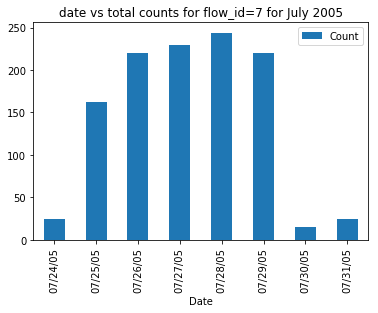

In [1085]:
import matplotlib.pyplot as plt
%matplotlib inline
July_data = UCIdata[pd.to_datetime(UCIdata.Date).isin(pd.date_range(start='07/01/05', periods=31))]
July_data[July_data['Flow_ID']==7][['Date', 'Count']].groupby(['Date']).sum().plot(title='date vs total counts for flow_id=7 for July 2005',kind='bar')

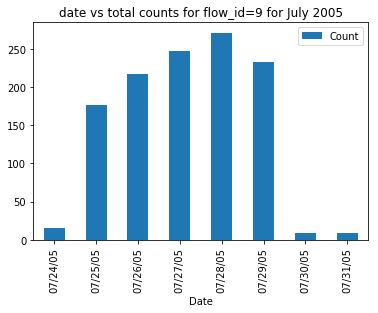

In [1086]:
July_data[July_data['Flow_ID']==9][['Date', 'Count']].groupby(['Date']).sum().plot(title='date vs total counts for flow_id=9 for July 2005', kind='bar')

# Total = 14.56 + 1